In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!ls

Horse_Health.ipynb    original.csv          test.csv
Untitled.ipynb        sample_submission.csv train.csv


In [3]:
train = pd.read_csv('./train.csv', index_col='id')
test = pd.read_csv('./test.csv', index_col='id')

In [4]:
original = pd.read_csv('./original.csv')
train = pd.concat([train, original], ignore_index=True)

display(train)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,55.0,65.0,NaN,NaN,no,3205,0,0,no,euthanized
1530,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,44.0,NaN,serosanguious,3.3,yes,2208,0,0,yes,euthanized
1531,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,60.0,6.8,NaN,NaN,yes,3205,0,0,no,died
1532,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,50.0,6.0,serosanguious,3.4,yes,2208,0,0,yes,lived


## データ内容について

### 1: surgery?
1 = Yes, it had surgery
2 = It was treated without surgery

### 2: Age
1 = Adult horse
2 = Young (< 6 months)

### 3: Hospital Number

numeric id
the case number assigned to the horse (may not be unique if the horse is treated > 1 time)
### 4: rectal temperature

linear
in degrees celsius.
An elevated temp may occur due to infection.
temperature may be reduced when the animal is in late shock
normal temp is 37.8
this parameter will usually change as the problem progresses, eg. may start out normal, then become elevated because of the lesion, passing back through the normal range as the horse goes into shock
### 5: pulse
linear
the heart rate in beats per minute
is a reflection of the heart condition: 30 -40 is normal for adults
rare to have a lower than normal rate although athletic horses may have a rate of 20-25
animals with painful lesions or suffering from circulatory shock may have an elevated heart rate
### 6: respiratory rate

linear
normal rate is 8 to 10
usefulness is doubtful due to the great fluctuations
### 7: temperature of extremities

a subjective indication of peripheral circulation
possible values:
1 = Normal
2 = Warm
3 = Cool
4 = Cold
cool to cold extremities indicate possible shock
hot extremities should correlate with an elevated rectal temp.
### 8: peripheral pulse

subjective
possible values are:
1 = normal
2 = increased
3 = reduced
4 = absent
normal or increased p.p. are indicative of adequate circulation while reduced or absent indicate poor perfusion
### 9: mucous membranes

a subjective measurement of colour
possible values are:
1 = normal pink
2 = bright pink
3 = pale pink
4 = pale cyanotic
5 = bright red / injected
6 = dark cyanotic
1 and 2 probably indicate a normal or slightly increased circulation
3 may occur in early shock
4 and 6 are indicative of serious circulatory compromise
5 is more indicative of a septicemia
### 10: capillary refill time

a clinical judgement. The longer the refill, the poorer the circulation
possible values
1 = < 3 seconds 2 = >= 3 seconds
### 11: pain - a subjective judgement of the horse's pain level

possible values:
1 = alert, no pain
2 = depressed
3 = intermittent mild pain
4 = intermittent severe pain
5 = continuous severe pain
should NOT be treated as a ordered or discrete variable!
In general, the more painful, the more likely it is to require surgery
prior treatment of pain may mask the pain level to some extent
### 12: peristalsis

an indication of the activity in the horse's gut. As the gut becomes more distended or the horse becomes more toxic, the activity decreases
possible values:
1 = hypermotile
2 = normal
3 = hypomotile
4 = absent
### 13: abdominal distension

An IMPORTANT parameter.
possible values
1 = none
2 = slight
3 = moderate
4 = severe
an animal with abdominal distension is likely to be painful and have reduced gut motility.
a horse with severe abdominal distension is likely to require surgery just tio relieve the pressure
### 14: nasogastric tube

this refers to any gas coming out of the tube
possible values:
1 = none
2 = slight
3 = significant
a large gas cap in the stomach is likely to give the horse discomfort
### 15: nasogastric reflux

possible values
1 = none
2 = > 1 liter
3 = < 1 liter
the greater amount of reflux, the more likelihood that there is some serious obstruction to the fluid passage from the rest of the intestine
### 16: nasogastric reflux PH

linear
scale is from 0 to 14 with 7 being neutral
normal values are in the 3 to 4 range
### 17: rectal examination - feces

possible values
1 = normal
2 = increased
3 = decreased
4 = absent
absent feces probably indicates an obstruction
### 18: abdomen

possible values
1 = normal
2 = other
3 = firm feces in the large intestine
4 = distended small intestine
5 = distended large intestine
3 is probably an obstruction caused by a mechanical impaction and is normally treated medically
4 and 5 indicate a surgical lesion
### 19: packed cell volume

linear
the # of red cells by volume in the blood
normal range is 30 to 50. The level rises as the circulation becomes compromised or as the animal becomes dehydrated.
### 20: total protein

linear
normal values lie in the 6-7.5 (gms/dL) range
the higher the value the greater the dehydration
### 21: abdominocentesis appearance

a needle is put in the horse's abdomen and fluid is obtained from
the abdominal cavity
possible values:
1 = clear
2 = cloudy
3 = serosanguinous
normal fluid is clear while cloudy or serosanguinous indicates a compromised gut
### 22: abdomcentesis total protein

linear
the higher the level of protein the more likely it is to have a compromised gut. Values are in gms/dL
### 23: outcome

what eventually happened to the horse?
possible values:
1 = lived
2 = died
3 = was euthanized
### 24: surgical lesion?

retrospectively, was the problem (lesion) surgical?
all cases are either operated upon or autopsied so that this value and the lesion type are always known
possible values:
1 = Yes
2 = No
### 25, 26, 27: type of lesion

first number is site of lesion
1 = gastric
2 = sm intestine
3 = lg colon
4 = lg colon and cecum
5 = cecum
6 = transverse colon
7 = retum/descending colon
8 = uterus
9 = bladder
11 = all intestinal sites
00 = none
second number is type
1 = simple
2 = strangulation
3 = inflammation
4 = other
third number is subtype
1 = mechanical
2 = paralytic
0 = n/a
fourth number is specific code
1 = obturation
2 = intrinsic
3 = extrinsic
4 = adynamic
5 = volvulus/torsion
6 = intussuption
7 = thromboembolic
8 = hernia
9 = lipoma/slenic incarceration
10 = displacement
0 = n/a
### 28: cp_data
is pathology data present for this case?
1 = Yes
2 = No
this variable is of no significance since pathology data is not included or collected for these cases

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                1534 non-null   object 
 1   age                    1534 non-null   object 
 2   hospital_number        1534 non-null   int64  
 3   rectal_temp            1474 non-null   float64
 4   pulse                  1510 non-null   float64
 5   respiratory_rate       1476 non-null   float64
 6   temp_of_extremities    1439 non-null   object 
 7   peripheral_pulse       1405 non-null   object 
 8   mucous_membrane        1466 non-null   object 
 9   capillary_refill_time  1496 non-null   object 
 10  pain                   1435 non-null   object 
 11  peristalsis            1470 non-null   object 
 12  abdominal_distention   1455 non-null   object 
 13  nasogastric_tube       1350 non-null   object 
 14  nasogastric_reflux     1407 non-null   object 
 15  naso

In [6]:
train.isnull().sum().sort_values(ascending=False)

abdomen                  331
rectal_exam_feces        292
nasogastric_reflux_ph    246
abdomo_appearance        213
abdomo_protein           198
nasogastric_tube         184
peripheral_pulse         129
nasogastric_reflux       127
pain                      99
temp_of_extremities       95
abdominal_distention      79
mucous_membrane           68
peristalsis               64
rectal_temp               60
respiratory_rate          58
capillary_refill_time     38
total_protein             33
packed_cell_volume        29
pulse                     24
lesion_1                   0
lesion_3                   0
cp_data                    0
lesion_2                   0
surgery                    0
surgical_lesion            0
age                        0
hospital_number            0
outcome                    0
dtype: int64

In [7]:
train.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1.534000e+03,1474.000000,1510.000000,1476.000000,1288.000000,1505.000000,1501.000000,1336.000000,1534.000000,1534.000000,1534.000000
mean,9.804694e+05,38.196744,78.194702,30.120596,4.395963,49.011296,21.899534,3.271931,3798.817471,29.409387,4.320078
std,1.392849e+06,0.779883,29.162518,16.650801,1.939516,10.590426,26.813063,1.621415,5429.907956,336.748319,97.624805
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.288060e+05,37.800000,52.000000,18.000000,2.000000,42.000000,6.600000,2.000000,2124.000000,0.000000,0.000000
50%,5.298400e+05,38.200000,72.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,5.342592e+05,38.600000,96.000000,36.000000,6.200000,55.000000,13.000000,4.300000,3205.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


In [8]:
%precision 3

'%.3f'

/var/folders/pm/wh4jwkpj6lvbjqpx5b9p68t00000gp/T/ipykernel_47234/4161358099.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[[col, 'source']], x=col, hue='source', ax=ax)


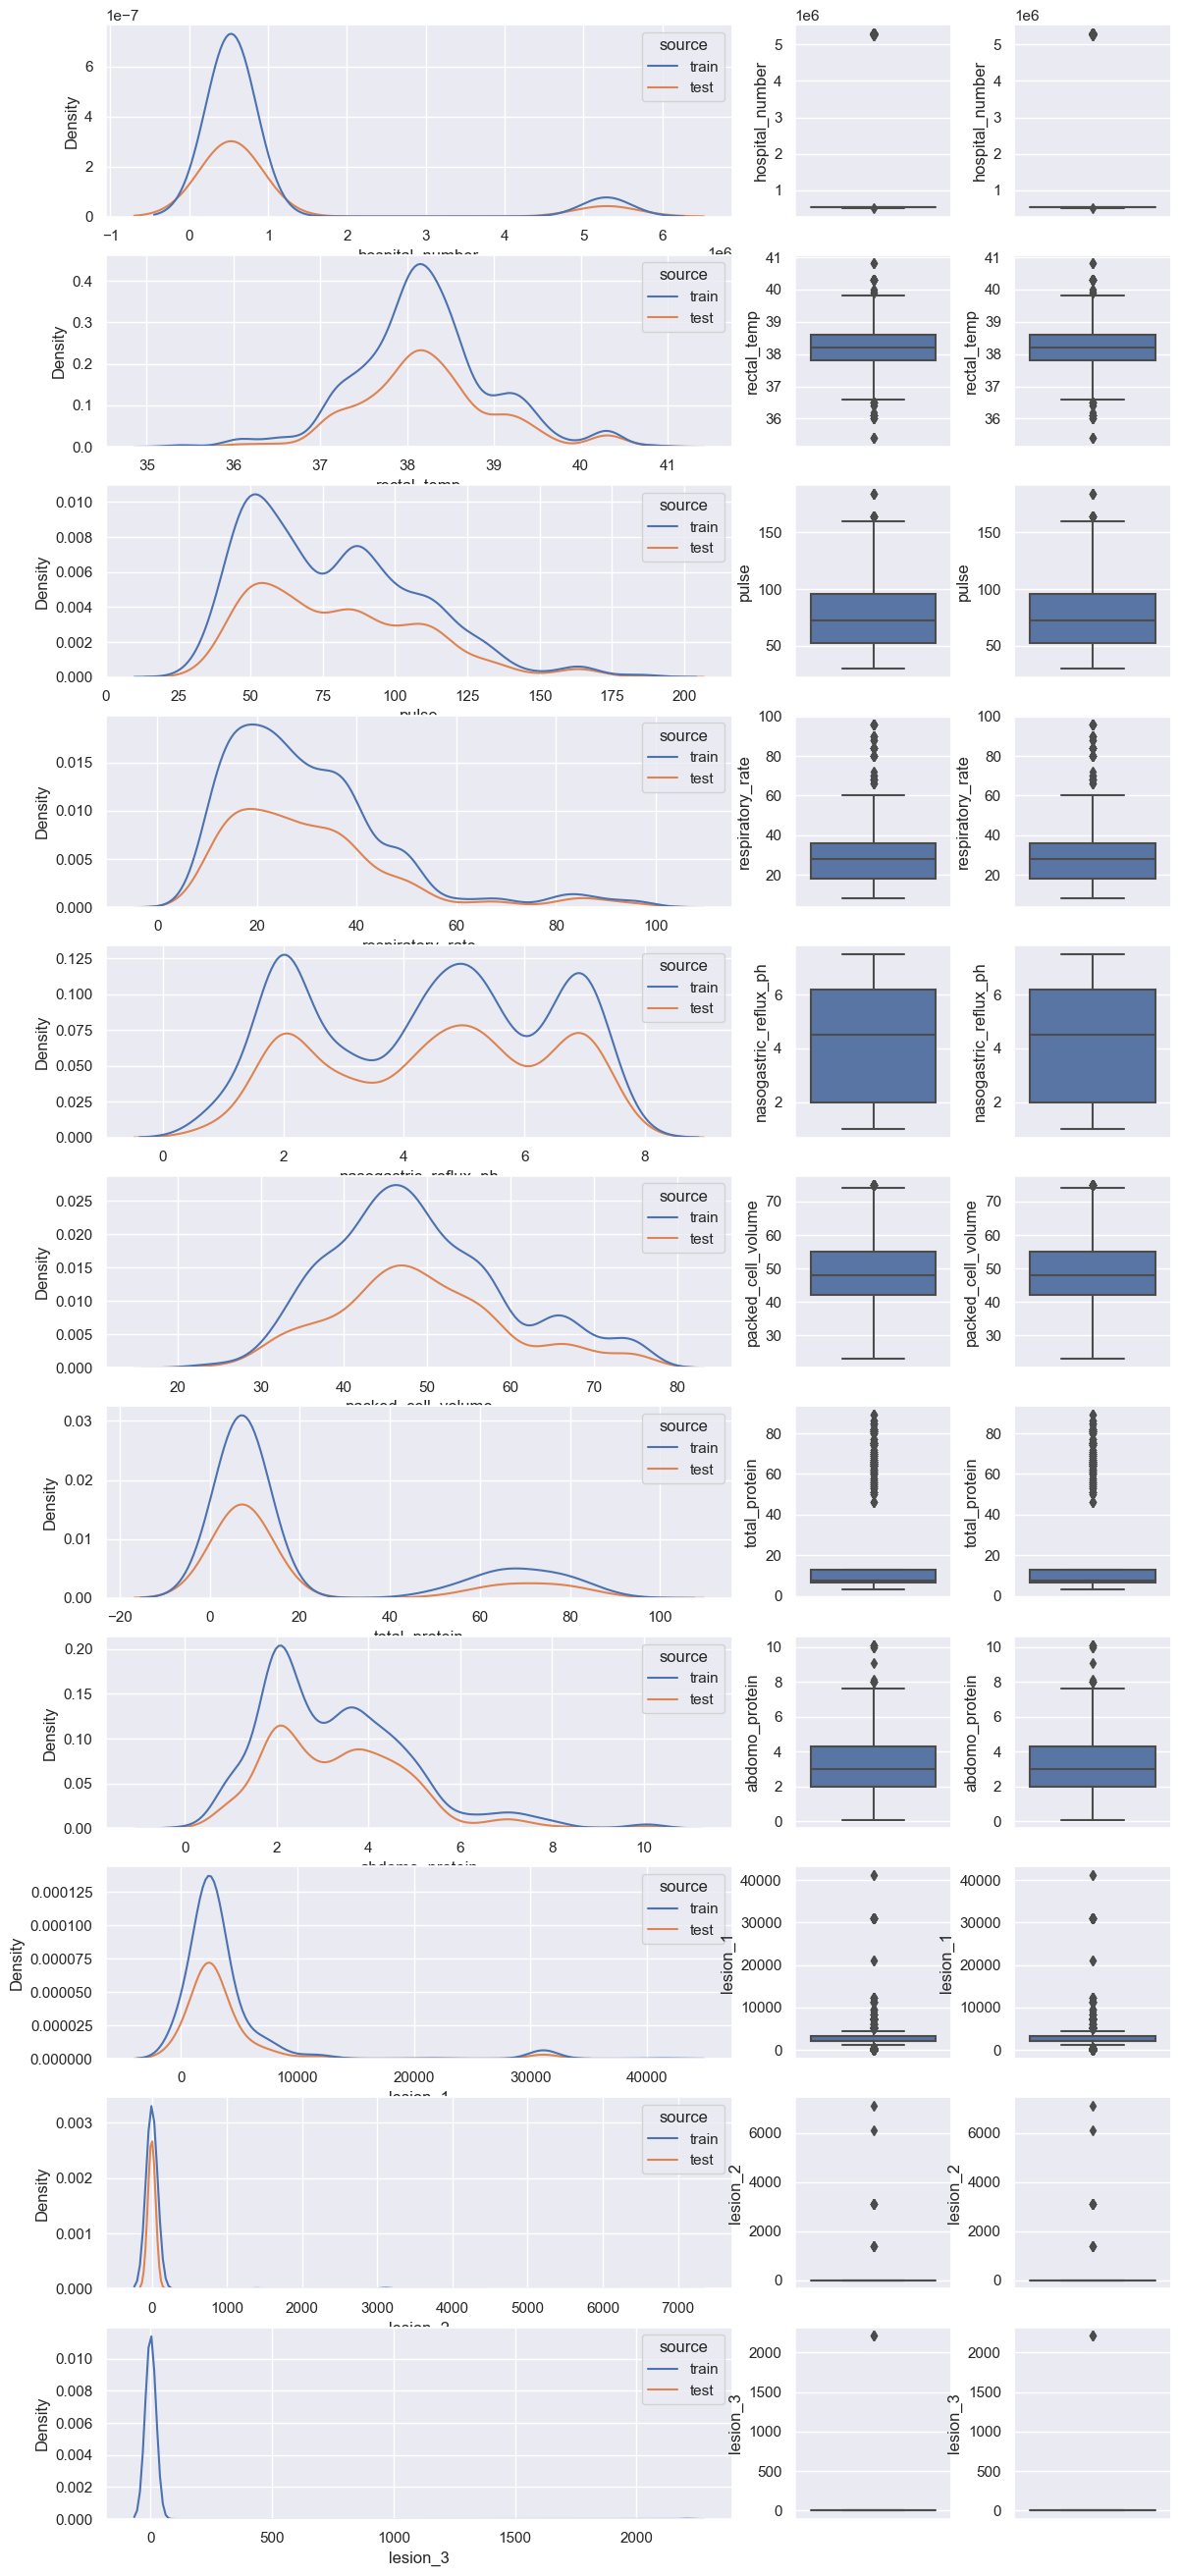

In [187]:
#カーネル密度分布による推定

num_columns = train.select_dtypes(include=[int, float]).columns
df = pd.concat([train[num_columns].assign(source='train'), test[num_columns].assign(source='test')], ignore_index=True)

fig, axes = plt.subplots(len(num_columns), 3, figsize=(14, len(num_columns)*3), gridspec_kw={'width_ratios': [4, 1, 1]})
for i, col in enumerate(num_columns):
    ax = axes[i, 0]
    sns.kdeplot(data=df[[col, 'source']], x=col, hue='source', ax=ax)
    
    ax = axes[i, 1]
    sns.boxplot(data=df[df['source'] == 'train'], y=col, ax=ax)
    
    ax = axes[i, 2]
    sns.boxplot(data=df[df['source'] == 'train'], y=col, ax=ax)

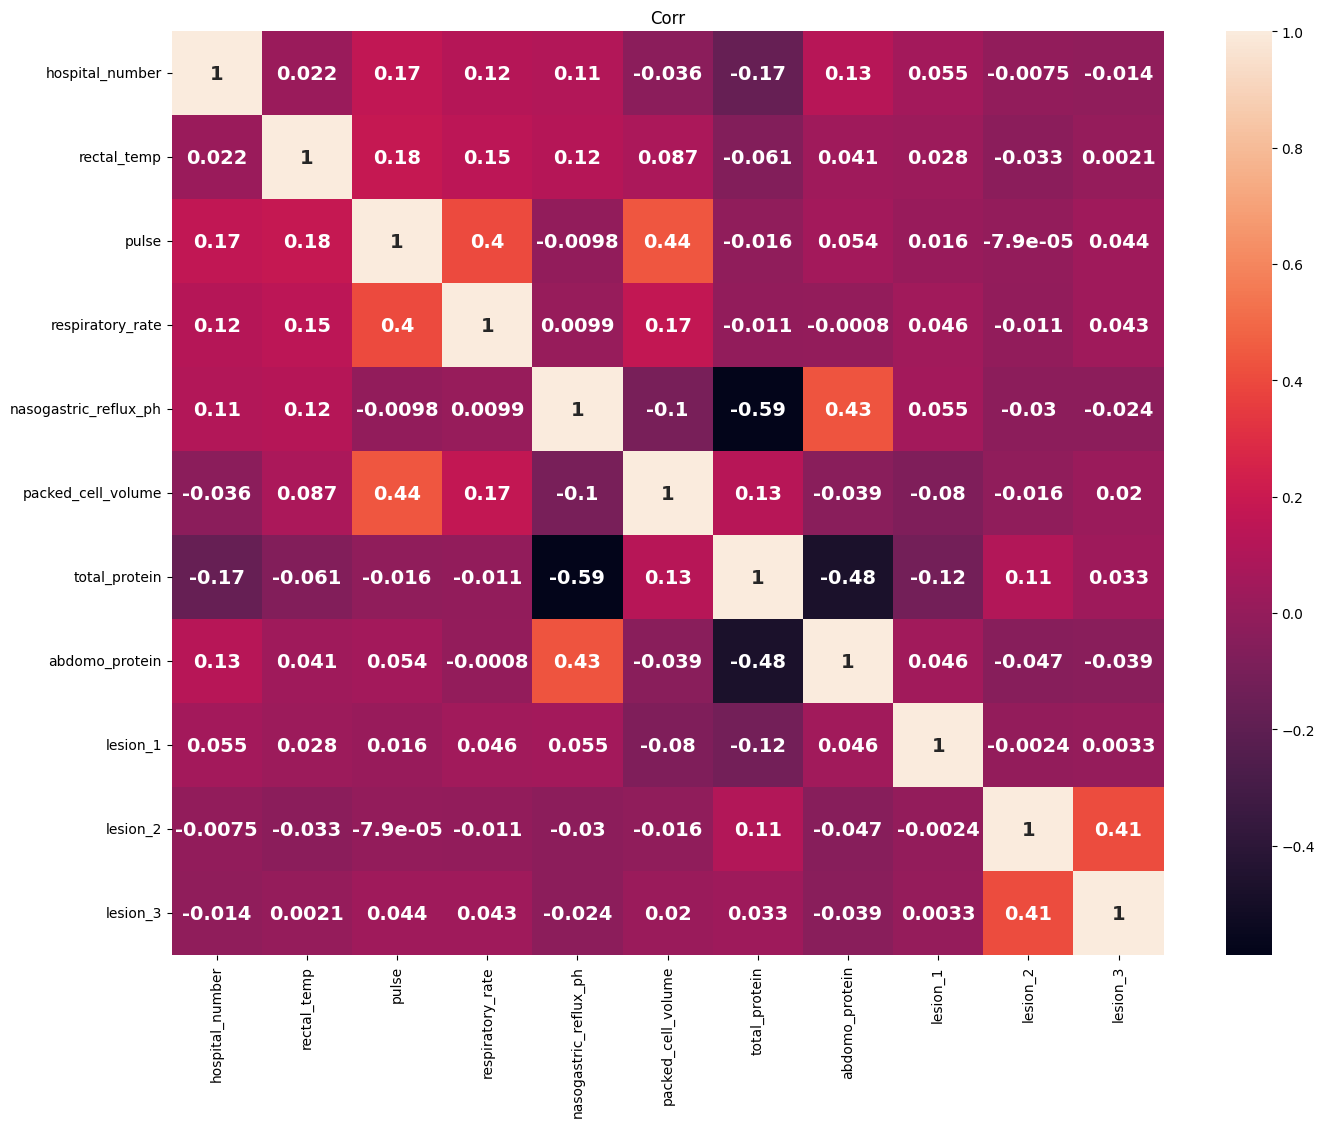

In [10]:
corr = train[num_columns].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(data=corr, annot=True, annot_kws={'fontsize': 14, 'fontweight': 'bold'})
plt.title('Corr')
plt.show()

In [12]:
cat_columns = train.select_dtypes(include=['object']).columns.drop('outcome')

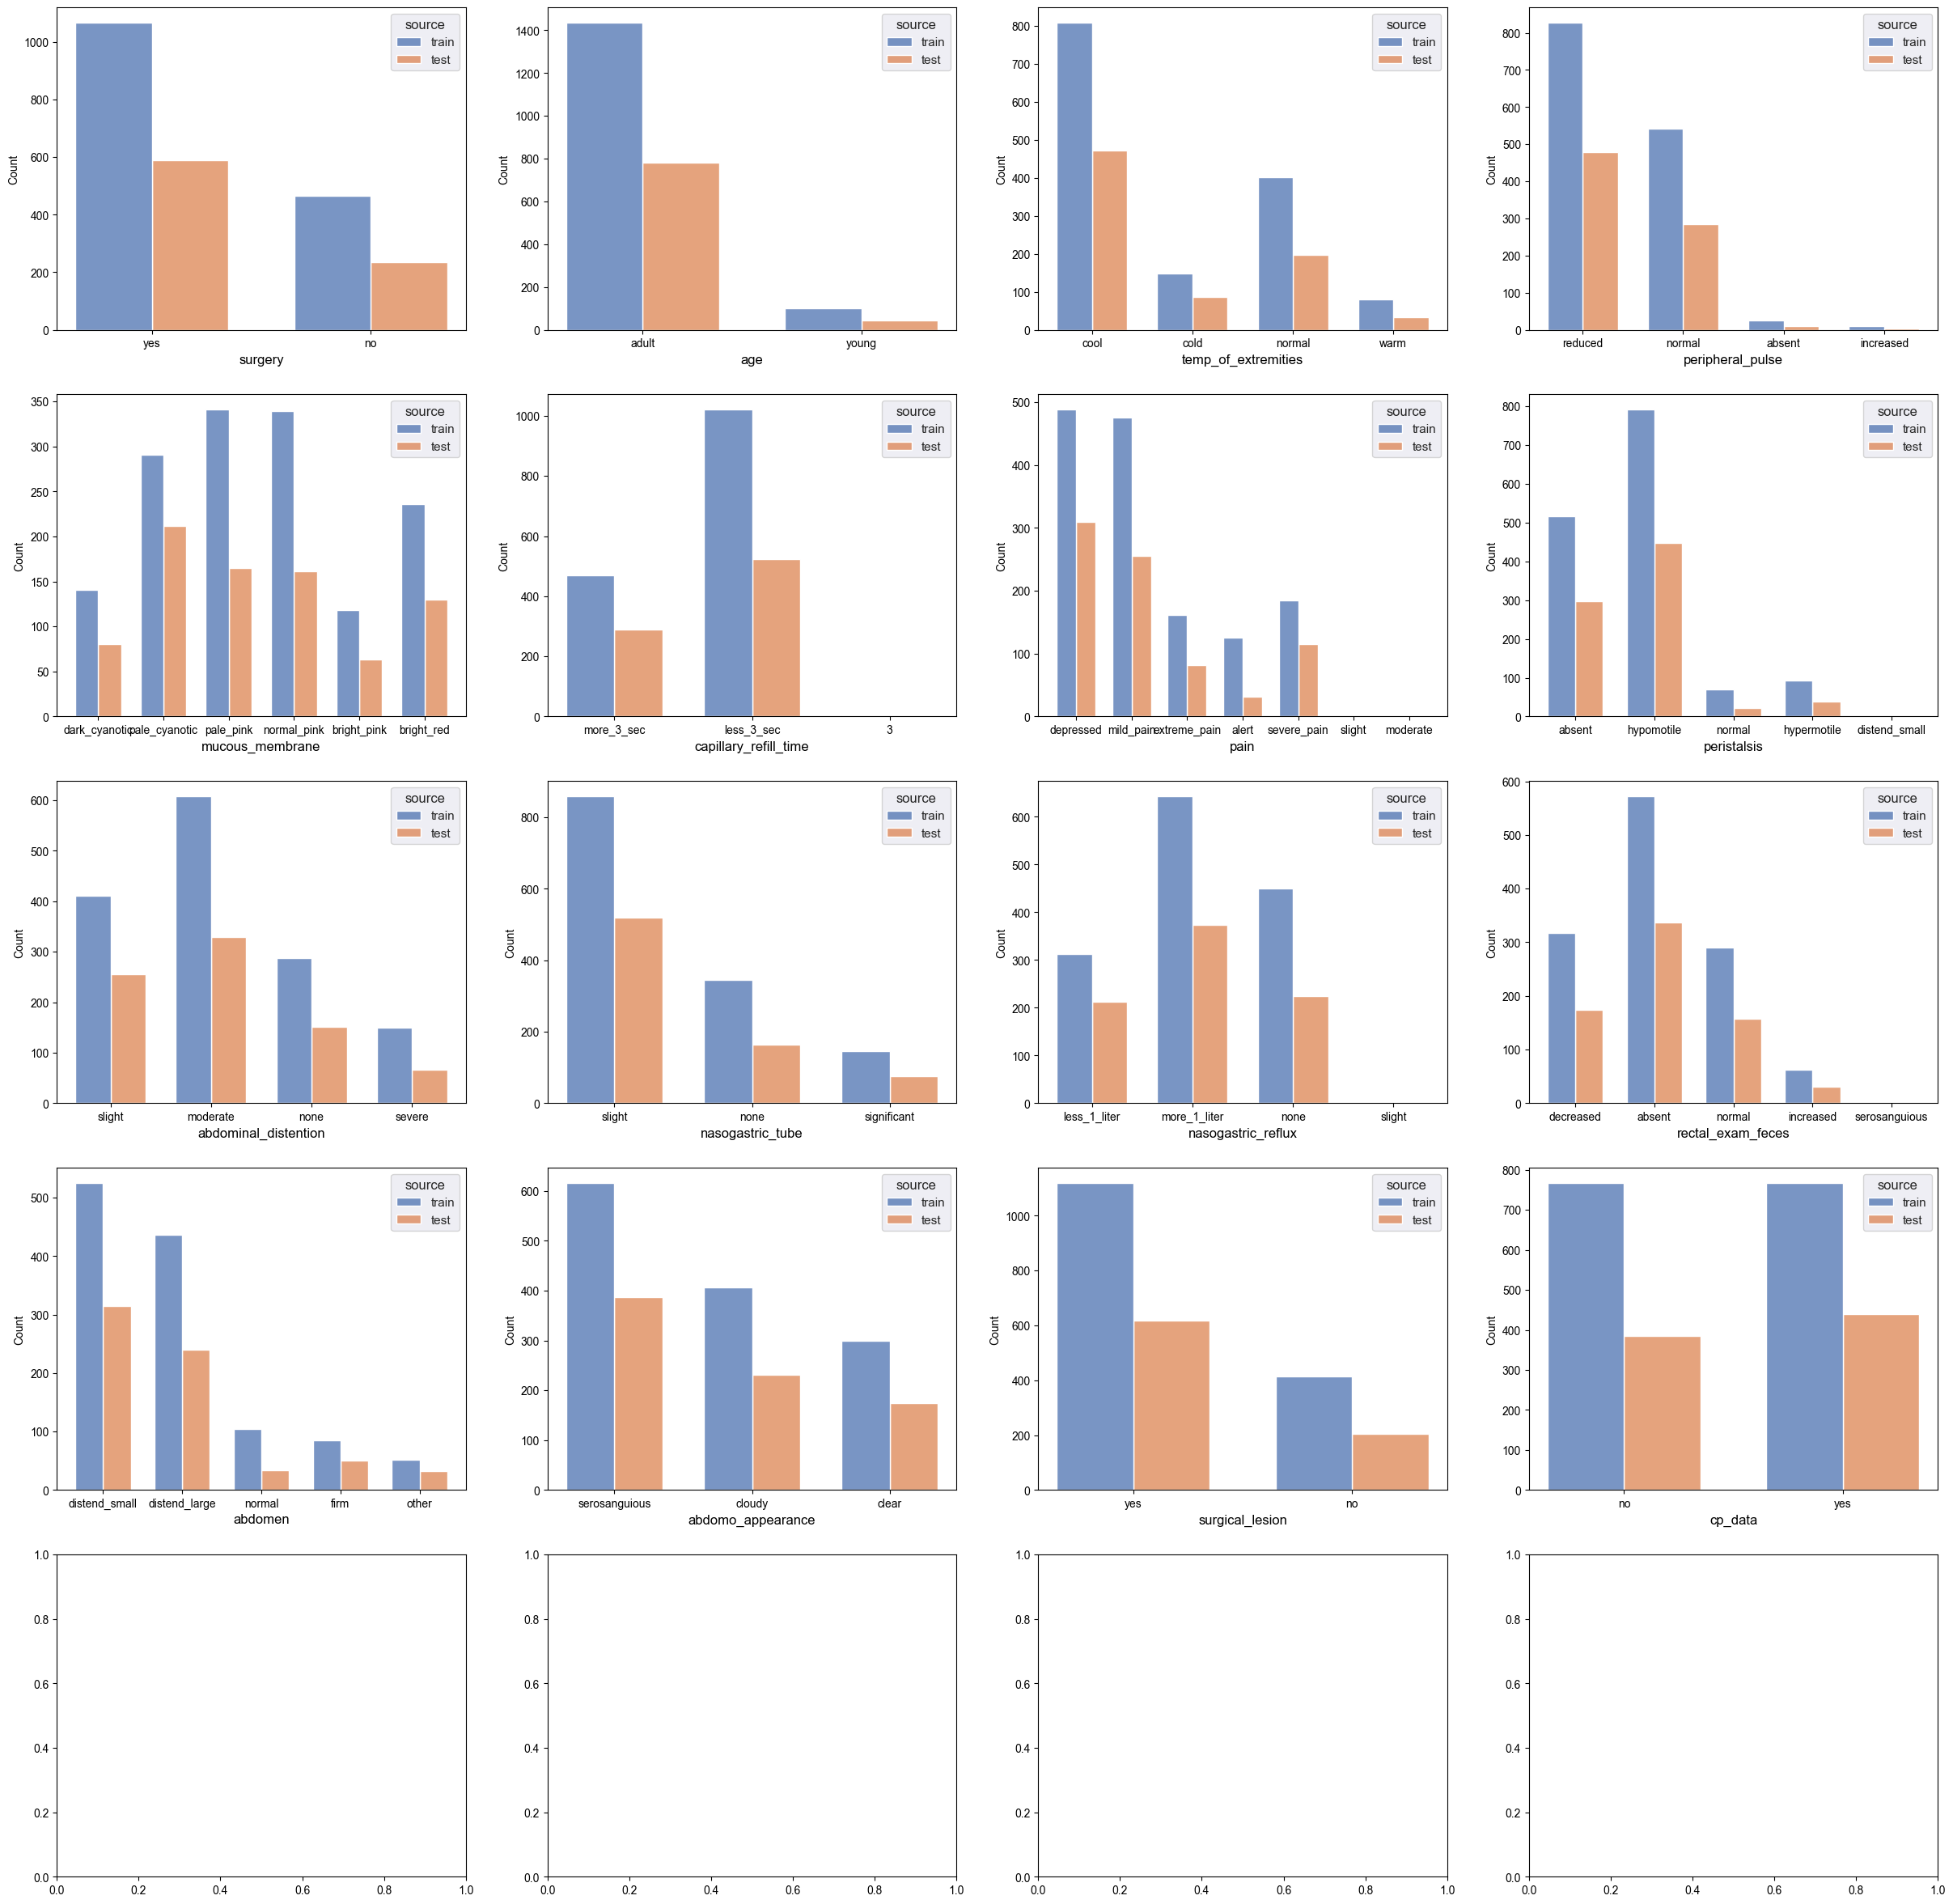

In [13]:
# cat_columns = train.select_dtypes(include=['object']).columns.drop('outcome')
df_cat = pd.concat([train[cat_columns].assign(source = 'train'), test[cat_columns].assign(source='test')], ignore_index=True)

fig, axes = plt.subplots(len(cat_columns)//4+ 1, 4, figsize=(30, 30))
sns.set()

for i, col in enumerate(cat_columns):
    ax = axes[i//4, i%4]
    ax.set_xlabel("", fontsize=12)
    sns.histplot(df_cat[[col, 'source']], x=col, hue='source', multiple='dodge', shrink=.7, ax=ax)

## Preprocessing

In [14]:
X_train = pd.DataFrame(train.drop('outcome', axis=1))
y_train = train[['outcome']]

### 欠損値処理
<b>SimpleImputer()</b><br>
・mean, median, most-frequencyで欠損値埋めが可能。シンプルだがズレも大きい。

<b>KNNImputer()</b><br>
・k近傍法を用いた欠損値埋めで、多変量解析　→ 他の変数が密接に関係している場合に使う

<b>処理なし</b><br>
・GBDTの場合欠損値を含んでいても処理可能なことを利用する。一番これが普通。

In [15]:
from sklearn.impute import SimpleImputer, KNNImputer

# 欠損値処理
# mean_imp = SimpleImputer(strategy='mean')
# kNN_imp = KNNImputer(missing_values=np.nan, n_neighbors=5)

### 前処理
→ 線形処理の後に非線形処理。<br>

<b> PowerTransformer() </b><br>
対数変換であるBox-cox変換（負の値NG）、Yeo-Johnson変換（負の値OK）

<b>StandardScaler()</b><br>
    数値データを０〜１の範囲に正規変換。非線形。
    $ x' = {{x-μ}\over{σ}}$

In [16]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline  # 前処理を連続して行うツール

num_pipeline = make_pipeline(
    PowerTransformer(method='yeo-johnson'),
    StandardScaler()
)

cat_pipeline = make_pipeline(
    OneHotEncoder()
)

In [17]:
from sklearn.compose import make_column_transformer, make_column_selector

# 指定した複数列に一括で前処理指定をする
tf = make_column_transformer(
    (
        num_pipeline, 
        make_column_selector(dtype_include=[int, float])
    ),
    (
        cat_pipeline,
        make_column_selector(dtype_include=object)
    )
)

tf

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('powertransformer',
                                                  PowerTransformer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x282976e90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x16df517d0>)])

<b> OrdinalEncoder() </b><br>
順序のあるカテゴリ変数の変換に使用。順序を明示的に指定する。

In [18]:
target_encoder = OrdinalEncoder(categories=[['died', 'euthanized', 'lived']])

## Transforming

In [19]:
X_train_tf = tf.fit_transform(X_train)
y_train_tf = target_encoder.fit_transform(y_train)

In [20]:
X_train_tf = pd.DataFrame(data=X_train_tf, columns=tf.get_feature_names_out())
X_train_tf

,pipeline-1__hospital_number,pipeline-1__rectal_temp,pipeline-1__pulse,pipeline-1__respiratory_rate,pipeline-1__nasogastric_reflux_ph,pipeline-1__packed_cell_volume,pipeline-1__total_protein,pipeline-1__abdomo_protein,pipeline-1__lesion_1,pipeline-1__lesion_2,...,pipeline-2__abdomen_other,pipeline-2__abdomen_nan,pipeline-2__abdomo_appearance_clear,pipeline-2__abdomo_appearance_cloudy,pipeline-2__abdomo_appearance_serosanguious,pipeline-2__abdomo_appearance_nan,pipeline-2__surgical_lesion_no,pipeline-2__surgical_lesion_yes,pipeline-2__cp_data_no,pipeline-2__cp_data_yes
0,-0.327972,-0.103825,1.579729,-0.156415,1.075100,0.810119,-0.053013,0.270136,-0.098172,-0.099373,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,-0.291187,-0.891172,0.519775,-1.589214,-1.245635,-1.730882,1.633838,-0.776521,-0.098522,-0.099373,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,-0.327972,0.153044,1.334733,0.148033,-0.434138,-1.202025,-0.722880,0.270136,0.653568,-0.099373,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,3.093037,-1.430474,-0.021945,0.282451,-1.245635,0.469914,-0.491338,0.561883,-0.098522,-0.099373,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,3.093037,-0.233292,-0.924356,1.166756,1.316333,-0.090682,-0.389487,-0.276603,-2.217633,-0.099373,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,-0.291187,NaN,1.334733,1.836171,NaN,0.643046,1.637089,NaN,0.208183,-0.099373,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1530,-0.364757,-1.294542,-0.021945,-0.156415,NaN,-0.397776,NaN,0.207685,-0.098522,-0.099373,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1531,-0.327972,-0.891172,-0.021945,0.282451,NaN,1.050255,-0.564110,NaN,0.208183,-0.099373,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1532,-0.327972,-2.261980,0.858953,-0.156415,NaN,0.197841,-0.902017,0.270136,-0.098522,-0.099373,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


## modeling

In [39]:
from sklearn.model_selection import train_test_split
X_tr_optuna, X_val_optuna, y_tr_optuna, y_val_optuna = train_test_split(X_train_tf, y_train_tf, train_size=0.9, random_state=0)

In [40]:
import optuna
from optuna import trial
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

def xgb_objective(trial):
    
    # model parameter setting
    
    xgb = XGBClassifier(
        learning_rate = trial.suggest_float('eta', 0.001, 0.3),
        n_estimators = trial.suggest_int('n_estimators', 32, 1024),
        max_depth = trial.suggest_int('max_depth', 1, 10),
        max_leaves = trial.suggest_int('num_leaves', 2, 1024),
        reg_lambda = trial.suggest_float('reg_lambda', 0.01, 10),
        subsample = trial.suggest_float('subsample', 0.01, 1),
        min_child_weight = trial.suggest_int('min_child_weight', 1, 10),
        colsample_bytree = trial.suggest_float('colsample_bytree', 0.01, 1),
        objective = trial.suggest_categorical('objective', ['multi:softmax']),
        random_state=0
    )

    xgb.fit(X_tr_optuna, y_tr_optuna, 
            eval_set=[(X_tr_optuna, y_tr_optuna),(X_val_optuna, y_val_optuna)],
            early_stopping_rounds = 30
    )

    y_pred_optuna = xgb.predict(X_val_optuna)
    
    return f1_score(y_val_optuna, y_pred_optuna, average='micro')

study = optuna.create_study(
    direction = "maximize",
    )
study.optimize(objective, n_trials=50, timeout=600)
xgb_best_hyperparams = study.best_params

[I 2023-10-05 03:30:16,578] A new study created in memory with name: no-name-83d8276c-1052-498b-994e-b2ea2902d2c7


[0]	validation_0-mlogloss:1.06058	validation_1-mlogloss:1.06883
[1]	validation_0-mlogloss:1.02833	validation_1-mlogloss:1.03235
[2]	validation_0-mlogloss:1.00776	validation_1-mlogloss:1.00635
[3]	validation_0-mlogloss:0.99726	validation_1-mlogloss:0.99331
[4]	validation_0-mlogloss:0.97743	validation_1-mlogloss:0.97931
[5]	validation_0-mlogloss:0.96147	validation_1-mlogloss:0.95738
[6]	validation_0-mlogloss:0.95114	validation_1-mlogloss:0.94628
[7]	validation_0-mlogloss:0.93362	validation_1-mlogloss:0.92747
[8]	validation_0-mlogloss:0.91889	validation_1-mlogloss:0.91718
[9]	validation_0-mlogloss:0.89579	validation_1-mlogloss:0.89522
[10]	validation_0-mlogloss:0.89157	validation_1-mlogloss:0.89924
[11]	validation_0-mlogloss:0.87817	validation_1-mlogloss:0.88170
[12]	validation_0-mlogloss:0.86510	validation_1-mlogloss:0.86799
[13]	validation_0-mlogloss:0.86617	validation_1-mlogloss:0.87456
[14]	validation_0-mlogloss:0.85997	validation_1-mlogloss:0.86906
[15]	validation_0-mlogloss:0.85868	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[67]	validation_0-mlogloss:0.73176	validation_1-mlogloss:0.71556
[68]	validation_0-mlogloss:0.73243	validation_1-mlogloss:0.71273
[69]	validation_0-mlogloss:0.73103	validation_1-mlogloss:0.71212
[70]	validation_0-mlogloss:0.73163	validation_1-mlogloss:0.70904
[71]	validation_0-mlogloss:0.73258	validation_1-mlogloss:0.71421
[72]	validation_0-mlogloss:0.73086	validation_1-mlogloss:0.71523
[73]	validation_0-mlogloss:0.73278	validation_1-mlogloss:0.71666
[74]	validation_0-mlogloss:0.73048	validation_1-mlogloss:0.71453
[75]	validation_0-mlogloss:0.72848	validation_1-mlogloss:0.71157
[76]	validation_0-mlogloss:0.72745	validation_1-mlogloss:0.71088
[77]	validation_0-mlogloss:0.72505	validation_1-mlogloss:0.70953
[78]	validation_0-mlogloss:0.72486	validation_1-mlogloss:0.70995
[79]	validation_0-mlogloss:0.72536	validation_1-mlogloss:0.71146
[80]	validation_0-mlogloss:0.72344	validation_1-mlogloss:0.70603
[81]	validation_0-mlogloss:0.72208	validation_1-mlogloss:0.70379
[82]	validation_0-mloglos

[192]	validation_0-mlogloss:0.70461	validation_1-mlogloss:0.67792
[193]	validation_0-mlogloss:0.70342	validation_1-mlogloss:0.67749
[194]	validation_0-mlogloss:0.70264	validation_1-mlogloss:0.68063
[195]	validation_0-mlogloss:0.70354	validation_1-mlogloss:0.68194
[196]	validation_0-mlogloss:0.70350	validation_1-mlogloss:0.68210
[197]	validation_0-mlogloss:0.70311	validation_1-mlogloss:0.68163
[198]	validation_0-mlogloss:0.70573	validation_1-mlogloss:0.68123
[199]	validation_0-mlogloss:0.70372	validation_1-mlogloss:0.67987
[200]	validation_0-mlogloss:0.70231	validation_1-mlogloss:0.67667
[201]	validation_0-mlogloss:0.70076	validation_1-mlogloss:0.67728
[202]	validation_0-mlogloss:0.70031	validation_1-mlogloss:0.67512
[203]	validation_0-mlogloss:0.70072	validation_1-mlogloss:0.66971
[204]	validation_0-mlogloss:0.70034	validation_1-mlogloss:0.66800
[205]	validation_0-mlogloss:0.70026	validation_1-mlogloss:0.67097
[206]	validation_0-mlogloss:0.69879	validation_1-mlogloss:0.67013
[207]	vali

[317]	validation_0-mlogloss:0.69528	validation_1-mlogloss:0.66519
[318]	validation_0-mlogloss:0.69428	validation_1-mlogloss:0.66035
[319]	validation_0-mlogloss:0.69346	validation_1-mlogloss:0.65985
[320]	validation_0-mlogloss:0.69156	validation_1-mlogloss:0.66026
[321]	validation_0-mlogloss:0.69359	validation_1-mlogloss:0.65888
[322]	validation_0-mlogloss:0.69388	validation_1-mlogloss:0.66102
[323]	validation_0-mlogloss:0.69342	validation_1-mlogloss:0.65459
[324]	validation_0-mlogloss:0.69393	validation_1-mlogloss:0.65621
[325]	validation_0-mlogloss:0.69119	validation_1-mlogloss:0.65762
[326]	validation_0-mlogloss:0.69158	validation_1-mlogloss:0.65781
[327]	validation_0-mlogloss:0.69166	validation_1-mlogloss:0.65558
[328]	validation_0-mlogloss:0.69085	validation_1-mlogloss:0.65762
[329]	validation_0-mlogloss:0.68911	validation_1-mlogloss:0.65816
[330]	validation_0-mlogloss:0.68972	validation_1-mlogloss:0.65841
[331]	validation_0-mlogloss:0.68886	validation_1-mlogloss:0.65768
[332]	vali

[I 2023-10-05 03:30:17,466] Trial 0 finished with value: 0.7402597402597403 and parameters: {'n_estimators': 657, 'learning_rate': 0.23225883458730165, 'max_depth': 6, 'num_leaves': 716, 'eta': 0.20571142183364027, 'reg_lambda': 3.9842244293194726, 'subsample': 0.016009419487686534, 'min_child_weight': 2, 'colsample_bytree': 0.27762906045992075, 'objective': 'multi:softmax'}. Best is trial 0 with value: 0.7402597402597403.


[0]	validation_0-mlogloss:1.01760	validation_1-mlogloss:1.02327
[1]	validation_0-mlogloss:0.95680	validation_1-mlogloss:0.95026
[2]	validation_0-mlogloss:0.91367	validation_1-mlogloss:0.90907
[3]	validation_0-mlogloss:0.87879	validation_1-mlogloss:0.86779
[4]	validation_0-mlogloss:0.84370	validation_1-mlogloss:0.83419
[5]	validation_0-mlogloss:0.82176	validation_1-mlogloss:0.81267
[6]	validation_0-mlogloss:0.80144	validation_1-mlogloss:0.79206
[7]	validation_0-mlogloss:0.78380	validation_1-mlogloss:0.77134
[8]	validation_0-mlogloss:0.77064	validation_1-mlogloss:0.74472
[9]	validation_0-mlogloss:0.74825	validation_1-mlogloss:0.72364
[10]	validation_0-mlogloss:0.73858	validation_1-mlogloss:0.71017
[11]	validation_0-mlogloss:0.72419	validation_1-mlogloss:0.69044
[12]	validation_0-mlogloss:0.72110	validation_1-mlogloss:0.69012
[13]	validation_0-mlogloss:0.71686	validation_1-mlogloss:0.69045
[14]	validation_0-mlogloss:0.70908	validation_1-mlogloss:0.67579
[15]	validation_0-mlogloss:0.70099	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[45]	validation_0-mlogloss:0.62464	validation_1-mlogloss:0.62818
[46]	validation_0-mlogloss:0.62294	validation_1-mlogloss:0.63047
[47]	validation_0-mlogloss:0.62320	validation_1-mlogloss:0.63167
[48]	validation_0-mlogloss:0.62085	validation_1-mlogloss:0.63747
[49]	validation_0-mlogloss:0.62122	validation_1-mlogloss:0.64239
[50]	validation_0-mlogloss:0.62076	validation_1-mlogloss:0.63754
[51]	validation_0-mlogloss:0.61863	validation_1-mlogloss:0.63239
[52]	validation_0-mlogloss:0.61722	validation_1-mlogloss:0.63067
[53]	validation_0-mlogloss:0.61601	validation_1-mlogloss:0.63071
[54]	validation_0-mlogloss:0.61382	validation_1-mlogloss:0.62922
[55]	validation_0-mlogloss:0.61331	validation_1-mlogloss:0.63326
[56]	validation_0-mlogloss:0.61163	validation_1-mlogloss:0.63136
[57]	validation_0-mlogloss:0.61073	validation_1-mlogloss:0.62823
[58]	validation_0-mlogloss:0.60872	validation_1-mlogloss:0.63090
[59]	validation_0-mlogloss:0.60947	validation_1-mlogloss:0.62795
[60]	validation_0-mloglos

[I 2023-10-05 03:30:18,187] Trial 1 finished with value: 0.7792207792207793 and parameters: {'n_estimators': 158, 'learning_rate': 0.033405732254940604, 'max_depth': 6, 'num_leaves': 150, 'eta': 0.26312480208351197, 'reg_lambda': 0.9397417150767323, 'subsample': 0.11064249685598207, 'min_child_weight': 9, 'colsample_bytree': 0.5586174892671336, 'objective': 'multi:softmax'}. Best is trial 1 with value: 0.7792207792207793.


[0]	validation_0-mlogloss:1.07633	validation_1-mlogloss:1.07637
[1]	validation_0-mlogloss:1.05610	validation_1-mlogloss:1.05583
[2]	validation_0-mlogloss:1.04036	validation_1-mlogloss:1.03962
[3]	validation_0-mlogloss:1.02216	validation_1-mlogloss:1.02277
[4]	validation_0-mlogloss:1.00422	validation_1-mlogloss:1.00549
[5]	validation_0-mlogloss:0.98917	validation_1-mlogloss:0.99199
[6]	validation_0-mlogloss:0.97494	validation_1-mlogloss:0.97669
[7]	validation_0-mlogloss:0.96060	validation_1-mlogloss:0.96110
[8]	validation_0-mlogloss:0.94678	validation_1-mlogloss:0.94685
[9]	validation_0-mlogloss:0.93391	validation_1-mlogloss:0.93268
[10]	validation_0-mlogloss:0.92063	validation_1-mlogloss:0.92064
[11]	validation_0-mlogloss:0.90958	validation_1-mlogloss:0.90830
[12]	validation_0-mlogloss:0.89947	validation_1-mlogloss:0.89941
[13]	validation_0-mlogloss:0.88989	validation_1-mlogloss:0.88965
[14]	validation_0-mlogloss:0.88033	validation_1-mlogloss:0.88069
[15]	validation_0-mlogloss:0.86935	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[79]	validation_0-mlogloss:0.66281	validation_1-mlogloss:0.66416
[80]	validation_0-mlogloss:0.66162	validation_1-mlogloss:0.66343
[81]	validation_0-mlogloss:0.66033	validation_1-mlogloss:0.66299
[82]	validation_0-mlogloss:0.65939	validation_1-mlogloss:0.66251
[83]	validation_0-mlogloss:0.65784	validation_1-mlogloss:0.66171
[84]	validation_0-mlogloss:0.65678	validation_1-mlogloss:0.66110
[85]	validation_0-mlogloss:0.65551	validation_1-mlogloss:0.66081
[86]	validation_0-mlogloss:0.65419	validation_1-mlogloss:0.65993
[87]	validation_0-mlogloss:0.65311	validation_1-mlogloss:0.65971
[88]	validation_0-mlogloss:0.65164	validation_1-mlogloss:0.65849
[89]	validation_0-mlogloss:0.65051	validation_1-mlogloss:0.65676
[90]	validation_0-mlogloss:0.64940	validation_1-mlogloss:0.65606
[91]	validation_0-mlogloss:0.64841	validation_1-mlogloss:0.65444
[92]	validation_0-mlogloss:0.64702	validation_1-mlogloss:0.65308
[93]	validation_0-mlogloss:0.64601	validation_1-mlogloss:0.65250
[94]	validation_0-mloglos

[204]	validation_0-mlogloss:0.56868	validation_1-mlogloss:0.59484
[205]	validation_0-mlogloss:0.56803	validation_1-mlogloss:0.59470
[206]	validation_0-mlogloss:0.56723	validation_1-mlogloss:0.59298
[207]	validation_0-mlogloss:0.56685	validation_1-mlogloss:0.59304
[208]	validation_0-mlogloss:0.56645	validation_1-mlogloss:0.59397
[209]	validation_0-mlogloss:0.56624	validation_1-mlogloss:0.59427
[210]	validation_0-mlogloss:0.56558	validation_1-mlogloss:0.59348
[211]	validation_0-mlogloss:0.56502	validation_1-mlogloss:0.59296
[212]	validation_0-mlogloss:0.56486	validation_1-mlogloss:0.59339
[213]	validation_0-mlogloss:0.56465	validation_1-mlogloss:0.59320
[214]	validation_0-mlogloss:0.56429	validation_1-mlogloss:0.59305
[215]	validation_0-mlogloss:0.56371	validation_1-mlogloss:0.59295
[216]	validation_0-mlogloss:0.56311	validation_1-mlogloss:0.59208
[217]	validation_0-mlogloss:0.56282	validation_1-mlogloss:0.59192
[218]	validation_0-mlogloss:0.56226	validation_1-mlogloss:0.59113
[219]	vali

[329]	validation_0-mlogloss:0.51882	validation_1-mlogloss:0.57334
[330]	validation_0-mlogloss:0.51837	validation_1-mlogloss:0.57209
[331]	validation_0-mlogloss:0.51809	validation_1-mlogloss:0.57292
[332]	validation_0-mlogloss:0.51772	validation_1-mlogloss:0.57226
[333]	validation_0-mlogloss:0.51719	validation_1-mlogloss:0.57230
[334]	validation_0-mlogloss:0.51694	validation_1-mlogloss:0.57187
[335]	validation_0-mlogloss:0.51673	validation_1-mlogloss:0.57162
[336]	validation_0-mlogloss:0.51647	validation_1-mlogloss:0.57245
[337]	validation_0-mlogloss:0.51626	validation_1-mlogloss:0.57220
[338]	validation_0-mlogloss:0.51587	validation_1-mlogloss:0.57126
[339]	validation_0-mlogloss:0.51543	validation_1-mlogloss:0.57173
[340]	validation_0-mlogloss:0.51528	validation_1-mlogloss:0.57198
[341]	validation_0-mlogloss:0.51511	validation_1-mlogloss:0.57272
[342]	validation_0-mlogloss:0.51456	validation_1-mlogloss:0.57360
[343]	validation_0-mlogloss:0.51436	validation_1-mlogloss:0.57297
[344]	vali

[454]	validation_0-mlogloss:0.48113	validation_1-mlogloss:0.56562
[455]	validation_0-mlogloss:0.48096	validation_1-mlogloss:0.56596
[456]	validation_0-mlogloss:0.48083	validation_1-mlogloss:0.56587
[457]	validation_0-mlogloss:0.48066	validation_1-mlogloss:0.56604
[458]	validation_0-mlogloss:0.48041	validation_1-mlogloss:0.56624
[459]	validation_0-mlogloss:0.48000	validation_1-mlogloss:0.56631
[460]	validation_0-mlogloss:0.47966	validation_1-mlogloss:0.56631
[461]	validation_0-mlogloss:0.47953	validation_1-mlogloss:0.56575
[462]	validation_0-mlogloss:0.47936	validation_1-mlogloss:0.56569
[463]	validation_0-mlogloss:0.47899	validation_1-mlogloss:0.56648
[464]	validation_0-mlogloss:0.47846	validation_1-mlogloss:0.56605
[465]	validation_0-mlogloss:0.47809	validation_1-mlogloss:0.56526
[466]	validation_0-mlogloss:0.47787	validation_1-mlogloss:0.56573
[467]	validation_0-mlogloss:0.47760	validation_1-mlogloss:0.56628
[468]	validation_0-mlogloss:0.47754	validation_1-mlogloss:0.56693
[469]	vali

[I 2023-10-05 03:30:19,473] Trial 2 finished with value: 0.7727272727272727 and parameters: {'n_estimators': 481, 'learning_rate': 0.19392569415577474, 'max_depth': 2, 'num_leaves': 127, 'eta': 0.06674680085382348, 'reg_lambda': 7.383678163527877, 'subsample': 0.26801576525384624, 'min_child_weight': 7, 'colsample_bytree': 0.6272203116855367, 'objective': 'multi:softmax'}. Best is trial 1 with value: 0.7792207792207793.


[0]	validation_0-mlogloss:1.02226	validation_1-mlogloss:1.02925
[1]	validation_0-mlogloss:0.96687	validation_1-mlogloss:0.95979
[2]	validation_0-mlogloss:0.91889	validation_1-mlogloss:0.90944
[3]	validation_0-mlogloss:0.88830	validation_1-mlogloss:0.86949
[4]	validation_0-mlogloss:0.86251	validation_1-mlogloss:0.85115
[5]	validation_0-mlogloss:0.83093	validation_1-mlogloss:0.82414
[6]	validation_0-mlogloss:0.80797	validation_1-mlogloss:0.80600
[7]	validation_0-mlogloss:0.79103	validation_1-mlogloss:0.78589
[8]	validation_0-mlogloss:0.78204	validation_1-mlogloss:0.77449
[9]	validation_0-mlogloss:0.76158	validation_1-mlogloss:0.75210
[10]	validation_0-mlogloss:0.74897	validation_1-mlogloss:0.73809
[11]	validation_0-mlogloss:0.73489	validation_1-mlogloss:0.72004
[12]	validation_0-mlogloss:0.73386	validation_1-mlogloss:0.72330
[13]	validation_0-mlogloss:0.72990	validation_1-mlogloss:0.72746
[14]	validation_0-mlogloss:0.72135	validation_1-mlogloss:0.72264
[15]	validation_0-mlogloss:0.71809	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[70]	validation_0-mlogloss:0.62366	validation_1-mlogloss:0.63625
[71]	validation_0-mlogloss:0.62212	validation_1-mlogloss:0.63725
[72]	validation_0-mlogloss:0.62147	validation_1-mlogloss:0.63926
[73]	validation_0-mlogloss:0.62206	validation_1-mlogloss:0.63844
[74]	validation_0-mlogloss:0.62031	validation_1-mlogloss:0.63327
[75]	validation_0-mlogloss:0.61973	validation_1-mlogloss:0.63819
[76]	validation_0-mlogloss:0.61807	validation_1-mlogloss:0.63277
[77]	validation_0-mlogloss:0.61834	validation_1-mlogloss:0.64341
[78]	validation_0-mlogloss:0.61714	validation_1-mlogloss:0.64143
[79]	validation_0-mlogloss:0.61599	validation_1-mlogloss:0.65069
[80]	validation_0-mlogloss:0.61639	validation_1-mlogloss:0.64745
[81]	validation_0-mlogloss:0.61934	validation_1-mlogloss:0.64631
[82]	validation_0-mlogloss:0.61910	validation_1-mlogloss:0.64034
[83]	validation_0-mlogloss:0.61497	validation_1-mlogloss:0.63421
[84]	validation_0-mlogloss:0.61529	validation_1-mlogloss:0.63821
[85]	validation_0-mloglos

[195]	validation_0-mlogloss:0.56990	validation_1-mlogloss:0.65912
[196]	validation_0-mlogloss:0.56788	validation_1-mlogloss:0.65618
[197]	validation_0-mlogloss:0.56689	validation_1-mlogloss:0.65493
[198]	validation_0-mlogloss:0.56871	validation_1-mlogloss:0.66231
[199]	validation_0-mlogloss:0.56844	validation_1-mlogloss:0.65598
[200]	validation_0-mlogloss:0.56743	validation_1-mlogloss:0.65499
[201]	validation_0-mlogloss:0.56877	validation_1-mlogloss:0.65289
[202]	validation_0-mlogloss:0.57185	validation_1-mlogloss:0.65648
[203]	validation_0-mlogloss:0.57202	validation_1-mlogloss:0.65048
[204]	validation_0-mlogloss:0.57222	validation_1-mlogloss:0.64570
[205]	validation_0-mlogloss:0.57287	validation_1-mlogloss:0.64432
[206]	validation_0-mlogloss:0.57411	validation_1-mlogloss:0.64560
[207]	validation_0-mlogloss:0.57219	validation_1-mlogloss:0.63753
[208]	validation_0-mlogloss:0.57625	validation_1-mlogloss:0.64285
[209]	validation_0-mlogloss:0.57359	validation_1-mlogloss:0.65014
[210]	vali

[I 2023-10-05 03:30:20,258] Trial 3 finished with value: 0.7467532467532466 and parameters: {'n_estimators': 748, 'learning_rate': 0.44702966232713937, 'max_depth': 9, 'num_leaves': 302, 'eta': 0.22937131859134782, 'reg_lambda': 2.178144585288842, 'subsample': 0.05980695720117713, 'min_child_weight': 5, 'colsample_bytree': 0.9096401995280375, 'objective': 'multi:softmax'}. Best is trial 1 with value: 0.7792207792207793.


[0]	validation_0-mlogloss:0.99426	validation_1-mlogloss:1.01730
[1]	validation_0-mlogloss:0.90397	validation_1-mlogloss:0.93331
[2]	validation_0-mlogloss:0.85243	validation_1-mlogloss:0.88711
[3]	validation_0-mlogloss:0.80156	validation_1-mlogloss:0.83427
[4]	validation_0-mlogloss:0.75623	validation_1-mlogloss:0.78435
[5]	validation_0-mlogloss:0.72589	validation_1-mlogloss:0.76572
[6]	validation_0-mlogloss:0.69954	validation_1-mlogloss:0.75166
[7]	validation_0-mlogloss:0.67063	validation_1-mlogloss:0.71968
[8]	validation_0-mlogloss:0.65097	validation_1-mlogloss:0.70669
[9]	validation_0-mlogloss:0.63050	validation_1-mlogloss:0.68963
[10]	validation_0-mlogloss:0.61276	validation_1-mlogloss:0.67719
[11]	validation_0-mlogloss:0.59926	validation_1-mlogloss:0.66921
[12]	validation_0-mlogloss:0.58420	validation_1-mlogloss:0.65353
[13]	validation_0-mlogloss:0.57044	validation_1-mlogloss:0.64257
[14]	validation_0-mlogloss:0.55922	validation_1-mlogloss:0.63808
[15]	validation_0-mlogloss:0.54943	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[43]	validation_0-mlogloss:0.38270	validation_1-mlogloss:0.58863
[44]	validation_0-mlogloss:0.37941	validation_1-mlogloss:0.58351
[45]	validation_0-mlogloss:0.37660	validation_1-mlogloss:0.58377
[46]	validation_0-mlogloss:0.37433	validation_1-mlogloss:0.58360
[47]	validation_0-mlogloss:0.37078	validation_1-mlogloss:0.57780
[48]	validation_0-mlogloss:0.36729	validation_1-mlogloss:0.58204
[49]	validation_0-mlogloss:0.36329	validation_1-mlogloss:0.58375
[50]	validation_0-mlogloss:0.36102	validation_1-mlogloss:0.58510
[51]	validation_0-mlogloss:0.35826	validation_1-mlogloss:0.58478
[52]	validation_0-mlogloss:0.35602	validation_1-mlogloss:0.58586
[53]	validation_0-mlogloss:0.35217	validation_1-mlogloss:0.58515
[54]	validation_0-mlogloss:0.34925	validation_1-mlogloss:0.58550
[55]	validation_0-mlogloss:0.34607	validation_1-mlogloss:0.58486
[56]	validation_0-mlogloss:0.34314	validation_1-mlogloss:0.57942
[57]	validation_0-mlogloss:0.34008	validation_1-mlogloss:0.58077
[58]	validation_0-mloglos

[168]	validation_0-mlogloss:0.18079	validation_1-mlogloss:0.59184
[169]	validation_0-mlogloss:0.18029	validation_1-mlogloss:0.59426
[170]	validation_0-mlogloss:0.17972	validation_1-mlogloss:0.59222
[171]	validation_0-mlogloss:0.17917	validation_1-mlogloss:0.59359
[172]	validation_0-mlogloss:0.17879	validation_1-mlogloss:0.59502
[173]	validation_0-mlogloss:0.17849	validation_1-mlogloss:0.59584
[174]	validation_0-mlogloss:0.17753	validation_1-mlogloss:0.59661
[175]	validation_0-mlogloss:0.17710	validation_1-mlogloss:0.59676
[176]	validation_0-mlogloss:0.17572	validation_1-mlogloss:0.59208
[177]	validation_0-mlogloss:0.17530	validation_1-mlogloss:0.59415
[178]	validation_0-mlogloss:0.17442	validation_1-mlogloss:0.59526
[179]	validation_0-mlogloss:0.17368	validation_1-mlogloss:0.59613
[180]	validation_0-mlogloss:0.17288	validation_1-mlogloss:0.59706
[181]	validation_0-mlogloss:0.17250	validation_1-mlogloss:0.59701
[182]	validation_0-mlogloss:0.17192	validation_1-mlogloss:0.59640
[183]	vali

[I 2023-10-05 03:30:21,114] Trial 4 finished with value: 0.7727272727272727 and parameters: {'n_estimators': 816, 'learning_rate': 0.39977035441627373, 'max_depth': 7, 'num_leaves': 376, 'eta': 0.26944171683695606, 'reg_lambda': 1.324713507099598, 'subsample': 0.4394639905412035, 'min_child_weight': 9, 'colsample_bytree': 0.3803090180807296, 'objective': 'multi:softmax'}. Best is trial 1 with value: 0.7792207792207793.


[0]	validation_0-mlogloss:1.04914	validation_1-mlogloss:1.05288
[1]	validation_0-mlogloss:1.01366	validation_1-mlogloss:1.01683
[2]	validation_0-mlogloss:0.98333	validation_1-mlogloss:0.98666
[3]	validation_0-mlogloss:0.95846	validation_1-mlogloss:0.95771
[4]	validation_0-mlogloss:0.93467	validation_1-mlogloss:0.93297
[5]	validation_0-mlogloss:0.91678	validation_1-mlogloss:0.91142
[6]	validation_0-mlogloss:0.89973	validation_1-mlogloss:0.89821
[7]	validation_0-mlogloss:0.88528	validation_1-mlogloss:0.88198
[8]	validation_0-mlogloss:0.87283	validation_1-mlogloss:0.86860
[9]	validation_0-mlogloss:0.85530	validation_1-mlogloss:0.85502
[10]	validation_0-mlogloss:0.84046	validation_1-mlogloss:0.83883
[11]	validation_0-mlogloss:0.82904	validation_1-mlogloss:0.82322
[12]	validation_0-mlogloss:0.82042	validation_1-mlogloss:0.81740
[13]	validation_0-mlogloss:0.81183	validation_1-mlogloss:0.80811
[14]	validation_0-mlogloss:0.80164	validation_1-mlogloss:0.80018
[15]	validation_0-mlogloss:0.79221	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[95]	validation_0-mlogloss:0.62644	validation_1-mlogloss:0.62666
[96]	validation_0-mlogloss:0.62515	validation_1-mlogloss:0.62613
[97]	validation_0-mlogloss:0.62388	validation_1-mlogloss:0.62496
[98]	validation_0-mlogloss:0.62348	validation_1-mlogloss:0.62399
[99]	validation_0-mlogloss:0.62319	validation_1-mlogloss:0.62497
[100]	validation_0-mlogloss:0.62257	validation_1-mlogloss:0.62568
[101]	validation_0-mlogloss:0.62158	validation_1-mlogloss:0.62475
[102]	validation_0-mlogloss:0.62044	validation_1-mlogloss:0.62686
[103]	validation_0-mlogloss:0.61974	validation_1-mlogloss:0.62365
[104]	validation_0-mlogloss:0.61907	validation_1-mlogloss:0.62456
[105]	validation_0-mlogloss:0.61918	validation_1-mlogloss:0.62800
[106]	validation_0-mlogloss:0.61912	validation_1-mlogloss:0.62581
[107]	validation_0-mlogloss:0.61856	validation_1-mlogloss:0.62339
[108]	validation_0-mlogloss:0.61862	validation_1-mlogloss:0.62242
[109]	validation_0-mlogloss:0.61826	validation_1-mlogloss:0.62335
[110]	validatio

[220]	validation_0-mlogloss:0.56655	validation_1-mlogloss:0.59811
[221]	validation_0-mlogloss:0.56703	validation_1-mlogloss:0.59663
[222]	validation_0-mlogloss:0.56672	validation_1-mlogloss:0.59614
[223]	validation_0-mlogloss:0.56624	validation_1-mlogloss:0.59908
[224]	validation_0-mlogloss:0.56586	validation_1-mlogloss:0.59649
[225]	validation_0-mlogloss:0.56485	validation_1-mlogloss:0.59832
[226]	validation_0-mlogloss:0.56495	validation_1-mlogloss:0.59887
[227]	validation_0-mlogloss:0.56471	validation_1-mlogloss:0.59764
[228]	validation_0-mlogloss:0.56527	validation_1-mlogloss:0.59909
[229]	validation_0-mlogloss:0.56456	validation_1-mlogloss:0.59372
[230]	validation_0-mlogloss:0.56413	validation_1-mlogloss:0.59419
[231]	validation_0-mlogloss:0.56386	validation_1-mlogloss:0.59348
[232]	validation_0-mlogloss:0.56344	validation_1-mlogloss:0.59198
[233]	validation_0-mlogloss:0.56357	validation_1-mlogloss:0.59267
[234]	validation_0-mlogloss:0.56303	validation_1-mlogloss:0.59235
[235]	vali

[345]	validation_0-mlogloss:0.53567	validation_1-mlogloss:0.58274
[346]	validation_0-mlogloss:0.53490	validation_1-mlogloss:0.58381
[347]	validation_0-mlogloss:0.53371	validation_1-mlogloss:0.58493
[348]	validation_0-mlogloss:0.53331	validation_1-mlogloss:0.58318
[349]	validation_0-mlogloss:0.53315	validation_1-mlogloss:0.58325
[350]	validation_0-mlogloss:0.53329	validation_1-mlogloss:0.58290
[351]	validation_0-mlogloss:0.53296	validation_1-mlogloss:0.58421
[352]	validation_0-mlogloss:0.53280	validation_1-mlogloss:0.58424
[353]	validation_0-mlogloss:0.53275	validation_1-mlogloss:0.58578
[354]	validation_0-mlogloss:0.53254	validation_1-mlogloss:0.58283
[355]	validation_0-mlogloss:0.53248	validation_1-mlogloss:0.58190
[356]	validation_0-mlogloss:0.53178	validation_1-mlogloss:0.57909
[357]	validation_0-mlogloss:0.53149	validation_1-mlogloss:0.58130
[358]	validation_0-mlogloss:0.53133	validation_1-mlogloss:0.58358
[359]	validation_0-mlogloss:0.53129	validation_1-mlogloss:0.58562
[360]	vali

[I 2023-10-05 03:30:22,010] Trial 5 finished with value: 0.7532467532467532 and parameters: {'n_estimators': 503, 'learning_rate': 0.34541564421353177, 'max_depth': 1, 'num_leaves': 19, 'eta': 0.18515617369111803, 'reg_lambda': 3.1602709333805894, 'subsample': 0.17042832015395193, 'min_child_weight': 1, 'colsample_bytree': 0.6989525605644046, 'objective': 'multi:softmax'}. Best is trial 1 with value: 0.7792207792207793.


[0]	validation_0-mlogloss:1.00410	validation_1-mlogloss:1.01568
[1]	validation_0-mlogloss:0.93510	validation_1-mlogloss:0.95397
[2]	validation_0-mlogloss:0.89695	validation_1-mlogloss:0.91998
[3]	validation_0-mlogloss:0.86049	validation_1-mlogloss:0.88542
[4]	validation_0-mlogloss:0.81950	validation_1-mlogloss:0.84250
[5]	validation_0-mlogloss:0.80172	validation_1-mlogloss:0.82807
[6]	validation_0-mlogloss:0.77716	validation_1-mlogloss:0.79868
[7]	validation_0-mlogloss:0.75646	validation_1-mlogloss:0.77901
[8]	validation_0-mlogloss:0.73939	validation_1-mlogloss:0.76393
[9]	validation_0-mlogloss:0.71749	validation_1-mlogloss:0.73982
[10]	validation_0-mlogloss:0.70291	validation_1-mlogloss:0.73059
[11]	validation_0-mlogloss:0.68648	validation_1-mlogloss:0.72058
[12]	validation_0-mlogloss:0.67484	validation_1-mlogloss:0.70920
[13]	validation_0-mlogloss:0.66055	validation_1-mlogloss:0.69126
[14]	validation_0-mlogloss:0.65327	validation_1-mlogloss:0.68680
[15]	validation_0-mlogloss:0.64217	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[60]	validation_0-mlogloss:0.44766	validation_1-mlogloss:0.55647
[61]	validation_0-mlogloss:0.44567	validation_1-mlogloss:0.55538
[62]	validation_0-mlogloss:0.44383	validation_1-mlogloss:0.55530
[63]	validation_0-mlogloss:0.44095	validation_1-mlogloss:0.55162
[64]	validation_0-mlogloss:0.43838	validation_1-mlogloss:0.54873
[65]	validation_0-mlogloss:0.43595	validation_1-mlogloss:0.54559
[66]	validation_0-mlogloss:0.43357	validation_1-mlogloss:0.54559
[67]	validation_0-mlogloss:0.43205	validation_1-mlogloss:0.54806
[68]	validation_0-mlogloss:0.43056	validation_1-mlogloss:0.54721
[69]	validation_0-mlogloss:0.42820	validation_1-mlogloss:0.54410
[70]	validation_0-mlogloss:0.42634	validation_1-mlogloss:0.54213
[71]	validation_0-mlogloss:0.42427	validation_1-mlogloss:0.54328
[72]	validation_0-mlogloss:0.42265	validation_1-mlogloss:0.54218
[73]	validation_0-mlogloss:0.42066	validation_1-mlogloss:0.54169
[74]	validation_0-mlogloss:0.41714	validation_1-mlogloss:0.54386
[75]	validation_0-mloglos

[185]	validation_0-mlogloss:0.27525	validation_1-mlogloss:0.52944
[186]	validation_0-mlogloss:0.27457	validation_1-mlogloss:0.52967
[187]	validation_0-mlogloss:0.27345	validation_1-mlogloss:0.52984
[188]	validation_0-mlogloss:0.27312	validation_1-mlogloss:0.53004
[189]	validation_0-mlogloss:0.27183	validation_1-mlogloss:0.52827
[190]	validation_0-mlogloss:0.27022	validation_1-mlogloss:0.52823
[191]	validation_0-mlogloss:0.26935	validation_1-mlogloss:0.52874
[192]	validation_0-mlogloss:0.26820	validation_1-mlogloss:0.52826
[193]	validation_0-mlogloss:0.26737	validation_1-mlogloss:0.52868
[194]	validation_0-mlogloss:0.26666	validation_1-mlogloss:0.52910
[195]	validation_0-mlogloss:0.26601	validation_1-mlogloss:0.52807
[196]	validation_0-mlogloss:0.26500	validation_1-mlogloss:0.52715
[197]	validation_0-mlogloss:0.26430	validation_1-mlogloss:0.52740
[198]	validation_0-mlogloss:0.26323	validation_1-mlogloss:0.52661
[199]	validation_0-mlogloss:0.26230	validation_1-mlogloss:0.52647
[200]	vali

[I 2023-10-05 03:30:22,756] Trial 6 finished with value: 0.7922077922077922 and parameters: {'n_estimators': 245, 'learning_rate': 0.3377180239670547, 'max_depth': 3, 'num_leaves': 427, 'eta': 0.2815577366856137, 'reg_lambda': 8.051555334769166, 'subsample': 0.925991358176564, 'min_child_weight': 4, 'colsample_bytree': 0.21613033892698888, 'objective': 'multi:softmax'}. Best is trial 6 with value: 0.7922077922077922.


[0]	validation_0-mlogloss:1.04509	validation_1-mlogloss:1.05097
[1]	validation_0-mlogloss:0.99633	validation_1-mlogloss:1.00657
[2]	validation_0-mlogloss:0.96600	validation_1-mlogloss:0.98522
[3]	validation_0-mlogloss:0.93588	validation_1-mlogloss:0.96125
[4]	validation_0-mlogloss:0.90555	validation_1-mlogloss:0.93355
[5]	validation_0-mlogloss:0.87902	validation_1-mlogloss:0.91419
[6]	validation_0-mlogloss:0.85799	validation_1-mlogloss:0.89618
[7]	validation_0-mlogloss:0.83917	validation_1-mlogloss:0.88324
[8]	validation_0-mlogloss:0.82241	validation_1-mlogloss:0.86811
[9]	validation_0-mlogloss:0.80250	validation_1-mlogloss:0.84623
[10]	validation_0-mlogloss:0.78774	validation_1-mlogloss:0.83700
[11]	validation_0-mlogloss:0.76592	validation_1-mlogloss:0.82197
[12]	validation_0-mlogloss:0.75090	validation_1-mlogloss:0.80846
[13]	validation_0-mlogloss:0.73646	validation_1-mlogloss:0.79568
[14]	validation_0-mlogloss:0.72820	validation_1-mlogloss:0.79021
[15]	validation_0-mlogloss:0.71332	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-mlogloss:0.54781	validation_1-mlogloss:0.64530
[34]	validation_0-mlogloss:0.54124	validation_1-mlogloss:0.63939
[35]	validation_0-mlogloss:0.53558	validation_1-mlogloss:0.63624
[36]	validation_0-mlogloss:0.53015	validation_1-mlogloss:0.63102
[37]	validation_0-mlogloss:0.52625	validation_1-mlogloss:0.62787
[38]	validation_0-mlogloss:0.52054	validation_1-mlogloss:0.62287
[39]	validation_0-mlogloss:0.51536	validation_1-mlogloss:0.62068
[40]	validation_0-mlogloss:0.51114	validation_1-mlogloss:0.61826
[41]	validation_0-mlogloss:0.50859	validation_1-mlogloss:0.61817
[42]	validation_0-mlogloss:0.50348	validation_1-mlogloss:0.61384
[43]	validation_0-mlogloss:0.50063	validation_1-mlogloss:0.61308
[44]	validation_0-mlogloss:0.49522	validation_1-mlogloss:0.61025
[45]	validation_0-mlogloss:0.48941	validation_1-mlogloss:0.60757
[46]	validation_0-mlogloss:0.48516	validation_1-mlogloss:0.60545
[47]	validation_0-mlogloss:0.48291	validation_1-mlogloss:0.60527
[48]	validation_0-mloglos

[158]	validation_0-mlogloss:0.26796	validation_1-mlogloss:0.53720
[159]	validation_0-mlogloss:0.26683	validation_1-mlogloss:0.53690
[160]	validation_0-mlogloss:0.26594	validation_1-mlogloss:0.53660
[161]	validation_0-mlogloss:0.26461	validation_1-mlogloss:0.53627
[162]	validation_0-mlogloss:0.26345	validation_1-mlogloss:0.53677
[163]	validation_0-mlogloss:0.26249	validation_1-mlogloss:0.53580
[164]	validation_0-mlogloss:0.26136	validation_1-mlogloss:0.53553
[165]	validation_0-mlogloss:0.26052	validation_1-mlogloss:0.53596
[166]	validation_0-mlogloss:0.25982	validation_1-mlogloss:0.53500
[167]	validation_0-mlogloss:0.25838	validation_1-mlogloss:0.53473
[168]	validation_0-mlogloss:0.25781	validation_1-mlogloss:0.53476
[169]	validation_0-mlogloss:0.25716	validation_1-mlogloss:0.53525
[170]	validation_0-mlogloss:0.25631	validation_1-mlogloss:0.53492
[171]	validation_0-mlogloss:0.25527	validation_1-mlogloss:0.53555
[172]	validation_0-mlogloss:0.25458	validation_1-mlogloss:0.53622
[173]	vali

[I 2023-10-05 03:30:23,933] Trial 7 finished with value: 0.7792207792207793 and parameters: {'n_estimators': 212, 'learning_rate': 0.4379999013029015, 'max_depth': 9, 'num_leaves': 575, 'eta': 0.13458367408090288, 'reg_lambda': 2.69039757363115, 'subsample': 0.8908018618414467, 'min_child_weight': 10, 'colsample_bytree': 0.13561823964751182, 'objective': 'multi:softmax'}. Best is trial 6 with value: 0.7922077922077922.


[0]	validation_0-mlogloss:1.03680	validation_1-mlogloss:1.04521
[1]	validation_0-mlogloss:1.00764	validation_1-mlogloss:1.01752
[2]	validation_0-mlogloss:0.98517	validation_1-mlogloss:0.99983
[3]	validation_0-mlogloss:0.96958	validation_1-mlogloss:0.98913
[4]	validation_0-mlogloss:0.95666	validation_1-mlogloss:0.97651
[5]	validation_0-mlogloss:0.93877	validation_1-mlogloss:0.96194
[6]	validation_0-mlogloss:0.91957	validation_1-mlogloss:0.94015
[7]	validation_0-mlogloss:0.91358	validation_1-mlogloss:0.93120
[8]	validation_0-mlogloss:0.90585	validation_1-mlogloss:0.92030
[9]	validation_0-mlogloss:0.90145	validation_1-mlogloss:0.91299
[10]	validation_0-mlogloss:0.88872	validation_1-mlogloss:0.90616
[11]	validation_0-mlogloss:0.88591	validation_1-mlogloss:0.90485
[12]	validation_0-mlogloss:0.88165	validation_1-mlogloss:0.89983
[13]	validation_0-mlogloss:0.87839	validation_1-mlogloss:0.89530
[14]	validation_0-mlogloss:0.87015	validation_1-mlogloss:0.88574
[15]	validation_0-mlogloss:0.86305	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[69]	validation_0-mlogloss:0.64770	validation_1-mlogloss:0.68674
[70]	validation_0-mlogloss:0.64740	validation_1-mlogloss:0.68683
[71]	validation_0-mlogloss:0.64707	validation_1-mlogloss:0.68634
[72]	validation_0-mlogloss:0.64237	validation_1-mlogloss:0.68361
[73]	validation_0-mlogloss:0.64101	validation_1-mlogloss:0.68364
[74]	validation_0-mlogloss:0.63548	validation_1-mlogloss:0.67950
[75]	validation_0-mlogloss:0.63193	validation_1-mlogloss:0.67558
[76]	validation_0-mlogloss:0.63004	validation_1-mlogloss:0.67358
[77]	validation_0-mlogloss:0.62182	validation_1-mlogloss:0.66749
[78]	validation_0-mlogloss:0.62116	validation_1-mlogloss:0.66721
[79]	validation_0-mlogloss:0.62094	validation_1-mlogloss:0.66596
[80]	validation_0-mlogloss:0.62017	validation_1-mlogloss:0.66548
[81]	validation_0-mlogloss:0.61839	validation_1-mlogloss:0.66255
[82]	validation_0-mlogloss:0.61475	validation_1-mlogloss:0.66331
[83]	validation_0-mlogloss:0.61384	validation_1-mlogloss:0.66275
[84]	validation_0-mloglos

[194]	validation_0-mlogloss:0.48902	validation_1-mlogloss:0.57634
[195]	validation_0-mlogloss:0.48890	validation_1-mlogloss:0.57530
[196]	validation_0-mlogloss:0.48504	validation_1-mlogloss:0.57107
[197]	validation_0-mlogloss:0.48467	validation_1-mlogloss:0.57214
[198]	validation_0-mlogloss:0.48458	validation_1-mlogloss:0.57165
[199]	validation_0-mlogloss:0.48411	validation_1-mlogloss:0.56980
[200]	validation_0-mlogloss:0.48393	validation_1-mlogloss:0.56965
[201]	validation_0-mlogloss:0.48329	validation_1-mlogloss:0.57063
[202]	validation_0-mlogloss:0.48307	validation_1-mlogloss:0.57058
[203]	validation_0-mlogloss:0.48304	validation_1-mlogloss:0.57161
[204]	validation_0-mlogloss:0.48278	validation_1-mlogloss:0.57053
[205]	validation_0-mlogloss:0.48061	validation_1-mlogloss:0.56886
[206]	validation_0-mlogloss:0.48058	validation_1-mlogloss:0.56821
[207]	validation_0-mlogloss:0.48008	validation_1-mlogloss:0.56835
[208]	validation_0-mlogloss:0.47883	validation_1-mlogloss:0.56596
[209]	vali

[319]	validation_0-mlogloss:0.42893	validation_1-mlogloss:0.55820
[320]	validation_0-mlogloss:0.42845	validation_1-mlogloss:0.55857
[321]	validation_0-mlogloss:0.42836	validation_1-mlogloss:0.55661
[322]	validation_0-mlogloss:0.42817	validation_1-mlogloss:0.55594
[323]	validation_0-mlogloss:0.42574	validation_1-mlogloss:0.55565
[324]	validation_0-mlogloss:0.42509	validation_1-mlogloss:0.55517
[325]	validation_0-mlogloss:0.42331	validation_1-mlogloss:0.55475
[326]	validation_0-mlogloss:0.42320	validation_1-mlogloss:0.55527
[327]	validation_0-mlogloss:0.42144	validation_1-mlogloss:0.55608
[328]	validation_0-mlogloss:0.42095	validation_1-mlogloss:0.55553
[329]	validation_0-mlogloss:0.41971	validation_1-mlogloss:0.55594
[330]	validation_0-mlogloss:0.41960	validation_1-mlogloss:0.55651
[331]	validation_0-mlogloss:0.41903	validation_1-mlogloss:0.55450
[332]	validation_0-mlogloss:0.41753	validation_1-mlogloss:0.55418
[333]	validation_0-mlogloss:0.41741	validation_1-mlogloss:0.55334
[334]	vali

[444]	validation_0-mlogloss:0.38202	validation_1-mlogloss:0.55648
[445]	validation_0-mlogloss:0.38179	validation_1-mlogloss:0.55631
[446]	validation_0-mlogloss:0.38132	validation_1-mlogloss:0.55657
[447]	validation_0-mlogloss:0.38123	validation_1-mlogloss:0.55651
[448]	validation_0-mlogloss:0.38081	validation_1-mlogloss:0.55552
[449]	validation_0-mlogloss:0.37995	validation_1-mlogloss:0.55391
[450]	validation_0-mlogloss:0.37986	validation_1-mlogloss:0.55497
[451]	validation_0-mlogloss:0.37937	validation_1-mlogloss:0.55488
[452]	validation_0-mlogloss:0.37919	validation_1-mlogloss:0.55543
[453]	validation_0-mlogloss:0.37881	validation_1-mlogloss:0.55400
[454]	validation_0-mlogloss:0.37877	validation_1-mlogloss:0.55443
[455]	validation_0-mlogloss:0.37867	validation_1-mlogloss:0.55426
[456]	validation_0-mlogloss:0.37869	validation_1-mlogloss:0.55387
[457]	validation_0-mlogloss:0.37765	validation_1-mlogloss:0.55409
[458]	validation_0-mlogloss:0.37767	validation_1-mlogloss:0.55393
[459]	vali

[I 2023-10-05 03:30:25,208] Trial 8 finished with value: 0.7792207792207793 and parameters: {'n_estimators': 778, 'learning_rate': 0.19729456793208444, 'max_depth': 7, 'num_leaves': 515, 'eta': 0.27991469948775216, 'reg_lambda': 6.791639335282689, 'subsample': 0.5791147908391295, 'min_child_weight': 6, 'colsample_bytree': 0.036101194946908714, 'objective': 'multi:softmax'}. Best is trial 6 with value: 0.7922077922077922.


[0]	validation_0-mlogloss:1.06637	validation_1-mlogloss:1.06865
[1]	validation_0-mlogloss:1.04160	validation_1-mlogloss:1.04166
[2]	validation_0-mlogloss:1.02175	validation_1-mlogloss:1.02540
[3]	validation_0-mlogloss:1.00231	validation_1-mlogloss:1.00165
[4]	validation_0-mlogloss:0.98217	validation_1-mlogloss:0.98164
[5]	validation_0-mlogloss:0.96933	validation_1-mlogloss:0.96712
[6]	validation_0-mlogloss:0.95475	validation_1-mlogloss:0.95087
[7]	validation_0-mlogloss:0.94063	validation_1-mlogloss:0.93506
[8]	validation_0-mlogloss:0.92963	validation_1-mlogloss:0.92302
[9]	validation_0-mlogloss:0.91445	validation_1-mlogloss:0.90848
[10]	validation_0-mlogloss:0.90306	validation_1-mlogloss:0.89449
[11]	validation_0-mlogloss:0.89153	validation_1-mlogloss:0.88044
[12]	validation_0-mlogloss:0.88108	validation_1-mlogloss:0.86966
[13]	validation_0-mlogloss:0.87219	validation_1-mlogloss:0.86020
[14]	validation_0-mlogloss:0.86428	validation_1-mlogloss:0.85029
[15]	validation_0-mlogloss:0.85356	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[98]	validation_0-mlogloss:0.67380	validation_1-mlogloss:0.66819
[99]	validation_0-mlogloss:0.67419	validation_1-mlogloss:0.66874
[100]	validation_0-mlogloss:0.67343	validation_1-mlogloss:0.66765
[101]	validation_0-mlogloss:0.67315	validation_1-mlogloss:0.66807
[102]	validation_0-mlogloss:0.67259	validation_1-mlogloss:0.66830
[103]	validation_0-mlogloss:0.67118	validation_1-mlogloss:0.66714
[104]	validation_0-mlogloss:0.67075	validation_1-mlogloss:0.66854
[105]	validation_0-mlogloss:0.67038	validation_1-mlogloss:0.66921
[106]	validation_0-mlogloss:0.66934	validation_1-mlogloss:0.66801
[107]	validation_0-mlogloss:0.66871	validation_1-mlogloss:0.66625
[108]	validation_0-mlogloss:0.66862	validation_1-mlogloss:0.66590
[109]	validation_0-mlogloss:0.66893	validation_1-mlogloss:0.66551
[110]	validation_0-mlogloss:0.66898	validation_1-mlogloss:0.66493
[111]	validation_0-mlogloss:0.66860	validation_1-mlogloss:0.66541
[112]	validation_0-mlogloss:0.66826	validation_1-mlogloss:0.66420
[113]	valida

[223]	validation_0-mlogloss:0.61916	validation_1-mlogloss:0.61815
[224]	validation_0-mlogloss:0.61898	validation_1-mlogloss:0.61820
[225]	validation_0-mlogloss:0.61855	validation_1-mlogloss:0.61879
[226]	validation_0-mlogloss:0.61834	validation_1-mlogloss:0.61980
[227]	validation_0-mlogloss:0.61781	validation_1-mlogloss:0.61854
[228]	validation_0-mlogloss:0.61796	validation_1-mlogloss:0.62000
[229]	validation_0-mlogloss:0.61743	validation_1-mlogloss:0.61676
[230]	validation_0-mlogloss:0.61740	validation_1-mlogloss:0.61793
[231]	validation_0-mlogloss:0.61693	validation_1-mlogloss:0.61810
[232]	validation_0-mlogloss:0.61666	validation_1-mlogloss:0.61656
[233]	validation_0-mlogloss:0.61640	validation_1-mlogloss:0.61697
[234]	validation_0-mlogloss:0.61609	validation_1-mlogloss:0.61624
[235]	validation_0-mlogloss:0.61577	validation_1-mlogloss:0.61684
[236]	validation_0-mlogloss:0.61559	validation_1-mlogloss:0.61545
[237]	validation_0-mlogloss:0.61547	validation_1-mlogloss:0.61524
[238]	vali

[348]	validation_0-mlogloss:0.59038	validation_1-mlogloss:0.59318
[349]	validation_0-mlogloss:0.59028	validation_1-mlogloss:0.59189
[350]	validation_0-mlogloss:0.59025	validation_1-mlogloss:0.59164
[351]	validation_0-mlogloss:0.58998	validation_1-mlogloss:0.59321
[352]	validation_0-mlogloss:0.58976	validation_1-mlogloss:0.59264
[353]	validation_0-mlogloss:0.58954	validation_1-mlogloss:0.59220
[354]	validation_0-mlogloss:0.58943	validation_1-mlogloss:0.59089
[355]	validation_0-mlogloss:0.58927	validation_1-mlogloss:0.58961
[356]	validation_0-mlogloss:0.58923	validation_1-mlogloss:0.59011
[357]	validation_0-mlogloss:0.58862	validation_1-mlogloss:0.58984
[358]	validation_0-mlogloss:0.58862	validation_1-mlogloss:0.59192
[359]	validation_0-mlogloss:0.58845	validation_1-mlogloss:0.59470
[360]	validation_0-mlogloss:0.58839	validation_1-mlogloss:0.59421
[361]	validation_0-mlogloss:0.58825	validation_1-mlogloss:0.59396
[362]	validation_0-mlogloss:0.58823	validation_1-mlogloss:0.59328
[363]	vali

[473]	validation_0-mlogloss:0.57049	validation_1-mlogloss:0.59263


[I 2023-10-05 03:30:26,190] Trial 9 finished with value: 0.7857142857142857 and parameters: {'n_estimators': 474, 'learning_rate': 0.4518786542158789, 'max_depth': 1, 'num_leaves': 720, 'eta': 0.13160690048698778, 'reg_lambda': 9.143615618410939, 'subsample': 0.1680069469887858, 'min_child_weight': 4, 'colsample_bytree': 0.4810214826124308, 'objective': 'multi:softmax'}. Best is trial 6 with value: 0.7922077922077922.


[0]	validation_0-mlogloss:1.00152	validation_1-mlogloss:1.01062
[1]	validation_0-mlogloss:0.93140	validation_1-mlogloss:0.94690
[2]	validation_0-mlogloss:0.89302	validation_1-mlogloss:0.91405
[3]	validation_0-mlogloss:0.85588	validation_1-mlogloss:0.87909
[4]	validation_0-mlogloss:0.81499	validation_1-mlogloss:0.83767
[5]	validation_0-mlogloss:0.79663	validation_1-mlogloss:0.82500
[6]	validation_0-mlogloss:0.77221	validation_1-mlogloss:0.79451
[7]	validation_0-mlogloss:0.75196	validation_1-mlogloss:0.77706
[8]	validation_0-mlogloss:0.73379	validation_1-mlogloss:0.75957
[9]	validation_0-mlogloss:0.71203	validation_1-mlogloss:0.73531
[10]	validation_0-mlogloss:0.69750	validation_1-mlogloss:0.72681
[11]	validation_0-mlogloss:0.68170	validation_1-mlogloss:0.71792
[12]	validation_0-mlogloss:0.67047	validation_1-mlogloss:0.70640
[13]	validation_0-mlogloss:0.65770	validation_1-mlogloss:0.69014
[14]	validation_0-mlogloss:0.65009	validation_1-mlogloss:0.68480
[15]	validation_0-mlogloss:0.63854	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[49]	validation_0-mlogloss:0.46990	validation_1-mlogloss:0.57221
[50]	validation_0-mlogloss:0.46741	validation_1-mlogloss:0.56990
[51]	validation_0-mlogloss:0.46484	validation_1-mlogloss:0.56905
[52]	validation_0-mlogloss:0.46233	validation_1-mlogloss:0.56901
[53]	validation_0-mlogloss:0.46043	validation_1-mlogloss:0.56771
[54]	validation_0-mlogloss:0.45875	validation_1-mlogloss:0.56621
[55]	validation_0-mlogloss:0.45469	validation_1-mlogloss:0.56577
[56]	validation_0-mlogloss:0.45201	validation_1-mlogloss:0.56558
[57]	validation_0-mlogloss:0.44937	validation_1-mlogloss:0.56412
[58]	validation_0-mlogloss:0.44755	validation_1-mlogloss:0.56393
[59]	validation_0-mlogloss:0.44504	validation_1-mlogloss:0.56575
[60]	validation_0-mlogloss:0.44260	validation_1-mlogloss:0.56513
[61]	validation_0-mlogloss:0.44130	validation_1-mlogloss:0.56521
[62]	validation_0-mlogloss:0.43956	validation_1-mlogloss:0.56558
[63]	validation_0-mlogloss:0.43733	validation_1-mlogloss:0.56536
[64]	validation_0-mloglos

[174]	validation_0-mlogloss:0.27826	validation_1-mlogloss:0.54269
[175]	validation_0-mlogloss:0.27749	validation_1-mlogloss:0.54282
[176]	validation_0-mlogloss:0.27663	validation_1-mlogloss:0.54351
[177]	validation_0-mlogloss:0.27559	validation_1-mlogloss:0.54368
[178]	validation_0-mlogloss:0.27513	validation_1-mlogloss:0.54368
[179]	validation_0-mlogloss:0.27449	validation_1-mlogloss:0.54437
[180]	validation_0-mlogloss:0.27385	validation_1-mlogloss:0.54387
[181]	validation_0-mlogloss:0.27327	validation_1-mlogloss:0.54396
[182]	validation_0-mlogloss:0.27199	validation_1-mlogloss:0.54487
[183]	validation_0-mlogloss:0.27088	validation_1-mlogloss:0.54506
[184]	validation_0-mlogloss:0.26973	validation_1-mlogloss:0.54502
[185]	validation_0-mlogloss:0.26898	validation_1-mlogloss:0.54508
[186]	validation_0-mlogloss:0.26828	validation_1-mlogloss:0.54550
[187]	validation_0-mlogloss:0.26730	validation_1-mlogloss:0.54543
[188]	validation_0-mlogloss:0.26651	validation_1-mlogloss:0.54574
[189]	vali

[I 2023-10-05 03:30:26,992] Trial 10 finished with value: 0.8051948051948051 and parameters: {'n_estimators': 1018, 'learning_rate': 0.30922162916849416, 'max_depth': 3, 'num_leaves': 940, 'eta': 0.2911853914964717, 'reg_lambda': 9.737787796254658, 'subsample': 0.9633028206531976, 'min_child_weight': 3, 'colsample_bytree': 0.21590094266654963, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.00272	validation_1-mlogloss:1.01231
[1]	validation_0-mlogloss:0.92511	validation_1-mlogloss:0.93939
[2]	validation_0-mlogloss:0.88581	validation_1-mlogloss:0.90406
[3]	validation_0-mlogloss:0.84915	validation_1-mlogloss:0.87160
[4]	validation_0-mlogloss:0.81024	validation_1-mlogloss:0.83144
[5]	validation_0-mlogloss:0.79137	validation_1-mlogloss:0.81748
[6]	validation_0-mlogloss:0.76666	validation_1-mlogloss:0.78856
[7]	validation_0-mlogloss:0.74158	validation_1-mlogloss:0.76113
[8]	validation_0-mlogloss:0.72487	validation_1-mlogloss:0.74589
[9]	validation_0-mlogloss:0.70517	validation_1-mlogloss:0.72456
[10]	validation_0-mlogloss:0.69036	validation_1-mlogloss:0.71415
[11]	validation_0-mlogloss:0.67562	validation_1-mlogloss:0.70559
[12]	validation_0-mlogloss:0.66464	validation_1-mlogloss:0.69546
[13]	validation_0-mlogloss:0.65169	validation_1-mlogloss:0.68057
[14]	validation_0-mlogloss:0.64031	validation_1-mlogloss:0.67143
[15]	validation_0-mlogloss:0.63081	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[53]	validation_0-mlogloss:0.45864	validation_1-mlogloss:0.58629
[54]	validation_0-mlogloss:0.45661	validation_1-mlogloss:0.58506
[55]	validation_0-mlogloss:0.45309	validation_1-mlogloss:0.58315
[56]	validation_0-mlogloss:0.45054	validation_1-mlogloss:0.58224
[57]	validation_0-mlogloss:0.44804	validation_1-mlogloss:0.58155
[58]	validation_0-mlogloss:0.44600	validation_1-mlogloss:0.57909
[59]	validation_0-mlogloss:0.44367	validation_1-mlogloss:0.57936
[60]	validation_0-mlogloss:0.44147	validation_1-mlogloss:0.57879
[61]	validation_0-mlogloss:0.44009	validation_1-mlogloss:0.57983
[62]	validation_0-mlogloss:0.43864	validation_1-mlogloss:0.58058
[63]	validation_0-mlogloss:0.43648	validation_1-mlogloss:0.57976
[64]	validation_0-mlogloss:0.43327	validation_1-mlogloss:0.57879
[65]	validation_0-mlogloss:0.43113	validation_1-mlogloss:0.57731
[66]	validation_0-mlogloss:0.42926	validation_1-mlogloss:0.57685
[67]	validation_0-mlogloss:0.42732	validation_1-mlogloss:0.57707
[68]	validation_0-mloglos

[178]	validation_0-mlogloss:0.27753	validation_1-mlogloss:0.56517
[179]	validation_0-mlogloss:0.27646	validation_1-mlogloss:0.56442
[180]	validation_0-mlogloss:0.27545	validation_1-mlogloss:0.56528
[181]	validation_0-mlogloss:0.27506	validation_1-mlogloss:0.56527
[182]	validation_0-mlogloss:0.27413	validation_1-mlogloss:0.56645
[183]	validation_0-mlogloss:0.27308	validation_1-mlogloss:0.56545
[184]	validation_0-mlogloss:0.27196	validation_1-mlogloss:0.56587
[185]	validation_0-mlogloss:0.27156	validation_1-mlogloss:0.56687
[186]	validation_0-mlogloss:0.27102	validation_1-mlogloss:0.56734
[187]	validation_0-mlogloss:0.26994	validation_1-mlogloss:0.56742
[188]	validation_0-mlogloss:0.26920	validation_1-mlogloss:0.56712
[189]	validation_0-mlogloss:0.26837	validation_1-mlogloss:0.56690
[190]	validation_0-mlogloss:0.26739	validation_1-mlogloss:0.56461
[191]	validation_0-mlogloss:0.26677	validation_1-mlogloss:0.56495
[192]	validation_0-mlogloss:0.26594	validation_1-mlogloss:0.56438
[193]	vali

[I 2023-10-05 03:30:27,789] Trial 11 finished with value: 0.7922077922077922 and parameters: {'n_estimators': 1024, 'learning_rate': 0.3279313450384578, 'max_depth': 3, 'num_leaves': 1000, 'eta': 0.28897194798236203, 'reg_lambda': 9.933375818256708, 'subsample': 0.9779045216320374, 'min_child_weight': 3, 'colsample_bytree': 0.23001034257041186, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.05038	validation_1-mlogloss:1.05387
[1]	validation_0-mlogloss:1.01895	validation_1-mlogloss:1.02381
[2]	validation_0-mlogloss:1.00627	validation_1-mlogloss:1.01471
[3]	validation_0-mlogloss:0.99529	validation_1-mlogloss:1.00943
[4]	validation_0-mlogloss:0.98039	validation_1-mlogloss:0.99454
[5]	validation_0-mlogloss:0.96854	validation_1-mlogloss:0.98489
[6]	validation_0-mlogloss:0.96062	validation_1-mlogloss:0.97596
[7]	validation_0-mlogloss:0.95416	validation_1-mlogloss:0.96620
[8]	validation_0-mlogloss:0.94667	validation_1-mlogloss:0.95513
[9]	validation_0-mlogloss:0.94431	validation_1-mlogloss:0.94893
[10]	validation_0-mlogloss:0.93475	validation_1-mlogloss:0.94124
[11]	validation_0-mlogloss:0.93109	validation_1-mlogloss:0.93854
[12]	validation_0-mlogloss:0.92783	validation_1-mlogloss:0.93329
[13]	validation_0-mlogloss:0.92462	validation_1-mlogloss:0.92934
[14]	validation_0-mlogloss:0.91762	validation_1-mlogloss:0.91903
[15]	validation_0-mlogloss:0.91327	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[86]	validation_0-mlogloss:0.68361	validation_1-mlogloss:0.70038
[87]	validation_0-mlogloss:0.68354	validation_1-mlogloss:0.70005
[88]	validation_0-mlogloss:0.67574	validation_1-mlogloss:0.69209
[89]	validation_0-mlogloss:0.67443	validation_1-mlogloss:0.69191
[90]	validation_0-mlogloss:0.67141	validation_1-mlogloss:0.69012
[91]	validation_0-mlogloss:0.67124	validation_1-mlogloss:0.69136
[92]	validation_0-mlogloss:0.67072	validation_1-mlogloss:0.69008
[93]	validation_0-mlogloss:0.67036	validation_1-mlogloss:0.68962
[94]	validation_0-mlogloss:0.67004	validation_1-mlogloss:0.68888
[95]	validation_0-mlogloss:0.66851	validation_1-mlogloss:0.68879
[96]	validation_0-mlogloss:0.66728	validation_1-mlogloss:0.68884
[97]	validation_0-mlogloss:0.66562	validation_1-mlogloss:0.68703
[98]	validation_0-mlogloss:0.66558	validation_1-mlogloss:0.68708
[99]	validation_0-mlogloss:0.66213	validation_1-mlogloss:0.68278
[100]	validation_0-mlogloss:0.66192	validation_1-mlogloss:0.68257
[101]	validation_0-mlogl

[211]	validation_0-mlogloss:0.57084	validation_1-mlogloss:0.60385
[212]	validation_0-mlogloss:0.56985	validation_1-mlogloss:0.60013
[213]	validation_0-mlogloss:0.56981	validation_1-mlogloss:0.60045
[214]	validation_0-mlogloss:0.56851	validation_1-mlogloss:0.59846
[215]	validation_0-mlogloss:0.56811	validation_1-mlogloss:0.59871
[216]	validation_0-mlogloss:0.56794	validation_1-mlogloss:0.59827
[217]	validation_0-mlogloss:0.56732	validation_1-mlogloss:0.59685
[218]	validation_0-mlogloss:0.56736	validation_1-mlogloss:0.59699
[219]	validation_0-mlogloss:0.56614	validation_1-mlogloss:0.59687
[220]	validation_0-mlogloss:0.56558	validation_1-mlogloss:0.59646
[221]	validation_0-mlogloss:0.56525	validation_1-mlogloss:0.59562
[222]	validation_0-mlogloss:0.56516	validation_1-mlogloss:0.59563
[223]	validation_0-mlogloss:0.56516	validation_1-mlogloss:0.59574
[224]	validation_0-mlogloss:0.56514	validation_1-mlogloss:0.59562
[225]	validation_0-mlogloss:0.56500	validation_1-mlogloss:0.59560
[226]	vali

[I 2023-10-05 03:30:28,492] Trial 12 finished with value: 0.7857142857142857 and parameters: {'n_estimators': 311, 'learning_rate': 0.3170865981378923, 'max_depth': 4, 'num_leaves': 1002, 'eta': 0.29850572918625673, 'reg_lambda': 8.342442236171996, 'subsample': 0.8235254300637809, 'min_child_weight': 3, 'colsample_bytree': 0.01841336756691761, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.01220	validation_1-mlogloss:1.02258
[1]	validation_0-mlogloss:0.93775	validation_1-mlogloss:0.95101
[2]	validation_0-mlogloss:0.89619	validation_1-mlogloss:0.91597
[3]	validation_0-mlogloss:0.85256	validation_1-mlogloss:0.87155
[4]	validation_0-mlogloss:0.81241	validation_1-mlogloss:0.82747
[5]	validation_0-mlogloss:0.78555	validation_1-mlogloss:0.80282
[6]	validation_0-mlogloss:0.75923	validation_1-mlogloss:0.77882
[7]	validation_0-mlogloss:0.73403	validation_1-mlogloss:0.75679
[8]	validation_0-mlogloss:0.71500	validation_1-mlogloss:0.74707
[9]	validation_0-mlogloss:0.69261	validation_1-mlogloss:0.72799
[10]	validation_0-mlogloss:0.67544	validation_1-mlogloss:0.71681
[11]	validation_0-mlogloss:0.65808	validation_1-mlogloss:0.70251
[12]	validation_0-mlogloss:0.64030	validation_1-mlogloss:0.68846
[13]	validation_0-mlogloss:0.62724	validation_1-mlogloss:0.67545
[14]	validation_0-mlogloss:0.61543	validation_1-mlogloss:0.66551
[15]	validation_0-mlogloss:0.60409	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[44]	validation_0-mlogloss:0.42748	validation_1-mlogloss:0.57502
[45]	validation_0-mlogloss:0.42330	validation_1-mlogloss:0.57209
[46]	validation_0-mlogloss:0.42105	validation_1-mlogloss:0.57160
[47]	validation_0-mlogloss:0.41794	validation_1-mlogloss:0.57024
[48]	validation_0-mlogloss:0.41321	validation_1-mlogloss:0.57065
[49]	validation_0-mlogloss:0.41112	validation_1-mlogloss:0.57135
[50]	validation_0-mlogloss:0.40869	validation_1-mlogloss:0.57013
[51]	validation_0-mlogloss:0.40573	validation_1-mlogloss:0.57073
[52]	validation_0-mlogloss:0.40243	validation_1-mlogloss:0.57427
[53]	validation_0-mlogloss:0.39878	validation_1-mlogloss:0.57778
[54]	validation_0-mlogloss:0.39547	validation_1-mlogloss:0.57914
[55]	validation_0-mlogloss:0.39303	validation_1-mlogloss:0.57776
[56]	validation_0-mlogloss:0.38954	validation_1-mlogloss:0.57831
[57]	validation_0-mlogloss:0.38637	validation_1-mlogloss:0.57774
[58]	validation_0-mlogloss:0.38368	validation_1-mlogloss:0.57606
[59]	validation_0-mloglos

[169]	validation_0-mlogloss:0.19764	validation_1-mlogloss:0.54843
[170]	validation_0-mlogloss:0.19714	validation_1-mlogloss:0.54918
[171]	validation_0-mlogloss:0.19597	validation_1-mlogloss:0.54771
[172]	validation_0-mlogloss:0.19537	validation_1-mlogloss:0.54919
[173]	validation_0-mlogloss:0.19433	validation_1-mlogloss:0.54908
[174]	validation_0-mlogloss:0.19338	validation_1-mlogloss:0.54861
[175]	validation_0-mlogloss:0.19258	validation_1-mlogloss:0.54930
[176]	validation_0-mlogloss:0.19145	validation_1-mlogloss:0.54979
[177]	validation_0-mlogloss:0.19063	validation_1-mlogloss:0.54842
[178]	validation_0-mlogloss:0.18982	validation_1-mlogloss:0.54908
[179]	validation_0-mlogloss:0.18839	validation_1-mlogloss:0.54958
[180]	validation_0-mlogloss:0.18738	validation_1-mlogloss:0.55061
[181]	validation_0-mlogloss:0.18654	validation_1-mlogloss:0.55030
[182]	validation_0-mlogloss:0.18566	validation_1-mlogloss:0.55067
[183]	validation_0-mlogloss:0.18504	validation_1-mlogloss:0.55053
[184]	vali

[I 2023-10-05 03:30:29,442] Trial 13 finished with value: 0.7987012987012987 and parameters: {'n_estimators': 314, 'learning_rate': 0.4900767471730133, 'max_depth': 4, 'num_leaves': 819, 'eta': 0.23041540807337785, 'reg_lambda': 5.9817392485308964, 'subsample': 0.7427013214339675, 'min_child_weight': 5, 'colsample_bytree': 0.27870069615149334, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.00890	validation_1-mlogloss:1.02465
[1]	validation_0-mlogloss:0.93549	validation_1-mlogloss:0.95610
[2]	validation_0-mlogloss:0.89172	validation_1-mlogloss:0.91795
[3]	validation_0-mlogloss:0.84374	validation_1-mlogloss:0.86917
[4]	validation_0-mlogloss:0.80020	validation_1-mlogloss:0.82154
[5]	validation_0-mlogloss:0.77227	validation_1-mlogloss:0.79866
[6]	validation_0-mlogloss:0.74428	validation_1-mlogloss:0.77409
[7]	validation_0-mlogloss:0.72046	validation_1-mlogloss:0.75277
[8]	validation_0-mlogloss:0.70135	validation_1-mlogloss:0.73748
[9]	validation_0-mlogloss:0.68197	validation_1-mlogloss:0.72158
[10]	validation_0-mlogloss:0.66295	validation_1-mlogloss:0.71044
[11]	validation_0-mlogloss:0.64688	validation_1-mlogloss:0.69830
[12]	validation_0-mlogloss:0.62919	validation_1-mlogloss:0.68480
[13]	validation_0-mlogloss:0.61655	validation_1-mlogloss:0.67254
[14]	validation_0-mlogloss:0.60462	validation_1-mlogloss:0.66259
[15]	validation_0-mlogloss:0.59597	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[43]	validation_0-mlogloss:0.42689	validation_1-mlogloss:0.58057
[44]	validation_0-mlogloss:0.42313	validation_1-mlogloss:0.57778
[45]	validation_0-mlogloss:0.41885	validation_1-mlogloss:0.57412
[46]	validation_0-mlogloss:0.41487	validation_1-mlogloss:0.57284
[47]	validation_0-mlogloss:0.41136	validation_1-mlogloss:0.56912
[48]	validation_0-mlogloss:0.40649	validation_1-mlogloss:0.56761
[49]	validation_0-mlogloss:0.40281	validation_1-mlogloss:0.56663
[50]	validation_0-mlogloss:0.39993	validation_1-mlogloss:0.56894
[51]	validation_0-mlogloss:0.39680	validation_1-mlogloss:0.56693
[52]	validation_0-mlogloss:0.39420	validation_1-mlogloss:0.56665
[53]	validation_0-mlogloss:0.39131	validation_1-mlogloss:0.56965
[54]	validation_0-mlogloss:0.38740	validation_1-mlogloss:0.56853
[55]	validation_0-mlogloss:0.38453	validation_1-mlogloss:0.56634
[56]	validation_0-mlogloss:0.38174	validation_1-mlogloss:0.56601
[57]	validation_0-mlogloss:0.37777	validation_1-mlogloss:0.56616
[58]	validation_0-mloglos

[I 2023-10-05 03:30:29,752] Trial 14 finished with value: 0.7987012987012987 and parameters: {'n_estimators': 68, 'learning_rate': 0.47389814462307545, 'max_depth': 4, 'num_leaves': 823, 'eta': 0.23390480493657967, 'reg_lambda': 5.638283546061858, 'subsample': 0.7632110024960631, 'min_child_weight': 7, 'colsample_bytree': 0.3764414601193681, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.02453	validation_1-mlogloss:1.04362
[1]	validation_0-mlogloss:0.96079	validation_1-mlogloss:0.98417
[2]	validation_0-mlogloss:0.92216	validation_1-mlogloss:0.95365
[3]	validation_0-mlogloss:0.87620	validation_1-mlogloss:0.90856
[4]	validation_0-mlogloss:0.83384	validation_1-mlogloss:0.86553
[5]	validation_0-mlogloss:0.80685	validation_1-mlogloss:0.84427
[6]	validation_0-mlogloss:0.77964	validation_1-mlogloss:0.81916
[7]	validation_0-mlogloss:0.75211	validation_1-mlogloss:0.79172
[8]	validation_0-mlogloss:0.73255	validation_1-mlogloss:0.77541
[9]	validation_0-mlogloss:0.71123	validation_1-mlogloss:0.75805
[10]	validation_0-mlogloss:0.69205	validation_1-mlogloss:0.74434
[11]	validation_0-mlogloss:0.67527	validation_1-mlogloss:0.73239
[12]	validation_0-mlogloss:0.65838	validation_1-mlogloss:0.71875
[13]	validation_0-mlogloss:0.64438	validation_1-mlogloss:0.70484
[14]	validation_0-mlogloss:0.63193	validation_1-mlogloss:0.69308
[15]	validation_0-mlogloss:0.62072	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[45]	validation_0-mlogloss:0.42880	validation_1-mlogloss:0.58124
[46]	validation_0-mlogloss:0.42512	validation_1-mlogloss:0.58015
[47]	validation_0-mlogloss:0.42068	validation_1-mlogloss:0.58053
[48]	validation_0-mlogloss:0.41622	validation_1-mlogloss:0.57934
[49]	validation_0-mlogloss:0.41295	validation_1-mlogloss:0.57931
[50]	validation_0-mlogloss:0.41005	validation_1-mlogloss:0.57844
[51]	validation_0-mlogloss:0.40620	validation_1-mlogloss:0.57754
[52]	validation_0-mlogloss:0.40356	validation_1-mlogloss:0.57692
[53]	validation_0-mlogloss:0.40010	validation_1-mlogloss:0.57899
[54]	validation_0-mlogloss:0.39623	validation_1-mlogloss:0.57835
[55]	validation_0-mlogloss:0.39361	validation_1-mlogloss:0.57808
[56]	validation_0-mlogloss:0.39066	validation_1-mlogloss:0.57635
[57]	validation_0-mlogloss:0.38689	validation_1-mlogloss:0.57604
[58]	validation_0-mlogloss:0.38387	validation_1-mlogloss:0.57517
[59]	validation_0-mlogloss:0.38130	validation_1-mlogloss:0.57463
[60]	validation_0-mloglos

[170]	validation_0-mlogloss:0.17493	validation_1-mlogloss:0.55540
[171]	validation_0-mlogloss:0.17384	validation_1-mlogloss:0.55452
[172]	validation_0-mlogloss:0.17315	validation_1-mlogloss:0.55525
[173]	validation_0-mlogloss:0.17217	validation_1-mlogloss:0.55540
[174]	validation_0-mlogloss:0.17086	validation_1-mlogloss:0.55490
[175]	validation_0-mlogloss:0.16992	validation_1-mlogloss:0.55621
[176]	validation_0-mlogloss:0.16884	validation_1-mlogloss:0.55711
[177]	validation_0-mlogloss:0.16785	validation_1-mlogloss:0.55748
[178]	validation_0-mlogloss:0.16699	validation_1-mlogloss:0.55708
[179]	validation_0-mlogloss:0.16592	validation_1-mlogloss:0.55860
[180]	validation_0-mlogloss:0.16504	validation_1-mlogloss:0.55966
[181]	validation_0-mlogloss:0.16414	validation_1-mlogloss:0.55908
[182]	validation_0-mlogloss:0.16292	validation_1-mlogloss:0.55974
[183]	validation_0-mlogloss:0.16226	validation_1-mlogloss:0.56034
[184]	validation_0-mlogloss:0.16110	validation_1-mlogloss:0.55823
[185]	vali

[I 2023-10-05 03:30:30,814] Trial 15 finished with value: 0.7987012987012987 and parameters: {'n_estimators': 982, 'learning_rate': 0.4795371604646085, 'max_depth': 4, 'num_leaves': 863, 'eta': 0.18687803565320146, 'reg_lambda': 5.8171136456983525, 'subsample': 0.7292244686927327, 'min_child_weight': 1, 'colsample_bytree': 0.35689299659246776, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.01047	validation_1-mlogloss:1.01828
[1]	validation_0-mlogloss:0.94705	validation_1-mlogloss:0.95913
[2]	validation_0-mlogloss:0.91244	validation_1-mlogloss:0.92966
[3]	validation_0-mlogloss:0.87888	validation_1-mlogloss:0.90230
[4]	validation_0-mlogloss:0.83930	validation_1-mlogloss:0.86349
[5]	validation_0-mlogloss:0.81232	validation_1-mlogloss:0.84459
[6]	validation_0-mlogloss:0.79127	validation_1-mlogloss:0.82091
[7]	validation_0-mlogloss:0.77165	validation_1-mlogloss:0.80754
[8]	validation_0-mlogloss:0.75674	validation_1-mlogloss:0.79509
[9]	validation_0-mlogloss:0.73322	validation_1-mlogloss:0.77372
[10]	validation_0-mlogloss:0.71935	validation_1-mlogloss:0.76714
[11]	validation_0-mlogloss:0.69516	validation_1-mlogloss:0.75391
[12]	validation_0-mlogloss:0.67943	validation_1-mlogloss:0.74344
[13]	validation_0-mlogloss:0.66659	validation_1-mlogloss:0.73066
[14]	validation_0-mlogloss:0.65855	validation_1-mlogloss:0.72562
[15]	validation_0-mlogloss:0.64438	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-mlogloss:0.52679	validation_1-mlogloss:0.62474
[29]	validation_0-mlogloss:0.52029	validation_1-mlogloss:0.61771
[30]	validation_0-mlogloss:0.51725	validation_1-mlogloss:0.61699
[31]	validation_0-mlogloss:0.51170	validation_1-mlogloss:0.61339
[32]	validation_0-mlogloss:0.50629	validation_1-mlogloss:0.61254
[33]	validation_0-mlogloss:0.49877	validation_1-mlogloss:0.60955
[34]	validation_0-mlogloss:0.49192	validation_1-mlogloss:0.60837
[35]	validation_0-mlogloss:0.48589	validation_1-mlogloss:0.60726
[36]	validation_0-mlogloss:0.48035	validation_1-mlogloss:0.60386
[37]	validation_0-mlogloss:0.47687	validation_1-mlogloss:0.60407
[38]	validation_0-mlogloss:0.47256	validation_1-mlogloss:0.60043
[39]	validation_0-mlogloss:0.46789	validation_1-mlogloss:0.59930
[40]	validation_0-mlogloss:0.46409	validation_1-mlogloss:0.59999
[41]	validation_0-mlogloss:0.46137	validation_1-mlogloss:0.59926
[42]	validation_0-mlogloss:0.45717	validation_1-mlogloss:0.59862
[43]	validation_0-mloglos

[154]	validation_0-mlogloss:0.22590	validation_1-mlogloss:0.54425
[155]	validation_0-mlogloss:0.22438	validation_1-mlogloss:0.54482
[156]	validation_0-mlogloss:0.22284	validation_1-mlogloss:0.54352
[157]	validation_0-mlogloss:0.22210	validation_1-mlogloss:0.54376
[158]	validation_0-mlogloss:0.22167	validation_1-mlogloss:0.54324
[159]	validation_0-mlogloss:0.22063	validation_1-mlogloss:0.54070
[160]	validation_0-mlogloss:0.21983	validation_1-mlogloss:0.53897
[161]	validation_0-mlogloss:0.21816	validation_1-mlogloss:0.53807
[162]	validation_0-mlogloss:0.21673	validation_1-mlogloss:0.53703
[163]	validation_0-mlogloss:0.21523	validation_1-mlogloss:0.53838
[164]	validation_0-mlogloss:0.21436	validation_1-mlogloss:0.53712
[165]	validation_0-mlogloss:0.21344	validation_1-mlogloss:0.53688
[166]	validation_0-mlogloss:0.21255	validation_1-mlogloss:0.53710
[167]	validation_0-mlogloss:0.21171	validation_1-mlogloss:0.53742
[168]	validation_0-mlogloss:0.21089	validation_1-mlogloss:0.53652
[169]	vali

[I 2023-10-05 03:30:32,892] Trial 16 finished with value: 0.7857142857142857 and parameters: {'n_estimators': 363, 'learning_rate': 0.4986612141124468, 'max_depth': 5, 'num_leaves': 878, 'eta': 0.24111952687520288, 'reg_lambda': 4.59373372439695, 'subsample': 0.6764309630586912, 'min_child_weight': 5, 'colsample_bytree': 0.1428528321184742, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.01970	validation_1-mlogloss:1.02440
[1]	validation_0-mlogloss:0.95841	validation_1-mlogloss:0.96155
[2]	validation_0-mlogloss:0.92086	validation_1-mlogloss:0.92736
[3]	validation_0-mlogloss:0.87670	validation_1-mlogloss:0.88786
[4]	validation_0-mlogloss:0.84312	validation_1-mlogloss:0.85236
[5]	validation_0-mlogloss:0.81959	validation_1-mlogloss:0.83045
[6]	validation_0-mlogloss:0.79617	validation_1-mlogloss:0.80302
[7]	validation_0-mlogloss:0.77544	validation_1-mlogloss:0.78019
[8]	validation_0-mlogloss:0.76180	validation_1-mlogloss:0.76478
[9]	validation_0-mlogloss:0.74589	validation_1-mlogloss:0.74757
[10]	validation_0-mlogloss:0.73421	validation_1-mlogloss:0.73958
[11]	validation_0-mlogloss:0.72228	validation_1-mlogloss:0.72787
[12]	validation_0-mlogloss:0.71136	validation_1-mlogloss:0.71683
[13]	validation_0-mlogloss:0.70232	validation_1-mlogloss:0.70667
[14]	validation_0-mlogloss:0.69452	validation_1-mlogloss:0.69973
[15]	validation_0-mlogloss:0.68614	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-mlogloss:0.63836	validation_1-mlogloss:0.64795
[24]	validation_0-mlogloss:0.63335	validation_1-mlogloss:0.64284
[25]	validation_0-mlogloss:0.62926	validation_1-mlogloss:0.63933
[26]	validation_0-mlogloss:0.62570	validation_1-mlogloss:0.63592
[27]	validation_0-mlogloss:0.62211	validation_1-mlogloss:0.63119
[28]	validation_0-mlogloss:0.61837	validation_1-mlogloss:0.63082
[29]	validation_0-mlogloss:0.61303	validation_1-mlogloss:0.62630
[30]	validation_0-mlogloss:0.60971	validation_1-mlogloss:0.62421
[31]	validation_0-mlogloss:0.60550	validation_1-mlogloss:0.62471
[32]	validation_0-mlogloss:0.60151	validation_1-mlogloss:0.61814
[33]	validation_0-mlogloss:0.59809	validation_1-mlogloss:0.61559
[34]	validation_0-mlogloss:0.59549	validation_1-mlogloss:0.61640
[35]	validation_0-mlogloss:0.59221	validation_1-mlogloss:0.61326
[36]	validation_0-mlogloss:0.58878	validation_1-mlogloss:0.61128
[37]	validation_0-mlogloss:0.58545	validation_1-mlogloss:0.60948
[38]	validation_0-mloglos

[149]	validation_0-mlogloss:0.41726	validation_1-mlogloss:0.55142
[150]	validation_0-mlogloss:0.41665	validation_1-mlogloss:0.55116
[151]	validation_0-mlogloss:0.41607	validation_1-mlogloss:0.55183
[152]	validation_0-mlogloss:0.41487	validation_1-mlogloss:0.55107
[153]	validation_0-mlogloss:0.41376	validation_1-mlogloss:0.55028
[154]	validation_0-mlogloss:0.41264	validation_1-mlogloss:0.55204
[155]	validation_0-mlogloss:0.41162	validation_1-mlogloss:0.54972
[156]	validation_0-mlogloss:0.41079	validation_1-mlogloss:0.54955
[157]	validation_0-mlogloss:0.40988	validation_1-mlogloss:0.54911
[158]	validation_0-mlogloss:0.40907	validation_1-mlogloss:0.55009
[159]	validation_0-mlogloss:0.40834	validation_1-mlogloss:0.55120
[160]	validation_0-mlogloss:0.40734	validation_1-mlogloss:0.55065
[161]	validation_0-mlogloss:0.40613	validation_1-mlogloss:0.55105
[162]	validation_0-mlogloss:0.40542	validation_1-mlogloss:0.55125
[163]	validation_0-mlogloss:0.40426	validation_1-mlogloss:0.55120
[164]	vali

[274]	validation_0-mlogloss:0.33194	validation_1-mlogloss:0.54877
[275]	validation_0-mlogloss:0.33141	validation_1-mlogloss:0.54909
[276]	validation_0-mlogloss:0.33099	validation_1-mlogloss:0.54952
[277]	validation_0-mlogloss:0.33040	validation_1-mlogloss:0.54920
[278]	validation_0-mlogloss:0.32999	validation_1-mlogloss:0.54948
[279]	validation_0-mlogloss:0.32914	validation_1-mlogloss:0.54856
[280]	validation_0-mlogloss:0.32870	validation_1-mlogloss:0.54909
[281]	validation_0-mlogloss:0.32822	validation_1-mlogloss:0.54958
[282]	validation_0-mlogloss:0.32757	validation_1-mlogloss:0.55006
[283]	validation_0-mlogloss:0.32719	validation_1-mlogloss:0.55028
[284]	validation_0-mlogloss:0.32680	validation_1-mlogloss:0.55054
[285]	validation_0-mlogloss:0.32622	validation_1-mlogloss:0.55015
[286]	validation_0-mlogloss:0.32562	validation_1-mlogloss:0.54887
[287]	validation_0-mlogloss:0.32538	validation_1-mlogloss:0.54969
[288]	validation_0-mlogloss:0.32493	validation_1-mlogloss:0.54961
[289]	vali

[I 2023-10-05 03:30:34,314] Trial 17 finished with value: 0.7597402597402597 and parameters: {'n_estimators': 601, 'learning_rate': 0.4015609313408307, 'max_depth': 2, 'num_leaves': 675, 'eta': 0.24536829972323573, 'reg_lambda': 6.633575497274163, 'subsample': 0.9892885441222281, 'min_child_weight': 3, 'colsample_bytree': 0.44878731265435146, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.02123	validation_1-mlogloss:1.03074
[1]	validation_0-mlogloss:0.94948	validation_1-mlogloss:0.96037
[2]	validation_0-mlogloss:0.90971	validation_1-mlogloss:0.93057
[3]	validation_0-mlogloss:0.86473	validation_1-mlogloss:0.89073
[4]	validation_0-mlogloss:0.82586	validation_1-mlogloss:0.85232
[5]	validation_0-mlogloss:0.79744	validation_1-mlogloss:0.82659
[6]	validation_0-mlogloss:0.77133	validation_1-mlogloss:0.80034
[7]	validation_0-mlogloss:0.74496	validation_1-mlogloss:0.77736
[8]	validation_0-mlogloss:0.72525	validation_1-mlogloss:0.76343
[9]	validation_0-mlogloss:0.70191	validation_1-mlogloss:0.74099
[10]	validation_0-mlogloss:0.68466	validation_1-mlogloss:0.72969
[11]	validation_0-mlogloss:0.66743	validation_1-mlogloss:0.71812
[12]	validation_0-mlogloss:0.65166	validation_1-mlogloss:0.70616
[13]	validation_0-mlogloss:0.63814	validation_1-mlogloss:0.69125
[14]	validation_0-mlogloss:0.62605	validation_1-mlogloss:0.67870
[15]	validation_0-mlogloss:0.61343	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-mlogloss:0.47883	validation_1-mlogloss:0.58328
[33]	validation_0-mlogloss:0.47471	validation_1-mlogloss:0.58092
[34]	validation_0-mlogloss:0.46940	validation_1-mlogloss:0.58079
[35]	validation_0-mlogloss:0.46439	validation_1-mlogloss:0.57767
[36]	validation_0-mlogloss:0.45916	validation_1-mlogloss:0.57738
[37]	validation_0-mlogloss:0.45359	validation_1-mlogloss:0.57522
[38]	validation_0-mlogloss:0.44889	validation_1-mlogloss:0.57352
[39]	validation_0-mlogloss:0.44485	validation_1-mlogloss:0.57358
[40]	validation_0-mlogloss:0.44143	validation_1-mlogloss:0.57200
[41]	validation_0-mlogloss:0.43847	validation_1-mlogloss:0.57218
[42]	validation_0-mlogloss:0.43467	validation_1-mlogloss:0.57036
[43]	validation_0-mlogloss:0.43038	validation_1-mlogloss:0.57054
[44]	validation_0-mlogloss:0.42722	validation_1-mlogloss:0.56849
[45]	validation_0-mlogloss:0.42327	validation_1-mlogloss:0.56778
[46]	validation_0-mlogloss:0.42078	validation_1-mlogloss:0.56697
[47]	validation_0-mloglos

[158]	validation_0-mlogloss:0.20195	validation_1-mlogloss:0.54229
[159]	validation_0-mlogloss:0.20112	validation_1-mlogloss:0.54186
[160]	validation_0-mlogloss:0.20036	validation_1-mlogloss:0.54192
[161]	validation_0-mlogloss:0.19898	validation_1-mlogloss:0.54132
[162]	validation_0-mlogloss:0.19778	validation_1-mlogloss:0.54122
[163]	validation_0-mlogloss:0.19629	validation_1-mlogloss:0.54289
[164]	validation_0-mlogloss:0.19529	validation_1-mlogloss:0.54217
[165]	validation_0-mlogloss:0.19433	validation_1-mlogloss:0.54283
[166]	validation_0-mlogloss:0.19338	validation_1-mlogloss:0.54361
[167]	validation_0-mlogloss:0.19246	validation_1-mlogloss:0.54332
[168]	validation_0-mlogloss:0.19139	validation_1-mlogloss:0.54415
[169]	validation_0-mlogloss:0.19024	validation_1-mlogloss:0.54474
[170]	validation_0-mlogloss:0.18944	validation_1-mlogloss:0.54348
[171]	validation_0-mlogloss:0.18841	validation_1-mlogloss:0.54234
[172]	validation_0-mlogloss:0.18764	validation_1-mlogloss:0.54263
[173]	vali

[283]	validation_0-mlogloss:0.11857	validation_1-mlogloss:0.54324
[284]	validation_0-mlogloss:0.11822	validation_1-mlogloss:0.54409
[285]	validation_0-mlogloss:0.11796	validation_1-mlogloss:0.54428
[286]	validation_0-mlogloss:0.11755	validation_1-mlogloss:0.54416
[287]	validation_0-mlogloss:0.11728	validation_1-mlogloss:0.54390
[288]	validation_0-mlogloss:0.11690	validation_1-mlogloss:0.54428
[289]	validation_0-mlogloss:0.11635	validation_1-mlogloss:0.54635
[290]	validation_0-mlogloss:0.11591	validation_1-mlogloss:0.54616
[291]	validation_0-mlogloss:0.11541	validation_1-mlogloss:0.54578
[292]	validation_0-mlogloss:0.11503	validation_1-mlogloss:0.54648
[293]	validation_0-mlogloss:0.11458	validation_1-mlogloss:0.54603
[294]	validation_0-mlogloss:0.11420	validation_1-mlogloss:0.54633
[295]	validation_0-mlogloss:0.11374	validation_1-mlogloss:0.54520
[296]	validation_0-mlogloss:0.11334	validation_1-mlogloss:0.54464
[297]	validation_0-mlogloss:0.11298	validation_1-mlogloss:0.54389
[298]	vali

[I 2023-10-05 03:30:36,147] Trial 18 finished with value: 0.7857142857142857 and parameters: {'n_estimators': 395, 'learning_rate': 0.3936893697434717, 'max_depth': 5, 'num_leaves': 947, 'eta': 0.21070286119317, 'reg_lambda': 9.778845868355635, 'subsample': 0.8502297617499978, 'min_child_weight': 6, 'colsample_bytree': 0.25539145344419323, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.09669	validation_1-mlogloss:1.09682
[1]	validation_0-mlogloss:1.09513	validation_1-mlogloss:1.09538
[2]	validation_0-mlogloss:1.09396	validation_1-mlogloss:1.09444
[3]	validation_0-mlogloss:1.09250	validation_1-mlogloss:1.09332
[4]	validation_0-mlogloss:1.09089	validation_1-mlogloss:1.09175
[5]	validation_0-mlogloss:1.08939	validation_1-mlogloss:1.09058
[6]	validation_0-mlogloss:1.08805	validation_1-mlogloss:1.08929
[7]	validation_0-mlogloss:1.08683	validation_1-mlogloss:1.08804
[8]	validation_0-mlogloss:1.08557	validation_1-mlogloss:1.08678
[9]	validation_0-mlogloss:1.08396	validation_1-mlogloss:1.08512
[10]	validation_0-mlogloss:1.08270	validation_1-mlogloss:1.08402
[11]	validation_0-mlogloss:1.08116	validation_1-mlogloss:1.08268
[12]	validation_0-mlogloss:1.07964	validation_1-mlogloss:1.08136
[13]	validation_0-mlogloss:1.07830	validation_1-mlogloss:1.08010
[14]	validation_0-mlogloss:1.07714	validation_1-mlogloss:1.07893
[15]	validation_0-mlogloss:1.07546	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[60]	validation_0-mlogloss:1.01667	validation_1-mlogloss:1.02152
[61]	validation_0-mlogloss:1.01539	validation_1-mlogloss:1.02041
[62]	validation_0-mlogloss:1.01406	validation_1-mlogloss:1.01917
[63]	validation_0-mlogloss:1.01258	validation_1-mlogloss:1.01786
[64]	validation_0-mlogloss:1.01143	validation_1-mlogloss:1.01681
[65]	validation_0-mlogloss:1.01044	validation_1-mlogloss:1.01601
[66]	validation_0-mlogloss:1.00943	validation_1-mlogloss:1.01505
[67]	validation_0-mlogloss:1.00834	validation_1-mlogloss:1.01414
[68]	validation_0-mlogloss:1.00714	validation_1-mlogloss:1.01307
[69]	validation_0-mlogloss:1.00577	validation_1-mlogloss:1.01162
[70]	validation_0-mlogloss:1.00431	validation_1-mlogloss:1.01010
[71]	validation_0-mlogloss:1.00350	validation_1-mlogloss:1.00923
[72]	validation_0-mlogloss:1.00240	validation_1-mlogloss:1.00819
[73]	validation_0-mlogloss:1.00141	validation_1-mlogloss:1.00731
[74]	validation_0-mlogloss:1.00002	validation_1-mlogloss:1.00585
[75]	validation_0-mloglos

[185]	validation_0-mlogloss:0.90063	validation_1-mlogloss:0.91030
[186]	validation_0-mlogloss:0.89991	validation_1-mlogloss:0.90960
[187]	validation_0-mlogloss:0.89924	validation_1-mlogloss:0.90909
[188]	validation_0-mlogloss:0.89839	validation_1-mlogloss:0.90843
[189]	validation_0-mlogloss:0.89765	validation_1-mlogloss:0.90757
[190]	validation_0-mlogloss:0.89672	validation_1-mlogloss:0.90663
[191]	validation_0-mlogloss:0.89626	validation_1-mlogloss:0.90627
[192]	validation_0-mlogloss:0.89522	validation_1-mlogloss:0.90525
[193]	validation_0-mlogloss:0.89446	validation_1-mlogloss:0.90457
[194]	validation_0-mlogloss:0.89395	validation_1-mlogloss:0.90404
[195]	validation_0-mlogloss:0.89319	validation_1-mlogloss:0.90325
[196]	validation_0-mlogloss:0.89254	validation_1-mlogloss:0.90259
[197]	validation_0-mlogloss:0.89195	validation_1-mlogloss:0.90209
[198]	validation_0-mlogloss:0.89120	validation_1-mlogloss:0.90125
[199]	validation_0-mlogloss:0.89057	validation_1-mlogloss:0.90077
[200]	vali

[310]	validation_0-mlogloss:0.82509	validation_1-mlogloss:0.83678
[311]	validation_0-mlogloss:0.82441	validation_1-mlogloss:0.83615
[312]	validation_0-mlogloss:0.82395	validation_1-mlogloss:0.83574
[313]	validation_0-mlogloss:0.82343	validation_1-mlogloss:0.83525
[314]	validation_0-mlogloss:0.82302	validation_1-mlogloss:0.83476
[315]	validation_0-mlogloss:0.82245	validation_1-mlogloss:0.83424
[316]	validation_0-mlogloss:0.82186	validation_1-mlogloss:0.83362
[317]	validation_0-mlogloss:0.82140	validation_1-mlogloss:0.83314
[318]	validation_0-mlogloss:0.82084	validation_1-mlogloss:0.83253
[319]	validation_0-mlogloss:0.82047	validation_1-mlogloss:0.83226
[320]	validation_0-mlogloss:0.82004	validation_1-mlogloss:0.83186
[321]	validation_0-mlogloss:0.81966	validation_1-mlogloss:0.83160
[322]	validation_0-mlogloss:0.81922	validation_1-mlogloss:0.83121
[323]	validation_0-mlogloss:0.81881	validation_1-mlogloss:0.83083
[324]	validation_0-mlogloss:0.81834	validation_1-mlogloss:0.83040
[325]	vali

[435]	validation_0-mlogloss:0.77086	validation_1-mlogloss:0.78471
[436]	validation_0-mlogloss:0.77051	validation_1-mlogloss:0.78431
[437]	validation_0-mlogloss:0.77023	validation_1-mlogloss:0.78400
[438]	validation_0-mlogloss:0.76982	validation_1-mlogloss:0.78349
[439]	validation_0-mlogloss:0.76939	validation_1-mlogloss:0.78312
[440]	validation_0-mlogloss:0.76913	validation_1-mlogloss:0.78292
[441]	validation_0-mlogloss:0.76879	validation_1-mlogloss:0.78259
[442]	validation_0-mlogloss:0.76851	validation_1-mlogloss:0.78237
[443]	validation_0-mlogloss:0.76807	validation_1-mlogloss:0.78186
[444]	validation_0-mlogloss:0.76765	validation_1-mlogloss:0.78143
[445]	validation_0-mlogloss:0.76737	validation_1-mlogloss:0.78115
[446]	validation_0-mlogloss:0.76700	validation_1-mlogloss:0.78088
[447]	validation_0-mlogloss:0.76677	validation_1-mlogloss:0.78065
[448]	validation_0-mlogloss:0.76637	validation_1-mlogloss:0.78021
[449]	validation_0-mlogloss:0.76609	validation_1-mlogloss:0.78006
[450]	vali

[560]	validation_0-mlogloss:0.73191	validation_1-mlogloss:0.74786
[561]	validation_0-mlogloss:0.73153	validation_1-mlogloss:0.74757
[562]	validation_0-mlogloss:0.73130	validation_1-mlogloss:0.74726
[563]	validation_0-mlogloss:0.73099	validation_1-mlogloss:0.74690
[564]	validation_0-mlogloss:0.73076	validation_1-mlogloss:0.74659
[565]	validation_0-mlogloss:0.73042	validation_1-mlogloss:0.74627
[566]	validation_0-mlogloss:0.73011	validation_1-mlogloss:0.74593
[567]	validation_0-mlogloss:0.72982	validation_1-mlogloss:0.74570
[568]	validation_0-mlogloss:0.72967	validation_1-mlogloss:0.74557
[569]	validation_0-mlogloss:0.72939	validation_1-mlogloss:0.74533
[570]	validation_0-mlogloss:0.72906	validation_1-mlogloss:0.74518
[571]	validation_0-mlogloss:0.72880	validation_1-mlogloss:0.74500
[572]	validation_0-mlogloss:0.72866	validation_1-mlogloss:0.74489
[573]	validation_0-mlogloss:0.72842	validation_1-mlogloss:0.74462
[574]	validation_0-mlogloss:0.72827	validation_1-mlogloss:0.74446
[575]	vali

[685]	validation_0-mlogloss:0.70157	validation_1-mlogloss:0.71917
[686]	validation_0-mlogloss:0.70141	validation_1-mlogloss:0.71899
[687]	validation_0-mlogloss:0.70123	validation_1-mlogloss:0.71893
[688]	validation_0-mlogloss:0.70103	validation_1-mlogloss:0.71876
[689]	validation_0-mlogloss:0.70085	validation_1-mlogloss:0.71855
[690]	validation_0-mlogloss:0.70051	validation_1-mlogloss:0.71819
[691]	validation_0-mlogloss:0.70026	validation_1-mlogloss:0.71790
[692]	validation_0-mlogloss:0.70002	validation_1-mlogloss:0.71759
[693]	validation_0-mlogloss:0.69986	validation_1-mlogloss:0.71747
[694]	validation_0-mlogloss:0.69962	validation_1-mlogloss:0.71714
[695]	validation_0-mlogloss:0.69939	validation_1-mlogloss:0.71694
[696]	validation_0-mlogloss:0.69916	validation_1-mlogloss:0.71674
[697]	validation_0-mlogloss:0.69898	validation_1-mlogloss:0.71659
[698]	validation_0-mlogloss:0.69871	validation_1-mlogloss:0.71633
[699]	validation_0-mlogloss:0.69848	validation_1-mlogloss:0.71603
[700]	vali

[810]	validation_0-mlogloss:0.67682	validation_1-mlogloss:0.69647
[811]	validation_0-mlogloss:0.67671	validation_1-mlogloss:0.69637
[812]	validation_0-mlogloss:0.67655	validation_1-mlogloss:0.69629
[813]	validation_0-mlogloss:0.67641	validation_1-mlogloss:0.69617
[814]	validation_0-mlogloss:0.67618	validation_1-mlogloss:0.69597
[815]	validation_0-mlogloss:0.67603	validation_1-mlogloss:0.69577
[816]	validation_0-mlogloss:0.67585	validation_1-mlogloss:0.69559
[817]	validation_0-mlogloss:0.67570	validation_1-mlogloss:0.69539
[818]	validation_0-mlogloss:0.67557	validation_1-mlogloss:0.69531
[819]	validation_0-mlogloss:0.67530	validation_1-mlogloss:0.69502
[820]	validation_0-mlogloss:0.67514	validation_1-mlogloss:0.69478
[821]	validation_0-mlogloss:0.67501	validation_1-mlogloss:0.69466
[822]	validation_0-mlogloss:0.67488	validation_1-mlogloss:0.69459
[823]	validation_0-mlogloss:0.67464	validation_1-mlogloss:0.69436
[824]	validation_0-mlogloss:0.67442	validation_1-mlogloss:0.69419
[825]	vali

[I 2023-10-05 03:30:39,366] Trial 19 finished with value: 0.7402597402597403 and parameters: {'n_estimators': 911, 'learning_rate': 0.2818397833522415, 'max_depth': 3, 'num_leaves': 790, 'eta': 0.00553535335471117, 'reg_lambda': 8.816289181059014, 'subsample': 0.6454843938634173, 'min_child_weight': 4, 'colsample_bytree': 0.12082738080707908, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:0.97472	validation_1-mlogloss:1.00685
[1]	validation_0-mlogloss:0.87527	validation_1-mlogloss:0.91958
[2]	validation_0-mlogloss:0.82225	validation_1-mlogloss:0.88840
[3]	validation_0-mlogloss:0.76632	validation_1-mlogloss:0.83373
[4]	validation_0-mlogloss:0.71452	validation_1-mlogloss:0.78302
[5]	validation_0-mlogloss:0.68028	validation_1-mlogloss:0.76207
[6]	validation_0-mlogloss:0.64842	validation_1-mlogloss:0.73990
[7]	validation_0-mlogloss:0.62082	validation_1-mlogloss:0.71386
[8]	validation_0-mlogloss:0.59749	validation_1-mlogloss:0.70224
[9]	validation_0-mlogloss:0.57317	validation_1-mlogloss:0.69097
[10]	validation_0-mlogloss:0.55295	validation_1-mlogloss:0.68255
[11]	validation_0-mlogloss:0.53439	validation_1-mlogloss:0.67175
[12]	validation_0-mlogloss:0.50865	validation_1-mlogloss:0.65191
[13]	validation_0-mlogloss:0.49098	validation_1-mlogloss:0.63945
[14]	validation_0-mlogloss:0.47627	validation_1-mlogloss:0.63466
[15]	validation_0-mlogloss:0.46233	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-mlogloss:0.32973	validation_1-mlogloss:0.58522
[30]	validation_0-mlogloss:0.32535	validation_1-mlogloss:0.58535
[31]	validation_0-mlogloss:0.31915	validation_1-mlogloss:0.58764
[32]	validation_0-mlogloss:0.31278	validation_1-mlogloss:0.58680
[33]	validation_0-mlogloss:0.30761	validation_1-mlogloss:0.58959
[34]	validation_0-mlogloss:0.30139	validation_1-mlogloss:0.58980
[35]	validation_0-mlogloss:0.29514	validation_1-mlogloss:0.58912
[36]	validation_0-mlogloss:0.28976	validation_1-mlogloss:0.58654
[37]	validation_0-mlogloss:0.28483	validation_1-mlogloss:0.58788
[38]	validation_0-mlogloss:0.28072	validation_1-mlogloss:0.58899
[39]	validation_0-mlogloss:0.27687	validation_1-mlogloss:0.58983
[40]	validation_0-mlogloss:0.27285	validation_1-mlogloss:0.59011
[41]	validation_0-mlogloss:0.26802	validation_1-mlogloss:0.59322
[42]	validation_0-mlogloss:0.26342	validation_1-mlogloss:0.59276
[43]	validation_0-mlogloss:0.25960	validation_1-mlogloss:0.59193
[44]	validation_0-mloglos

[155]	validation_0-mlogloss:0.09624	validation_1-mlogloss:0.58800
[156]	validation_0-mlogloss:0.09572	validation_1-mlogloss:0.58677
[157]	validation_0-mlogloss:0.09517	validation_1-mlogloss:0.58580
[158]	validation_0-mlogloss:0.09476	validation_1-mlogloss:0.58491
[159]	validation_0-mlogloss:0.09436	validation_1-mlogloss:0.58509
[160]	validation_0-mlogloss:0.09397	validation_1-mlogloss:0.58679
[161]	validation_0-mlogloss:0.09337	validation_1-mlogloss:0.58636
[162]	validation_0-mlogloss:0.09278	validation_1-mlogloss:0.58889
[163]	validation_0-mlogloss:0.09216	validation_1-mlogloss:0.58862
[164]	validation_0-mlogloss:0.09161	validation_1-mlogloss:0.58913
[165]	validation_0-mlogloss:0.09118	validation_1-mlogloss:0.58978
[166]	validation_0-mlogloss:0.09085	validation_1-mlogloss:0.58955
[167]	validation_0-mlogloss:0.09034	validation_1-mlogloss:0.58801
[168]	validation_0-mlogloss:0.09001	validation_1-mlogloss:0.58818
[169]	validation_0-mlogloss:0.08958	validation_1-mlogloss:0.58791
[170]	vali

[I 2023-10-05 03:30:40,536] Trial 20 finished with value: 0.7727272727272727 and parameters: {'n_estimators': 639, 'learning_rate': 0.390925325703966, 'max_depth': 10, 'num_leaves': 601, 'eta': 0.29953086226758907, 'reg_lambda': 7.747031577205132, 'subsample': 0.8109657847835188, 'min_child_weight': 7, 'colsample_bytree': 0.3534518180236001, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.00460	validation_1-mlogloss:1.01972
[1]	validation_0-mlogloss:0.92780	validation_1-mlogloss:0.94824
[2]	validation_0-mlogloss:0.88521	validation_1-mlogloss:0.91408
[3]	validation_0-mlogloss:0.83640	validation_1-mlogloss:0.86657
[4]	validation_0-mlogloss:0.79217	validation_1-mlogloss:0.81436
[5]	validation_0-mlogloss:0.76520	validation_1-mlogloss:0.79383
[6]	validation_0-mlogloss:0.73701	validation_1-mlogloss:0.76640
[7]	validation_0-mlogloss:0.71037	validation_1-mlogloss:0.73840
[8]	validation_0-mlogloss:0.69276	validation_1-mlogloss:0.72582
[9]	validation_0-mlogloss:0.67355	validation_1-mlogloss:0.70746
[10]	validation_0-mlogloss:0.65676	validation_1-mlogloss:0.69752
[11]	validation_0-mlogloss:0.64063	validation_1-mlogloss:0.68823
[12]	validation_0-mlogloss:0.62193	validation_1-mlogloss:0.67225
[13]	validation_0-mlogloss:0.60962	validation_1-mlogloss:0.65994
[14]	validation_0-mlogloss:0.59776	validation_1-mlogloss:0.64996
[15]	validation_0-mlogloss:0.58839	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[45]	validation_0-mlogloss:0.41520	validation_1-mlogloss:0.56351


[I 2023-10-05 03:30:40,747] Trial 21 finished with value: 0.7662337662337663 and parameters: {'n_estimators': 46, 'learning_rate': 0.49857405624170387, 'max_depth': 4, 'num_leaves': 847, 'eta': 0.24555246633514816, 'reg_lambda': 5.527304326588655, 'subsample': 0.767343077402901, 'min_child_weight': 7, 'colsample_bytree': 0.35195745805765627, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.
/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.01745	validation_1-mlogloss:1.02458
[1]	validation_0-mlogloss:0.95519	validation_1-mlogloss:0.96249
[2]	validation_0-mlogloss:0.91732	validation_1-mlogloss:0.92950
[3]	validation_0-mlogloss:0.87652	validation_1-mlogloss:0.88623
[4]	validation_0-mlogloss:0.84257	validation_1-mlogloss:0.84920
[5]	validation_0-mlogloss:0.81811	validation_1-mlogloss:0.82656
[6]	validation_0-mlogloss:0.79467	validation_1-mlogloss:0.80107
[7]	validation_0-mlogloss:0.77597	validation_1-mlogloss:0.78027
[8]	validation_0-mlogloss:0.76249	validation_1-mlogloss:0.76323
[9]	validation_0-mlogloss:0.74687	validation_1-mlogloss:0.74779
[10]	validation_0-mlogloss:0.73542	validation_1-mlogloss:0.74130
[11]	validation_0-mlogloss:0.72333	validation_1-mlogloss:0.73395
[12]	validation_0-mlogloss:0.71281	validation_1-mlogloss:0.72444
[13]	validation_0-mlogloss:0.70487	validation_1-mlogloss:0.71511
[14]	validation_0-mlogloss:0.69559	validation_1-mlogloss:0.70763
[15]	validation_0-mlogloss:0.68702	

[I 2023-10-05 03:30:40,954] Trial 22 finished with value: 0.7467532467532466 and parameters: {'n_estimators': 65, 'learning_rate': 0.4443799851255059, 'max_depth': 2, 'num_leaves': 896, 'eta': 0.25681064885386545, 'reg_lambda': 5.9866840325563935, 'subsample': 0.8804560636977978, 'min_child_weight': 8, 'colsample_bytree': 0.43330290741107447, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.00982	validation_1-mlogloss:1.02121
[1]	validation_0-mlogloss:0.93457	validation_1-mlogloss:0.94905
[2]	validation_0-mlogloss:0.89290	validation_1-mlogloss:0.91415
[3]	validation_0-mlogloss:0.84749	validation_1-mlogloss:0.86751
[4]	validation_0-mlogloss:0.80213	validation_1-mlogloss:0.81892
[5]	validation_0-mlogloss:0.77435	validation_1-mlogloss:0.79848
[6]	validation_0-mlogloss:0.74890	validation_1-mlogloss:0.77583
[7]	validation_0-mlogloss:0.72323	validation_1-mlogloss:0.75081
[8]	validation_0-mlogloss:0.70482	validation_1-mlogloss:0.73945
[9]	validation_0-mlogloss:0.68492	validation_1-mlogloss:0.71898
[10]	validation_0-mlogloss:0.66714	validation_1-mlogloss:0.70550
[11]	validation_0-mlogloss:0.65017	validation_1-mlogloss:0.69134
[12]	validation_0-mlogloss:0.63281	validation_1-mlogloss:0.68011
[13]	validation_0-mlogloss:0.61926	validation_1-mlogloss:0.66914
[14]	validation_0-mlogloss:0.60872	validation_1-mlogloss:0.66043
[15]	validation_0-mlogloss:0.59876	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[42]	validation_0-mlogloss:0.43340	validation_1-mlogloss:0.57871
[43]	validation_0-mlogloss:0.42914	validation_1-mlogloss:0.57979
[44]	validation_0-mlogloss:0.42500	validation_1-mlogloss:0.57800
[45]	validation_0-mlogloss:0.42161	validation_1-mlogloss:0.57755
[46]	validation_0-mlogloss:0.41820	validation_1-mlogloss:0.57645
[47]	validation_0-mlogloss:0.41607	validation_1-mlogloss:0.57639
[48]	validation_0-mlogloss:0.41172	validation_1-mlogloss:0.57426
[49]	validation_0-mlogloss:0.40846	validation_1-mlogloss:0.57620
[50]	validation_0-mlogloss:0.40567	validation_1-mlogloss:0.57721
[51]	validation_0-mlogloss:0.40285	validation_1-mlogloss:0.57572
[52]	validation_0-mlogloss:0.39936	validation_1-mlogloss:0.57974
[53]	validation_0-mlogloss:0.39566	validation_1-mlogloss:0.58228
[54]	validation_0-mlogloss:0.39249	validation_1-mlogloss:0.58264
[55]	validation_0-mlogloss:0.38978	validation_1-mlogloss:0.58283
[56]	validation_0-mlogloss:0.38632	validation_1-mlogloss:0.58401
[57]	validation_0-mloglos

[I 2023-10-05 03:30:41,575] Trial 23 finished with value: 0.7727272727272727 and parameters: {'n_estimators': 148, 'learning_rate': 0.4996241812121606, 'max_depth': 4, 'num_leaves': 783, 'eta': 0.23132677685290814, 'reg_lambda': 5.090481264144207, 'subsample': 0.7473215883230039, 'min_child_weight': 5, 'colsample_bytree': 0.29170921547336404, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:0.99536	validation_1-mlogloss:1.01017
[1]	validation_0-mlogloss:0.92147	validation_1-mlogloss:0.93738
[2]	validation_0-mlogloss:0.87603	validation_1-mlogloss:0.90415
[3]	validation_0-mlogloss:0.83087	validation_1-mlogloss:0.86510
[4]	validation_0-mlogloss:0.79269	validation_1-mlogloss:0.83143
[5]	validation_0-mlogloss:0.76652	validation_1-mlogloss:0.80998
[6]	validation_0-mlogloss:0.73750	validation_1-mlogloss:0.77718
[7]	validation_0-mlogloss:0.71856	validation_1-mlogloss:0.76565
[8]	validation_0-mlogloss:0.69853	validation_1-mlogloss:0.75126
[9]	validation_0-mlogloss:0.67299	validation_1-mlogloss:0.72274
[10]	validation_0-mlogloss:0.65572	validation_1-mlogloss:0.71338
[11]	validation_0-mlogloss:0.63720	validation_1-mlogloss:0.70684
[12]	validation_0-mlogloss:0.62188	validation_1-mlogloss:0.69321
[13]	validation_0-mlogloss:0.60890	validation_1-mlogloss:0.68286
[14]	validation_0-mlogloss:0.60068	validation_1-mlogloss:0.67733
[15]	validation_0-mlogloss:0.58858	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-mlogloss:0.43217	validation_1-mlogloss:0.57362
[35]	validation_0-mlogloss:0.42679	validation_1-mlogloss:0.57189
[36]	validation_0-mlogloss:0.42092	validation_1-mlogloss:0.56884
[37]	validation_0-mlogloss:0.41769	validation_1-mlogloss:0.56648
[38]	validation_0-mlogloss:0.41307	validation_1-mlogloss:0.56461
[39]	validation_0-mlogloss:0.40960	validation_1-mlogloss:0.56496
[40]	validation_0-mlogloss:0.40622	validation_1-mlogloss:0.56438
[41]	validation_0-mlogloss:0.40324	validation_1-mlogloss:0.56654
[42]	validation_0-mlogloss:0.39853	validation_1-mlogloss:0.56427
[43]	validation_0-mlogloss:0.39484	validation_1-mlogloss:0.56494
[44]	validation_0-mlogloss:0.39109	validation_1-mlogloss:0.56333
[45]	validation_0-mlogloss:0.38667	validation_1-mlogloss:0.56246
[46]	validation_0-mlogloss:0.38266	validation_1-mlogloss:0.56155
[47]	validation_0-mlogloss:0.37944	validation_1-mlogloss:0.55985
[48]	validation_0-mlogloss:0.37543	validation_1-mlogloss:0.55704
[49]	validation_0-mloglos

[160]	validation_0-mlogloss:0.16722	validation_1-mlogloss:0.53019
[161]	validation_0-mlogloss:0.16612	validation_1-mlogloss:0.53007
[162]	validation_0-mlogloss:0.16519	validation_1-mlogloss:0.52985
[163]	validation_0-mlogloss:0.16412	validation_1-mlogloss:0.53070
[164]	validation_0-mlogloss:0.16312	validation_1-mlogloss:0.53145
[165]	validation_0-mlogloss:0.16249	validation_1-mlogloss:0.53095
[166]	validation_0-mlogloss:0.16163	validation_1-mlogloss:0.53154
[167]	validation_0-mlogloss:0.16078	validation_1-mlogloss:0.53210
[168]	validation_0-mlogloss:0.15981	validation_1-mlogloss:0.53219
[169]	validation_0-mlogloss:0.15868	validation_1-mlogloss:0.53431
[170]	validation_0-mlogloss:0.15795	validation_1-mlogloss:0.53394
[171]	validation_0-mlogloss:0.15734	validation_1-mlogloss:0.53568
[172]	validation_0-mlogloss:0.15691	validation_1-mlogloss:0.53696
[173]	validation_0-mlogloss:0.15637	validation_1-mlogloss:0.53616
[174]	validation_0-mlogloss:0.15575	validation_1-mlogloss:0.53623
[175]	vali

[I 2023-10-05 03:30:42,663] Trial 24 finished with value: 0.7792207792207793 and parameters: {'n_estimators': 256, 'learning_rate': 0.42298306934464946, 'max_depth': 5, 'num_leaves': 1023, 'eta': 0.2703002543794816, 'reg_lambda': 6.870179788244174, 'subsample': 0.9381109383908529, 'min_child_weight': 6, 'colsample_bytree': 0.1876877067138229, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.02182	validation_1-mlogloss:1.02751
[1]	validation_0-mlogloss:0.95435	validation_1-mlogloss:0.96787
[2]	validation_0-mlogloss:0.91857	validation_1-mlogloss:0.93740
[3]	validation_0-mlogloss:0.87853	validation_1-mlogloss:0.89943
[4]	validation_0-mlogloss:0.84130	validation_1-mlogloss:0.86149
[5]	validation_0-mlogloss:0.81774	validation_1-mlogloss:0.83916
[6]	validation_0-mlogloss:0.79368	validation_1-mlogloss:0.81412
[7]	validation_0-mlogloss:0.76897	validation_1-mlogloss:0.78982
[8]	validation_0-mlogloss:0.75251	validation_1-mlogloss:0.77677
[9]	validation_0-mlogloss:0.73157	validation_1-mlogloss:0.75212
[10]	validation_0-mlogloss:0.71623	validation_1-mlogloss:0.74052
[11]	validation_0-mlogloss:0.69965	validation_1-mlogloss:0.72797
[12]	validation_0-mlogloss:0.68632	validation_1-mlogloss:0.71182
[13]	validation_0-mlogloss:0.67349	validation_1-mlogloss:0.70084
[14]	validation_0-mlogloss:0.66187	validation_1-mlogloss:0.69010
[15]	validation_0-mlogloss:0.65136	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[54]	validation_0-mlogloss:0.47067	validation_1-mlogloss:0.59444
[55]	validation_0-mlogloss:0.46721	validation_1-mlogloss:0.59452
[56]	validation_0-mlogloss:0.46475	validation_1-mlogloss:0.59343
[57]	validation_0-mlogloss:0.46139	validation_1-mlogloss:0.59575
[58]	validation_0-mlogloss:0.45929	validation_1-mlogloss:0.59558
[59]	validation_0-mlogloss:0.45614	validation_1-mlogloss:0.59225
[60]	validation_0-mlogloss:0.45441	validation_1-mlogloss:0.59108
[61]	validation_0-mlogloss:0.45287	validation_1-mlogloss:0.59160
[62]	validation_0-mlogloss:0.45061	validation_1-mlogloss:0.59202
[63]	validation_0-mlogloss:0.44800	validation_1-mlogloss:0.58858
[64]	validation_0-mlogloss:0.44491	validation_1-mlogloss:0.58650
[65]	validation_0-mlogloss:0.44309	validation_1-mlogloss:0.58622
[66]	validation_0-mlogloss:0.44065	validation_1-mlogloss:0.58826
[67]	validation_0-mlogloss:0.43846	validation_1-mlogloss:0.58817
[68]	validation_0-mlogloss:0.43588	validation_1-mlogloss:0.58558
[69]	validation_0-mloglos

[I 2023-10-05 03:30:43,108] Trial 25 finished with value: 0.7402597402597403 and parameters: {'n_estimators': 121, 'learning_rate': 0.3798605652453084, 'max_depth': 3, 'num_leaves': 655, 'eta': 0.21882705060680446, 'reg_lambda': 4.4113697687131115, 'subsample': 0.8115625674453255, 'min_child_weight': 2, 'colsample_bytree': 0.2741523466977141, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.02214	validation_1-mlogloss:1.03354
[1]	validation_0-mlogloss:0.95692	validation_1-mlogloss:0.96806
[2]	validation_0-mlogloss:0.90801	validation_1-mlogloss:0.92721
[3]	validation_0-mlogloss:0.86115	validation_1-mlogloss:0.88335
[4]	validation_0-mlogloss:0.82020	validation_1-mlogloss:0.84703
[5]	validation_0-mlogloss:0.79242	validation_1-mlogloss:0.82431
[6]	validation_0-mlogloss:0.76289	validation_1-mlogloss:0.79439
[7]	validation_0-mlogloss:0.73819	validation_1-mlogloss:0.77171
[8]	validation_0-mlogloss:0.71574	validation_1-mlogloss:0.75717
[9]	validation_0-mlogloss:0.69236	validation_1-mlogloss:0.73074
[10]	validation_0-mlogloss:0.67460	validation_1-mlogloss:0.71846
[11]	validation_0-mlogloss:0.65894	validation_1-mlogloss:0.70142
[12]	validation_0-mlogloss:0.64521	validation_1-mlogloss:0.69433
[13]	validation_0-mlogloss:0.63047	validation_1-mlogloss:0.68291
[14]	validation_0-mlogloss:0.61668	validation_1-mlogloss:0.67168
[15]	validation_0-mlogloss:0.60600	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-mlogloss:0.49712	validation_1-mlogloss:0.59224
[29]	validation_0-mlogloss:0.49063	validation_1-mlogloss:0.59345
[30]	validation_0-mlogloss:0.48477	validation_1-mlogloss:0.58780
[31]	validation_0-mlogloss:0.47936	validation_1-mlogloss:0.58306
[32]	validation_0-mlogloss:0.47366	validation_1-mlogloss:0.57901
[33]	validation_0-mlogloss:0.46793	validation_1-mlogloss:0.57920
[34]	validation_0-mlogloss:0.46138	validation_1-mlogloss:0.57517
[35]	validation_0-mlogloss:0.45614	validation_1-mlogloss:0.57237
[36]	validation_0-mlogloss:0.45073	validation_1-mlogloss:0.56854
[37]	validation_0-mlogloss:0.44627	validation_1-mlogloss:0.56795
[38]	validation_0-mlogloss:0.44177	validation_1-mlogloss:0.56439
[39]	validation_0-mlogloss:0.43668	validation_1-mlogloss:0.56421
[40]	validation_0-mlogloss:0.43308	validation_1-mlogloss:0.56290
[41]	validation_0-mlogloss:0.42855	validation_1-mlogloss:0.56134
[42]	validation_0-mlogloss:0.42425	validation_1-mlogloss:0.56311
[43]	validation_0-mloglos

[154]	validation_0-mlogloss:0.20555	validation_1-mlogloss:0.53655
[155]	validation_0-mlogloss:0.20455	validation_1-mlogloss:0.53624
[156]	validation_0-mlogloss:0.20352	validation_1-mlogloss:0.53634
[157]	validation_0-mlogloss:0.20251	validation_1-mlogloss:0.53549
[158]	validation_0-mlogloss:0.20163	validation_1-mlogloss:0.53568
[159]	validation_0-mlogloss:0.20075	validation_1-mlogloss:0.53575
[160]	validation_0-mlogloss:0.19992	validation_1-mlogloss:0.53436
[161]	validation_0-mlogloss:0.19901	validation_1-mlogloss:0.53531
[162]	validation_0-mlogloss:0.19815	validation_1-mlogloss:0.53316
[163]	validation_0-mlogloss:0.19726	validation_1-mlogloss:0.53535
[164]	validation_0-mlogloss:0.19661	validation_1-mlogloss:0.53542
[165]	validation_0-mlogloss:0.19562	validation_1-mlogloss:0.53600
[166]	validation_0-mlogloss:0.19486	validation_1-mlogloss:0.53521
[167]	validation_0-mlogloss:0.19418	validation_1-mlogloss:0.53563
[168]	validation_0-mlogloss:0.19348	validation_1-mlogloss:0.53544
[169]	vali

[I 2023-10-05 03:30:44,558] Trial 26 finished with value: 0.7792207792207793 and parameters: {'n_estimators': 381, 'learning_rate': 0.4650732682231366, 'max_depth': 7, 'num_leaves': 808, 'eta': 0.17817333968338872, 'reg_lambda': 6.191625660258406, 'subsample': 0.5576081522256775, 'min_child_weight': 8, 'colsample_bytree': 0.5123445634866224, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.02050	validation_1-mlogloss:1.02720
[1]	validation_0-mlogloss:0.95927	validation_1-mlogloss:0.96437
[2]	validation_0-mlogloss:0.92157	validation_1-mlogloss:0.93016
[3]	validation_0-mlogloss:0.88184	validation_1-mlogloss:0.89323
[4]	validation_0-mlogloss:0.84759	validation_1-mlogloss:0.85768
[5]	validation_0-mlogloss:0.82632	validation_1-mlogloss:0.83777
[6]	validation_0-mlogloss:0.80335	validation_1-mlogloss:0.81252
[7]	validation_0-mlogloss:0.78367	validation_1-mlogloss:0.78847
[8]	validation_0-mlogloss:0.76957	validation_1-mlogloss:0.77182
[9]	validation_0-mlogloss:0.75441	validation_1-mlogloss:0.75380
[10]	validation_0-mlogloss:0.74175	validation_1-mlogloss:0.74478
[11]	validation_0-mlogloss:0.72873	validation_1-mlogloss:0.73352
[12]	validation_0-mlogloss:0.71736	validation_1-mlogloss:0.72257
[13]	validation_0-mlogloss:0.70727	validation_1-mlogloss:0.70923
[14]	validation_0-mlogloss:0.69937	validation_1-mlogloss:0.70348
[15]	validation_0-mlogloss:0.69132	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[71]	validation_0-mlogloss:0.51560	validation_1-mlogloss:0.58172
[72]	validation_0-mlogloss:0.51424	validation_1-mlogloss:0.58192
[73]	validation_0-mlogloss:0.51221	validation_1-mlogloss:0.58020
[74]	validation_0-mlogloss:0.51073	validation_1-mlogloss:0.57945
[75]	validation_0-mlogloss:0.50930	validation_1-mlogloss:0.57926
[76]	validation_0-mlogloss:0.50791	validation_1-mlogloss:0.57786
[77]	validation_0-mlogloss:0.50585	validation_1-mlogloss:0.57764
[78]	validation_0-mlogloss:0.50425	validation_1-mlogloss:0.57632
[79]	validation_0-mlogloss:0.50266	validation_1-mlogloss:0.57630
[80]	validation_0-mlogloss:0.50128	validation_1-mlogloss:0.57585
[81]	validation_0-mlogloss:0.50026	validation_1-mlogloss:0.57528
[82]	validation_0-mlogloss:0.49816	validation_1-mlogloss:0.57453
[83]	validation_0-mlogloss:0.49622	validation_1-mlogloss:0.57336
[84]	validation_0-mlogloss:0.49471	validation_1-mlogloss:0.57132
[85]	validation_0-mlogloss:0.49312	validation_1-mlogloss:0.56980
[86]	validation_0-mloglos

[196]	validation_0-mlogloss:0.38931	validation_1-mlogloss:0.55092
[197]	validation_0-mlogloss:0.38851	validation_1-mlogloss:0.55090
[198]	validation_0-mlogloss:0.38785	validation_1-mlogloss:0.55010
[199]	validation_0-mlogloss:0.38689	validation_1-mlogloss:0.55076
[200]	validation_0-mlogloss:0.38618	validation_1-mlogloss:0.55082
[201]	validation_0-mlogloss:0.38529	validation_1-mlogloss:0.55088
[202]	validation_0-mlogloss:0.38420	validation_1-mlogloss:0.55049
[203]	validation_0-mlogloss:0.38360	validation_1-mlogloss:0.55068
[204]	validation_0-mlogloss:0.38299	validation_1-mlogloss:0.55027
[205]	validation_0-mlogloss:0.38227	validation_1-mlogloss:0.54953
[206]	validation_0-mlogloss:0.38143	validation_1-mlogloss:0.55090
[207]	validation_0-mlogloss:0.38100	validation_1-mlogloss:0.55062
[208]	validation_0-mlogloss:0.38023	validation_1-mlogloss:0.55075
[209]	validation_0-mlogloss:0.37944	validation_1-mlogloss:0.54980
[210]	validation_0-mlogloss:0.37912	validation_1-mlogloss:0.55008
[211]	vali

[I 2023-10-05 03:30:45,496] Trial 27 finished with value: 0.7402597402597403 and parameters: {'n_estimators': 554, 'learning_rate': 0.42381270174174834, 'max_depth': 2, 'num_leaves': 942, 'eta': 0.24504358435045187, 'reg_lambda': 7.063678251054986, 'subsample': 0.995109270255118, 'min_child_weight': 4, 'colsample_bytree': 0.41125862818557496, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.00348	validation_1-mlogloss:1.01468
[1]	validation_0-mlogloss:0.92508	validation_1-mlogloss:0.94148
[2]	validation_0-mlogloss:0.88218	validation_1-mlogloss:0.90756
[3]	validation_0-mlogloss:0.83557	validation_1-mlogloss:0.86169
[4]	validation_0-mlogloss:0.79301	validation_1-mlogloss:0.81941
[5]	validation_0-mlogloss:0.76255	validation_1-mlogloss:0.79674
[6]	validation_0-mlogloss:0.73688	validation_1-mlogloss:0.77448
[7]	validation_0-mlogloss:0.70874	validation_1-mlogloss:0.74661
[8]	validation_0-mlogloss:0.69027	validation_1-mlogloss:0.73576
[9]	validation_0-mlogloss:0.66843	validation_1-mlogloss:0.71349
[10]	validation_0-mlogloss:0.65111	validation_1-mlogloss:0.70101
[11]	validation_0-mlogloss:0.63560	validation_1-mlogloss:0.68937
[12]	validation_0-mlogloss:0.61942	validation_1-mlogloss:0.67825
[13]	validation_0-mlogloss:0.60529	validation_1-mlogloss:0.66682
[14]	validation_0-mlogloss:0.59371	validation_1-mlogloss:0.65790
[15]	validation_0-mlogloss:0.58418	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-mlogloss:0.41609	validation_1-mlogloss:0.57160
[41]	validation_0-mlogloss:0.41105	validation_1-mlogloss:0.56673
[42]	validation_0-mlogloss:0.40724	validation_1-mlogloss:0.56596
[43]	validation_0-mlogloss:0.40385	validation_1-mlogloss:0.56708
[44]	validation_0-mlogloss:0.39961	validation_1-mlogloss:0.56850
[45]	validation_0-mlogloss:0.39631	validation_1-mlogloss:0.56833
[46]	validation_0-mlogloss:0.39354	validation_1-mlogloss:0.56842
[47]	validation_0-mlogloss:0.38899	validation_1-mlogloss:0.57048
[48]	validation_0-mlogloss:0.38504	validation_1-mlogloss:0.56983
[49]	validation_0-mlogloss:0.38068	validation_1-mlogloss:0.57347
[50]	validation_0-mlogloss:0.37775	validation_1-mlogloss:0.57550
[51]	validation_0-mlogloss:0.37483	validation_1-mlogloss:0.57444
[52]	validation_0-mlogloss:0.37136	validation_1-mlogloss:0.57615
[53]	validation_0-mlogloss:0.36784	validation_1-mlogloss:0.57788
[54]	validation_0-mlogloss:0.36369	validation_1-mlogloss:0.57754
[55]	validation_0-mloglos

[166]	validation_0-mlogloss:0.16052	validation_1-mlogloss:0.54188
[167]	validation_0-mlogloss:0.15948	validation_1-mlogloss:0.54269
[168]	validation_0-mlogloss:0.15848	validation_1-mlogloss:0.54232
[169]	validation_0-mlogloss:0.15753	validation_1-mlogloss:0.54298
[170]	validation_0-mlogloss:0.15664	validation_1-mlogloss:0.54159
[171]	validation_0-mlogloss:0.15578	validation_1-mlogloss:0.54257
[172]	validation_0-mlogloss:0.15505	validation_1-mlogloss:0.54445
[173]	validation_0-mlogloss:0.15416	validation_1-mlogloss:0.54257
[174]	validation_0-mlogloss:0.15344	validation_1-mlogloss:0.54049
[175]	validation_0-mlogloss:0.15252	validation_1-mlogloss:0.54062
[176]	validation_0-mlogloss:0.15154	validation_1-mlogloss:0.53854
[177]	validation_0-mlogloss:0.15083	validation_1-mlogloss:0.53729
[178]	validation_0-mlogloss:0.14994	validation_1-mlogloss:0.53511
[179]	validation_0-mlogloss:0.14879	validation_1-mlogloss:0.53786
[180]	validation_0-mlogloss:0.14791	validation_1-mlogloss:0.53898
[181]	vali

[I 2023-10-05 03:30:46,729] Trial 28 finished with value: 0.7727272727272727 and parameters: {'n_estimators': 890, 'learning_rate': 0.3538221743260622, 'max_depth': 4, 'num_leaves': 743, 'eta': 0.2598693504662184, 'reg_lambda': 7.616816511585865, 'subsample': 0.687607752691019, 'min_child_weight': 2, 'colsample_bytree': 0.31846784070581824, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.01466	validation_1-mlogloss:1.02908
[1]	validation_0-mlogloss:0.93787	validation_1-mlogloss:0.96138
[2]	validation_0-mlogloss:0.89296	validation_1-mlogloss:0.92359
[3]	validation_0-mlogloss:0.84462	validation_1-mlogloss:0.87725
[4]	validation_0-mlogloss:0.79795	validation_1-mlogloss:0.83282
[5]	validation_0-mlogloss:0.76534	validation_1-mlogloss:0.81187
[6]	validation_0-mlogloss:0.73653	validation_1-mlogloss:0.78795
[7]	validation_0-mlogloss:0.71116	validation_1-mlogloss:0.76469
[8]	validation_0-mlogloss:0.68735	validation_1-mlogloss:0.75438
[9]	validation_0-mlogloss:0.66310	validation_1-mlogloss:0.72988
[10]	validation_0-mlogloss:0.64379	validation_1-mlogloss:0.70902
[11]	validation_0-mlogloss:0.62483	validation_1-mlogloss:0.69474
[12]	validation_0-mlogloss:0.60868	validation_1-mlogloss:0.68402
[13]	validation_0-mlogloss:0.59246	validation_1-mlogloss:0.66999
[14]	validation_0-mlogloss:0.57969	validation_1-mlogloss:0.66112
[15]	validation_0-mlogloss:0.56615	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-mlogloss:0.38602	validation_1-mlogloss:0.56300
[40]	validation_0-mlogloss:0.38143	validation_1-mlogloss:0.56225
[41]	validation_0-mlogloss:0.37665	validation_1-mlogloss:0.56294
[42]	validation_0-mlogloss:0.37252	validation_1-mlogloss:0.56093
[43]	validation_0-mlogloss:0.36896	validation_1-mlogloss:0.55922
[44]	validation_0-mlogloss:0.36473	validation_1-mlogloss:0.56035
[45]	validation_0-mlogloss:0.36059	validation_1-mlogloss:0.56054
[46]	validation_0-mlogloss:0.35718	validation_1-mlogloss:0.56015
[47]	validation_0-mlogloss:0.35456	validation_1-mlogloss:0.56040
[48]	validation_0-mlogloss:0.35032	validation_1-mlogloss:0.56003
[49]	validation_0-mlogloss:0.34562	validation_1-mlogloss:0.56077
[50]	validation_0-mlogloss:0.34232	validation_1-mlogloss:0.56124
[51]	validation_0-mlogloss:0.33916	validation_1-mlogloss:0.56117
[52]	validation_0-mlogloss:0.33671	validation_1-mlogloss:0.56260
[53]	validation_0-mlogloss:0.33352	validation_1-mlogloss:0.56321
[54]	validation_0-mloglos

[165]	validation_0-mlogloss:0.15097	validation_1-mlogloss:0.55812
[166]	validation_0-mlogloss:0.15012	validation_1-mlogloss:0.55869
[167]	validation_0-mlogloss:0.14937	validation_1-mlogloss:0.55829
[168]	validation_0-mlogloss:0.14863	validation_1-mlogloss:0.55864
[169]	validation_0-mlogloss:0.14778	validation_1-mlogloss:0.55825
[170]	validation_0-mlogloss:0.14696	validation_1-mlogloss:0.55845
[171]	validation_0-mlogloss:0.14590	validation_1-mlogloss:0.56029
[172]	validation_0-mlogloss:0.14517	validation_1-mlogloss:0.56164
[173]	validation_0-mlogloss:0.14426	validation_1-mlogloss:0.56079
[174]	validation_0-mlogloss:0.14342	validation_1-mlogloss:0.56199
[175]	validation_0-mlogloss:0.14261	validation_1-mlogloss:0.56294
[176]	validation_0-mlogloss:0.14189	validation_1-mlogloss:0.56297
[177]	validation_0-mlogloss:0.14117	validation_1-mlogloss:0.56262
[178]	validation_0-mlogloss:0.14037	validation_1-mlogloss:0.56356
[179]	validation_0-mlogloss:0.13989	validation_1-mlogloss:0.56522
[180]	vali

[I 2023-10-05 03:30:47,823] Trial 29 finished with value: 0.7857142857142857 and parameters: {'n_estimators': 701, 'learning_rate': 0.46974143923356904, 'max_depth': 6, 'num_leaves': 932, 'eta': 0.20509854196248667, 'reg_lambda': 5.322923851235008, 'subsample': 0.8627093758789093, 'min_child_weight': 8, 'colsample_bytree': 0.31266295414803835, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.00517	validation_1-mlogloss:1.02108
[1]	validation_0-mlogloss:0.93337	validation_1-mlogloss:0.95797
[2]	validation_0-mlogloss:0.88749	validation_1-mlogloss:0.92009
[3]	validation_0-mlogloss:0.84548	validation_1-mlogloss:0.88692
[4]	validation_0-mlogloss:0.80087	validation_1-mlogloss:0.84692
[5]	validation_0-mlogloss:0.77596	validation_1-mlogloss:0.82475
[6]	validation_0-mlogloss:0.74548	validation_1-mlogloss:0.79597
[7]	validation_0-mlogloss:0.71479	validation_1-mlogloss:0.77021
[8]	validation_0-mlogloss:0.69199	validation_1-mlogloss:0.75463
[9]	validation_0-mlogloss:0.66805	validation_1-mlogloss:0.73099
[10]	validation_0-mlogloss:0.64679	validation_1-mlogloss:0.71651
[11]	validation_0-mlogloss:0.62761	validation_1-mlogloss:0.71051
[12]	validation_0-mlogloss:0.61142	validation_1-mlogloss:0.70226
[13]	validation_0-mlogloss:0.59270	validation_1-mlogloss:0.68415
[14]	validation_0-mlogloss:0.58192	validation_1-mlogloss:0.67892
[15]	validation_0-mlogloss:0.56912	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-mlogloss:0.38157	validation_1-mlogloss:0.57152
[41]	validation_0-mlogloss:0.37740	validation_1-mlogloss:0.57017
[42]	validation_0-mlogloss:0.37299	validation_1-mlogloss:0.56951
[43]	validation_0-mlogloss:0.36956	validation_1-mlogloss:0.57038
[44]	validation_0-mlogloss:0.36583	validation_1-mlogloss:0.56930
[45]	validation_0-mlogloss:0.36191	validation_1-mlogloss:0.56776
[46]	validation_0-mlogloss:0.35910	validation_1-mlogloss:0.56569
[47]	validation_0-mlogloss:0.35587	validation_1-mlogloss:0.56336
[48]	validation_0-mlogloss:0.35168	validation_1-mlogloss:0.56094
[49]	validation_0-mlogloss:0.34771	validation_1-mlogloss:0.56062
[50]	validation_0-mlogloss:0.34443	validation_1-mlogloss:0.55879
[51]	validation_0-mlogloss:0.34027	validation_1-mlogloss:0.56059
[52]	validation_0-mlogloss:0.33704	validation_1-mlogloss:0.55945
[53]	validation_0-mlogloss:0.33427	validation_1-mlogloss:0.55819
[54]	validation_0-mlogloss:0.33149	validation_1-mlogloss:0.55945
[55]	validation_0-mloglos

[166]	validation_0-mlogloss:0.14016	validation_1-mlogloss:0.54216
[167]	validation_0-mlogloss:0.13937	validation_1-mlogloss:0.54259
[168]	validation_0-mlogloss:0.13836	validation_1-mlogloss:0.54299
[169]	validation_0-mlogloss:0.13768	validation_1-mlogloss:0.54145
[170]	validation_0-mlogloss:0.13697	validation_1-mlogloss:0.54132
[171]	validation_0-mlogloss:0.13623	validation_1-mlogloss:0.54104
[172]	validation_0-mlogloss:0.13562	validation_1-mlogloss:0.54079
[173]	validation_0-mlogloss:0.13491	validation_1-mlogloss:0.54076
[174]	validation_0-mlogloss:0.13418	validation_1-mlogloss:0.54172
[175]	validation_0-mlogloss:0.13361	validation_1-mlogloss:0.54250
[176]	validation_0-mlogloss:0.13288	validation_1-mlogloss:0.54295
[177]	validation_0-mlogloss:0.13214	validation_1-mlogloss:0.54267
[178]	validation_0-mlogloss:0.13163	validation_1-mlogloss:0.54178
[179]	validation_0-mlogloss:0.13103	validation_1-mlogloss:0.54241
[180]	validation_0-mlogloss:0.13039	validation_1-mlogloss:0.54186
[181]	vali

[I 2023-10-05 03:30:48,848] Trial 30 finished with value: 0.7727272727272727 and parameters: {'n_estimators': 295, 'learning_rate': 0.2873552093724428, 'max_depth': 5, 'num_leaves': 642, 'eta': 0.22312702133123336, 'reg_lambda': 3.885766601361188, 'subsample': 0.9193980466640401, 'min_child_weight': 5, 'colsample_bytree': 0.2221786075548227, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.01909	validation_1-mlogloss:1.03499
[1]	validation_0-mlogloss:0.95167	validation_1-mlogloss:0.97262
[2]	validation_0-mlogloss:0.90990	validation_1-mlogloss:0.93920
[3]	validation_0-mlogloss:0.86376	validation_1-mlogloss:0.89204
[4]	validation_0-mlogloss:0.82074	validation_1-mlogloss:0.84553
[5]	validation_0-mlogloss:0.79367	validation_1-mlogloss:0.82361
[6]	validation_0-mlogloss:0.76491	validation_1-mlogloss:0.80021
[7]	validation_0-mlogloss:0.73774	validation_1-mlogloss:0.77700
[8]	validation_0-mlogloss:0.71892	validation_1-mlogloss:0.76354
[9]	validation_0-mlogloss:0.69757	validation_1-mlogloss:0.74546
[10]	validation_0-mlogloss:0.67760	validation_1-mlogloss:0.72767
[11]	validation_0-mlogloss:0.66128	validation_1-mlogloss:0.71348
[12]	validation_0-mlogloss:0.64347	validation_1-mlogloss:0.69626
[13]	validation_0-mlogloss:0.62991	validation_1-mlogloss:0.68211
[14]	validation_0-mlogloss:0.61678	validation_1-mlogloss:0.67577
[15]	validation_0-mlogloss:0.60619	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[45]	validation_0-mlogloss:0.41723	validation_1-mlogloss:0.57171
[46]	validation_0-mlogloss:0.41382	validation_1-mlogloss:0.57016
[47]	validation_0-mlogloss:0.40979	validation_1-mlogloss:0.56964
[48]	validation_0-mlogloss:0.40530	validation_1-mlogloss:0.56811
[49]	validation_0-mlogloss:0.40084	validation_1-mlogloss:0.56757
[50]	validation_0-mlogloss:0.39796	validation_1-mlogloss:0.56720
[51]	validation_0-mlogloss:0.39442	validation_1-mlogloss:0.56425
[52]	validation_0-mlogloss:0.39177	validation_1-mlogloss:0.56530
[53]	validation_0-mlogloss:0.38778	validation_1-mlogloss:0.56630
[54]	validation_0-mlogloss:0.38428	validation_1-mlogloss:0.56791
[55]	validation_0-mlogloss:0.38165	validation_1-mlogloss:0.56836
[56]	validation_0-mlogloss:0.37836	validation_1-mlogloss:0.56696
[57]	validation_0-mlogloss:0.37416	validation_1-mlogloss:0.56833
[58]	validation_0-mlogloss:0.37115	validation_1-mlogloss:0.57031
[59]	validation_0-mlogloss:0.36781	validation_1-mlogloss:0.56807
[60]	validation_0-mloglos

[170]	validation_0-mlogloss:0.16488	validation_1-mlogloss:0.52500
[171]	validation_0-mlogloss:0.16372	validation_1-mlogloss:0.52570
[172]	validation_0-mlogloss:0.16280	validation_1-mlogloss:0.52700
[173]	validation_0-mlogloss:0.16175	validation_1-mlogloss:0.52588
[174]	validation_0-mlogloss:0.16074	validation_1-mlogloss:0.52472
[175]	validation_0-mlogloss:0.15984	validation_1-mlogloss:0.52564
[176]	validation_0-mlogloss:0.15850	validation_1-mlogloss:0.52637
[177]	validation_0-mlogloss:0.15743	validation_1-mlogloss:0.52692
[178]	validation_0-mlogloss:0.15657	validation_1-mlogloss:0.52636
[179]	validation_0-mlogloss:0.15548	validation_1-mlogloss:0.52683
[180]	validation_0-mlogloss:0.15471	validation_1-mlogloss:0.52651
[181]	validation_0-mlogloss:0.15371	validation_1-mlogloss:0.52679
[182]	validation_0-mlogloss:0.15255	validation_1-mlogloss:0.52623
[183]	validation_0-mlogloss:0.15140	validation_1-mlogloss:0.52742
[184]	validation_0-mlogloss:0.15041	validation_1-mlogloss:0.52807
[185]	vali

[I 2023-10-05 03:30:49,944] Trial 31 finished with value: 0.7857142857142857 and parameters: {'n_estimators': 1024, 'learning_rate': 0.4717087148963542, 'max_depth': 4, 'num_leaves': 845, 'eta': 0.19954817873074077, 'reg_lambda': 6.3371386164385815, 'subsample': 0.7542979247123395, 'min_child_weight': 1, 'colsample_bytree': 0.37958586679492595, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.03233	validation_1-mlogloss:1.04007
[1]	validation_0-mlogloss:0.97492	validation_1-mlogloss:0.98718
[2]	validation_0-mlogloss:0.94152	validation_1-mlogloss:0.95886
[3]	validation_0-mlogloss:0.90350	validation_1-mlogloss:0.91716
[4]	validation_0-mlogloss:0.86533	validation_1-mlogloss:0.87643
[5]	validation_0-mlogloss:0.84070	validation_1-mlogloss:0.85437
[6]	validation_0-mlogloss:0.81751	validation_1-mlogloss:0.83028
[7]	validation_0-mlogloss:0.79477	validation_1-mlogloss:0.80422
[8]	validation_0-mlogloss:0.77987	validation_1-mlogloss:0.79214
[9]	validation_0-mlogloss:0.75903	validation_1-mlogloss:0.76898
[10]	validation_0-mlogloss:0.74363	validation_1-mlogloss:0.75583
[11]	validation_0-mlogloss:0.72715	validation_1-mlogloss:0.74293
[12]	validation_0-mlogloss:0.71410	validation_1-mlogloss:0.73141
[13]	validation_0-mlogloss:0.70139	validation_1-mlogloss:0.71784
[14]	validation_0-mlogloss:0.68888	validation_1-mlogloss:0.70797
[15]	validation_0-mlogloss:0.67875	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[54]	validation_0-mlogloss:0.49489	validation_1-mlogloss:0.58770
[55]	validation_0-mlogloss:0.49221	validation_1-mlogloss:0.58762
[56]	validation_0-mlogloss:0.48910	validation_1-mlogloss:0.58589
[57]	validation_0-mlogloss:0.48582	validation_1-mlogloss:0.58426
[58]	validation_0-mlogloss:0.48323	validation_1-mlogloss:0.58154
[59]	validation_0-mlogloss:0.48031	validation_1-mlogloss:0.57952
[60]	validation_0-mlogloss:0.47846	validation_1-mlogloss:0.57965
[61]	validation_0-mlogloss:0.47636	validation_1-mlogloss:0.57951
[62]	validation_0-mlogloss:0.47428	validation_1-mlogloss:0.57860
[63]	validation_0-mlogloss:0.47167	validation_1-mlogloss:0.57606
[64]	validation_0-mlogloss:0.46902	validation_1-mlogloss:0.57649
[65]	validation_0-mlogloss:0.46735	validation_1-mlogloss:0.57598
[66]	validation_0-mlogloss:0.46476	validation_1-mlogloss:0.57423
[67]	validation_0-mlogloss:0.46263	validation_1-mlogloss:0.57290
[68]	validation_0-mlogloss:0.46023	validation_1-mlogloss:0.57330
[69]	validation_0-mloglos

[178]	validation_0-mlogloss:0.29585	validation_1-mlogloss:0.53227
[179]	validation_0-mlogloss:0.29465	validation_1-mlogloss:0.53323
[180]	validation_0-mlogloss:0.29377	validation_1-mlogloss:0.53348
[181]	validation_0-mlogloss:0.29275	validation_1-mlogloss:0.53291
[182]	validation_0-mlogloss:0.29173	validation_1-mlogloss:0.53336
[183]	validation_0-mlogloss:0.29090	validation_1-mlogloss:0.53325
[184]	validation_0-mlogloss:0.28974	validation_1-mlogloss:0.53258
[185]	validation_0-mlogloss:0.28867	validation_1-mlogloss:0.53266
[186]	validation_0-mlogloss:0.28674	validation_1-mlogloss:0.53216
[187]	validation_0-mlogloss:0.28559	validation_1-mlogloss:0.53207
[188]	validation_0-mlogloss:0.28427	validation_1-mlogloss:0.53239
[189]	validation_0-mlogloss:0.28368	validation_1-mlogloss:0.53299
[190]	validation_0-mlogloss:0.28279	validation_1-mlogloss:0.53349
[191]	validation_0-mlogloss:0.28190	validation_1-mlogloss:0.53477
[192]	validation_0-mlogloss:0.28088	validation_1-mlogloss:0.53382
[193]	vali

[I 2023-10-05 03:30:50,899] Trial 32 finished with value: 0.7857142857142857 and parameters: {'n_estimators': 954, 'learning_rate': 0.47602577388809436, 'max_depth': 3, 'num_leaves': 764, 'eta': 0.18152511894189566, 'reg_lambda': 4.835822504129388, 'subsample': 0.7465672206869153, 'min_child_weight': 1, 'colsample_bytree': 0.29722013271838643, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.02745	validation_1-mlogloss:1.04661
[1]	validation_0-mlogloss:0.96124	validation_1-mlogloss:0.98945
[2]	validation_0-mlogloss:0.91906	validation_1-mlogloss:0.95960
[3]	validation_0-mlogloss:0.87297	validation_1-mlogloss:0.91386
[4]	validation_0-mlogloss:0.82758	validation_1-mlogloss:0.87868
[5]	validation_0-mlogloss:0.79434	validation_1-mlogloss:0.85375
[6]	validation_0-mlogloss:0.76211	validation_1-mlogloss:0.82335
[7]	validation_0-mlogloss:0.73474	validation_1-mlogloss:0.80033
[8]	validation_0-mlogloss:0.71014	validation_1-mlogloss:0.78093
[9]	validation_0-mlogloss:0.68483	validation_1-mlogloss:0.75886
[10]	validation_0-mlogloss:0.66378	validation_1-mlogloss:0.74951
[11]	validation_0-mlogloss:0.64321	validation_1-mlogloss:0.73636
[12]	validation_0-mlogloss:0.62473	validation_1-mlogloss:0.71890
[13]	validation_0-mlogloss:0.60805	validation_1-mlogloss:0.70756
[14]	validation_0-mlogloss:0.59097	validation_1-mlogloss:0.69644
[15]	validation_0-mlogloss:0.57673	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-mlogloss:0.41012	validation_1-mlogloss:0.60132
[34]	validation_0-mlogloss:0.40335	validation_1-mlogloss:0.60120
[35]	validation_0-mlogloss:0.39753	validation_1-mlogloss:0.59887
[36]	validation_0-mlogloss:0.39098	validation_1-mlogloss:0.59665
[37]	validation_0-mlogloss:0.38610	validation_1-mlogloss:0.59544
[38]	validation_0-mlogloss:0.38110	validation_1-mlogloss:0.58995
[39]	validation_0-mlogloss:0.37499	validation_1-mlogloss:0.58694
[40]	validation_0-mlogloss:0.37063	validation_1-mlogloss:0.58592
[41]	validation_0-mlogloss:0.36607	validation_1-mlogloss:0.58216
[42]	validation_0-mlogloss:0.36163	validation_1-mlogloss:0.58262
[43]	validation_0-mlogloss:0.35735	validation_1-mlogloss:0.58019
[44]	validation_0-mlogloss:0.35303	validation_1-mlogloss:0.58020
[45]	validation_0-mlogloss:0.34831	validation_1-mlogloss:0.57656
[46]	validation_0-mlogloss:0.34384	validation_1-mlogloss:0.57437
[47]	validation_0-mlogloss:0.33956	validation_1-mlogloss:0.57244
[48]	validation_0-mloglos

[159]	validation_0-mlogloss:0.11957	validation_1-mlogloss:0.55480
[160]	validation_0-mlogloss:0.11883	validation_1-mlogloss:0.55569
[161]	validation_0-mlogloss:0.11796	validation_1-mlogloss:0.55602
[162]	validation_0-mlogloss:0.11700	validation_1-mlogloss:0.55672
[163]	validation_0-mlogloss:0.11617	validation_1-mlogloss:0.55754
[164]	validation_0-mlogloss:0.11531	validation_1-mlogloss:0.55731
[165]	validation_0-mlogloss:0.11449	validation_1-mlogloss:0.55859
[166]	validation_0-mlogloss:0.11373	validation_1-mlogloss:0.55867
[167]	validation_0-mlogloss:0.11288	validation_1-mlogloss:0.55784
[168]	validation_0-mlogloss:0.11210	validation_1-mlogloss:0.55717
[169]	validation_0-mlogloss:0.11156	validation_1-mlogloss:0.55780
[170]	validation_0-mlogloss:0.11107	validation_1-mlogloss:0.55677
[171]	validation_0-mlogloss:0.11021	validation_1-mlogloss:0.55753
[172]	validation_0-mlogloss:0.10964	validation_1-mlogloss:0.55818
[173]	validation_0-mlogloss:0.10886	validation_1-mlogloss:0.55654
[174]	vali

[I 2023-10-05 03:30:52,232] Trial 33 finished with value: 0.7857142857142857 and parameters: {'n_estimators': 849, 'learning_rate': 0.41893039417220834, 'max_depth': 6, 'num_leaves': 890, 'eta': 0.15882023084308505, 'reg_lambda': 6.198470858763052, 'subsample': 0.6470136308083005, 'min_child_weight': 2, 'colsample_bytree': 0.42349532877528095, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:0.98131	validation_1-mlogloss:0.99865
[1]	validation_0-mlogloss:0.89991	validation_1-mlogloss:0.92431
[2]	validation_0-mlogloss:0.84166	validation_1-mlogloss:0.87494
[3]	validation_0-mlogloss:0.78882	validation_1-mlogloss:0.82642
[4]	validation_0-mlogloss:0.74484	validation_1-mlogloss:0.78869
[5]	validation_0-mlogloss:0.71303	validation_1-mlogloss:0.76222
[6]	validation_0-mlogloss:0.68451	validation_1-mlogloss:0.73607
[7]	validation_0-mlogloss:0.66265	validation_1-mlogloss:0.72073
[8]	validation_0-mlogloss:0.64280	validation_1-mlogloss:0.70237
[9]	validation_0-mlogloss:0.62032	validation_1-mlogloss:0.68260
[10]	validation_0-mlogloss:0.60520	validation_1-mlogloss:0.67766
[11]	validation_0-mlogloss:0.59046	validation_1-mlogloss:0.67280
[12]	validation_0-mlogloss:0.57859	validation_1-mlogloss:0.66409
[13]	validation_0-mlogloss:0.56665	validation_1-mlogloss:0.65491
[14]	validation_0-mlogloss:0.55409	validation_1-mlogloss:0.64831
[15]	validation_0-mlogloss:0.54315	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[44]	validation_0-mlogloss:0.35163	validation_1-mlogloss:0.55908
[45]	validation_0-mlogloss:0.34792	validation_1-mlogloss:0.55844
[46]	validation_0-mlogloss:0.34175	validation_1-mlogloss:0.56344
[47]	validation_0-mlogloss:0.33750	validation_1-mlogloss:0.56352
[48]	validation_0-mlogloss:0.33245	validation_1-mlogloss:0.56103
[49]	validation_0-mlogloss:0.32844	validation_1-mlogloss:0.56248
[50]	validation_0-mlogloss:0.32388	validation_1-mlogloss:0.56519
[51]	validation_0-mlogloss:0.32107	validation_1-mlogloss:0.56246
[52]	validation_0-mlogloss:0.31792	validation_1-mlogloss:0.56138
[53]	validation_0-mlogloss:0.31459	validation_1-mlogloss:0.56558
[54]	validation_0-mlogloss:0.31159	validation_1-mlogloss:0.56538
[55]	validation_0-mlogloss:0.30836	validation_1-mlogloss:0.56198
[56]	validation_0-mlogloss:0.30521	validation_1-mlogloss:0.55815
[57]	validation_0-mlogloss:0.30167	validation_1-mlogloss:0.55805
[58]	validation_0-mlogloss:0.29837	validation_1-mlogloss:0.55936
[59]	validation_0-mloglos

[169]	validation_0-mlogloss:0.11390	validation_1-mlogloss:0.56102
[170]	validation_0-mlogloss:0.11334	validation_1-mlogloss:0.56262
[171]	validation_0-mlogloss:0.11295	validation_1-mlogloss:0.56229
[172]	validation_0-mlogloss:0.11197	validation_1-mlogloss:0.56190
[173]	validation_0-mlogloss:0.11121	validation_1-mlogloss:0.56128
[174]	validation_0-mlogloss:0.11018	validation_1-mlogloss:0.55975
[175]	validation_0-mlogloss:0.10953	validation_1-mlogloss:0.56013
[176]	validation_0-mlogloss:0.10873	validation_1-mlogloss:0.55983
[177]	validation_0-mlogloss:0.10783	validation_1-mlogloss:0.55958
[178]	validation_0-mlogloss:0.10705	validation_1-mlogloss:0.56118
[179]	validation_0-mlogloss:0.10629	validation_1-mlogloss:0.56072
[180]	validation_0-mlogloss:0.10572	validation_1-mlogloss:0.56096
[181]	validation_0-mlogloss:0.10498	validation_1-mlogloss:0.56130
[182]	validation_0-mlogloss:0.10409	validation_1-mlogloss:0.56369
[183]	validation_0-mlogloss:0.10335	validation_1-mlogloss:0.56483
[184]	vali

[I 2023-10-05 03:30:53,029] Trial 34 finished with value: 0.7727272727272727 and parameters: {'n_estimators': 982, 'learning_rate': 0.3723194592534292, 'max_depth': 4, 'num_leaves': 830, 'eta': 0.2627096653310661, 'reg_lambda': 5.602834207751055, 'subsample': 0.8029930789923776, 'min_child_weight': 3, 'colsample_bytree': 0.5341270256759453, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.02954	validation_1-mlogloss:1.02974
[1]	validation_0-mlogloss:0.97264	validation_1-mlogloss:0.97410
[2]	validation_0-mlogloss:0.94177	validation_1-mlogloss:0.94698
[3]	validation_0-mlogloss:0.89977	validation_1-mlogloss:0.90626
[4]	validation_0-mlogloss:0.86690	validation_1-mlogloss:0.86493
[5]	validation_0-mlogloss:0.84573	validation_1-mlogloss:0.84532
[6]	validation_0-mlogloss:0.82711	validation_1-mlogloss:0.82391
[7]	validation_0-mlogloss:0.80449	validation_1-mlogloss:0.80153
[8]	validation_0-mlogloss:0.79193	validation_1-mlogloss:0.78715
[9]	validation_0-mlogloss:0.77485	validation_1-mlogloss:0.76695
[10]	validation_0-mlogloss:0.76343	validation_1-mlogloss:0.75633
[11]	validation_0-mlogloss:0.74955	validation_1-mlogloss:0.74325
[12]	validation_0-mlogloss:0.74003	validation_1-mlogloss:0.73311
[13]	validation_0-mlogloss:0.73012	validation_1-mlogloss:0.72282
[14]	validation_0-mlogloss:0.72314	validation_1-mlogloss:0.71637
[15]	validation_0-mlogloss:0.71608	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[68]	validation_0-mlogloss:0.55858	validation_1-mlogloss:0.59294
[69]	validation_0-mlogloss:0.55732	validation_1-mlogloss:0.59354
[70]	validation_0-mlogloss:0.55576	validation_1-mlogloss:0.59183
[71]	validation_0-mlogloss:0.55452	validation_1-mlogloss:0.59084
[72]	validation_0-mlogloss:0.55321	validation_1-mlogloss:0.58919
[73]	validation_0-mlogloss:0.55178	validation_1-mlogloss:0.58857
[74]	validation_0-mlogloss:0.55031	validation_1-mlogloss:0.58736
[75]	validation_0-mlogloss:0.54905	validation_1-mlogloss:0.58569
[76]	validation_0-mlogloss:0.54788	validation_1-mlogloss:0.58351
[77]	validation_0-mlogloss:0.54475	validation_1-mlogloss:0.58239
[78]	validation_0-mlogloss:0.54337	validation_1-mlogloss:0.58049
[79]	validation_0-mlogloss:0.54202	validation_1-mlogloss:0.57940
[80]	validation_0-mlogloss:0.54049	validation_1-mlogloss:0.57665
[81]	validation_0-mlogloss:0.53885	validation_1-mlogloss:0.57738
[82]	validation_0-mlogloss:0.53724	validation_1-mlogloss:0.57529
[83]	validation_0-mloglos

[193]	validation_0-mlogloss:0.43510	validation_1-mlogloss:0.55972
[194]	validation_0-mlogloss:0.43410	validation_1-mlogloss:0.56024
[195]	validation_0-mlogloss:0.43281	validation_1-mlogloss:0.55717
[196]	validation_0-mlogloss:0.43229	validation_1-mlogloss:0.55562
[197]	validation_0-mlogloss:0.43157	validation_1-mlogloss:0.55372
[198]	validation_0-mlogloss:0.43084	validation_1-mlogloss:0.55363
[199]	validation_0-mlogloss:0.43024	validation_1-mlogloss:0.55116
[200]	validation_0-mlogloss:0.42965	validation_1-mlogloss:0.55088
[201]	validation_0-mlogloss:0.42899	validation_1-mlogloss:0.55232
[202]	validation_0-mlogloss:0.42826	validation_1-mlogloss:0.54990
[203]	validation_0-mlogloss:0.42769	validation_1-mlogloss:0.55105
[204]	validation_0-mlogloss:0.42710	validation_1-mlogloss:0.55022
[205]	validation_0-mlogloss:0.42586	validation_1-mlogloss:0.55243
[206]	validation_0-mlogloss:0.42502	validation_1-mlogloss:0.55057
[207]	validation_0-mlogloss:0.42443	validation_1-mlogloss:0.54944
[208]	vali

[318]	validation_0-mlogloss:0.36627	validation_1-mlogloss:0.55509
[319]	validation_0-mlogloss:0.36565	validation_1-mlogloss:0.55483
[320]	validation_0-mlogloss:0.36491	validation_1-mlogloss:0.55533
[321]	validation_0-mlogloss:0.36448	validation_1-mlogloss:0.55649
[322]	validation_0-mlogloss:0.36392	validation_1-mlogloss:0.55358
[323]	validation_0-mlogloss:0.36313	validation_1-mlogloss:0.55403
[324]	validation_0-mlogloss:0.36220	validation_1-mlogloss:0.55294
[325]	validation_0-mlogloss:0.36162	validation_1-mlogloss:0.55409
[326]	validation_0-mlogloss:0.36132	validation_1-mlogloss:0.55349
[327]	validation_0-mlogloss:0.36090	validation_1-mlogloss:0.55361
[328]	validation_0-mlogloss:0.36040	validation_1-mlogloss:0.55388
[329]	validation_0-mlogloss:0.36005	validation_1-mlogloss:0.55322
[330]	validation_0-mlogloss:0.35965	validation_1-mlogloss:0.55422
[331]	validation_0-mlogloss:0.35921	validation_1-mlogloss:0.55440
[332]	validation_0-mlogloss:0.35889	validation_1-mlogloss:0.55482
[333]	vali

[I 2023-10-05 03:30:54,462] Trial 35 finished with value: 0.7857142857142857 and parameters: {'n_estimators': 449, 'learning_rate': 0.2361875474710997, 'max_depth': 2, 'num_leaves': 945, 'eta': 0.2266370137149361, 'reg_lambda': 7.311805233298766, 'subsample': 0.47479885368361946, 'min_child_weight': 7, 'colsample_bytree': 0.34862790902164825, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:0.99863	validation_1-mlogloss:1.02273
[1]	validation_0-mlogloss:0.92093	validation_1-mlogloss:0.94912
[2]	validation_0-mlogloss:0.86549	validation_1-mlogloss:0.90058
[3]	validation_0-mlogloss:0.81092	validation_1-mlogloss:0.85769
[4]	validation_0-mlogloss:0.76375	validation_1-mlogloss:0.81883
[5]	validation_0-mlogloss:0.73030	validation_1-mlogloss:0.79442
[6]	validation_0-mlogloss:0.69610	validation_1-mlogloss:0.76473
[7]	validation_0-mlogloss:0.67096	validation_1-mlogloss:0.74191
[8]	validation_0-mlogloss:0.64551	validation_1-mlogloss:0.72197
[9]	validation_0-mlogloss:0.62132	validation_1-mlogloss:0.70434
[10]	validation_0-mlogloss:0.59908	validation_1-mlogloss:0.68962
[11]	validation_0-mlogloss:0.57875	validation_1-mlogloss:0.67798
[12]	validation_0-mlogloss:0.56199	validation_1-mlogloss:0.67103
[13]	validation_0-mlogloss:0.54609	validation_1-mlogloss:0.65943
[14]	validation_0-mlogloss:0.53174	validation_1-mlogloss:0.64998
[15]	validation_0-mlogloss:0.51808	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-mlogloss:0.36446	validation_1-mlogloss:0.57730
[33]	validation_0-mlogloss:0.35891	validation_1-mlogloss:0.58001
[34]	validation_0-mlogloss:0.35282	validation_1-mlogloss:0.57915
[35]	validation_0-mlogloss:0.34660	validation_1-mlogloss:0.57639
[36]	validation_0-mlogloss:0.34078	validation_1-mlogloss:0.57308
[37]	validation_0-mlogloss:0.33527	validation_1-mlogloss:0.57215
[38]	validation_0-mlogloss:0.32969	validation_1-mlogloss:0.57230
[39]	validation_0-mlogloss:0.32528	validation_1-mlogloss:0.56629
[40]	validation_0-mlogloss:0.31964	validation_1-mlogloss:0.56363
[41]	validation_0-mlogloss:0.31348	validation_1-mlogloss:0.56237
[42]	validation_0-mlogloss:0.30909	validation_1-mlogloss:0.56190
[43]	validation_0-mlogloss:0.30437	validation_1-mlogloss:0.55991
[44]	validation_0-mlogloss:0.30035	validation_1-mlogloss:0.56094
[45]	validation_0-mlogloss:0.29672	validation_1-mlogloss:0.55904
[46]	validation_0-mlogloss:0.29251	validation_1-mlogloss:0.56099
[47]	validation_0-mloglos

[158]	validation_0-mlogloss:0.07602	validation_1-mlogloss:0.54720
[159]	validation_0-mlogloss:0.07554	validation_1-mlogloss:0.54649
[160]	validation_0-mlogloss:0.07484	validation_1-mlogloss:0.54485
[161]	validation_0-mlogloss:0.07416	validation_1-mlogloss:0.54738
[162]	validation_0-mlogloss:0.07349	validation_1-mlogloss:0.54721
[163]	validation_0-mlogloss:0.07276	validation_1-mlogloss:0.54690
[164]	validation_0-mlogloss:0.07211	validation_1-mlogloss:0.54675
[165]	validation_0-mlogloss:0.07133	validation_1-mlogloss:0.54914
[166]	validation_0-mlogloss:0.07077	validation_1-mlogloss:0.54920
[167]	validation_0-mlogloss:0.07020	validation_1-mlogloss:0.54970
[168]	validation_0-mlogloss:0.06964	validation_1-mlogloss:0.54962
[169]	validation_0-mlogloss:0.06915	validation_1-mlogloss:0.54936
[170]	validation_0-mlogloss:0.06853	validation_1-mlogloss:0.55045
[171]	validation_0-mlogloss:0.06802	validation_1-mlogloss:0.54952
[172]	validation_0-mlogloss:0.06756	validation_1-mlogloss:0.54996
[173]	vali

[I 2023-10-05 03:30:55,543] Trial 36 finished with value: 0.7597402597402597 and parameters: {'n_estimators': 701, 'learning_rate': 0.11811852587959115, 'max_depth': 5, 'num_leaves': 253, 'eta': 0.19489897475561765, 'reg_lambda': 4.08378768620083, 'subsample': 0.7120555544399236, 'min_child_weight': 1, 'colsample_bytree': 0.5654769307872396, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:0.99258	validation_1-mlogloss:1.01064
[1]	validation_0-mlogloss:0.91231	validation_1-mlogloss:0.93696
[2]	validation_0-mlogloss:0.86506	validation_1-mlogloss:0.90550
[3]	validation_0-mlogloss:0.81879	validation_1-mlogloss:0.87021
[4]	validation_0-mlogloss:0.77739	validation_1-mlogloss:0.83272
[5]	validation_0-mlogloss:0.74978	validation_1-mlogloss:0.81854
[6]	validation_0-mlogloss:0.72052	validation_1-mlogloss:0.79251
[7]	validation_0-mlogloss:0.69882	validation_1-mlogloss:0.77883
[8]	validation_0-mlogloss:0.67807	validation_1-mlogloss:0.76267
[9]	validation_0-mlogloss:0.65022	validation_1-mlogloss:0.73256
[10]	validation_0-mlogloss:0.63197	validation_1-mlogloss:0.72230
[11]	validation_0-mlogloss:0.61084	validation_1-mlogloss:0.70992
[12]	validation_0-mlogloss:0.59223	validation_1-mlogloss:0.70210
[13]	validation_0-mlogloss:0.57856	validation_1-mlogloss:0.68887
[14]	validation_0-mlogloss:0.56969	validation_1-mlogloss:0.67814
[15]	validation_0-mlogloss:0.55651	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-mlogloss:0.37775	validation_1-mlogloss:0.57975
[37]	validation_0-mlogloss:0.37414	validation_1-mlogloss:0.58008
[38]	validation_0-mlogloss:0.36844	validation_1-mlogloss:0.57770
[39]	validation_0-mlogloss:0.36351	validation_1-mlogloss:0.57841
[40]	validation_0-mlogloss:0.36032	validation_1-mlogloss:0.57675
[41]	validation_0-mlogloss:0.35707	validation_1-mlogloss:0.57395
[42]	validation_0-mlogloss:0.35209	validation_1-mlogloss:0.57500
[43]	validation_0-mlogloss:0.34830	validation_1-mlogloss:0.57784
[44]	validation_0-mlogloss:0.34390	validation_1-mlogloss:0.57675
[45]	validation_0-mlogloss:0.33797	validation_1-mlogloss:0.57336
[46]	validation_0-mlogloss:0.33435	validation_1-mlogloss:0.57343
[47]	validation_0-mlogloss:0.33102	validation_1-mlogloss:0.57117
[48]	validation_0-mlogloss:0.32621	validation_1-mlogloss:0.57038
[49]	validation_0-mlogloss:0.32254	validation_1-mlogloss:0.57550
[50]	validation_0-mlogloss:0.31894	validation_1-mlogloss:0.57297
[51]	validation_0-mloglos

[162]	validation_0-mlogloss:0.11077	validation_1-mlogloss:0.57205
[163]	validation_0-mlogloss:0.10967	validation_1-mlogloss:0.57197
[164]	validation_0-mlogloss:0.10894	validation_1-mlogloss:0.57146
[165]	validation_0-mlogloss:0.10848	validation_1-mlogloss:0.57339
[166]	validation_0-mlogloss:0.10783	validation_1-mlogloss:0.57404
[167]	validation_0-mlogloss:0.10733	validation_1-mlogloss:0.57476
[168]	validation_0-mlogloss:0.10672	validation_1-mlogloss:0.57482
[169]	validation_0-mlogloss:0.10598	validation_1-mlogloss:0.57572
[170]	validation_0-mlogloss:0.10538	validation_1-mlogloss:0.57716
[171]	validation_0-mlogloss:0.10466	validation_1-mlogloss:0.57703
[172]	validation_0-mlogloss:0.10420	validation_1-mlogloss:0.57732
[173]	validation_0-mlogloss:0.10374	validation_1-mlogloss:0.57687
[174]	validation_0-mlogloss:0.10316	validation_1-mlogloss:0.57731
[175]	validation_0-mlogloss:0.10252	validation_1-mlogloss:0.57863
[176]	validation_0-mlogloss:0.10158	validation_1-mlogloss:0.58029
[177]	vali

[I 2023-10-05 03:30:56,761] Trial 37 finished with value: 0.7922077922077922 and parameters: {'n_estimators': 202, 'learning_rate': 0.4189911873194396, 'max_depth': 6, 'num_leaves': 721, 'eta': 0.2770848080533781, 'reg_lambda': 5.790304684968129, 'subsample': 0.609680372667409, 'min_child_weight': 2, 'colsample_bytree': 0.18936218040970473, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.02608	validation_1-mlogloss:1.03484
[1]	validation_0-mlogloss:0.96335	validation_1-mlogloss:0.97941
[2]	validation_0-mlogloss:0.92845	validation_1-mlogloss:0.94729
[3]	validation_0-mlogloss:0.88949	validation_1-mlogloss:0.90825
[4]	validation_0-mlogloss:0.85400	validation_1-mlogloss:0.87123
[5]	validation_0-mlogloss:0.83133	validation_1-mlogloss:0.84966
[6]	validation_0-mlogloss:0.80751	validation_1-mlogloss:0.82372
[7]	validation_0-mlogloss:0.78476	validation_1-mlogloss:0.79857
[8]	validation_0-mlogloss:0.76851	validation_1-mlogloss:0.78428
[9]	validation_0-mlogloss:0.74738	validation_1-mlogloss:0.76252
[10]	validation_0-mlogloss:0.73209	validation_1-mlogloss:0.75131
[11]	validation_0-mlogloss:0.71525	validation_1-mlogloss:0.73800
[12]	validation_0-mlogloss:0.70261	validation_1-mlogloss:0.72479
[13]	validation_0-mlogloss:0.69000	validation_1-mlogloss:0.71279
[14]	validation_0-mlogloss:0.67719	validation_1-mlogloss:0.70303
[15]	validation_0-mlogloss:0.66673	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[50]	validation_0-mlogloss:0.50036	validation_1-mlogloss:0.58939
[51]	validation_0-mlogloss:0.49668	validation_1-mlogloss:0.58616
[52]	validation_0-mlogloss:0.49370	validation_1-mlogloss:0.58825
[53]	validation_0-mlogloss:0.49052	validation_1-mlogloss:0.58948
[54]	validation_0-mlogloss:0.48830	validation_1-mlogloss:0.58898
[55]	validation_0-mlogloss:0.48487	validation_1-mlogloss:0.58758
[56]	validation_0-mlogloss:0.48196	validation_1-mlogloss:0.58692
[57]	validation_0-mlogloss:0.47815	validation_1-mlogloss:0.58727
[58]	validation_0-mlogloss:0.47596	validation_1-mlogloss:0.58761
[59]	validation_0-mlogloss:0.47358	validation_1-mlogloss:0.58968
[60]	validation_0-mlogloss:0.47193	validation_1-mlogloss:0.58954
[61]	validation_0-mlogloss:0.47022	validation_1-mlogloss:0.58933
[62]	validation_0-mlogloss:0.46838	validation_1-mlogloss:0.58950
[63]	validation_0-mlogloss:0.46570	validation_1-mlogloss:0.58691
[64]	validation_0-mlogloss:0.46311	validation_1-mlogloss:0.58784
[65]	validation_0-mloglos

[175]	validation_0-mlogloss:0.30301	validation_1-mlogloss:0.55899
[176]	validation_0-mlogloss:0.30197	validation_1-mlogloss:0.55910
[177]	validation_0-mlogloss:0.30086	validation_1-mlogloss:0.55852
[178]	validation_0-mlogloss:0.29968	validation_1-mlogloss:0.55967
[179]	validation_0-mlogloss:0.29873	validation_1-mlogloss:0.56081
[180]	validation_0-mlogloss:0.29832	validation_1-mlogloss:0.55968
[181]	validation_0-mlogloss:0.29755	validation_1-mlogloss:0.55951
[182]	validation_0-mlogloss:0.29651	validation_1-mlogloss:0.56004
[183]	validation_0-mlogloss:0.29522	validation_1-mlogloss:0.55955
[184]	validation_0-mlogloss:0.29421	validation_1-mlogloss:0.55930
[185]	validation_0-mlogloss:0.29296	validation_1-mlogloss:0.55929
[186]	validation_0-mlogloss:0.29229	validation_1-mlogloss:0.55860
[187]	validation_0-mlogloss:0.29113	validation_1-mlogloss:0.55902
[188]	validation_0-mlogloss:0.28990	validation_1-mlogloss:0.55903
[189]	validation_0-mlogloss:0.28881	validation_1-mlogloss:0.55751
[190]	vali

[I 2023-10-05 03:30:57,677] Trial 38 finished with value: 0.7857142857142857 and parameters: {'n_estimators': 934, 'learning_rate': 0.3665157991724235, 'max_depth': 3, 'num_leaves': 503, 'eta': 0.2106218099674254, 'reg_lambda': 8.03894704119276, 'subsample': 0.8939621576118738, 'min_child_weight': 3, 'colsample_bytree': 0.26771426694992206, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.01233	validation_1-mlogloss:1.02832
[1]	validation_0-mlogloss:0.94180	validation_1-mlogloss:0.96003
[2]	validation_0-mlogloss:0.90062	validation_1-mlogloss:0.92321
[3]	validation_0-mlogloss:0.85402	validation_1-mlogloss:0.87727
[4]	validation_0-mlogloss:0.81173	validation_1-mlogloss:0.83293
[5]	validation_0-mlogloss:0.78513	validation_1-mlogloss:0.81288
[6]	validation_0-mlogloss:0.75879	validation_1-mlogloss:0.78801
[7]	validation_0-mlogloss:0.73299	validation_1-mlogloss:0.76152
[8]	validation_0-mlogloss:0.71436	validation_1-mlogloss:0.74688
[9]	validation_0-mlogloss:0.69357	validation_1-mlogloss:0.73127
[10]	validation_0-mlogloss:0.67644	validation_1-mlogloss:0.71922
[11]	validation_0-mlogloss:0.66077	validation_1-mlogloss:0.70531
[12]	validation_0-mlogloss:0.64578	validation_1-mlogloss:0.69384
[13]	validation_0-mlogloss:0.63425	validation_1-mlogloss:0.67950
[14]	validation_0-mlogloss:0.62184	validation_1-mlogloss:0.67244
[15]	validation_0-mlogloss:0.61307	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[43]	validation_0-mlogloss:0.45702	validation_1-mlogloss:0.57743
[44]	validation_0-mlogloss:0.45357	validation_1-mlogloss:0.57686
[45]	validation_0-mlogloss:0.45070	validation_1-mlogloss:0.57712
[46]	validation_0-mlogloss:0.44755	validation_1-mlogloss:0.57847
[47]	validation_0-mlogloss:0.44393	validation_1-mlogloss:0.57657
[48]	validation_0-mlogloss:0.43998	validation_1-mlogloss:0.57798
[49]	validation_0-mlogloss:0.43679	validation_1-mlogloss:0.57725
[50]	validation_0-mlogloss:0.43387	validation_1-mlogloss:0.58019
[51]	validation_0-mlogloss:0.43073	validation_1-mlogloss:0.57687
[52]	validation_0-mlogloss:0.42851	validation_1-mlogloss:0.57771
[53]	validation_0-mlogloss:0.42516	validation_1-mlogloss:0.57852
[54]	validation_0-mlogloss:0.42238	validation_1-mlogloss:0.57819
[55]	validation_0-mlogloss:0.42037	validation_1-mlogloss:0.57807
[56]	validation_0-mlogloss:0.41799	validation_1-mlogloss:0.57924
[57]	validation_0-mlogloss:0.41583	validation_1-mlogloss:0.57869
[58]	validation_0-mloglos

[168]	validation_0-mlogloss:0.23397	validation_1-mlogloss:0.56137
[169]	validation_0-mlogloss:0.23326	validation_1-mlogloss:0.56128
[170]	validation_0-mlogloss:0.23226	validation_1-mlogloss:0.56326
[171]	validation_0-mlogloss:0.23137	validation_1-mlogloss:0.56283
[172]	validation_0-mlogloss:0.23078	validation_1-mlogloss:0.56431
[173]	validation_0-mlogloss:0.23008	validation_1-mlogloss:0.56289
[174]	validation_0-mlogloss:0.22928	validation_1-mlogloss:0.56161
[175]	validation_0-mlogloss:0.22841	validation_1-mlogloss:0.56349
[176]	validation_0-mlogloss:0.22762	validation_1-mlogloss:0.56373
[177]	validation_0-mlogloss:0.22686	validation_1-mlogloss:0.56437
[178]	validation_0-mlogloss:0.22595	validation_1-mlogloss:0.56295
[179]	validation_0-mlogloss:0.22494	validation_1-mlogloss:0.56433
[180]	validation_0-mlogloss:0.22401	validation_1-mlogloss:0.56373
[181]	validation_0-mlogloss:0.22319	validation_1-mlogloss:0.56567
[182]	validation_0-mlogloss:0.22235	validation_1-mlogloss:0.56685
[183]	vali

[I 2023-10-05 03:30:58,570] Trial 39 finished with value: 0.7792207792207793 and parameters: {'n_estimators': 867, 'learning_rate': 0.45299936799450635, 'max_depth': 4, 'num_leaves': 691, 'eta': 0.23350088344247244, 'reg_lambda': 7.273433908771074, 'subsample': 0.7134695670012834, 'min_child_weight': 10, 'colsample_bytree': 0.3850574940607558, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.03094	validation_1-mlogloss:1.03496
[1]	validation_0-mlogloss:0.98342	validation_1-mlogloss:0.98965
[2]	validation_0-mlogloss:0.95475	validation_1-mlogloss:0.96690
[3]	validation_0-mlogloss:0.92216	validation_1-mlogloss:0.93171
[4]	validation_0-mlogloss:0.89305	validation_1-mlogloss:0.90298
[5]	validation_0-mlogloss:0.87681	validation_1-mlogloss:0.88962
[6]	validation_0-mlogloss:0.85744	validation_1-mlogloss:0.86467
[7]	validation_0-mlogloss:0.83852	validation_1-mlogloss:0.84047
[8]	validation_0-mlogloss:0.82714	validation_1-mlogloss:0.82486
[9]	validation_0-mlogloss:0.81365	validation_1-mlogloss:0.81198
[10]	validation_0-mlogloss:0.80235	validation_1-mlogloss:0.80030
[11]	validation_0-mlogloss:0.79264	validation_1-mlogloss:0.79177
[12]	validation_0-mlogloss:0.78467	validation_1-mlogloss:0.78358
[13]	validation_0-mlogloss:0.77666	validation_1-mlogloss:0.77525
[14]	validation_0-mlogloss:0.76890	validation_1-mlogloss:0.76727
[15]	validation_0-mlogloss:0.76231	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[82]	validation_0-mlogloss:0.61585	validation_1-mlogloss:0.62592
[83]	validation_0-mlogloss:0.61490	validation_1-mlogloss:0.62579
[84]	validation_0-mlogloss:0.61405	validation_1-mlogloss:0.62552
[85]	validation_0-mlogloss:0.61296	validation_1-mlogloss:0.62446
[86]	validation_0-mlogloss:0.61224	validation_1-mlogloss:0.62547
[87]	validation_0-mlogloss:0.61182	validation_1-mlogloss:0.62344
[88]	validation_0-mlogloss:0.61116	validation_1-mlogloss:0.62437
[89]	validation_0-mlogloss:0.61054	validation_1-mlogloss:0.62200
[90]	validation_0-mlogloss:0.61002	validation_1-mlogloss:0.62276
[91]	validation_0-mlogloss:0.60894	validation_1-mlogloss:0.62292
[92]	validation_0-mlogloss:0.60797	validation_1-mlogloss:0.62161
[93]	validation_0-mlogloss:0.60726	validation_1-mlogloss:0.62160
[94]	validation_0-mlogloss:0.60649	validation_1-mlogloss:0.61940
[95]	validation_0-mlogloss:0.60543	validation_1-mlogloss:0.61991
[96]	validation_0-mlogloss:0.60490	validation_1-mlogloss:0.61918
[97]	validation_0-mloglos

[207]	validation_0-mlogloss:0.54869	validation_1-mlogloss:0.58757
[208]	validation_0-mlogloss:0.54814	validation_1-mlogloss:0.58489
[209]	validation_0-mlogloss:0.54775	validation_1-mlogloss:0.58542
[210]	validation_0-mlogloss:0.54753	validation_1-mlogloss:0.58149
[211]	validation_0-mlogloss:0.54720	validation_1-mlogloss:0.58143
[212]	validation_0-mlogloss:0.54695	validation_1-mlogloss:0.58062
[213]	validation_0-mlogloss:0.54661	validation_1-mlogloss:0.58043
[214]	validation_0-mlogloss:0.54655	validation_1-mlogloss:0.58021
[215]	validation_0-mlogloss:0.54591	validation_1-mlogloss:0.58062
[216]	validation_0-mlogloss:0.54548	validation_1-mlogloss:0.58108
[217]	validation_0-mlogloss:0.54517	validation_1-mlogloss:0.58039
[218]	validation_0-mlogloss:0.54460	validation_1-mlogloss:0.58050
[219]	validation_0-mlogloss:0.54414	validation_1-mlogloss:0.58059
[220]	validation_0-mlogloss:0.54375	validation_1-mlogloss:0.58181
[221]	validation_0-mlogloss:0.54355	validation_1-mlogloss:0.58174
[222]	vali

[331]	validation_0-mlogloss:0.51222	validation_1-mlogloss:0.57220
[332]	validation_0-mlogloss:0.51206	validation_1-mlogloss:0.57305
[333]	validation_0-mlogloss:0.51181	validation_1-mlogloss:0.57227
[334]	validation_0-mlogloss:0.51204	validation_1-mlogloss:0.57251
[335]	validation_0-mlogloss:0.51202	validation_1-mlogloss:0.57071
[336]	validation_0-mlogloss:0.51161	validation_1-mlogloss:0.57139
[337]	validation_0-mlogloss:0.51136	validation_1-mlogloss:0.57185
[338]	validation_0-mlogloss:0.51125	validation_1-mlogloss:0.57028
[339]	validation_0-mlogloss:0.51096	validation_1-mlogloss:0.57122
[340]	validation_0-mlogloss:0.51065	validation_1-mlogloss:0.57143
[341]	validation_0-mlogloss:0.51046	validation_1-mlogloss:0.57227
[342]	validation_0-mlogloss:0.51008	validation_1-mlogloss:0.57356
[343]	validation_0-mlogloss:0.50977	validation_1-mlogloss:0.57202
[344]	validation_0-mlogloss:0.50974	validation_1-mlogloss:0.57234
[345]	validation_0-mlogloss:0.50961	validation_1-mlogloss:0.57011
[346]	vali

[456]	validation_0-mlogloss:0.48719	validation_1-mlogloss:0.56715
[457]	validation_0-mlogloss:0.48720	validation_1-mlogloss:0.56573
[458]	validation_0-mlogloss:0.48719	validation_1-mlogloss:0.56613
[459]	validation_0-mlogloss:0.48705	validation_1-mlogloss:0.56685
[460]	validation_0-mlogloss:0.48688	validation_1-mlogloss:0.56709
[461]	validation_0-mlogloss:0.48668	validation_1-mlogloss:0.56608
[462]	validation_0-mlogloss:0.48654	validation_1-mlogloss:0.56755
[463]	validation_0-mlogloss:0.48664	validation_1-mlogloss:0.56842
[464]	validation_0-mlogloss:0.48637	validation_1-mlogloss:0.56915
[465]	validation_0-mlogloss:0.48617	validation_1-mlogloss:0.56748
[466]	validation_0-mlogloss:0.48593	validation_1-mlogloss:0.56506
[467]	validation_0-mlogloss:0.48561	validation_1-mlogloss:0.56682
[468]	validation_0-mlogloss:0.48533	validation_1-mlogloss:0.56639
[469]	validation_0-mlogloss:0.48529	validation_1-mlogloss:0.56670
[470]	validation_0-mlogloss:0.48522	validation_1-mlogloss:0.56507
[471]	vali

[I 2023-10-05 03:30:59,788] Trial 40 finished with value: 0.7662337662337663 and parameters: {'n_estimators': 818, 'learning_rate': 0.43653886436069717, 'max_depth': 1, 'num_leaves': 587, 'eta': 0.25698133150876656, 'reg_lambda': 5.295556398291696, 'subsample': 0.5304131969832623, 'min_child_weight': 9, 'colsample_bytree': 0.47673282637915876, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.00373	validation_1-mlogloss:1.01318
[1]	validation_0-mlogloss:0.92770	validation_1-mlogloss:0.94174
[2]	validation_0-mlogloss:0.88991	validation_1-mlogloss:0.90923
[3]	validation_0-mlogloss:0.85377	validation_1-mlogloss:0.87543
[4]	validation_0-mlogloss:0.81493	validation_1-mlogloss:0.83562
[5]	validation_0-mlogloss:0.79624	validation_1-mlogloss:0.82005
[6]	validation_0-mlogloss:0.77192	validation_1-mlogloss:0.78966
[7]	validation_0-mlogloss:0.74611	validation_1-mlogloss:0.76212
[8]	validation_0-mlogloss:0.73007	validation_1-mlogloss:0.74953
[9]	validation_0-mlogloss:0.70999	validation_1-mlogloss:0.72582
[10]	validation_0-mlogloss:0.69572	validation_1-mlogloss:0.71764
[11]	validation_0-mlogloss:0.68084	validation_1-mlogloss:0.70859
[12]	validation_0-mlogloss:0.67043	validation_1-mlogloss:0.70060
[13]	validation_0-mlogloss:0.65594	validation_1-mlogloss:0.68126
[14]	validation_0-mlogloss:0.64689	validation_1-mlogloss:0.67164
[15]	validation_0-mlogloss:0.63700	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[49]	validation_0-mlogloss:0.47576	validation_1-mlogloss:0.57700
[50]	validation_0-mlogloss:0.47273	validation_1-mlogloss:0.57612
[51]	validation_0-mlogloss:0.46908	validation_1-mlogloss:0.57506
[52]	validation_0-mlogloss:0.46601	validation_1-mlogloss:0.57472
[53]	validation_0-mlogloss:0.46241	validation_1-mlogloss:0.57452
[54]	validation_0-mlogloss:0.46000	validation_1-mlogloss:0.57289
[55]	validation_0-mlogloss:0.45615	validation_1-mlogloss:0.57113
[56]	validation_0-mlogloss:0.45375	validation_1-mlogloss:0.57102
[57]	validation_0-mlogloss:0.45130	validation_1-mlogloss:0.57268
[58]	validation_0-mlogloss:0.44933	validation_1-mlogloss:0.57275
[59]	validation_0-mlogloss:0.44686	validation_1-mlogloss:0.57400
[60]	validation_0-mlogloss:0.44486	validation_1-mlogloss:0.57212
[61]	validation_0-mlogloss:0.44312	validation_1-mlogloss:0.57319
[62]	validation_0-mlogloss:0.44160	validation_1-mlogloss:0.57352
[63]	validation_0-mlogloss:0.43943	validation_1-mlogloss:0.57305
[64]	validation_0-mloglos

[I 2023-10-05 03:31:00,175] Trial 41 finished with value: 0.7922077922077922 and parameters: {'n_estimators': 98, 'learning_rate': 0.3455659851201959, 'max_depth': 3, 'num_leaves': 489, 'eta': 0.2809806624651794, 'reg_lambda': 8.708176367596108, 'subsample': 0.9402224037084687, 'min_child_weight': 4, 'colsample_bytree': 0.23626447003769296, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.02055	validation_1-mlogloss:1.02211
[1]	validation_0-mlogloss:0.97246	validation_1-mlogloss:0.97636
[2]	validation_0-mlogloss:0.94533	validation_1-mlogloss:0.95274
[3]	validation_0-mlogloss:0.91688	validation_1-mlogloss:0.93291
[4]	validation_0-mlogloss:0.88498	validation_1-mlogloss:0.89945
[5]	validation_0-mlogloss:0.86246	validation_1-mlogloss:0.88273
[6]	validation_0-mlogloss:0.84426	validation_1-mlogloss:0.86441
[7]	validation_0-mlogloss:0.82880	validation_1-mlogloss:0.84646
[8]	validation_0-mlogloss:0.81778	validation_1-mlogloss:0.83674
[9]	validation_0-mlogloss:0.80138	validation_1-mlogloss:0.81746
[10]	validation_0-mlogloss:0.79039	validation_1-mlogloss:0.81182
[11]	validation_0-mlogloss:0.76884	validation_1-mlogloss:0.79471
[12]	validation_0-mlogloss:0.75400	validation_1-mlogloss:0.77893
[13]	validation_0-mlogloss:0.74427	validation_1-mlogloss:0.77036
[14]	validation_0-mlogloss:0.73990	validation_1-mlogloss:0.76463
[15]	validation_0-mlogloss:0.73243	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[64]	validation_0-mlogloss:0.52755	validation_1-mlogloss:0.59374
[65]	validation_0-mlogloss:0.52670	validation_1-mlogloss:0.59294
[66]	validation_0-mlogloss:0.52432	validation_1-mlogloss:0.59228
[67]	validation_0-mlogloss:0.52345	validation_1-mlogloss:0.59400
[68]	validation_0-mlogloss:0.52185	validation_1-mlogloss:0.59281
[69]	validation_0-mlogloss:0.52092	validation_1-mlogloss:0.59213
[70]	validation_0-mlogloss:0.51898	validation_1-mlogloss:0.58864
[71]	validation_0-mlogloss:0.51775	validation_1-mlogloss:0.58806
[72]	validation_0-mlogloss:0.51592	validation_1-mlogloss:0.58868
[73]	validation_0-mlogloss:0.51417	validation_1-mlogloss:0.58923
[74]	validation_0-mlogloss:0.51130	validation_1-mlogloss:0.58749
[75]	validation_0-mlogloss:0.50922	validation_1-mlogloss:0.58497
[76]	validation_0-mlogloss:0.50841	validation_1-mlogloss:0.58435
[77]	validation_0-mlogloss:0.50638	validation_1-mlogloss:0.58418
[78]	validation_0-mlogloss:0.50478	validation_1-mlogloss:0.58420
[79]	validation_0-mloglos

[189]	validation_0-mlogloss:0.38164	validation_1-mlogloss:0.54724
[190]	validation_0-mlogloss:0.38112	validation_1-mlogloss:0.54692
[191]	validation_0-mlogloss:0.38056	validation_1-mlogloss:0.54754
[192]	validation_0-mlogloss:0.37917	validation_1-mlogloss:0.54877
[193]	validation_0-mlogloss:0.37819	validation_1-mlogloss:0.54927
[194]	validation_0-mlogloss:0.37785	validation_1-mlogloss:0.54871
[195]	validation_0-mlogloss:0.37654	validation_1-mlogloss:0.54835
[196]	validation_0-mlogloss:0.37558	validation_1-mlogloss:0.54768
[197]	validation_0-mlogloss:0.37503	validation_1-mlogloss:0.54722
[198]	validation_0-mlogloss:0.37446	validation_1-mlogloss:0.54685
[199]	validation_0-mlogloss:0.37381	validation_1-mlogloss:0.54557
[200]	validation_0-mlogloss:0.37335	validation_1-mlogloss:0.54513
[201]	validation_0-mlogloss:0.37309	validation_1-mlogloss:0.54508
[202]	validation_0-mlogloss:0.37234	validation_1-mlogloss:0.54514
[203]	validation_0-mlogloss:0.37217	validation_1-mlogloss:0.54632
[204]	vali

[I 2023-10-05 03:31:00,828] Trial 42 finished with value: 0.7922077922077922 and parameters: {'n_estimators': 225, 'learning_rate': 0.32604270587284423, 'max_depth': 3, 'num_leaves': 407, 'eta': 0.2860188065685433, 'reg_lambda': 9.26732671550667, 'subsample': 0.853679061215407, 'min_child_weight': 6, 'colsample_bytree': 0.0768270662179644, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.00306	validation_1-mlogloss:1.01396
[1]	validation_0-mlogloss:0.93783	validation_1-mlogloss:0.94985
[2]	validation_0-mlogloss:0.89906	validation_1-mlogloss:0.91608
[3]	validation_0-mlogloss:0.85759	validation_1-mlogloss:0.87933
[4]	validation_0-mlogloss:0.82017	validation_1-mlogloss:0.84155
[5]	validation_0-mlogloss:0.79748	validation_1-mlogloss:0.82064
[6]	validation_0-mlogloss:0.76915	validation_1-mlogloss:0.78980
[7]	validation_0-mlogloss:0.75112	validation_1-mlogloss:0.77811
[8]	validation_0-mlogloss:0.73225	validation_1-mlogloss:0.76291
[9]	validation_0-mlogloss:0.70781	validation_1-mlogloss:0.73506
[10]	validation_0-mlogloss:0.69197	validation_1-mlogloss:0.72471
[11]	validation_0-mlogloss:0.67412	validation_1-mlogloss:0.71371
[12]	validation_0-mlogloss:0.66010	validation_1-mlogloss:0.70171
[13]	validation_0-mlogloss:0.64929	validation_1-mlogloss:0.69286
[14]	validation_0-mlogloss:0.64247	validation_1-mlogloss:0.68478
[15]	validation_0-mlogloss:0.63081	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[48]	validation_0-mlogloss:0.43439	validation_1-mlogloss:0.55824
[49]	validation_0-mlogloss:0.43069	validation_1-mlogloss:0.55799
[50]	validation_0-mlogloss:0.42719	validation_1-mlogloss:0.55876
[51]	validation_0-mlogloss:0.42465	validation_1-mlogloss:0.55737
[52]	validation_0-mlogloss:0.42136	validation_1-mlogloss:0.55695
[53]	validation_0-mlogloss:0.41933	validation_1-mlogloss:0.55695
[54]	validation_0-mlogloss:0.41678	validation_1-mlogloss:0.55736
[55]	validation_0-mlogloss:0.41083	validation_1-mlogloss:0.55397
[56]	validation_0-mlogloss:0.40805	validation_1-mlogloss:0.55281
[57]	validation_0-mlogloss:0.40410	validation_1-mlogloss:0.55434
[58]	validation_0-mlogloss:0.40200	validation_1-mlogloss:0.55288
[59]	validation_0-mlogloss:0.40037	validation_1-mlogloss:0.55365
[60]	validation_0-mlogloss:0.39787	validation_1-mlogloss:0.55117
[61]	validation_0-mlogloss:0.39540	validation_1-mlogloss:0.55044
[62]	validation_0-mlogloss:0.39261	validation_1-mlogloss:0.54997
[63]	validation_0-mloglos

[173]	validation_0-mlogloss:0.21461	validation_1-mlogloss:0.52409
[174]	validation_0-mlogloss:0.21380	validation_1-mlogloss:0.52534
[175]	validation_0-mlogloss:0.21302	validation_1-mlogloss:0.52558
[176]	validation_0-mlogloss:0.21246	validation_1-mlogloss:0.52436
[177]	validation_0-mlogloss:0.21132	validation_1-mlogloss:0.52352
[178]	validation_0-mlogloss:0.21034	validation_1-mlogloss:0.52232
[179]	validation_0-mlogloss:0.20954	validation_1-mlogloss:0.52205
[180]	validation_0-mlogloss:0.20884	validation_1-mlogloss:0.52146
[181]	validation_0-mlogloss:0.20771	validation_1-mlogloss:0.52118
[182]	validation_0-mlogloss:0.20685	validation_1-mlogloss:0.52101
[183]	validation_0-mlogloss:0.20540	validation_1-mlogloss:0.52032
[184]	validation_0-mlogloss:0.20440	validation_1-mlogloss:0.51913


[I 2023-10-05 03:31:01,538] Trial 43 finished with value: 0.7922077922077922 and parameters: {'n_estimators': 185, 'learning_rate': 0.4029508403768988, 'max_depth': 4, 'num_leaves': 307, 'eta': 0.26842190765406365, 'reg_lambda': 8.285353147559265, 'subsample': 0.9256695397986167, 'min_child_weight': 5, 'colsample_bytree': 0.18106203446227248, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:0.99828	validation_1-mlogloss:1.01009
[1]	validation_0-mlogloss:0.91728	validation_1-mlogloss:0.93644
[2]	validation_0-mlogloss:0.87622	validation_1-mlogloss:0.90177
[3]	validation_0-mlogloss:0.83013	validation_1-mlogloss:0.85506
[4]	validation_0-mlogloss:0.78831	validation_1-mlogloss:0.80237
[5]	validation_0-mlogloss:0.76535	validation_1-mlogloss:0.78433
[6]	validation_0-mlogloss:0.74026	validation_1-mlogloss:0.75851
[7]	validation_0-mlogloss:0.71649	validation_1-mlogloss:0.73174
[8]	validation_0-mlogloss:0.69935	validation_1-mlogloss:0.71876
[9]	validation_0-mlogloss:0.68057	validation_1-mlogloss:0.69644
[10]	validation_0-mlogloss:0.66847	validation_1-mlogloss:0.69091
[11]	validation_0-mlogloss:0.65295	validation_1-mlogloss:0.67908
[12]	validation_0-mlogloss:0.64049	validation_1-mlogloss:0.66728
[13]	validation_0-mlogloss:0.62834	validation_1-mlogloss:0.65741
[14]	validation_0-mlogloss:0.61795	validation_1-mlogloss:0.64978
[15]	validation_0-mlogloss:0.60816	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[56]	validation_0-mlogloss:0.42352	validation_1-mlogloss:0.58514
[57]	validation_0-mlogloss:0.42072	validation_1-mlogloss:0.58799
[58]	validation_0-mlogloss:0.41816	validation_1-mlogloss:0.58799
[59]	validation_0-mlogloss:0.41502	validation_1-mlogloss:0.58549
[60]	validation_0-mlogloss:0.41238	validation_1-mlogloss:0.58609
[61]	validation_0-mlogloss:0.41055	validation_1-mlogloss:0.58592
[62]	validation_0-mlogloss:0.40775	validation_1-mlogloss:0.58640
[63]	validation_0-mlogloss:0.40528	validation_1-mlogloss:0.58565
[64]	validation_0-mlogloss:0.40270	validation_1-mlogloss:0.58373
[65]	validation_0-mlogloss:0.40077	validation_1-mlogloss:0.58218
[66]	validation_0-mlogloss:0.39804	validation_1-mlogloss:0.58282
[67]	validation_0-mlogloss:0.39558	validation_1-mlogloss:0.58340
[68]	validation_0-mlogloss:0.39361	validation_1-mlogloss:0.58287
[69]	validation_0-mlogloss:0.39116	validation_1-mlogloss:0.58156
[70]	validation_0-mlogloss:0.38845	validation_1-mlogloss:0.58180
[71]	validation_0-mloglos

[181]	validation_0-mlogloss:0.22093	validation_1-mlogloss:0.57280
[182]	validation_0-mlogloss:0.21990	validation_1-mlogloss:0.57409
[183]	validation_0-mlogloss:0.21916	validation_1-mlogloss:0.57361
[184]	validation_0-mlogloss:0.21844	validation_1-mlogloss:0.57241
[185]	validation_0-mlogloss:0.21735	validation_1-mlogloss:0.57287
[186]	validation_0-mlogloss:0.21637	validation_1-mlogloss:0.57334
[187]	validation_0-mlogloss:0.21538	validation_1-mlogloss:0.57481
[188]	validation_0-mlogloss:0.21406	validation_1-mlogloss:0.57470
[189]	validation_0-mlogloss:0.21353	validation_1-mlogloss:0.57487
[190]	validation_0-mlogloss:0.21238	validation_1-mlogloss:0.57541
[191]	validation_0-mlogloss:0.21178	validation_1-mlogloss:0.57574
[192]	validation_0-mlogloss:0.21092	validation_1-mlogloss:0.57446
[193]	validation_0-mlogloss:0.20996	validation_1-mlogloss:0.57777
[194]	validation_0-mlogloss:0.20901	validation_1-mlogloss:0.57619
[195]	validation_0-mlogloss:0.20826	validation_1-mlogloss:0.57377
[196]	vali

[I 2023-10-05 03:31:02,632] Trial 44 finished with value: 0.7662337662337663 and parameters: {'n_estimators': 288, 'learning_rate': 0.26995388360431033, 'max_depth': 3, 'num_leaves': 442, 'eta': 0.29540865107996567, 'reg_lambda': 6.55762413350881, 'subsample': 0.7860608539181663, 'min_child_weight': 4, 'colsample_bytree': 0.3307650074826819, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.01240	validation_1-mlogloss:1.01568
[1]	validation_0-mlogloss:0.95046	validation_1-mlogloss:0.96153
[2]	validation_0-mlogloss:0.91553	validation_1-mlogloss:0.93115
[3]	validation_0-mlogloss:0.88214	validation_1-mlogloss:0.89701
[4]	validation_0-mlogloss:0.84732	validation_1-mlogloss:0.85822
[5]	validation_0-mlogloss:0.82957	validation_1-mlogloss:0.84398
[6]	validation_0-mlogloss:0.80819	validation_1-mlogloss:0.81869
[7]	validation_0-mlogloss:0.78551	validation_1-mlogloss:0.79097
[8]	validation_0-mlogloss:0.77078	validation_1-mlogloss:0.77513
[9]	validation_0-mlogloss:0.75201	validation_1-mlogloss:0.75438
[10]	validation_0-mlogloss:0.74003	validation_1-mlogloss:0.74496
[11]	validation_0-mlogloss:0.72776	validation_1-mlogloss:0.73454
[12]	validation_0-mlogloss:0.71837	validation_1-mlogloss:0.72345
[13]	validation_0-mlogloss:0.70733	validation_1-mlogloss:0.71021
[14]	validation_0-mlogloss:0.70177	validation_1-mlogloss:0.70372
[15]	validation_0-mlogloss:0.69203	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[68]	validation_0-mlogloss:0.52055	validation_1-mlogloss:0.58598
[69]	validation_0-mlogloss:0.51884	validation_1-mlogloss:0.58509
[70]	validation_0-mlogloss:0.51727	validation_1-mlogloss:0.58424
[71]	validation_0-mlogloss:0.51572	validation_1-mlogloss:0.58408
[72]	validation_0-mlogloss:0.51395	validation_1-mlogloss:0.58398
[73]	validation_0-mlogloss:0.51229	validation_1-mlogloss:0.58682
[74]	validation_0-mlogloss:0.50994	validation_1-mlogloss:0.58604
[75]	validation_0-mlogloss:0.50879	validation_1-mlogloss:0.58490
[76]	validation_0-mlogloss:0.50744	validation_1-mlogloss:0.58279
[77]	validation_0-mlogloss:0.50525	validation_1-mlogloss:0.58301
[78]	validation_0-mlogloss:0.50466	validation_1-mlogloss:0.58419
[79]	validation_0-mlogloss:0.50237	validation_1-mlogloss:0.58352
[80]	validation_0-mlogloss:0.50097	validation_1-mlogloss:0.58254
[81]	validation_0-mlogloss:0.49982	validation_1-mlogloss:0.58298
[82]	validation_0-mlogloss:0.49823	validation_1-mlogloss:0.58133
[83]	validation_0-mloglos

[193]	validation_0-mlogloss:0.38859	validation_1-mlogloss:0.54693
[194]	validation_0-mlogloss:0.38743	validation_1-mlogloss:0.54520
[195]	validation_0-mlogloss:0.38685	validation_1-mlogloss:0.54458
[196]	validation_0-mlogloss:0.38562	validation_1-mlogloss:0.54410
[197]	validation_0-mlogloss:0.38516	validation_1-mlogloss:0.54398
[198]	validation_0-mlogloss:0.38459	validation_1-mlogloss:0.54455
[199]	validation_0-mlogloss:0.38362	validation_1-mlogloss:0.54542
[200]	validation_0-mlogloss:0.38285	validation_1-mlogloss:0.54499
[201]	validation_0-mlogloss:0.38220	validation_1-mlogloss:0.54383
[202]	validation_0-mlogloss:0.38187	validation_1-mlogloss:0.54301
[203]	validation_0-mlogloss:0.38124	validation_1-mlogloss:0.54171
[204]	validation_0-mlogloss:0.38059	validation_1-mlogloss:0.54092
[205]	validation_0-mlogloss:0.38002	validation_1-mlogloss:0.54135
[206]	validation_0-mlogloss:0.37904	validation_1-mlogloss:0.54175
[207]	validation_0-mlogloss:0.37870	validation_1-mlogloss:0.54221
[208]	vali

[318]	validation_0-mlogloss:0.31925	validation_1-mlogloss:0.54436
[319]	validation_0-mlogloss:0.31879	validation_1-mlogloss:0.54440
[320]	validation_0-mlogloss:0.31808	validation_1-mlogloss:0.54403
[321]	validation_0-mlogloss:0.31754	validation_1-mlogloss:0.54316
[322]	validation_0-mlogloss:0.31707	validation_1-mlogloss:0.54278
[323]	validation_0-mlogloss:0.31615	validation_1-mlogloss:0.54393
[324]	validation_0-mlogloss:0.31558	validation_1-mlogloss:0.54365
[325]	validation_0-mlogloss:0.31484	validation_1-mlogloss:0.54407
[326]	validation_0-mlogloss:0.31438	validation_1-mlogloss:0.54481
[327]	validation_0-mlogloss:0.31387	validation_1-mlogloss:0.54574
[328]	validation_0-mlogloss:0.31338	validation_1-mlogloss:0.54549
[329]	validation_0-mlogloss:0.31307	validation_1-mlogloss:0.54529
[330]	validation_0-mlogloss:0.31220	validation_1-mlogloss:0.54600


[I 2023-10-05 03:31:03,721] Trial 45 finished with value: 0.7857142857142857 and parameters: {'n_estimators': 434, 'learning_rate': 0.29807069535467007, 'max_depth': 2, 'num_leaves': 229, 'eta': 0.28253142825916877, 'reg_lambda': 6.9233497119536604, 'subsample': 0.8448338272551936, 'min_child_weight': 5, 'colsample_bytree': 0.22557439132394252, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.00964	validation_1-mlogloss:1.01959
[1]	validation_0-mlogloss:0.96075	validation_1-mlogloss:0.97705
[2]	validation_0-mlogloss:0.92534	validation_1-mlogloss:0.95058
[3]	validation_0-mlogloss:0.88650	validation_1-mlogloss:0.91733
[4]	validation_0-mlogloss:0.84795	validation_1-mlogloss:0.87975
[5]	validation_0-mlogloss:0.82019	validation_1-mlogloss:0.85881
[6]	validation_0-mlogloss:0.79618	validation_1-mlogloss:0.83112
[7]	validation_0-mlogloss:0.77706	validation_1-mlogloss:0.81668
[8]	validation_0-mlogloss:0.76092	validation_1-mlogloss:0.80448


/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-mlogloss:0.73923	validation_1-mlogloss:0.77937
[10]	validation_0-mlogloss:0.72325	validation_1-mlogloss:0.76958
[11]	validation_0-mlogloss:0.70056	validation_1-mlogloss:0.75526
[12]	validation_0-mlogloss:0.68473	validation_1-mlogloss:0.73983
[13]	validation_0-mlogloss:0.67275	validation_1-mlogloss:0.72904
[14]	validation_0-mlogloss:0.66512	validation_1-mlogloss:0.72373
[15]	validation_0-mlogloss:0.65644	validation_1-mlogloss:0.71660
[16]	validation_0-mlogloss:0.64557	validation_1-mlogloss:0.71276
[17]	validation_0-mlogloss:0.63534	validation_1-mlogloss:0.70444
[18]	validation_0-mlogloss:0.62871	validation_1-mlogloss:0.70003
[19]	validation_0-mlogloss:0.62040	validation_1-mlogloss:0.68941
[20]	validation_0-mlogloss:0.60763	validation_1-mlogloss:0.68217
[21]	validation_0-mlogloss:0.59511	validation_1-mlogloss:0.67640
[22]	validation_0-mlogloss:0.58229	validation_1-mlogloss:0.66575
[23]	validation_0-mlogloss:0.57406	validation_1-mlogloss:0.65945
[24]	validation_0-mlogloss

[135]	validation_0-mlogloss:0.25257	validation_1-mlogloss:0.53195
[136]	validation_0-mlogloss:0.25057	validation_1-mlogloss:0.53318
[137]	validation_0-mlogloss:0.24984	validation_1-mlogloss:0.53393
[138]	validation_0-mlogloss:0.24865	validation_1-mlogloss:0.53330
[139]	validation_0-mlogloss:0.24780	validation_1-mlogloss:0.53370
[140]	validation_0-mlogloss:0.24651	validation_1-mlogloss:0.53473
[141]	validation_0-mlogloss:0.24513	validation_1-mlogloss:0.53463
[142]	validation_0-mlogloss:0.24421	validation_1-mlogloss:0.53468
[143]	validation_0-mlogloss:0.24268	validation_1-mlogloss:0.53479
[144]	validation_0-mlogloss:0.24176	validation_1-mlogloss:0.53467
[145]	validation_0-mlogloss:0.24057	validation_1-mlogloss:0.53532
[146]	validation_0-mlogloss:0.23879	validation_1-mlogloss:0.53425
[147]	validation_0-mlogloss:0.23678	validation_1-mlogloss:0.53612
[148]	validation_0-mlogloss:0.23558	validation_1-mlogloss:0.53610
[149]	validation_0-mlogloss:0.23425	validation_1-mlogloss:0.53533
[150]	vali

[260]	validation_0-mlogloss:0.14729	validation_1-mlogloss:0.52975
[261]	validation_0-mlogloss:0.14698	validation_1-mlogloss:0.53002
[262]	validation_0-mlogloss:0.14638	validation_1-mlogloss:0.53087
[263]	validation_0-mlogloss:0.14596	validation_1-mlogloss:0.53144
[264]	validation_0-mlogloss:0.14562	validation_1-mlogloss:0.53117
[265]	validation_0-mlogloss:0.14524	validation_1-mlogloss:0.53187
[266]	validation_0-mlogloss:0.14489	validation_1-mlogloss:0.53327
[267]	validation_0-mlogloss:0.14441	validation_1-mlogloss:0.53300
[268]	validation_0-mlogloss:0.14412	validation_1-mlogloss:0.53315
[269]	validation_0-mlogloss:0.14384	validation_1-mlogloss:0.53302
[270]	validation_0-mlogloss:0.14344	validation_1-mlogloss:0.53317
[271]	validation_0-mlogloss:0.14254	validation_1-mlogloss:0.53280
[272]	validation_0-mlogloss:0.14235	validation_1-mlogloss:0.53267
[273]	validation_0-mlogloss:0.14187	validation_1-mlogloss:0.53415
[274]	validation_0-mlogloss:0.14145	validation_1-mlogloss:0.53365


[I 2023-10-05 03:31:05,037] Trial 46 finished with value: 0.7857142857142857 and parameters: {'n_estimators': 340, 'learning_rate': 0.4807357315198938, 'max_depth': 5, 'num_leaves': 99, 'eta': 0.25275403022502885, 'reg_lambda': 7.7155621578647215, 'subsample': 0.9682088643579885, 'min_child_weight': 4, 'colsample_bytree': 0.10968737031403776, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.00800	validation_1-mlogloss:1.02084
[1]	validation_0-mlogloss:0.93835	validation_1-mlogloss:0.96060
[2]	validation_0-mlogloss:0.89748	validation_1-mlogloss:0.93251
[3]	validation_0-mlogloss:0.85280	validation_1-mlogloss:0.89421
[4]	validation_0-mlogloss:0.81497	validation_1-mlogloss:0.85950
[5]	validation_0-mlogloss:0.78414	validation_1-mlogloss:0.83672
[6]	validation_0-mlogloss:0.75231	validation_1-mlogloss:0.80288
[7]	validation_0-mlogloss:0.73054	validation_1-mlogloss:0.79293
[8]	validation_0-mlogloss:0.71290	validation_1-mlogloss:0.77940
[9]	validation_0-mlogloss:0.68817	validation_1-mlogloss:0.75567
[10]	validation_0-mlogloss:0.67041	validation_1-mlogloss:0.74353
[11]	validation_0-mlogloss:0.64966	validation_1-mlogloss:0.73175
[12]	validation_0-mlogloss:0.63039	validation_1-mlogloss:0.71829
[13]	validation_0-mlogloss:0.61702	validation_1-mlogloss:0.70924
[14]	validation_0-mlogloss:0.60897	validation_1-mlogloss:0.70332
[15]	validation_0-mlogloss:0.59396	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-mlogloss:0.42052	validation_1-mlogloss:0.58337
[35]	validation_0-mlogloss:0.41464	validation_1-mlogloss:0.58175
[36]	validation_0-mlogloss:0.40897	validation_1-mlogloss:0.57693
[37]	validation_0-mlogloss:0.40510	validation_1-mlogloss:0.57560
[38]	validation_0-mlogloss:0.39947	validation_1-mlogloss:0.57211
[39]	validation_0-mlogloss:0.39410	validation_1-mlogloss:0.57044
[40]	validation_0-mlogloss:0.38973	validation_1-mlogloss:0.57121
[41]	validation_0-mlogloss:0.38601	validation_1-mlogloss:0.56976
[42]	validation_0-mlogloss:0.38106	validation_1-mlogloss:0.56847
[43]	validation_0-mlogloss:0.37770	validation_1-mlogloss:0.57024
[44]	validation_0-mlogloss:0.37234	validation_1-mlogloss:0.56597
[45]	validation_0-mlogloss:0.36606	validation_1-mlogloss:0.56364
[46]	validation_0-mlogloss:0.36106	validation_1-mlogloss:0.56194
[47]	validation_0-mlogloss:0.35846	validation_1-mlogloss:0.56199
[48]	validation_0-mlogloss:0.35388	validation_1-mlogloss:0.56030
[49]	validation_0-mloglos

[160]	validation_0-mlogloss:0.13348	validation_1-mlogloss:0.52207
[161]	validation_0-mlogloss:0.13235	validation_1-mlogloss:0.52229
[162]	validation_0-mlogloss:0.13154	validation_1-mlogloss:0.52294
[163]	validation_0-mlogloss:0.13065	validation_1-mlogloss:0.52196
[164]	validation_0-mlogloss:0.12957	validation_1-mlogloss:0.52358
[165]	validation_0-mlogloss:0.12892	validation_1-mlogloss:0.52376
[166]	validation_0-mlogloss:0.12831	validation_1-mlogloss:0.52507
[167]	validation_0-mlogloss:0.12732	validation_1-mlogloss:0.52600
[168]	validation_0-mlogloss:0.12673	validation_1-mlogloss:0.52541
[169]	validation_0-mlogloss:0.12582	validation_1-mlogloss:0.52497
[170]	validation_0-mlogloss:0.12509	validation_1-mlogloss:0.52543
[171]	validation_0-mlogloss:0.12427	validation_1-mlogloss:0.52602
[172]	validation_0-mlogloss:0.12359	validation_1-mlogloss:0.52772
[173]	validation_0-mlogloss:0.12315	validation_1-mlogloss:0.52733
[174]	validation_0-mlogloss:0.12256	validation_1-mlogloss:0.52694
[175]	vali

[I 2023-10-05 03:31:06,379] Trial 47 finished with value: 0.7922077922077922 and parameters: {'n_estimators': 549, 'learning_rate': 0.45677106058533345, 'max_depth': 7, 'num_leaves': 354, 'eta': 0.2391721415396275, 'reg_lambda': 9.598555553429689, 'subsample': 0.8872793883213572, 'min_child_weight': 3, 'colsample_bytree': 0.16824260848612743, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.01608	validation_1-mlogloss:1.01936
[1]	validation_0-mlogloss:0.95114	validation_1-mlogloss:0.95553
[2]	validation_0-mlogloss:0.91562	validation_1-mlogloss:0.92486
[3]	validation_0-mlogloss:0.87704	validation_1-mlogloss:0.88324
[4]	validation_0-mlogloss:0.84542	validation_1-mlogloss:0.84545
[5]	validation_0-mlogloss:0.82453	validation_1-mlogloss:0.82583
[6]	validation_0-mlogloss:0.80601	validation_1-mlogloss:0.80368
[7]	validation_0-mlogloss:0.78589	validation_1-mlogloss:0.77945
[8]	validation_0-mlogloss:0.77293	validation_1-mlogloss:0.76545
[9]	validation_0-mlogloss:0.75541	validation_1-mlogloss:0.74516
[10]	validation_0-mlogloss:0.74389	validation_1-mlogloss:0.73641
[11]	validation_0-mlogloss:0.73248	validation_1-mlogloss:0.72548
[12]	validation_0-mlogloss:0.72364	validation_1-mlogloss:0.71469
[13]	validation_0-mlogloss:0.71534	validation_1-mlogloss:0.70694
[14]	validation_0-mlogloss:0.70880	validation_1-mlogloss:0.70200
[15]	validation_0-mlogloss:0.69803	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[68]	validation_0-mlogloss:0.52902	validation_1-mlogloss:0.59227
[69]	validation_0-mlogloss:0.52775	validation_1-mlogloss:0.59155
[70]	validation_0-mlogloss:0.52670	validation_1-mlogloss:0.59141
[71]	validation_0-mlogloss:0.52516	validation_1-mlogloss:0.59110
[72]	validation_0-mlogloss:0.52357	validation_1-mlogloss:0.59166
[73]	validation_0-mlogloss:0.52197	validation_1-mlogloss:0.59360
[74]	validation_0-mlogloss:0.52011	validation_1-mlogloss:0.59184
[75]	validation_0-mlogloss:0.51905	validation_1-mlogloss:0.59096
[76]	validation_0-mlogloss:0.51730	validation_1-mlogloss:0.58843
[77]	validation_0-mlogloss:0.51530	validation_1-mlogloss:0.58901
[78]	validation_0-mlogloss:0.51468	validation_1-mlogloss:0.58837
[79]	validation_0-mlogloss:0.51270	validation_1-mlogloss:0.58645
[80]	validation_0-mlogloss:0.51037	validation_1-mlogloss:0.58406
[81]	validation_0-mlogloss:0.50904	validation_1-mlogloss:0.58414
[82]	validation_0-mlogloss:0.50749	validation_1-mlogloss:0.58453
[83]	validation_0-mloglos

[193]	validation_0-mlogloss:0.39532	validation_1-mlogloss:0.55166
[194]	validation_0-mlogloss:0.39478	validation_1-mlogloss:0.55062
[195]	validation_0-mlogloss:0.39427	validation_1-mlogloss:0.55057
[196]	validation_0-mlogloss:0.39349	validation_1-mlogloss:0.54941
[197]	validation_0-mlogloss:0.39299	validation_1-mlogloss:0.54946
[198]	validation_0-mlogloss:0.39220	validation_1-mlogloss:0.55023
[199]	validation_0-mlogloss:0.39133	validation_1-mlogloss:0.55115
[200]	validation_0-mlogloss:0.39051	validation_1-mlogloss:0.55227
[201]	validation_0-mlogloss:0.38952	validation_1-mlogloss:0.55239
[202]	validation_0-mlogloss:0.38902	validation_1-mlogloss:0.55198
[203]	validation_0-mlogloss:0.38841	validation_1-mlogloss:0.55178
[204]	validation_0-mlogloss:0.38777	validation_1-mlogloss:0.55326
[205]	validation_0-mlogloss:0.38699	validation_1-mlogloss:0.55206
[206]	validation_0-mlogloss:0.38629	validation_1-mlogloss:0.55277
[207]	validation_0-mlogloss:0.38589	validation_1-mlogloss:0.55306
[208]	vali

[I 2023-10-05 03:31:07,124] Trial 48 finished with value: 0.7727272727272727 and parameters: {'n_estimators': 243, 'learning_rate': 0.31543109735648545, 'max_depth': 2, 'num_leaves': 903, 'eta': 0.2728666790628187, 'reg_lambda': 9.065130150057469, 'subsample': 0.8140603550132445, 'min_child_weight': 6, 'colsample_bytree': 0.26107707962293636, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.03390	validation_1-mlogloss:1.03606
[1]	validation_0-mlogloss:0.99153	validation_1-mlogloss:0.99729
[2]	validation_0-mlogloss:0.96466	validation_1-mlogloss:0.97677
[3]	validation_0-mlogloss:0.93691	validation_1-mlogloss:0.95608
[4]	validation_0-mlogloss:0.90664	validation_1-mlogloss:0.92274
[5]	validation_0-mlogloss:0.88184	validation_1-mlogloss:0.90238
[6]	validation_0-mlogloss:0.86255	validation_1-mlogloss:0.88400
[7]	validation_0-mlogloss:0.84507	validation_1-mlogloss:0.86417
[8]	validation_0-mlogloss:0.83238	validation_1-mlogloss:0.85279
[9]	validation_0-mlogloss:0.81666	validation_1-mlogloss:0.83474
[10]	validation_0-mlogloss:0.80502	validation_1-mlogloss:0.82898
[11]	validation_0-mlogloss:0.78319	validation_1-mlogloss:0.81296
[12]	validation_0-mlogloss:0.76817	validation_1-mlogloss:0.79850
[13]	validation_0-mlogloss:0.75684	validation_1-mlogloss:0.79005
[14]	validation_0-mlogloss:0.75151	validation_1-mlogloss:0.78494
[15]	validation_0-mlogloss:0.74298	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[56]	validation_0-mlogloss:0.53093	validation_1-mlogloss:0.61320
[57]	validation_0-mlogloss:0.52731	validation_1-mlogloss:0.61015
[58]	validation_0-mlogloss:0.52515	validation_1-mlogloss:0.60880
[59]	validation_0-mlogloss:0.52344	validation_1-mlogloss:0.60757
[60]	validation_0-mlogloss:0.52110	validation_1-mlogloss:0.60560
[61]	validation_0-mlogloss:0.51818	validation_1-mlogloss:0.60272
[62]	validation_0-mlogloss:0.51492	validation_1-mlogloss:0.60047
[63]	validation_0-mlogloss:0.50767	validation_1-mlogloss:0.59355
[64]	validation_0-mlogloss:0.50519	validation_1-mlogloss:0.59272
[65]	validation_0-mlogloss:0.50427	validation_1-mlogloss:0.59266
[66]	validation_0-mlogloss:0.50198	validation_1-mlogloss:0.59208
[67]	validation_0-mlogloss:0.50055	validation_1-mlogloss:0.59253
[68]	validation_0-mlogloss:0.49866	validation_1-mlogloss:0.59201
[69]	validation_0-mlogloss:0.49706	validation_1-mlogloss:0.59036
[70]	validation_0-mlogloss:0.49405	validation_1-mlogloss:0.58768
[71]	validation_0-mloglos

[I 2023-10-05 03:31:07,704] Trial 49 finished with value: 0.7857142857142857 and parameters: {'n_estimators': 160, 'learning_rate': 0.25764641970330343, 'max_depth': 4, 'num_leaves': 979, 'eta': 0.2206763469206071, 'reg_lambda': 8.582150248891324, 'subsample': 0.9437095444215896, 'min_child_weight': 2, 'colsample_bytree': 0.07896924950620032, 'objective': 'multi:softmax'}. Best is trial 10 with value: 0.8051948051948051.


In [42]:
def lgb_objective(trial):
    
    lgb = LGBMClassifier(
        n_estimators=trial.suggest_int('n_estimators', 32, 1024),
        learning_rate = trial.suggest_float('learning_rate', 0.001, 0.5),
        max_depth = trial.suggest_int('max_depth', 1, 10),
        num_leaves = trial.suggest_int('num_leaves', 2, 1024),
        random_state=0      
    )
    
    lgb.fit(X_tr_optuna, y_tr_optuna, 
            eval_set=[(X_tr_optuna, y_tr_optuna),(X_val_optuna, y_val_optuna)],
            early_stopping_rounds = 30
    )

    y_pred_optuna = xgb.predict(X_val_optuna)
    
    return f1_score(y_val_optuna, y_pred_optuna, average='micro')

study = optuna.create_study(
direction = "maximize",
)

study.optimize(objective, n_trials=50, timeout=600)
lgb_best_hyperparams = study.best_params

[I 2023-10-05 03:32:15,666] A new study created in memory with name: no-name-f11eb81c-b14f-4aba-838b-0dc90f1a2e6a


[0]	validation_0-mlogloss:0.99392	validation_1-mlogloss:1.00889
[1]	validation_0-mlogloss:0.91507	validation_1-mlogloss:0.93494
[2]	validation_0-mlogloss:0.85869	validation_1-mlogloss:0.88352
[3]	validation_0-mlogloss:0.81497	validation_1-mlogloss:0.84871
[4]	validation_0-mlogloss:0.77816	validation_1-mlogloss:0.81461
[5]	validation_0-mlogloss:0.74859	validation_1-mlogloss:0.78631
[6]	validation_0-mlogloss:0.72405	validation_1-mlogloss:0.76328
[7]	validation_0-mlogloss:0.70460	validation_1-mlogloss:0.74252
[8]	validation_0-mlogloss:0.68581	validation_1-mlogloss:0.72692
[9]	validation_0-mlogloss:0.66733	validation_1-mlogloss:0.70586
[10]	validation_0-mlogloss:0.65468	validation_1-mlogloss:0.69435
[11]	validation_0-mlogloss:0.63985	validation_1-mlogloss:0.68097
[12]	validation_0-mlogloss:0.62788	validation_1-mlogloss:0.66954
[13]	validation_0-mlogloss:0.61717	validation_1-mlogloss:0.65564
[14]	validation_0-mlogloss:0.60681	validation_1-mlogloss:0.64903
[15]	validation_0-mlogloss:0.59701	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-mlogloss:0.50137	validation_1-mlogloss:0.59269
[31]	validation_0-mlogloss:0.49672	validation_1-mlogloss:0.58912
[32]	validation_0-mlogloss:0.49319	validation_1-mlogloss:0.58647
[33]	validation_0-mlogloss:0.48850	validation_1-mlogloss:0.58339
[34]	validation_0-mlogloss:0.48444	validation_1-mlogloss:0.58502
[35]	validation_0-mlogloss:0.47976	validation_1-mlogloss:0.58590
[36]	validation_0-mlogloss:0.47609	validation_1-mlogloss:0.58538
[37]	validation_0-mlogloss:0.47226	validation_1-mlogloss:0.58671
[38]	validation_0-mlogloss:0.46740	validation_1-mlogloss:0.58789
[39]	validation_0-mlogloss:0.46378	validation_1-mlogloss:0.58379
[40]	validation_0-mlogloss:0.45936	validation_1-mlogloss:0.58307
[41]	validation_0-mlogloss:0.45566	validation_1-mlogloss:0.57780
[42]	validation_0-mlogloss:0.45337	validation_1-mlogloss:0.57867
[43]	validation_0-mlogloss:0.44895	validation_1-mlogloss:0.57833
[44]	validation_0-mlogloss:0.44493	validation_1-mlogloss:0.57477
[45]	validation_0-mloglos

[156]	validation_0-mlogloss:0.22605	validation_1-mlogloss:0.55808
[157]	validation_0-mlogloss:0.22539	validation_1-mlogloss:0.55808
[158]	validation_0-mlogloss:0.22411	validation_1-mlogloss:0.55822
[159]	validation_0-mlogloss:0.22309	validation_1-mlogloss:0.55616
[160]	validation_0-mlogloss:0.22215	validation_1-mlogloss:0.55726
[161]	validation_0-mlogloss:0.22071	validation_1-mlogloss:0.56075
[162]	validation_0-mlogloss:0.21930	validation_1-mlogloss:0.55874
[163]	validation_0-mlogloss:0.21838	validation_1-mlogloss:0.55995
[164]	validation_0-mlogloss:0.21716	validation_1-mlogloss:0.56007
[165]	validation_0-mlogloss:0.21572	validation_1-mlogloss:0.56183
[166]	validation_0-mlogloss:0.21471	validation_1-mlogloss:0.56342
[167]	validation_0-mlogloss:0.21354	validation_1-mlogloss:0.56325
[168]	validation_0-mlogloss:0.21241	validation_1-mlogloss:0.56042
[169]	validation_0-mlogloss:0.21168	validation_1-mlogloss:0.56035
[170]	validation_0-mlogloss:0.21081	validation_1-mlogloss:0.55708
[171]	vali

[I 2023-10-05 03:32:16,811] Trial 0 finished with value: 0.7727272727272727 and parameters: {'n_estimators': 573, 'learning_rate': 0.16692740733994296, 'max_depth': 3, 'num_leaves': 200, 'eta': 0.2359206121298926, 'reg_lambda': 1.7545876919523573, 'subsample': 0.7102510645669122, 'min_child_weight': 6, 'colsample_bytree': 0.8540555489599115, 'objective': 'multi:softmax'}. Best is trial 0 with value: 0.7727272727272727.


[0]	validation_0-mlogloss:1.04499	validation_1-mlogloss:1.05078
[1]	validation_0-mlogloss:0.99832	validation_1-mlogloss:1.00909
[2]	validation_0-mlogloss:0.95888	validation_1-mlogloss:0.97590
[3]	validation_0-mlogloss:0.92332	validation_1-mlogloss:0.94529
[4]	validation_0-mlogloss:0.89268	validation_1-mlogloss:0.91747
[5]	validation_0-mlogloss:0.86554	validation_1-mlogloss:0.89198
[6]	validation_0-mlogloss:0.84217	validation_1-mlogloss:0.87142
[7]	validation_0-mlogloss:0.82073	validation_1-mlogloss:0.85094
[8]	validation_0-mlogloss:0.80242	validation_1-mlogloss:0.83528
[9]	validation_0-mlogloss:0.78484	validation_1-mlogloss:0.81898
[10]	validation_0-mlogloss:0.76987	validation_1-mlogloss:0.80513
[11]	validation_0-mlogloss:0.75595	validation_1-mlogloss:0.79144
[12]	validation_0-mlogloss:0.74353	validation_1-mlogloss:0.77910
[13]	validation_0-mlogloss:0.73203	validation_1-mlogloss:0.76734


/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-mlogloss:0.72183	validation_1-mlogloss:0.75865
[15]	validation_0-mlogloss:0.71155	validation_1-mlogloss:0.74694
[16]	validation_0-mlogloss:0.70252	validation_1-mlogloss:0.73789
[17]	validation_0-mlogloss:0.69303	validation_1-mlogloss:0.73125
[18]	validation_0-mlogloss:0.68518	validation_1-mlogloss:0.72541
[19]	validation_0-mlogloss:0.67825	validation_1-mlogloss:0.71842
[20]	validation_0-mlogloss:0.67046	validation_1-mlogloss:0.71313
[21]	validation_0-mlogloss:0.66332	validation_1-mlogloss:0.70599
[22]	validation_0-mlogloss:0.65734	validation_1-mlogloss:0.69976
[23]	validation_0-mlogloss:0.65144	validation_1-mlogloss:0.69311
[24]	validation_0-mlogloss:0.64482	validation_1-mlogloss:0.68649
[25]	validation_0-mlogloss:0.63959	validation_1-mlogloss:0.68268
[26]	validation_0-mlogloss:0.63394	validation_1-mlogloss:0.67890
[27]	validation_0-mlogloss:0.62848	validation_1-mlogloss:0.67315
[28]	validation_0-mlogloss:0.62389	validation_1-mlogloss:0.66896
[29]	validation_0-mloglos

[140]	validation_0-mlogloss:0.38466	validation_1-mlogloss:0.56145
[141]	validation_0-mlogloss:0.38396	validation_1-mlogloss:0.56028
[142]	validation_0-mlogloss:0.38249	validation_1-mlogloss:0.56089
[143]	validation_0-mlogloss:0.38131	validation_1-mlogloss:0.56009
[144]	validation_0-mlogloss:0.38016	validation_1-mlogloss:0.56028
[145]	validation_0-mlogloss:0.37917	validation_1-mlogloss:0.56055
[146]	validation_0-mlogloss:0.37816	validation_1-mlogloss:0.56024
[147]	validation_0-mlogloss:0.37711	validation_1-mlogloss:0.56093
[148]	validation_0-mlogloss:0.37605	validation_1-mlogloss:0.56158
[149]	validation_0-mlogloss:0.37496	validation_1-mlogloss:0.56120
[150]	validation_0-mlogloss:0.37358	validation_1-mlogloss:0.55995
[151]	validation_0-mlogloss:0.37231	validation_1-mlogloss:0.55956
[152]	validation_0-mlogloss:0.37143	validation_1-mlogloss:0.55958
[153]	validation_0-mlogloss:0.37073	validation_1-mlogloss:0.55985
[154]	validation_0-mlogloss:0.36996	validation_1-mlogloss:0.56036
[155]	vali

[265]	validation_0-mlogloss:0.27295	validation_1-mlogloss:0.54843
[266]	validation_0-mlogloss:0.27233	validation_1-mlogloss:0.54856
[267]	validation_0-mlogloss:0.27164	validation_1-mlogloss:0.54889
[268]	validation_0-mlogloss:0.27128	validation_1-mlogloss:0.54871
[269]	validation_0-mlogloss:0.27070	validation_1-mlogloss:0.54940
[270]	validation_0-mlogloss:0.27017	validation_1-mlogloss:0.55022
[271]	validation_0-mlogloss:0.26969	validation_1-mlogloss:0.55064
[272]	validation_0-mlogloss:0.26920	validation_1-mlogloss:0.55033
[273]	validation_0-mlogloss:0.26867	validation_1-mlogloss:0.55079
[274]	validation_0-mlogloss:0.26797	validation_1-mlogloss:0.55073
[275]	validation_0-mlogloss:0.26749	validation_1-mlogloss:0.55036
[276]	validation_0-mlogloss:0.26692	validation_1-mlogloss:0.55037
[277]	validation_0-mlogloss:0.26644	validation_1-mlogloss:0.55115
[278]	validation_0-mlogloss:0.26596	validation_1-mlogloss:0.55143
[279]	validation_0-mlogloss:0.26548	validation_1-mlogloss:0.55019
[280]	vali

[390]	validation_0-mlogloss:0.20969	validation_1-mlogloss:0.55076
[391]	validation_0-mlogloss:0.20911	validation_1-mlogloss:0.55003
[392]	validation_0-mlogloss:0.20859	validation_1-mlogloss:0.55123
[393]	validation_0-mlogloss:0.20819	validation_1-mlogloss:0.55223
[394]	validation_0-mlogloss:0.20786	validation_1-mlogloss:0.55216
[395]	validation_0-mlogloss:0.20751	validation_1-mlogloss:0.55237
[396]	validation_0-mlogloss:0.20698	validation_1-mlogloss:0.55184
[397]	validation_0-mlogloss:0.20651	validation_1-mlogloss:0.55229
[398]	validation_0-mlogloss:0.20625	validation_1-mlogloss:0.55195
[399]	validation_0-mlogloss:0.20551	validation_1-mlogloss:0.55144
[400]	validation_0-mlogloss:0.20538	validation_1-mlogloss:0.55133
[401]	validation_0-mlogloss:0.20498	validation_1-mlogloss:0.55124
[402]	validation_0-mlogloss:0.20477	validation_1-mlogloss:0.55201
[403]	validation_0-mlogloss:0.20448	validation_1-mlogloss:0.55282
[404]	validation_0-mlogloss:0.20386	validation_1-mlogloss:0.55269
[405]	vali

[I 2023-10-05 03:32:19,282] Trial 1 finished with value: 0.7532467532467532 and parameters: {'n_estimators': 872, 'learning_rate': 0.3871924978218543, 'max_depth': 3, 'num_leaves': 617, 'eta': 0.1180705902402901, 'reg_lambda': 3.7844099004521143, 'subsample': 0.8612888706576027, 'min_child_weight': 8, 'colsample_bytree': 0.8349195829100398, 'objective': 'multi:softmax'}. Best is trial 0 with value: 0.7727272727272727.


[0]	validation_0-mlogloss:1.02201	validation_1-mlogloss:1.02582
[1]	validation_0-mlogloss:0.97036	validation_1-mlogloss:0.97497
[2]	validation_0-mlogloss:0.93748	validation_1-mlogloss:0.94640
[3]	validation_0-mlogloss:0.90534	validation_1-mlogloss:0.91403
[4]	validation_0-mlogloss:0.87675	validation_1-mlogloss:0.88421
[5]	validation_0-mlogloss:0.85832	validation_1-mlogloss:0.86951
[6]	validation_0-mlogloss:0.83525	validation_1-mlogloss:0.84441
[7]	validation_0-mlogloss:0.81838	validation_1-mlogloss:0.82381
[8]	validation_0-mlogloss:0.80355	validation_1-mlogloss:0.80640
[9]	validation_0-mlogloss:0.78143	validation_1-mlogloss:0.77979
[10]	validation_0-mlogloss:0.76987	validation_1-mlogloss:0.77177
[11]	validation_0-mlogloss:0.75537	validation_1-mlogloss:0.75995
[12]	validation_0-mlogloss:0.74633	validation_1-mlogloss:0.74940
[13]	validation_0-mlogloss:0.73623	validation_1-mlogloss:0.73897
[14]	validation_0-mlogloss:0.73047	validation_1-mlogloss:0.73342
[15]	validation_0-mlogloss:0.72054	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[52]	validation_0-mlogloss:0.57974	validation_1-mlogloss:0.60007
[53]	validation_0-mlogloss:0.57828	validation_1-mlogloss:0.60068
[54]	validation_0-mlogloss:0.57642	validation_1-mlogloss:0.59900
[55]	validation_0-mlogloss:0.57361	validation_1-mlogloss:0.59625
[56]	validation_0-mlogloss:0.57146	validation_1-mlogloss:0.59382
[57]	validation_0-mlogloss:0.56958	validation_1-mlogloss:0.59403
[58]	validation_0-mlogloss:0.56828	validation_1-mlogloss:0.59240
[59]	validation_0-mlogloss:0.56665	validation_1-mlogloss:0.59234
[60]	validation_0-mlogloss:0.56511	validation_1-mlogloss:0.59139
[61]	validation_0-mlogloss:0.56385	validation_1-mlogloss:0.59113
[62]	validation_0-mlogloss:0.56253	validation_1-mlogloss:0.58964
[63]	validation_0-mlogloss:0.55990	validation_1-mlogloss:0.59036
[64]	validation_0-mlogloss:0.55788	validation_1-mlogloss:0.59074
[65]	validation_0-mlogloss:0.55631	validation_1-mlogloss:0.59144
[66]	validation_0-mlogloss:0.55481	validation_1-mlogloss:0.58961
[67]	validation_0-mloglos

[177]	validation_0-mlogloss:0.44066	validation_1-mlogloss:0.54343
[178]	validation_0-mlogloss:0.44028	validation_1-mlogloss:0.54186
[179]	validation_0-mlogloss:0.43942	validation_1-mlogloss:0.54359
[180]	validation_0-mlogloss:0.43892	validation_1-mlogloss:0.54313
[181]	validation_0-mlogloss:0.43822	validation_1-mlogloss:0.54283
[182]	validation_0-mlogloss:0.43752	validation_1-mlogloss:0.54283
[183]	validation_0-mlogloss:0.43674	validation_1-mlogloss:0.54323
[184]	validation_0-mlogloss:0.43595	validation_1-mlogloss:0.53952
[185]	validation_0-mlogloss:0.43551	validation_1-mlogloss:0.53950
[186]	validation_0-mlogloss:0.43454	validation_1-mlogloss:0.54050
[187]	validation_0-mlogloss:0.43371	validation_1-mlogloss:0.54023
[188]	validation_0-mlogloss:0.43331	validation_1-mlogloss:0.54103
[189]	validation_0-mlogloss:0.43283	validation_1-mlogloss:0.54149
[190]	validation_0-mlogloss:0.43187	validation_1-mlogloss:0.54106
[191]	validation_0-mlogloss:0.43120	validation_1-mlogloss:0.54193
[192]	vali

[302]	validation_0-mlogloss:0.37365	validation_1-mlogloss:0.54898
[303]	validation_0-mlogloss:0.37346	validation_1-mlogloss:0.54923
[304]	validation_0-mlogloss:0.37318	validation_1-mlogloss:0.54891
[305]	validation_0-mlogloss:0.37297	validation_1-mlogloss:0.55013
[306]	validation_0-mlogloss:0.37284	validation_1-mlogloss:0.54859
[307]	validation_0-mlogloss:0.37228	validation_1-mlogloss:0.54755
[308]	validation_0-mlogloss:0.37170	validation_1-mlogloss:0.54700
[309]	validation_0-mlogloss:0.37153	validation_1-mlogloss:0.54773
[310]	validation_0-mlogloss:0.37123	validation_1-mlogloss:0.54869
[311]	validation_0-mlogloss:0.37092	validation_1-mlogloss:0.54785


[I 2023-10-05 03:32:20,430] Trial 2 finished with value: 0.7857142857142857 and parameters: {'n_estimators': 592, 'learning_rate': 0.45893143612825726, 'max_depth': 2, 'num_leaves': 290, 'eta': 0.24842920489501938, 'reg_lambda': 7.96744953636503, 'subsample': 0.6334854799788183, 'min_child_weight': 9, 'colsample_bytree': 0.19525934418604257, 'objective': 'multi:softmax'}. Best is trial 2 with value: 0.7857142857142857.


[0]	validation_0-mlogloss:1.05818	validation_1-mlogloss:1.06796
[1]	validation_0-mlogloss:1.01714	validation_1-mlogloss:1.02700
[2]	validation_0-mlogloss:0.98688	validation_1-mlogloss:0.99708
[3]	validation_0-mlogloss:0.95558	validation_1-mlogloss:0.96799
[4]	validation_0-mlogloss:0.92341	validation_1-mlogloss:0.93815
[5]	validation_0-mlogloss:0.90198	validation_1-mlogloss:0.91188
[6]	validation_0-mlogloss:0.87888	validation_1-mlogloss:0.88754
[7]	validation_0-mlogloss:0.85721	validation_1-mlogloss:0.86854
[8]	validation_0-mlogloss:0.83853	validation_1-mlogloss:0.84802
[9]	validation_0-mlogloss:0.81650	validation_1-mlogloss:0.82838
[10]	validation_0-mlogloss:0.79917	validation_1-mlogloss:0.81411
[11]	validation_0-mlogloss:0.78405	validation_1-mlogloss:0.79702
[12]	validation_0-mlogloss:0.77380	validation_1-mlogloss:0.79010
[13]	validation_0-mlogloss:0.76239	validation_1-mlogloss:0.77996
[14]	validation_0-mlogloss:0.75122	validation_1-mlogloss:0.77017
[15]	validation_0-mlogloss:0.73887	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-mlogloss:0.62847	validation_1-mlogloss:0.68416
[33]	validation_0-mlogloss:0.62472	validation_1-mlogloss:0.68187
[34]	validation_0-mlogloss:0.61937	validation_1-mlogloss:0.67742
[35]	validation_0-mlogloss:0.61545	validation_1-mlogloss:0.67311
[36]	validation_0-mlogloss:0.61223	validation_1-mlogloss:0.67080
[37]	validation_0-mlogloss:0.60868	validation_1-mlogloss:0.66876
[38]	validation_0-mlogloss:0.60545	validation_1-mlogloss:0.66166
[39]	validation_0-mlogloss:0.60169	validation_1-mlogloss:0.65917
[40]	validation_0-mlogloss:0.59852	validation_1-mlogloss:0.65375
[41]	validation_0-mlogloss:0.59588	validation_1-mlogloss:0.65091
[42]	validation_0-mlogloss:0.59402	validation_1-mlogloss:0.65059
[43]	validation_0-mlogloss:0.59103	validation_1-mlogloss:0.64527
[44]	validation_0-mlogloss:0.58729	validation_1-mlogloss:0.63949
[45]	validation_0-mlogloss:0.58468	validation_1-mlogloss:0.63956
[46]	validation_0-mlogloss:0.58133	validation_1-mlogloss:0.63410
[47]	validation_0-mloglos

[158]	validation_0-mlogloss:0.42032	validation_1-mlogloss:0.58954
[159]	validation_0-mlogloss:0.41953	validation_1-mlogloss:0.58517
[160]	validation_0-mlogloss:0.41893	validation_1-mlogloss:0.58134
[161]	validation_0-mlogloss:0.41841	validation_1-mlogloss:0.58276
[162]	validation_0-mlogloss:0.41775	validation_1-mlogloss:0.58544
[163]	validation_0-mlogloss:0.41713	validation_1-mlogloss:0.58651
[164]	validation_0-mlogloss:0.41633	validation_1-mlogloss:0.58647
[165]	validation_0-mlogloss:0.41489	validation_1-mlogloss:0.58661
[166]	validation_0-mlogloss:0.41455	validation_1-mlogloss:0.58314
[167]	validation_0-mlogloss:0.41361	validation_1-mlogloss:0.58450
[168]	validation_0-mlogloss:0.41271	validation_1-mlogloss:0.58450
[169]	validation_0-mlogloss:0.41244	validation_1-mlogloss:0.58495
[170]	validation_0-mlogloss:0.41182	validation_1-mlogloss:0.58354
[171]	validation_0-mlogloss:0.41126	validation_1-mlogloss:0.58415
[172]	validation_0-mlogloss:0.41052	validation_1-mlogloss:0.58616
[173]	vali

[283]	validation_0-mlogloss:0.34092	validation_1-mlogloss:0.57327
[284]	validation_0-mlogloss:0.34030	validation_1-mlogloss:0.57217
[285]	validation_0-mlogloss:0.33975	validation_1-mlogloss:0.57440
[286]	validation_0-mlogloss:0.33948	validation_1-mlogloss:0.57512
[287]	validation_0-mlogloss:0.33912	validation_1-mlogloss:0.57352
[288]	validation_0-mlogloss:0.33873	validation_1-mlogloss:0.57430
[289]	validation_0-mlogloss:0.33825	validation_1-mlogloss:0.57596
[290]	validation_0-mlogloss:0.33786	validation_1-mlogloss:0.57547
[291]	validation_0-mlogloss:0.33696	validation_1-mlogloss:0.57607
[292]	validation_0-mlogloss:0.33611	validation_1-mlogloss:0.57689
[293]	validation_0-mlogloss:0.33537	validation_1-mlogloss:0.57511
[294]	validation_0-mlogloss:0.33515	validation_1-mlogloss:0.57488
[295]	validation_0-mlogloss:0.33493	validation_1-mlogloss:0.57632
[296]	validation_0-mlogloss:0.33446	validation_1-mlogloss:0.57571
[297]	validation_0-mlogloss:0.33413	validation_1-mlogloss:0.57625
[298]	vali

[408]	validation_0-mlogloss:0.28658	validation_1-mlogloss:0.58263
[409]	validation_0-mlogloss:0.28631	validation_1-mlogloss:0.58382
[410]	validation_0-mlogloss:0.28576	validation_1-mlogloss:0.58460
[411]	validation_0-mlogloss:0.28550	validation_1-mlogloss:0.58420
[412]	validation_0-mlogloss:0.28522	validation_1-mlogloss:0.58312
[413]	validation_0-mlogloss:0.28520	validation_1-mlogloss:0.58305
[414]	validation_0-mlogloss:0.28518	validation_1-mlogloss:0.58257
[415]	validation_0-mlogloss:0.28473	validation_1-mlogloss:0.58091
[416]	validation_0-mlogloss:0.28464	validation_1-mlogloss:0.58092
[417]	validation_0-mlogloss:0.28458	validation_1-mlogloss:0.58266
[418]	validation_0-mlogloss:0.28438	validation_1-mlogloss:0.58361
[419]	validation_0-mlogloss:0.28420	validation_1-mlogloss:0.58213
[420]	validation_0-mlogloss:0.28408	validation_1-mlogloss:0.58214
[421]	validation_0-mlogloss:0.28370	validation_1-mlogloss:0.58166
[422]	validation_0-mlogloss:0.28333	validation_1-mlogloss:0.58264
[423]	vali

[I 2023-10-05 03:32:23,133] Trial 3 finished with value: 0.7467532467532466 and parameters: {'n_estimators': 948, 'learning_rate': 0.21457866265830333, 'max_depth': 5, 'num_leaves': 780, 'eta': 0.12576220751321773, 'reg_lambda': 6.4495130876995646, 'subsample': 0.17340687444641079, 'min_child_weight': 4, 'colsample_bytree': 0.6461938398913407, 'objective': 'multi:softmax'}. Best is trial 2 with value: 0.7857142857142857.


[0]	validation_0-mlogloss:0.99724	validation_1-mlogloss:1.01106
[1]	validation_0-mlogloss:0.91214	validation_1-mlogloss:0.92843
[2]	validation_0-mlogloss:0.86258	validation_1-mlogloss:0.88811
[3]	validation_0-mlogloss:0.81084	validation_1-mlogloss:0.83430
[4]	validation_0-mlogloss:0.75996	validation_1-mlogloss:0.78796
[5]	validation_0-mlogloss:0.73185	validation_1-mlogloss:0.76583
[6]	validation_0-mlogloss:0.70153	validation_1-mlogloss:0.73900
[7]	validation_0-mlogloss:0.67414	validation_1-mlogloss:0.71004
[8]	validation_0-mlogloss:0.65109	validation_1-mlogloss:0.69649
[9]	validation_0-mlogloss:0.62977	validation_1-mlogloss:0.68035
[10]	validation_0-mlogloss:0.60889	validation_1-mlogloss:0.67083
[11]	validation_0-mlogloss:0.59202	validation_1-mlogloss:0.65900
[12]	validation_0-mlogloss:0.57042	validation_1-mlogloss:0.64475
[13]	validation_0-mlogloss:0.55533	validation_1-mlogloss:0.63342
[14]	validation_0-mlogloss:0.54444	validation_1-mlogloss:0.62686
[15]	validation_0-mlogloss:0.53508	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-mlogloss:0.47826	validation_1-mlogloss:0.60376
[22]	validation_0-mlogloss:0.47013	validation_1-mlogloss:0.59972
[23]	validation_0-mlogloss:0.46266	validation_1-mlogloss:0.59804
[24]	validation_0-mlogloss:0.45322	validation_1-mlogloss:0.58861
[25]	validation_0-mlogloss:0.44528	validation_1-mlogloss:0.58948
[26]	validation_0-mlogloss:0.43776	validation_1-mlogloss:0.59178
[27]	validation_0-mlogloss:0.43053	validation_1-mlogloss:0.59001
[28]	validation_0-mlogloss:0.42504	validation_1-mlogloss:0.59028
[29]	validation_0-mlogloss:0.41806	validation_1-mlogloss:0.58688
[30]	validation_0-mlogloss:0.41362	validation_1-mlogloss:0.58229
[31]	validation_0-mlogloss:0.40753	validation_1-mlogloss:0.58114
[32]	validation_0-mlogloss:0.40052	validation_1-mlogloss:0.58360
[33]	validation_0-mlogloss:0.39516	validation_1-mlogloss:0.58449
[34]	validation_0-mlogloss:0.39005	validation_1-mlogloss:0.58429
[35]	validation_0-mlogloss:0.38533	validation_1-mlogloss:0.58840
[36]	validation_0-mloglos

[147]	validation_0-mlogloss:0.15326	validation_1-mlogloss:0.56771
[148]	validation_0-mlogloss:0.15267	validation_1-mlogloss:0.56779
[149]	validation_0-mlogloss:0.15182	validation_1-mlogloss:0.56992
[150]	validation_0-mlogloss:0.15111	validation_1-mlogloss:0.56842
[151]	validation_0-mlogloss:0.15061	validation_1-mlogloss:0.56718
[152]	validation_0-mlogloss:0.15005	validation_1-mlogloss:0.56746
[153]	validation_0-mlogloss:0.14932	validation_1-mlogloss:0.56945
[154]	validation_0-mlogloss:0.14873	validation_1-mlogloss:0.57439
[155]	validation_0-mlogloss:0.14783	validation_1-mlogloss:0.57243
[156]	validation_0-mlogloss:0.14707	validation_1-mlogloss:0.57217
[157]	validation_0-mlogloss:0.14626	validation_1-mlogloss:0.57595
[158]	validation_0-mlogloss:0.14565	validation_1-mlogloss:0.57340
[159]	validation_0-mlogloss:0.14502	validation_1-mlogloss:0.57127
[160]	validation_0-mlogloss:0.14434	validation_1-mlogloss:0.56957
[161]	validation_0-mlogloss:0.14322	validation_1-mlogloss:0.56888
[162]	vali

[I 2023-10-05 03:32:24,931] Trial 4 finished with value: 0.7792207792207793 and parameters: {'n_estimators': 990, 'learning_rate': 0.03806635462876259, 'max_depth': 10, 'num_leaves': 820, 'eta': 0.28520443756754593, 'reg_lambda': 7.4501537199821755, 'subsample': 0.4029690930222084, 'min_child_weight': 4, 'colsample_bytree': 0.41387196518700603, 'objective': 'multi:softmax'}. Best is trial 2 with value: 0.7857142857142857.


[0]	validation_0-mlogloss:0.98915	validation_1-mlogloss:1.00379
[1]	validation_0-mlogloss:0.90862	validation_1-mlogloss:0.93134
[2]	validation_0-mlogloss:0.84864	validation_1-mlogloss:0.87851
[3]	validation_0-mlogloss:0.79310	validation_1-mlogloss:0.83210
[4]	validation_0-mlogloss:0.74311	validation_1-mlogloss:0.79567
[5]	validation_0-mlogloss:0.70794	validation_1-mlogloss:0.76702
[6]	validation_0-mlogloss:0.67534	validation_1-mlogloss:0.74821
[7]	validation_0-mlogloss:0.64593	validation_1-mlogloss:0.73039
[8]	validation_0-mlogloss:0.62061	validation_1-mlogloss:0.71891
[9]	validation_0-mlogloss:0.59551	validation_1-mlogloss:0.69309
[10]	validation_0-mlogloss:0.57410	validation_1-mlogloss:0.68741
[11]	validation_0-mlogloss:0.55441	validation_1-mlogloss:0.67414
[12]	validation_0-mlogloss:0.53718	validation_1-mlogloss:0.66486
[13]	validation_0-mlogloss:0.51976	validation_1-mlogloss:0.65852
[14]	validation_0-mlogloss:0.50679	validation_1-mlogloss:0.64566


/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-mlogloss:0.49260	validation_1-mlogloss:0.64149
[16]	validation_0-mlogloss:0.47967	validation_1-mlogloss:0.63967
[17]	validation_0-mlogloss:0.46782	validation_1-mlogloss:0.63229
[18]	validation_0-mlogloss:0.45705	validation_1-mlogloss:0.63202
[19]	validation_0-mlogloss:0.44746	validation_1-mlogloss:0.62867
[20]	validation_0-mlogloss:0.43483	validation_1-mlogloss:0.61769
[21]	validation_0-mlogloss:0.42442	validation_1-mlogloss:0.61313
[22]	validation_0-mlogloss:0.41586	validation_1-mlogloss:0.61110
[23]	validation_0-mlogloss:0.40724	validation_1-mlogloss:0.60870
[24]	validation_0-mlogloss:0.39971	validation_1-mlogloss:0.60830
[25]	validation_0-mlogloss:0.39196	validation_1-mlogloss:0.60573
[26]	validation_0-mlogloss:0.38264	validation_1-mlogloss:0.60377
[27]	validation_0-mlogloss:0.37535	validation_1-mlogloss:0.60225
[28]	validation_0-mlogloss:0.36687	validation_1-mlogloss:0.59739
[29]	validation_0-mlogloss:0.36002	validation_1-mlogloss:0.59723
[30]	validation_0-mloglos

[141]	validation_0-mlogloss:0.10741	validation_1-mlogloss:0.55062
[142]	validation_0-mlogloss:0.10675	validation_1-mlogloss:0.54924
[143]	validation_0-mlogloss:0.10608	validation_1-mlogloss:0.54952
[144]	validation_0-mlogloss:0.10533	validation_1-mlogloss:0.54839
[145]	validation_0-mlogloss:0.10468	validation_1-mlogloss:0.54911
[146]	validation_0-mlogloss:0.10396	validation_1-mlogloss:0.54942
[147]	validation_0-mlogloss:0.10340	validation_1-mlogloss:0.55096
[148]	validation_0-mlogloss:0.10277	validation_1-mlogloss:0.55123
[149]	validation_0-mlogloss:0.10210	validation_1-mlogloss:0.55072
[150]	validation_0-mlogloss:0.10155	validation_1-mlogloss:0.54629
[151]	validation_0-mlogloss:0.10093	validation_1-mlogloss:0.54559
[152]	validation_0-mlogloss:0.10036	validation_1-mlogloss:0.54702
[153]	validation_0-mlogloss:0.09971	validation_1-mlogloss:0.54779
[154]	validation_0-mlogloss:0.09925	validation_1-mlogloss:0.54989
[155]	validation_0-mlogloss:0.09869	validation_1-mlogloss:0.55163
[156]	vali

[I 2023-10-05 03:32:26,673] Trial 5 finished with value: 0.7727272727272727 and parameters: {'n_estimators': 161, 'learning_rate': 0.09688928964447181, 'max_depth': 8, 'num_leaves': 474, 'eta': 0.24058211695412876, 'reg_lambda': 9.97951645424326, 'subsample': 0.5603962689451005, 'min_child_weight': 3, 'colsample_bytree': 0.6594284325860681, 'objective': 'multi:softmax'}. Best is trial 2 with value: 0.7857142857142857.


[0]	validation_0-mlogloss:1.04590	validation_1-mlogloss:1.04617
[1]	validation_0-mlogloss:1.00038	validation_1-mlogloss:1.00468
[2]	validation_0-mlogloss:0.96863	validation_1-mlogloss:0.97021
[3]	validation_0-mlogloss:0.93176	validation_1-mlogloss:0.93932
[4]	validation_0-mlogloss:0.89728	validation_1-mlogloss:0.91106
[5]	validation_0-mlogloss:0.87301	validation_1-mlogloss:0.88757
[6]	validation_0-mlogloss:0.84799	validation_1-mlogloss:0.86634
[7]	validation_0-mlogloss:0.82381	validation_1-mlogloss:0.84077
[8]	validation_0-mlogloss:0.80130	validation_1-mlogloss:0.81906
[9]	validation_0-mlogloss:0.77947	validation_1-mlogloss:0.79773
[10]	validation_0-mlogloss:0.76168	validation_1-mlogloss:0.78337
[11]	validation_0-mlogloss:0.74458	validation_1-mlogloss:0.76294
[12]	validation_0-mlogloss:0.73080	validation_1-mlogloss:0.75095
[13]	validation_0-mlogloss:0.71569	validation_1-mlogloss:0.73880
[14]	validation_0-mlogloss:0.70349	validation_1-mlogloss:0.73047
[15]	validation_0-mlogloss:0.68939	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-mlogloss:0.53459	validation_1-mlogloss:0.62178
[42]	validation_0-mlogloss:0.53199	validation_1-mlogloss:0.62304
[43]	validation_0-mlogloss:0.52873	validation_1-mlogloss:0.61839
[44]	validation_0-mlogloss:0.52539	validation_1-mlogloss:0.61515
[45]	validation_0-mlogloss:0.52188	validation_1-mlogloss:0.61170
[46]	validation_0-mlogloss:0.51886	validation_1-mlogloss:0.60905
[47]	validation_0-mlogloss:0.51723	validation_1-mlogloss:0.60880
[48]	validation_0-mlogloss:0.51475	validation_1-mlogloss:0.60911
[49]	validation_0-mlogloss:0.51159	validation_1-mlogloss:0.60672
[50]	validation_0-mlogloss:0.50958	validation_1-mlogloss:0.60646
[51]	validation_0-mlogloss:0.50704	validation_1-mlogloss:0.60663
[52]	validation_0-mlogloss:0.50476	validation_1-mlogloss:0.60645
[53]	validation_0-mlogloss:0.50253	validation_1-mlogloss:0.60747
[54]	validation_0-mlogloss:0.50039	validation_1-mlogloss:0.60752
[55]	validation_0-mlogloss:0.49682	validation_1-mlogloss:0.60565
[56]	validation_0-mloglos

[167]	validation_0-mlogloss:0.31180	validation_1-mlogloss:0.56576
[168]	validation_0-mlogloss:0.31088	validation_1-mlogloss:0.56357
[169]	validation_0-mlogloss:0.31034	validation_1-mlogloss:0.56487
[170]	validation_0-mlogloss:0.30969	validation_1-mlogloss:0.56499
[171]	validation_0-mlogloss:0.30847	validation_1-mlogloss:0.56690
[172]	validation_0-mlogloss:0.30753	validation_1-mlogloss:0.56724
[173]	validation_0-mlogloss:0.30678	validation_1-mlogloss:0.56733
[174]	validation_0-mlogloss:0.30581	validation_1-mlogloss:0.56974
[175]	validation_0-mlogloss:0.30418	validation_1-mlogloss:0.57034
[176]	validation_0-mlogloss:0.30292	validation_1-mlogloss:0.56670
[177]	validation_0-mlogloss:0.30212	validation_1-mlogloss:0.56877
[178]	validation_0-mlogloss:0.30108	validation_1-mlogloss:0.56984
[179]	validation_0-mlogloss:0.29939	validation_1-mlogloss:0.57095
[180]	validation_0-mlogloss:0.29802	validation_1-mlogloss:0.57292
[181]	validation_0-mlogloss:0.29674	validation_1-mlogloss:0.57160
[182]	vali

[292]	validation_0-mlogloss:0.21423	validation_1-mlogloss:0.56297
[293]	validation_0-mlogloss:0.21367	validation_1-mlogloss:0.56030
[294]	validation_0-mlogloss:0.21365	validation_1-mlogloss:0.55901
[295]	validation_0-mlogloss:0.21314	validation_1-mlogloss:0.55888
[296]	validation_0-mlogloss:0.21225	validation_1-mlogloss:0.55996
[297]	validation_0-mlogloss:0.21195	validation_1-mlogloss:0.56247
[298]	validation_0-mlogloss:0.21177	validation_1-mlogloss:0.56040
[299]	validation_0-mlogloss:0.21170	validation_1-mlogloss:0.56214
[300]	validation_0-mlogloss:0.21119	validation_1-mlogloss:0.55976
[301]	validation_0-mlogloss:0.21057	validation_1-mlogloss:0.55892
[302]	validation_0-mlogloss:0.20986	validation_1-mlogloss:0.56109
[303]	validation_0-mlogloss:0.20910	validation_1-mlogloss:0.56146
[304]	validation_0-mlogloss:0.20864	validation_1-mlogloss:0.56120
[305]	validation_0-mlogloss:0.20793	validation_1-mlogloss:0.56467
[306]	validation_0-mlogloss:0.20735	validation_1-mlogloss:0.56304
[307]	vali

[I 2023-10-05 03:32:28,411] Trial 6 finished with value: 0.7532467532467532 and parameters: {'n_estimators': 327, 'learning_rate': 0.1168125767364958, 'max_depth': 4, 'num_leaves': 188, 'eta': 0.12243428325213662, 'reg_lambda': 1.6419583135712268, 'subsample': 0.21924311087527584, 'min_child_weight': 3, 'colsample_bytree': 0.6135045443040708, 'objective': 'multi:softmax'}. Best is trial 2 with value: 0.7857142857142857.


[0]	validation_0-mlogloss:1.08441	validation_1-mlogloss:1.08571
[1]	validation_0-mlogloss:1.07194	validation_1-mlogloss:1.07494
[2]	validation_0-mlogloss:1.06382	validation_1-mlogloss:1.06801
[3]	validation_0-mlogloss:1.05302	validation_1-mlogloss:1.05896
[4]	validation_0-mlogloss:1.04301	validation_1-mlogloss:1.04869
[5]	validation_0-mlogloss:1.03399	validation_1-mlogloss:1.04096
[6]	validation_0-mlogloss:1.02325	validation_1-mlogloss:1.02953
[7]	validation_0-mlogloss:1.01622	validation_1-mlogloss:1.02202
[8]	validation_0-mlogloss:1.00697	validation_1-mlogloss:1.01236
[9]	validation_0-mlogloss:0.99631	validation_1-mlogloss:1.00074
[10]	validation_0-mlogloss:0.98876	validation_1-mlogloss:0.99406
[11]	validation_0-mlogloss:0.98006	validation_1-mlogloss:0.98679
[12]	validation_0-mlogloss:0.97125	validation_1-mlogloss:0.97869
[13]	validation_0-mlogloss:0.96367	validation_1-mlogloss:0.97069
[14]	validation_0-mlogloss:0.95807	validation_1-mlogloss:0.96477
[15]	validation_0-mlogloss:0.94962	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-mlogloss:0.81818	validation_1-mlogloss:0.82995
[39]	validation_0-mlogloss:0.81486	validation_1-mlogloss:0.82663
[40]	validation_0-mlogloss:0.81160	validation_1-mlogloss:0.82303
[41]	validation_0-mlogloss:0.80896	validation_1-mlogloss:0.82084
[42]	validation_0-mlogloss:0.80405	validation_1-mlogloss:0.81662
[43]	validation_0-mlogloss:0.80117	validation_1-mlogloss:0.81384
[44]	validation_0-mlogloss:0.79818	validation_1-mlogloss:0.81048
[45]	validation_0-mlogloss:0.79423	validation_1-mlogloss:0.80671
[46]	validation_0-mlogloss:0.79058	validation_1-mlogloss:0.80339
[47]	validation_0-mlogloss:0.78797	validation_1-mlogloss:0.80129
[48]	validation_0-mlogloss:0.78436	validation_1-mlogloss:0.79832
[49]	validation_0-mlogloss:0.77983	validation_1-mlogloss:0.79340
[50]	validation_0-mlogloss:0.77601	validation_1-mlogloss:0.78975
[51]	validation_0-mlogloss:0.77324	validation_1-mlogloss:0.78647
[52]	validation_0-mlogloss:0.77015	validation_1-mlogloss:0.78325
[53]	validation_0-mloglos

[164]	validation_0-mlogloss:0.59583	validation_1-mlogloss:0.62781
[165]	validation_0-mlogloss:0.59523	validation_1-mlogloss:0.62707
[166]	validation_0-mlogloss:0.59468	validation_1-mlogloss:0.62668
[167]	validation_0-mlogloss:0.59349	validation_1-mlogloss:0.62570
[168]	validation_0-mlogloss:0.59299	validation_1-mlogloss:0.62523
[169]	validation_0-mlogloss:0.59201	validation_1-mlogloss:0.62492
[170]	validation_0-mlogloss:0.59141	validation_1-mlogloss:0.62458
[171]	validation_0-mlogloss:0.59072	validation_1-mlogloss:0.62409
[172]	validation_0-mlogloss:0.59008	validation_1-mlogloss:0.62379
[173]	validation_0-mlogloss:0.58962	validation_1-mlogloss:0.62339
[174]	validation_0-mlogloss:0.58885	validation_1-mlogloss:0.62313
[175]	validation_0-mlogloss:0.58812	validation_1-mlogloss:0.62279
[176]	validation_0-mlogloss:0.58735	validation_1-mlogloss:0.62235
[177]	validation_0-mlogloss:0.58651	validation_1-mlogloss:0.62151
[178]	validation_0-mlogloss:0.58610	validation_1-mlogloss:0.62110
[179]	vali

[I 2023-10-05 03:32:29,662] Trial 7 finished with value: 0.7662337662337663 and parameters: {'n_estimators': 236, 'learning_rate': 0.08318361364396636, 'max_depth': 3, 'num_leaves': 335, 'eta': 0.04068040538898961, 'reg_lambda': 9.662958903991049, 'subsample': 0.8431779850503698, 'min_child_weight': 8, 'colsample_bytree': 0.17493416998701583, 'objective': 'multi:softmax'}. Best is trial 2 with value: 0.7857142857142857.


[0]	validation_0-mlogloss:1.05350	validation_1-mlogloss:1.05284
[1]	validation_0-mlogloss:1.01503	validation_1-mlogloss:1.00641
[2]	validation_0-mlogloss:0.99164	validation_1-mlogloss:0.98883
[3]	validation_0-mlogloss:0.96824	validation_1-mlogloss:0.95946
[4]	validation_0-mlogloss:0.94612	validation_1-mlogloss:0.93959
[5]	validation_0-mlogloss:0.92729	validation_1-mlogloss:0.92267
[6]	validation_0-mlogloss:0.90759	validation_1-mlogloss:0.90308
[7]	validation_0-mlogloss:0.89286	validation_1-mlogloss:0.88730
[8]	validation_0-mlogloss:0.88144	validation_1-mlogloss:0.88155
[9]	validation_0-mlogloss:0.86099	validation_1-mlogloss:0.86083
[10]	validation_0-mlogloss:0.85145	validation_1-mlogloss:0.85057
[11]	validation_0-mlogloss:0.83578	validation_1-mlogloss:0.83022
[12]	validation_0-mlogloss:0.82880	validation_1-mlogloss:0.81911
[13]	validation_0-mlogloss:0.82205	validation_1-mlogloss:0.81052
[14]	validation_0-mlogloss:0.81127	validation_1-mlogloss:0.79970
[15]	validation_0-mlogloss:0.80047	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[55]	validation_0-mlogloss:0.70210	validation_1-mlogloss:0.67825
[56]	validation_0-mlogloss:0.70074	validation_1-mlogloss:0.67604
[57]	validation_0-mlogloss:0.70064	validation_1-mlogloss:0.67648
[58]	validation_0-mlogloss:0.69962	validation_1-mlogloss:0.67375
[59]	validation_0-mlogloss:0.69794	validation_1-mlogloss:0.67241
[60]	validation_0-mlogloss:0.69638	validation_1-mlogloss:0.67271
[61]	validation_0-mlogloss:0.69641	validation_1-mlogloss:0.67145
[62]	validation_0-mlogloss:0.69655	validation_1-mlogloss:0.66888
[63]	validation_0-mlogloss:0.69522	validation_1-mlogloss:0.66916
[64]	validation_0-mlogloss:0.69427	validation_1-mlogloss:0.66571
[65]	validation_0-mlogloss:0.69355	validation_1-mlogloss:0.66219
[66]	validation_0-mlogloss:0.69286	validation_1-mlogloss:0.65960
[67]	validation_0-mlogloss:0.69156	validation_1-mlogloss:0.66055
[68]	validation_0-mlogloss:0.69094	validation_1-mlogloss:0.66029
[69]	validation_0-mlogloss:0.68989	validation_1-mlogloss:0.65991
[70]	validation_0-mloglos

[180]	validation_0-mlogloss:0.65136	validation_1-mlogloss:0.64104
[181]	validation_0-mlogloss:0.65012	validation_1-mlogloss:0.63948
[182]	validation_0-mlogloss:0.64974	validation_1-mlogloss:0.63930
[183]	validation_0-mlogloss:0.64885	validation_1-mlogloss:0.63690
[184]	validation_0-mlogloss:0.64886	validation_1-mlogloss:0.63428
[185]	validation_0-mlogloss:0.64893	validation_1-mlogloss:0.63590
[186]	validation_0-mlogloss:0.64922	validation_1-mlogloss:0.63596
[187]	validation_0-mlogloss:0.64875	validation_1-mlogloss:0.63585
[188]	validation_0-mlogloss:0.64913	validation_1-mlogloss:0.63485
[189]	validation_0-mlogloss:0.64919	validation_1-mlogloss:0.63651
[190]	validation_0-mlogloss:0.64903	validation_1-mlogloss:0.63450
[191]	validation_0-mlogloss:0.64859	validation_1-mlogloss:0.63642
[192]	validation_0-mlogloss:0.64837	validation_1-mlogloss:0.63712
[193]	validation_0-mlogloss:0.64790	validation_1-mlogloss:0.63288
[194]	validation_0-mlogloss:0.64745	validation_1-mlogloss:0.63265
[195]	vali

[305]	validation_0-mlogloss:0.62833	validation_1-mlogloss:0.64128
[306]	validation_0-mlogloss:0.62833	validation_1-mlogloss:0.64485
[307]	validation_0-mlogloss:0.62874	validation_1-mlogloss:0.64458
[308]	validation_0-mlogloss:0.62804	validation_1-mlogloss:0.64189
[309]	validation_0-mlogloss:0.62831	validation_1-mlogloss:0.64674
[310]	validation_0-mlogloss:0.62820	validation_1-mlogloss:0.64344
[311]	validation_0-mlogloss:0.62810	validation_1-mlogloss:0.64580
[312]	validation_0-mlogloss:0.62763	validation_1-mlogloss:0.64092
[313]	validation_0-mlogloss:0.62719	validation_1-mlogloss:0.63993
[314]	validation_0-mlogloss:0.62682	validation_1-mlogloss:0.63938
[315]	validation_0-mlogloss:0.62699	validation_1-mlogloss:0.63893
[316]	validation_0-mlogloss:0.62611	validation_1-mlogloss:0.63759
[317]	validation_0-mlogloss:0.62506	validation_1-mlogloss:0.63589
[318]	validation_0-mlogloss:0.62588	validation_1-mlogloss:0.63805
[319]	validation_0-mlogloss:0.62662	validation_1-mlogloss:0.64228
[320]	vali

[I 2023-10-05 03:32:30,858] Trial 8 finished with value: 0.7467532467532466 and parameters: {'n_estimators': 360, 'learning_rate': 0.02038335557012731, 'max_depth': 8, 'num_leaves': 248, 'eta': 0.20501982644177566, 'reg_lambda': 9.81455215910576, 'subsample': 0.06489538836576392, 'min_child_weight': 7, 'colsample_bytree': 0.4416236432519439, 'objective': 'multi:softmax'}. Best is trial 2 with value: 0.7857142857142857.


[0]	validation_0-mlogloss:1.09219	validation_1-mlogloss:1.09264
[1]	validation_0-mlogloss:1.08671	validation_1-mlogloss:1.08733
[2]	validation_0-mlogloss:1.08194	validation_1-mlogloss:1.08284
[3]	validation_0-mlogloss:1.07637	validation_1-mlogloss:1.07738
[4]	validation_0-mlogloss:1.07060	validation_1-mlogloss:1.07206
[5]	validation_0-mlogloss:1.06566	validation_1-mlogloss:1.06769
[6]	validation_0-mlogloss:1.06048	validation_1-mlogloss:1.06256
[7]	validation_0-mlogloss:1.05514	validation_1-mlogloss:1.05691
[8]	validation_0-mlogloss:1.04974	validation_1-mlogloss:1.05141
[9]	validation_0-mlogloss:1.04401	validation_1-mlogloss:1.04602
[10]	validation_0-mlogloss:1.03856	validation_1-mlogloss:1.04107
[11]	validation_0-mlogloss:1.03333	validation_1-mlogloss:1.03552
[12]	validation_0-mlogloss:1.02852	validation_1-mlogloss:1.03173
[13]	validation_0-mlogloss:1.02373	validation_1-mlogloss:1.02759
[14]	validation_0-mlogloss:1.01899	validation_1-mlogloss:1.02308
[15]	validation_0-mlogloss:1.01414	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-mlogloss:0.91405	validation_1-mlogloss:0.92646
[41]	validation_0-mlogloss:0.91054	validation_1-mlogloss:0.92364
[42]	validation_0-mlogloss:0.90697	validation_1-mlogloss:0.92003
[43]	validation_0-mlogloss:0.90354	validation_1-mlogloss:0.91677
[44]	validation_0-mlogloss:0.90035	validation_1-mlogloss:0.91338
[45]	validation_0-mlogloss:0.89743	validation_1-mlogloss:0.91045
[46]	validation_0-mlogloss:0.89452	validation_1-mlogloss:0.90762
[47]	validation_0-mlogloss:0.89113	validation_1-mlogloss:0.90484
[48]	validation_0-mlogloss:0.88804	validation_1-mlogloss:0.90203
[49]	validation_0-mlogloss:0.88502	validation_1-mlogloss:0.89948
[50]	validation_0-mlogloss:0.88227	validation_1-mlogloss:0.89692
[51]	validation_0-mlogloss:0.87958	validation_1-mlogloss:0.89438
[52]	validation_0-mlogloss:0.87705	validation_1-mlogloss:0.89236
[53]	validation_0-mlogloss:0.87456	validation_1-mlogloss:0.88967
[54]	validation_0-mlogloss:0.87201	validation_1-mlogloss:0.88746
[55]	validation_0-mloglos

[166]	validation_0-mlogloss:0.69107	validation_1-mlogloss:0.71523
[167]	validation_0-mlogloss:0.69011	validation_1-mlogloss:0.71426
[168]	validation_0-mlogloss:0.68911	validation_1-mlogloss:0.71353
[169]	validation_0-mlogloss:0.68818	validation_1-mlogloss:0.71320
[170]	validation_0-mlogloss:0.68710	validation_1-mlogloss:0.71242
[171]	validation_0-mlogloss:0.68624	validation_1-mlogloss:0.71161
[172]	validation_0-mlogloss:0.68532	validation_1-mlogloss:0.71105
[173]	validation_0-mlogloss:0.68434	validation_1-mlogloss:0.70987
[174]	validation_0-mlogloss:0.68360	validation_1-mlogloss:0.70892
[175]	validation_0-mlogloss:0.68280	validation_1-mlogloss:0.70786
[176]	validation_0-mlogloss:0.68192	validation_1-mlogloss:0.70696
[177]	validation_0-mlogloss:0.68113	validation_1-mlogloss:0.70614
[178]	validation_0-mlogloss:0.68027	validation_1-mlogloss:0.70543
[179]	validation_0-mlogloss:0.67935	validation_1-mlogloss:0.70454
[180]	validation_0-mlogloss:0.67851	validation_1-mlogloss:0.70406
[181]	vali

[291]	validation_0-mlogloss:0.60919	validation_1-mlogloss:0.64268
[292]	validation_0-mlogloss:0.60875	validation_1-mlogloss:0.64219
[293]	validation_0-mlogloss:0.60833	validation_1-mlogloss:0.64219
[294]	validation_0-mlogloss:0.60790	validation_1-mlogloss:0.64153
[295]	validation_0-mlogloss:0.60729	validation_1-mlogloss:0.64140
[296]	validation_0-mlogloss:0.60684	validation_1-mlogloss:0.64090
[297]	validation_0-mlogloss:0.60623	validation_1-mlogloss:0.64031
[298]	validation_0-mlogloss:0.60574	validation_1-mlogloss:0.64032
[299]	validation_0-mlogloss:0.60521	validation_1-mlogloss:0.63996
[300]	validation_0-mlogloss:0.60485	validation_1-mlogloss:0.63946
[301]	validation_0-mlogloss:0.60445	validation_1-mlogloss:0.63923
[302]	validation_0-mlogloss:0.60403	validation_1-mlogloss:0.63913
[303]	validation_0-mlogloss:0.60355	validation_1-mlogloss:0.63870
[304]	validation_0-mlogloss:0.60305	validation_1-mlogloss:0.63818
[305]	validation_0-mlogloss:0.60255	validation_1-mlogloss:0.63779
[306]	vali

[416]	validation_0-mlogloss:0.55934	validation_1-mlogloss:0.60632
[417]	validation_0-mlogloss:0.55907	validation_1-mlogloss:0.60611
[418]	validation_0-mlogloss:0.55881	validation_1-mlogloss:0.60585
[419]	validation_0-mlogloss:0.55850	validation_1-mlogloss:0.60558
[420]	validation_0-mlogloss:0.55810	validation_1-mlogloss:0.60536
[421]	validation_0-mlogloss:0.55770	validation_1-mlogloss:0.60489
[422]	validation_0-mlogloss:0.55743	validation_1-mlogloss:0.60446
[423]	validation_0-mlogloss:0.55701	validation_1-mlogloss:0.60443
[424]	validation_0-mlogloss:0.55670	validation_1-mlogloss:0.60426
[425]	validation_0-mlogloss:0.55635	validation_1-mlogloss:0.60424
[426]	validation_0-mlogloss:0.55591	validation_1-mlogloss:0.60417
[427]	validation_0-mlogloss:0.55555	validation_1-mlogloss:0.60408
[428]	validation_0-mlogloss:0.55529	validation_1-mlogloss:0.60381
[429]	validation_0-mlogloss:0.55498	validation_1-mlogloss:0.60387
[430]	validation_0-mlogloss:0.55453	validation_1-mlogloss:0.60333
[431]	vali

[541]	validation_0-mlogloss:0.52228	validation_1-mlogloss:0.58723
[542]	validation_0-mlogloss:0.52203	validation_1-mlogloss:0.58708
[543]	validation_0-mlogloss:0.52174	validation_1-mlogloss:0.58677
[544]	validation_0-mlogloss:0.52145	validation_1-mlogloss:0.58633
[545]	validation_0-mlogloss:0.52120	validation_1-mlogloss:0.58634
[546]	validation_0-mlogloss:0.52085	validation_1-mlogloss:0.58617
[547]	validation_0-mlogloss:0.52054	validation_1-mlogloss:0.58619
[548]	validation_0-mlogloss:0.52027	validation_1-mlogloss:0.58590
[549]	validation_0-mlogloss:0.51994	validation_1-mlogloss:0.58618
[550]	validation_0-mlogloss:0.51965	validation_1-mlogloss:0.58604
[551]	validation_0-mlogloss:0.51938	validation_1-mlogloss:0.58589
[552]	validation_0-mlogloss:0.51921	validation_1-mlogloss:0.58577
[553]	validation_0-mlogloss:0.51878	validation_1-mlogloss:0.58552
[554]	validation_0-mlogloss:0.51856	validation_1-mlogloss:0.58560
[555]	validation_0-mlogloss:0.51823	validation_1-mlogloss:0.58551
[556]	vali

[665]	validation_0-mlogloss:0.49141	validation_1-mlogloss:0.57387
[666]	validation_0-mlogloss:0.49113	validation_1-mlogloss:0.57394
[667]	validation_0-mlogloss:0.49085	validation_1-mlogloss:0.57388
[668]	validation_0-mlogloss:0.49058	validation_1-mlogloss:0.57397
[669]	validation_0-mlogloss:0.49044	validation_1-mlogloss:0.57400
[670]	validation_0-mlogloss:0.49033	validation_1-mlogloss:0.57393
[671]	validation_0-mlogloss:0.49009	validation_1-mlogloss:0.57358
[672]	validation_0-mlogloss:0.48985	validation_1-mlogloss:0.57338
[673]	validation_0-mlogloss:0.48963	validation_1-mlogloss:0.57328
[674]	validation_0-mlogloss:0.48936	validation_1-mlogloss:0.57324
[675]	validation_0-mlogloss:0.48916	validation_1-mlogloss:0.57349
[676]	validation_0-mlogloss:0.48896	validation_1-mlogloss:0.57335
[677]	validation_0-mlogloss:0.48862	validation_1-mlogloss:0.57279
[678]	validation_0-mlogloss:0.48844	validation_1-mlogloss:0.57280
[679]	validation_0-mlogloss:0.48824	validation_1-mlogloss:0.57288
[680]	vali

[790]	validation_0-mlogloss:0.46650	validation_1-mlogloss:0.56731
[791]	validation_0-mlogloss:0.46637	validation_1-mlogloss:0.56709
[792]	validation_0-mlogloss:0.46621	validation_1-mlogloss:0.56700
[793]	validation_0-mlogloss:0.46600	validation_1-mlogloss:0.56708
[794]	validation_0-mlogloss:0.46580	validation_1-mlogloss:0.56690
[795]	validation_0-mlogloss:0.46561	validation_1-mlogloss:0.56702
[796]	validation_0-mlogloss:0.46545	validation_1-mlogloss:0.56684
[797]	validation_0-mlogloss:0.46523	validation_1-mlogloss:0.56660
[798]	validation_0-mlogloss:0.46506	validation_1-mlogloss:0.56617
[799]	validation_0-mlogloss:0.46489	validation_1-mlogloss:0.56630
[800]	validation_0-mlogloss:0.46476	validation_1-mlogloss:0.56622
[801]	validation_0-mlogloss:0.46457	validation_1-mlogloss:0.56616
[802]	validation_0-mlogloss:0.46437	validation_1-mlogloss:0.56617
[803]	validation_0-mlogloss:0.46415	validation_1-mlogloss:0.56627
[804]	validation_0-mlogloss:0.46398	validation_1-mlogloss:0.56647
[805]	vali

[915]	validation_0-mlogloss:0.44320	validation_1-mlogloss:0.56252
[916]	validation_0-mlogloss:0.44306	validation_1-mlogloss:0.56253
[917]	validation_0-mlogloss:0.44294	validation_1-mlogloss:0.56246
[918]	validation_0-mlogloss:0.44279	validation_1-mlogloss:0.56225
[919]	validation_0-mlogloss:0.44264	validation_1-mlogloss:0.56233
[920]	validation_0-mlogloss:0.44247	validation_1-mlogloss:0.56232
[921]	validation_0-mlogloss:0.44235	validation_1-mlogloss:0.56241
[922]	validation_0-mlogloss:0.44225	validation_1-mlogloss:0.56240
[923]	validation_0-mlogloss:0.44213	validation_1-mlogloss:0.56246
[924]	validation_0-mlogloss:0.44195	validation_1-mlogloss:0.56220
[925]	validation_0-mlogloss:0.44175	validation_1-mlogloss:0.56233
[926]	validation_0-mlogloss:0.44155	validation_1-mlogloss:0.56208
[927]	validation_0-mlogloss:0.44136	validation_1-mlogloss:0.56188
[928]	validation_0-mlogloss:0.44123	validation_1-mlogloss:0.56206
[929]	validation_0-mlogloss:0.44103	validation_1-mlogloss:0.56226
[930]	vali

[I 2023-10-05 03:32:35,621] Trial 9 finished with value: 0.7662337662337663 and parameters: {'n_estimators': 951, 'learning_rate': 0.42702011436839665, 'max_depth': 3, 'num_leaves': 392, 'eta': 0.013280172705648702, 'reg_lambda': 1.0708444535236419, 'subsample': 0.3021819625802938, 'min_child_weight': 4, 'colsample_bytree': 0.6450666214072686, 'objective': 'multi:softmax'}. Best is trial 2 with value: 0.7857142857142857.


[0]	validation_0-mlogloss:1.05061	validation_1-mlogloss:1.05249
[1]	validation_0-mlogloss:1.00559	validation_1-mlogloss:1.00584
[2]	validation_0-mlogloss:0.98275	validation_1-mlogloss:0.98660
[3]	validation_0-mlogloss:0.96042	validation_1-mlogloss:0.97162
[4]	validation_0-mlogloss:0.93648	validation_1-mlogloss:0.94411
[5]	validation_0-mlogloss:0.91915	validation_1-mlogloss:0.93042
[6]	validation_0-mlogloss:0.90467	validation_1-mlogloss:0.91422
[7]	validation_0-mlogloss:0.89596	validation_1-mlogloss:0.90084
[8]	validation_0-mlogloss:0.88975	validation_1-mlogloss:0.89160
[9]	validation_0-mlogloss:0.88549	validation_1-mlogloss:0.88628
[10]	validation_0-mlogloss:0.87922	validation_1-mlogloss:0.88337
[11]	validation_0-mlogloss:0.86825	validation_1-mlogloss:0.87419
[12]	validation_0-mlogloss:0.85721	validation_1-mlogloss:0.86328
[13]	validation_0-mlogloss:0.84614	validation_1-mlogloss:0.85031
[14]	validation_0-mlogloss:0.84145	validation_1-mlogloss:0.84263
[15]	validation_0-mlogloss:0.82920	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[74]	validation_0-mlogloss:0.66710	validation_1-mlogloss:0.66505
[75]	validation_0-mlogloss:0.66579	validation_1-mlogloss:0.66347
[76]	validation_0-mlogloss:0.66442	validation_1-mlogloss:0.66404
[77]	validation_0-mlogloss:0.66158	validation_1-mlogloss:0.66148
[78]	validation_0-mlogloss:0.66122	validation_1-mlogloss:0.66089
[79]	validation_0-mlogloss:0.66051	validation_1-mlogloss:0.66089
[80]	validation_0-mlogloss:0.65916	validation_1-mlogloss:0.65913
[81]	validation_0-mlogloss:0.65852	validation_1-mlogloss:0.65814
[82]	validation_0-mlogloss:0.65726	validation_1-mlogloss:0.65851
[83]	validation_0-mlogloss:0.65612	validation_1-mlogloss:0.65748
[84]	validation_0-mlogloss:0.65572	validation_1-mlogloss:0.65747
[85]	validation_0-mlogloss:0.65499	validation_1-mlogloss:0.65563
[86]	validation_0-mlogloss:0.65364	validation_1-mlogloss:0.65538
[87]	validation_0-mlogloss:0.65316	validation_1-mlogloss:0.65612
[88]	validation_0-mlogloss:0.65189	validation_1-mlogloss:0.65373
[89]	validation_0-mloglos

[199]	validation_0-mlogloss:0.59050	validation_1-mlogloss:0.61871
[200]	validation_0-mlogloss:0.59031	validation_1-mlogloss:0.61826
[201]	validation_0-mlogloss:0.59008	validation_1-mlogloss:0.61768
[202]	validation_0-mlogloss:0.58998	validation_1-mlogloss:0.61785
[203]	validation_0-mlogloss:0.58983	validation_1-mlogloss:0.61790
[204]	validation_0-mlogloss:0.58961	validation_1-mlogloss:0.61765
[205]	validation_0-mlogloss:0.58905	validation_1-mlogloss:0.61725
[206]	validation_0-mlogloss:0.58889	validation_1-mlogloss:0.61720
[207]	validation_0-mlogloss:0.58848	validation_1-mlogloss:0.61821
[208]	validation_0-mlogloss:0.58815	validation_1-mlogloss:0.61829
[209]	validation_0-mlogloss:0.58795	validation_1-mlogloss:0.61873
[210]	validation_0-mlogloss:0.58763	validation_1-mlogloss:0.61820
[211]	validation_0-mlogloss:0.58733	validation_1-mlogloss:0.61858
[212]	validation_0-mlogloss:0.58706	validation_1-mlogloss:0.61783
[213]	validation_0-mlogloss:0.58678	validation_1-mlogloss:0.61748
[214]	vali

[324]	validation_0-mlogloss:0.55977	validation_1-mlogloss:0.60895
[325]	validation_0-mlogloss:0.55946	validation_1-mlogloss:0.60883
[326]	validation_0-mlogloss:0.55933	validation_1-mlogloss:0.60790
[327]	validation_0-mlogloss:0.55888	validation_1-mlogloss:0.60679
[328]	validation_0-mlogloss:0.55867	validation_1-mlogloss:0.60627
[329]	validation_0-mlogloss:0.55842	validation_1-mlogloss:0.60565
[330]	validation_0-mlogloss:0.55834	validation_1-mlogloss:0.60534
[331]	validation_0-mlogloss:0.55820	validation_1-mlogloss:0.60509
[332]	validation_0-mlogloss:0.55776	validation_1-mlogloss:0.60502
[333]	validation_0-mlogloss:0.55769	validation_1-mlogloss:0.60488
[334]	validation_0-mlogloss:0.55761	validation_1-mlogloss:0.60464
[335]	validation_0-mlogloss:0.55758	validation_1-mlogloss:0.60500
[336]	validation_0-mlogloss:0.55739	validation_1-mlogloss:0.60500
[337]	validation_0-mlogloss:0.55716	validation_1-mlogloss:0.60491
[338]	validation_0-mlogloss:0.55680	validation_1-mlogloss:0.60456
[339]	vali

[449]	validation_0-mlogloss:0.53948	validation_1-mlogloss:0.60421
[450]	validation_0-mlogloss:0.53929	validation_1-mlogloss:0.60491
[451]	validation_0-mlogloss:0.53918	validation_1-mlogloss:0.60489
[452]	validation_0-mlogloss:0.53904	validation_1-mlogloss:0.60550
[453]	validation_0-mlogloss:0.53873	validation_1-mlogloss:0.60536
[454]	validation_0-mlogloss:0.53862	validation_1-mlogloss:0.60569
[455]	validation_0-mlogloss:0.53853	validation_1-mlogloss:0.60549
[456]	validation_0-mlogloss:0.53850	validation_1-mlogloss:0.60547
[457]	validation_0-mlogloss:0.53817	validation_1-mlogloss:0.60535
[458]	validation_0-mlogloss:0.53810	validation_1-mlogloss:0.60565
[459]	validation_0-mlogloss:0.53801	validation_1-mlogloss:0.60552
[460]	validation_0-mlogloss:0.53795	validation_1-mlogloss:0.60532
[461]	validation_0-mlogloss:0.53779	validation_1-mlogloss:0.60494
[462]	validation_0-mlogloss:0.53763	validation_1-mlogloss:0.60476
[463]	validation_0-mlogloss:0.53742	validation_1-mlogloss:0.60540
[464]	vali

[I 2023-10-05 03:32:37,056] Trial 10 finished with value: 0.7662337662337663 and parameters: {'n_estimators': 630, 'learning_rate': 0.29936935770446477, 'max_depth': 1, 'num_leaves': 2, 'eta': 0.2880599374522619, 'reg_lambda': 4.8839658308275515, 'subsample': 0.9986565541941033, 'min_child_weight': 1, 'colsample_bytree': 0.05544154702386514, 'objective': 'multi:softmax'}. Best is trial 2 with value: 0.7857142857142857.


[0]	validation_0-mlogloss:1.00534	validation_1-mlogloss:1.00890
[1]	validation_0-mlogloss:0.92456	validation_1-mlogloss:0.93198
[2]	validation_0-mlogloss:0.88024	validation_1-mlogloss:0.89693
[3]	validation_0-mlogloss:0.83313	validation_1-mlogloss:0.84783
[4]	validation_0-mlogloss:0.79176	validation_1-mlogloss:0.79936
[5]	validation_0-mlogloss:0.76555	validation_1-mlogloss:0.77671
[6]	validation_0-mlogloss:0.74229	validation_1-mlogloss:0.75532
[7]	validation_0-mlogloss:0.71295	validation_1-mlogloss:0.72771
[8]	validation_0-mlogloss:0.69611	validation_1-mlogloss:0.71730
[9]	validation_0-mlogloss:0.67670	validation_1-mlogloss:0.70240
[10]	validation_0-mlogloss:0.65931	validation_1-mlogloss:0.69217
[11]	validation_0-mlogloss:0.64525	validation_1-mlogloss:0.67839
[12]	validation_0-mlogloss:0.62957	validation_1-mlogloss:0.66256
[13]	validation_0-mlogloss:0.61630	validation_1-mlogloss:0.65347
[14]	validation_0-mlogloss:0.60410	validation_1-mlogloss:0.64401
[15]	validation_0-mlogloss:0.59477	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-mlogloss:0.58661	validation_1-mlogloss:0.63327
[17]	validation_0-mlogloss:0.57824	validation_1-mlogloss:0.62641
[18]	validation_0-mlogloss:0.57251	validation_1-mlogloss:0.62300
[19]	validation_0-mlogloss:0.56358	validation_1-mlogloss:0.61824
[20]	validation_0-mlogloss:0.55657	validation_1-mlogloss:0.61531
[21]	validation_0-mlogloss:0.54924	validation_1-mlogloss:0.61031
[22]	validation_0-mlogloss:0.54235	validation_1-mlogloss:0.60311
[23]	validation_0-mlogloss:0.53554	validation_1-mlogloss:0.59919
[24]	validation_0-mlogloss:0.52632	validation_1-mlogloss:0.59118
[25]	validation_0-mlogloss:0.52006	validation_1-mlogloss:0.59543
[26]	validation_0-mlogloss:0.51301	validation_1-mlogloss:0.59579
[27]	validation_0-mlogloss:0.50685	validation_1-mlogloss:0.59355
[28]	validation_0-mlogloss:0.50195	validation_1-mlogloss:0.58982
[29]	validation_0-mlogloss:0.49622	validation_1-mlogloss:0.58833
[30]	validation_0-mlogloss:0.49255	validation_1-mlogloss:0.58393
[31]	validation_0-mloglos

[142]	validation_0-mlogloss:0.26759	validation_1-mlogloss:0.51396
[143]	validation_0-mlogloss:0.26687	validation_1-mlogloss:0.51599
[144]	validation_0-mlogloss:0.26535	validation_1-mlogloss:0.51488
[145]	validation_0-mlogloss:0.26444	validation_1-mlogloss:0.51488
[146]	validation_0-mlogloss:0.26350	validation_1-mlogloss:0.51321
[147]	validation_0-mlogloss:0.26238	validation_1-mlogloss:0.51564
[148]	validation_0-mlogloss:0.26147	validation_1-mlogloss:0.51667
[149]	validation_0-mlogloss:0.26057	validation_1-mlogloss:0.51440
[150]	validation_0-mlogloss:0.25999	validation_1-mlogloss:0.51198
[151]	validation_0-mlogloss:0.25965	validation_1-mlogloss:0.51017
[152]	validation_0-mlogloss:0.25898	validation_1-mlogloss:0.51105
[153]	validation_0-mlogloss:0.25758	validation_1-mlogloss:0.51022
[154]	validation_0-mlogloss:0.25655	validation_1-mlogloss:0.51141
[155]	validation_0-mlogloss:0.25605	validation_1-mlogloss:0.51156
[156]	validation_0-mlogloss:0.25517	validation_1-mlogloss:0.51195
[157]	vali

[I 2023-10-05 03:32:38,851] Trial 11 finished with value: 0.8051948051948051 and parameters: {'n_estimators': 731, 'learning_rate': 0.48696410066067464, 'max_depth': 10, 'num_leaves': 981, 'eta': 0.28053768301556414, 'reg_lambda': 7.356019197692307, 'subsample': 0.46206676784155903, 'min_child_weight': 10, 'colsample_bytree': 0.3208830638011099, 'objective': 'multi:softmax'}. Best is trial 11 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.02919	validation_1-mlogloss:1.03483
[1]	validation_0-mlogloss:0.96437	validation_1-mlogloss:0.96927
[2]	validation_0-mlogloss:0.92713	validation_1-mlogloss:0.93991
[3]	validation_0-mlogloss:0.88698	validation_1-mlogloss:0.90322
[4]	validation_0-mlogloss:0.85237	validation_1-mlogloss:0.86566
[5]	validation_0-mlogloss:0.82699	validation_1-mlogloss:0.84537
[6]	validation_0-mlogloss:0.80206	validation_1-mlogloss:0.82160
[7]	validation_0-mlogloss:0.77361	validation_1-mlogloss:0.79605
[8]	validation_0-mlogloss:0.75551	validation_1-mlogloss:0.78370
[9]	validation_0-mlogloss:0.73247	validation_1-mlogloss:0.76154
[10]	validation_0-mlogloss:0.71557	validation_1-mlogloss:0.74925
[11]	validation_0-mlogloss:0.70015	validation_1-mlogloss:0.73389
[12]	validation_0-mlogloss:0.68463	validation_1-mlogloss:0.72211
[13]	validation_0-mlogloss:0.66882	validation_1-mlogloss:0.70736
[14]	validation_0-mlogloss:0.65636	validation_1-mlogloss:0.69490
[15]	validation_0-mlogloss:0.64505	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-mlogloss:0.56837	validation_1-mlogloss:0.62899
[25]	validation_0-mlogloss:0.55995	validation_1-mlogloss:0.62444
[26]	validation_0-mlogloss:0.55270	validation_1-mlogloss:0.62098
[27]	validation_0-mlogloss:0.54682	validation_1-mlogloss:0.61936
[28]	validation_0-mlogloss:0.54225	validation_1-mlogloss:0.61638
[29]	validation_0-mlogloss:0.53644	validation_1-mlogloss:0.61492
[30]	validation_0-mlogloss:0.53186	validation_1-mlogloss:0.61078
[31]	validation_0-mlogloss:0.52663	validation_1-mlogloss:0.60942
[32]	validation_0-mlogloss:0.52032	validation_1-mlogloss:0.60772
[33]	validation_0-mlogloss:0.51547	validation_1-mlogloss:0.60413
[34]	validation_0-mlogloss:0.50990	validation_1-mlogloss:0.60276
[35]	validation_0-mlogloss:0.50567	validation_1-mlogloss:0.60123
[36]	validation_0-mlogloss:0.50174	validation_1-mlogloss:0.59874
[37]	validation_0-mlogloss:0.49714	validation_1-mlogloss:0.59653
[38]	validation_0-mlogloss:0.49385	validation_1-mlogloss:0.59403
[39]	validation_0-mloglos

[150]	validation_0-mlogloss:0.28305	validation_1-mlogloss:0.53524
[151]	validation_0-mlogloss:0.28228	validation_1-mlogloss:0.53446
[152]	validation_0-mlogloss:0.28140	validation_1-mlogloss:0.53317
[153]	validation_0-mlogloss:0.28058	validation_1-mlogloss:0.53124
[154]	validation_0-mlogloss:0.27967	validation_1-mlogloss:0.53151
[155]	validation_0-mlogloss:0.27861	validation_1-mlogloss:0.53088
[156]	validation_0-mlogloss:0.27775	validation_1-mlogloss:0.53007
[157]	validation_0-mlogloss:0.27682	validation_1-mlogloss:0.53125
[158]	validation_0-mlogloss:0.27580	validation_1-mlogloss:0.53073
[159]	validation_0-mlogloss:0.27505	validation_1-mlogloss:0.52891
[160]	validation_0-mlogloss:0.27423	validation_1-mlogloss:0.52806
[161]	validation_0-mlogloss:0.27303	validation_1-mlogloss:0.52930
[162]	validation_0-mlogloss:0.27194	validation_1-mlogloss:0.52837
[163]	validation_0-mlogloss:0.27051	validation_1-mlogloss:0.52907
[164]	validation_0-mlogloss:0.26950	validation_1-mlogloss:0.52990
[165]	vali

[I 2023-10-05 03:32:40,747] Trial 12 finished with value: 0.7792207792207793 and parameters: {'n_estimators': 743, 'learning_rate': 0.4867251122455414, 'max_depth': 7, 'num_leaves': 1016, 'eta': 0.1918273585438126, 'reg_lambda': 7.298607794161378, 'subsample': 0.5439385870084694, 'min_child_weight': 10, 'colsample_bytree': 0.28420497040701487, 'objective': 'multi:softmax'}. Best is trial 11 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.02609	validation_1-mlogloss:1.02539
[1]	validation_0-mlogloss:0.97542	validation_1-mlogloss:0.97593
[2]	validation_0-mlogloss:0.94975	validation_1-mlogloss:0.95384
[3]	validation_0-mlogloss:0.92401	validation_1-mlogloss:0.93412
[4]	validation_0-mlogloss:0.89606	validation_1-mlogloss:0.90321
[5]	validation_0-mlogloss:0.88006	validation_1-mlogloss:0.89079
[6]	validation_0-mlogloss:0.86419	validation_1-mlogloss:0.87052
[7]	validation_0-mlogloss:0.84165	validation_1-mlogloss:0.84444
[8]	validation_0-mlogloss:0.83109	validation_1-mlogloss:0.83060
[9]	validation_0-mlogloss:0.81523	validation_1-mlogloss:0.81240
[10]	validation_0-mlogloss:0.80320	validation_1-mlogloss:0.80077
[11]	validation_0-mlogloss:0.79292	validation_1-mlogloss:0.79152
[12]	validation_0-mlogloss:0.78428	validation_1-mlogloss:0.77881
[13]	validation_0-mlogloss:0.77606	validation_1-mlogloss:0.76884
[14]	validation_0-mlogloss:0.76975	validation_1-mlogloss:0.75952
[15]	validation_0-mlogloss:0.76123	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[69]	validation_0-mlogloss:0.63510	validation_1-mlogloss:0.65799
[70]	validation_0-mlogloss:0.63415	validation_1-mlogloss:0.65598
[71]	validation_0-mlogloss:0.63291	validation_1-mlogloss:0.65367
[72]	validation_0-mlogloss:0.63186	validation_1-mlogloss:0.65271
[73]	validation_0-mlogloss:0.63065	validation_1-mlogloss:0.65078
[74]	validation_0-mlogloss:0.62874	validation_1-mlogloss:0.64815
[75]	validation_0-mlogloss:0.62781	validation_1-mlogloss:0.64445
[76]	validation_0-mlogloss:0.62712	validation_1-mlogloss:0.64292
[77]	validation_0-mlogloss:0.62604	validation_1-mlogloss:0.64202
[78]	validation_0-mlogloss:0.62547	validation_1-mlogloss:0.64287
[79]	validation_0-mlogloss:0.62406	validation_1-mlogloss:0.64122
[80]	validation_0-mlogloss:0.62333	validation_1-mlogloss:0.63717
[81]	validation_0-mlogloss:0.62215	validation_1-mlogloss:0.63860
[82]	validation_0-mlogloss:0.62176	validation_1-mlogloss:0.63605
[83]	validation_0-mlogloss:0.62047	validation_1-mlogloss:0.63513
[84]	validation_0-mloglos

[194]	validation_0-mlogloss:0.56332	validation_1-mlogloss:0.60486
[195]	validation_0-mlogloss:0.56277	validation_1-mlogloss:0.60266
[196]	validation_0-mlogloss:0.56254	validation_1-mlogloss:0.60168
[197]	validation_0-mlogloss:0.56219	validation_1-mlogloss:0.60007
[198]	validation_0-mlogloss:0.56208	validation_1-mlogloss:0.60135
[199]	validation_0-mlogloss:0.56184	validation_1-mlogloss:0.60060
[200]	validation_0-mlogloss:0.56186	validation_1-mlogloss:0.60329
[201]	validation_0-mlogloss:0.56165	validation_1-mlogloss:0.60300
[202]	validation_0-mlogloss:0.56127	validation_1-mlogloss:0.59866
[203]	validation_0-mlogloss:0.56091	validation_1-mlogloss:0.60043
[204]	validation_0-mlogloss:0.56047	validation_1-mlogloss:0.59823
[205]	validation_0-mlogloss:0.55974	validation_1-mlogloss:0.59903
[206]	validation_0-mlogloss:0.55944	validation_1-mlogloss:0.59779
[207]	validation_0-mlogloss:0.55928	validation_1-mlogloss:0.59918
[208]	validation_0-mlogloss:0.55898	validation_1-mlogloss:0.59892
[209]	vali

[319]	validation_0-mlogloss:0.53103	validation_1-mlogloss:0.58316
[320]	validation_0-mlogloss:0.53075	validation_1-mlogloss:0.58030
[321]	validation_0-mlogloss:0.53056	validation_1-mlogloss:0.58281
[322]	validation_0-mlogloss:0.52996	validation_1-mlogloss:0.57968
[323]	validation_0-mlogloss:0.52988	validation_1-mlogloss:0.57835
[324]	validation_0-mlogloss:0.52973	validation_1-mlogloss:0.57899
[325]	validation_0-mlogloss:0.52949	validation_1-mlogloss:0.57895
[326]	validation_0-mlogloss:0.52899	validation_1-mlogloss:0.57978
[327]	validation_0-mlogloss:0.52853	validation_1-mlogloss:0.57880
[328]	validation_0-mlogloss:0.52826	validation_1-mlogloss:0.57878
[329]	validation_0-mlogloss:0.52806	validation_1-mlogloss:0.58003
[330]	validation_0-mlogloss:0.52811	validation_1-mlogloss:0.57905
[331]	validation_0-mlogloss:0.52780	validation_1-mlogloss:0.57843
[332]	validation_0-mlogloss:0.52755	validation_1-mlogloss:0.57763
[333]	validation_0-mlogloss:0.52743	validation_1-mlogloss:0.57496
[334]	vali

[444]	validation_0-mlogloss:0.50592	validation_1-mlogloss:0.57519
[445]	validation_0-mlogloss:0.50577	validation_1-mlogloss:0.57722
[446]	validation_0-mlogloss:0.50523	validation_1-mlogloss:0.57621
[447]	validation_0-mlogloss:0.50520	validation_1-mlogloss:0.57759
[448]	validation_0-mlogloss:0.50506	validation_1-mlogloss:0.57443
[449]	validation_0-mlogloss:0.50478	validation_1-mlogloss:0.57118
[450]	validation_0-mlogloss:0.50485	validation_1-mlogloss:0.57210
[451]	validation_0-mlogloss:0.50463	validation_1-mlogloss:0.57336
[452]	validation_0-mlogloss:0.50459	validation_1-mlogloss:0.57233
[453]	validation_0-mlogloss:0.50439	validation_1-mlogloss:0.57130
[454]	validation_0-mlogloss:0.50413	validation_1-mlogloss:0.56930
[455]	validation_0-mlogloss:0.50397	validation_1-mlogloss:0.56825
[456]	validation_0-mlogloss:0.50391	validation_1-mlogloss:0.56864
[457]	validation_0-mlogloss:0.50382	validation_1-mlogloss:0.56722
[458]	validation_0-mlogloss:0.50353	validation_1-mlogloss:0.56698
[459]	vali

[569]	validation_0-mlogloss:0.48845	validation_1-mlogloss:0.57096
[570]	validation_0-mlogloss:0.48817	validation_1-mlogloss:0.56861
[571]	validation_0-mlogloss:0.48763	validation_1-mlogloss:0.56800
[572]	validation_0-mlogloss:0.48760	validation_1-mlogloss:0.56902
[573]	validation_0-mlogloss:0.48728	validation_1-mlogloss:0.56719
[574]	validation_0-mlogloss:0.48719	validation_1-mlogloss:0.56770
[575]	validation_0-mlogloss:0.48725	validation_1-mlogloss:0.56768
[576]	validation_0-mlogloss:0.48732	validation_1-mlogloss:0.57048
[577]	validation_0-mlogloss:0.48700	validation_1-mlogloss:0.57082
[578]	validation_0-mlogloss:0.48675	validation_1-mlogloss:0.57311
[579]	validation_0-mlogloss:0.48632	validation_1-mlogloss:0.57401
[580]	validation_0-mlogloss:0.48604	validation_1-mlogloss:0.57443
[581]	validation_0-mlogloss:0.48610	validation_1-mlogloss:0.57303
[582]	validation_0-mlogloss:0.48610	validation_1-mlogloss:0.57312
[583]	validation_0-mlogloss:0.48594	validation_1-mlogloss:0.57239
[584]	vali

[I 2023-10-05 03:32:42,419] Trial 13 finished with value: 0.7467532467532466 and parameters: {'n_estimators': 730, 'learning_rate': 0.4858749585816611, 'max_depth': 1, 'num_leaves': 641, 'eta': 0.2958480909128051, 'reg_lambda': 8.11986407522952, 'subsample': 0.4419042478495411, 'min_child_weight': 10, 'colsample_bytree': 0.24648865009149262, 'objective': 'multi:softmax'}. Best is trial 11 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.05486	validation_1-mlogloss:1.05882
[1]	validation_0-mlogloss:1.02697	validation_1-mlogloss:1.03281
[2]	validation_0-mlogloss:1.01515	validation_1-mlogloss:1.02406
[3]	validation_0-mlogloss:1.00348	validation_1-mlogloss:1.01789
[4]	validation_0-mlogloss:0.98815	validation_1-mlogloss:1.00269
[5]	validation_0-mlogloss:0.97687	validation_1-mlogloss:0.99404
[6]	validation_0-mlogloss:0.96863	validation_1-mlogloss:0.98493
[7]	validation_0-mlogloss:0.96213	validation_1-mlogloss:0.97531
[8]	validation_0-mlogloss:0.95512	validation_1-mlogloss:0.96510
[9]	validation_0-mlogloss:0.95258	validation_1-mlogloss:0.95918
[10]	validation_0-mlogloss:0.94346	validation_1-mlogloss:0.95195
[11]	validation_0-mlogloss:0.94017	validation_1-mlogloss:0.94962
[12]	validation_0-mlogloss:0.93738	validation_1-mlogloss:0.94518
[13]	validation_0-mlogloss:0.93435	validation_1-mlogloss:0.94169
[14]	validation_0-mlogloss:0.92716	validation_1-mlogloss:0.93064
[15]	validation_0-mlogloss:0.92330	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[52]	validation_0-mlogloss:0.76847	validation_1-mlogloss:0.78575
[53]	validation_0-mlogloss:0.76643	validation_1-mlogloss:0.78433
[54]	validation_0-mlogloss:0.76635	validation_1-mlogloss:0.78404
[55]	validation_0-mlogloss:0.76620	validation_1-mlogloss:0.78371
[56]	validation_0-mlogloss:0.76620	validation_1-mlogloss:0.78367
[57]	validation_0-mlogloss:0.76109	validation_1-mlogloss:0.77985
[58]	validation_0-mlogloss:0.75945	validation_1-mlogloss:0.77941
[59]	validation_0-mlogloss:0.75946	validation_1-mlogloss:0.77974
[60]	validation_0-mlogloss:0.75905	validation_1-mlogloss:0.77918
[61]	validation_0-mlogloss:0.75877	validation_1-mlogloss:0.77887
[62]	validation_0-mlogloss:0.75870	validation_1-mlogloss:0.77926
[63]	validation_0-mlogloss:0.75843	validation_1-mlogloss:0.77910
[64]	validation_0-mlogloss:0.75208	validation_1-mlogloss:0.77392
[65]	validation_0-mlogloss:0.75170	validation_1-mlogloss:0.77384
[66]	validation_0-mlogloss:0.74362	validation_1-mlogloss:0.76713
[67]	validation_0-mloglos

[177]	validation_0-mlogloss:0.60143	validation_1-mlogloss:0.62558
[178]	validation_0-mlogloss:0.60144	validation_1-mlogloss:0.62568
[179]	validation_0-mlogloss:0.60126	validation_1-mlogloss:0.62551
[180]	validation_0-mlogloss:0.60107	validation_1-mlogloss:0.62641
[181]	validation_0-mlogloss:0.59849	validation_1-mlogloss:0.62285
[182]	validation_0-mlogloss:0.59833	validation_1-mlogloss:0.62312
[183]	validation_0-mlogloss:0.59835	validation_1-mlogloss:0.62252
[184]	validation_0-mlogloss:0.59831	validation_1-mlogloss:0.62219
[185]	validation_0-mlogloss:0.59807	validation_1-mlogloss:0.62177
[186]	validation_0-mlogloss:0.59770	validation_1-mlogloss:0.62237
[187]	validation_0-mlogloss:0.59760	validation_1-mlogloss:0.62214
[188]	validation_0-mlogloss:0.59528	validation_1-mlogloss:0.61888
[189]	validation_0-mlogloss:0.59507	validation_1-mlogloss:0.61961
[190]	validation_0-mlogloss:0.59448	validation_1-mlogloss:0.62022
[191]	validation_0-mlogloss:0.59433	validation_1-mlogloss:0.62129
[192]	vali

[302]	validation_0-mlogloss:0.54633	validation_1-mlogloss:0.59527
[303]	validation_0-mlogloss:0.54600	validation_1-mlogloss:0.59498
[304]	validation_0-mlogloss:0.54597	validation_1-mlogloss:0.59466
[305]	validation_0-mlogloss:0.54545	validation_1-mlogloss:0.59476
[306]	validation_0-mlogloss:0.54535	validation_1-mlogloss:0.59493
[307]	validation_0-mlogloss:0.54436	validation_1-mlogloss:0.59440
[308]	validation_0-mlogloss:0.54432	validation_1-mlogloss:0.59450
[309]	validation_0-mlogloss:0.54392	validation_1-mlogloss:0.59275
[310]	validation_0-mlogloss:0.54390	validation_1-mlogloss:0.59349
[311]	validation_0-mlogloss:0.54391	validation_1-mlogloss:0.59399
[312]	validation_0-mlogloss:0.54391	validation_1-mlogloss:0.59450
[313]	validation_0-mlogloss:0.54386	validation_1-mlogloss:0.59400
[314]	validation_0-mlogloss:0.54340	validation_1-mlogloss:0.59270
[315]	validation_0-mlogloss:0.54328	validation_1-mlogloss:0.59319
[316]	validation_0-mlogloss:0.54312	validation_1-mlogloss:0.59287
[317]	vali

[427]	validation_0-mlogloss:0.50531	validation_1-mlogloss:0.57201
[428]	validation_0-mlogloss:0.50530	validation_1-mlogloss:0.57252
[429]	validation_0-mlogloss:0.50531	validation_1-mlogloss:0.57236
[430]	validation_0-mlogloss:0.50520	validation_1-mlogloss:0.57137
[431]	validation_0-mlogloss:0.50514	validation_1-mlogloss:0.57192
[432]	validation_0-mlogloss:0.50516	validation_1-mlogloss:0.57103
[433]	validation_0-mlogloss:0.50503	validation_1-mlogloss:0.57143
[434]	validation_0-mlogloss:0.50501	validation_1-mlogloss:0.57162
[435]	validation_0-mlogloss:0.50495	validation_1-mlogloss:0.57116
[436]	validation_0-mlogloss:0.50490	validation_1-mlogloss:0.57117
[437]	validation_0-mlogloss:0.50485	validation_1-mlogloss:0.57071
[438]	validation_0-mlogloss:0.50484	validation_1-mlogloss:0.57085
[439]	validation_0-mlogloss:0.50482	validation_1-mlogloss:0.57116
[440]	validation_0-mlogloss:0.50482	validation_1-mlogloss:0.57130
[441]	validation_0-mlogloss:0.50473	validation_1-mlogloss:0.57162
[442]	vali

[I 2023-10-05 03:32:43,971] Trial 14 finished with value: 0.7857142857142857 and parameters: {'n_estimators': 478, 'learning_rate': 0.330775755384863, 'max_depth': 10, 'num_leaves': 1018, 'eta': 0.24916881229682353, 'reg_lambda': 5.688414205994258, 'subsample': 0.6314297066210984, 'min_child_weight': 9, 'colsample_bytree': 0.01350595857175274, 'objective': 'multi:softmax'}. Best is trial 11 with value: 0.8051948051948051.


[0]	validation_0-mlogloss:1.03393	validation_1-mlogloss:1.03759
[1]	validation_0-mlogloss:0.97635	validation_1-mlogloss:0.98839
[2]	validation_0-mlogloss:0.94099	validation_1-mlogloss:0.95592
[3]	validation_0-mlogloss:0.90061	validation_1-mlogloss:0.90928
[4]	validation_0-mlogloss:0.86204	validation_1-mlogloss:0.87096
[5]	validation_0-mlogloss:0.83675	validation_1-mlogloss:0.84934
[6]	validation_0-mlogloss:0.81328	validation_1-mlogloss:0.82764
[7]	validation_0-mlogloss:0.78772	validation_1-mlogloss:0.80059
[8]	validation_0-mlogloss:0.77000	validation_1-mlogloss:0.78632
[9]	validation_0-mlogloss:0.74888	validation_1-mlogloss:0.76558
[10]	validation_0-mlogloss:0.73086	validation_1-mlogloss:0.74998
[11]	validation_0-mlogloss:0.71587	validation_1-mlogloss:0.73547
[12]	validation_0-mlogloss:0.70334	validation_1-mlogloss:0.72556
[13]	validation_0-mlogloss:0.69100	validation_1-mlogloss:0.71526
[14]	validation_0-mlogloss:0.67947	validation_1-mlogloss:0.70492
[15]	validation_0-mlogloss:0.66896	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-mlogloss:0.57705	validation_1-mlogloss:0.63327
[29]	validation_0-mlogloss:0.57181	validation_1-mlogloss:0.63056
[30]	validation_0-mlogloss:0.56769	validation_1-mlogloss:0.62491
[31]	validation_0-mlogloss:0.56394	validation_1-mlogloss:0.62021
[32]	validation_0-mlogloss:0.55939	validation_1-mlogloss:0.61684
[33]	validation_0-mlogloss:0.55438	validation_1-mlogloss:0.61476
[34]	validation_0-mlogloss:0.54877	validation_1-mlogloss:0.61394
[35]	validation_0-mlogloss:0.54427	validation_1-mlogloss:0.61410
[36]	validation_0-mlogloss:0.54008	validation_1-mlogloss:0.60899
[37]	validation_0-mlogloss:0.53597	validation_1-mlogloss:0.60761
[38]	validation_0-mlogloss:0.53316	validation_1-mlogloss:0.60627
[39]	validation_0-mlogloss:0.52968	validation_1-mlogloss:0.60371
[40]	validation_0-mlogloss:0.52633	validation_1-mlogloss:0.60393
[41]	validation_0-mlogloss:0.52332	validation_1-mlogloss:0.60123
[42]	validation_0-mlogloss:0.52020	validation_1-mlogloss:0.60102
[43]	validation_0-mloglos

[154]	validation_0-mlogloss:0.33488	validation_1-mlogloss:0.53483
[155]	validation_0-mlogloss:0.33376	validation_1-mlogloss:0.53398
[156]	validation_0-mlogloss:0.33267	validation_1-mlogloss:0.53350
[157]	validation_0-mlogloss:0.33141	validation_1-mlogloss:0.53508
[158]	validation_0-mlogloss:0.33052	validation_1-mlogloss:0.53701
[159]	validation_0-mlogloss:0.32999	validation_1-mlogloss:0.53609
[160]	validation_0-mlogloss:0.32938	validation_1-mlogloss:0.53537
[161]	validation_0-mlogloss:0.32798	validation_1-mlogloss:0.53646
[162]	validation_0-mlogloss:0.32725	validation_1-mlogloss:0.53828
[163]	validation_0-mlogloss:0.32689	validation_1-mlogloss:0.53953
[164]	validation_0-mlogloss:0.32612	validation_1-mlogloss:0.54063
[165]	validation_0-mlogloss:0.32536	validation_1-mlogloss:0.54040
[166]	validation_0-mlogloss:0.32466	validation_1-mlogloss:0.54023
[167]	validation_0-mlogloss:0.32365	validation_1-mlogloss:0.53973
[168]	validation_0-mlogloss:0.32287	validation_1-mlogloss:0.54125
[169]	vali

[I 2023-10-05 03:32:45,471] Trial 15 finished with value: 0.8116883116883117 and parameters: {'n_estimators': 765, 'learning_rate': 0.40480539396829635, 'max_depth': 6, 'num_leaves': 19, 'eta': 0.19260897310890793, 'reg_lambda': 7.788787333477751, 'subsample': 0.397082392057217, 'min_child_weight': 9, 'colsample_bytree': 0.32011939803063283, 'objective': 'multi:softmax'}. Best is trial 15 with value: 0.8116883116883117.


[0]	validation_0-mlogloss:1.03638	validation_1-mlogloss:1.03853
[1]	validation_0-mlogloss:0.97966	validation_1-mlogloss:0.98708
[2]	validation_0-mlogloss:0.94461	validation_1-mlogloss:0.96093
[3]	validation_0-mlogloss:0.90517	validation_1-mlogloss:0.91577
[4]	validation_0-mlogloss:0.86644	validation_1-mlogloss:0.87433
[5]	validation_0-mlogloss:0.84164	validation_1-mlogloss:0.84984
[6]	validation_0-mlogloss:0.81667	validation_1-mlogloss:0.82555
[7]	validation_0-mlogloss:0.78999	validation_1-mlogloss:0.79842
[8]	validation_0-mlogloss:0.77050	validation_1-mlogloss:0.78679
[9]	validation_0-mlogloss:0.75067	validation_1-mlogloss:0.76827
[10]	validation_0-mlogloss:0.73337	validation_1-mlogloss:0.75763
[11]	validation_0-mlogloss:0.71818	validation_1-mlogloss:0.74420
[12]	validation_0-mlogloss:0.70460	validation_1-mlogloss:0.73261
[13]	validation_0-mlogloss:0.69125	validation_1-mlogloss:0.72078
[14]	validation_0-mlogloss:0.67815	validation_1-mlogloss:0.71116
[15]	validation_0-mlogloss:0.66656	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-mlogloss:0.57800	validation_1-mlogloss:0.64164
[27]	validation_0-mlogloss:0.57079	validation_1-mlogloss:0.63950
[28]	validation_0-mlogloss:0.56603	validation_1-mlogloss:0.63607
[29]	validation_0-mlogloss:0.56073	validation_1-mlogloss:0.63338
[30]	validation_0-mlogloss:0.55737	validation_1-mlogloss:0.62633
[31]	validation_0-mlogloss:0.55248	validation_1-mlogloss:0.62400
[32]	validation_0-mlogloss:0.54665	validation_1-mlogloss:0.61937
[33]	validation_0-mlogloss:0.54133	validation_1-mlogloss:0.61692
[34]	validation_0-mlogloss:0.53618	validation_1-mlogloss:0.61301
[35]	validation_0-mlogloss:0.53191	validation_1-mlogloss:0.61284
[36]	validation_0-mlogloss:0.52647	validation_1-mlogloss:0.61038
[37]	validation_0-mlogloss:0.52119	validation_1-mlogloss:0.60718
[38]	validation_0-mlogloss:0.51768	validation_1-mlogloss:0.60554
[39]	validation_0-mlogloss:0.51504	validation_1-mlogloss:0.60496
[40]	validation_0-mlogloss:0.51138	validation_1-mlogloss:0.60350
[41]	validation_0-mloglos

[152]	validation_0-mlogloss:0.30047	validation_1-mlogloss:0.55145
[153]	validation_0-mlogloss:0.29927	validation_1-mlogloss:0.55172
[154]	validation_0-mlogloss:0.29854	validation_1-mlogloss:0.55306
[155]	validation_0-mlogloss:0.29756	validation_1-mlogloss:0.55212
[156]	validation_0-mlogloss:0.29650	validation_1-mlogloss:0.55197
[157]	validation_0-mlogloss:0.29547	validation_1-mlogloss:0.55205
[158]	validation_0-mlogloss:0.29459	validation_1-mlogloss:0.54972
[159]	validation_0-mlogloss:0.29385	validation_1-mlogloss:0.54699
[160]	validation_0-mlogloss:0.29277	validation_1-mlogloss:0.54472
[161]	validation_0-mlogloss:0.29118	validation_1-mlogloss:0.54936
[162]	validation_0-mlogloss:0.29018	validation_1-mlogloss:0.54769
[163]	validation_0-mlogloss:0.28868	validation_1-mlogloss:0.54790
[164]	validation_0-mlogloss:0.28781	validation_1-mlogloss:0.54732
[165]	validation_0-mlogloss:0.28669	validation_1-mlogloss:0.54725
[166]	validation_0-mlogloss:0.28628	validation_1-mlogloss:0.54585
[167]	vali

[I 2023-10-05 03:32:47,238] Trial 16 finished with value: 0.7727272727272727 and parameters: {'n_estimators': 770, 'learning_rate': 0.403242563474692, 'max_depth': 6, 'num_leaves': 42, 'eta': 0.17807467665385873, 'reg_lambda': 8.550303172421028, 'subsample': 0.41778300730226375, 'min_child_weight': 7, 'colsample_bytree': 0.3495647510613137, 'objective': 'multi:softmax'}. Best is trial 15 with value: 0.8116883116883117.


[0]	validation_0-mlogloss:1.04543	validation_1-mlogloss:1.05153
[1]	validation_0-mlogloss:0.99326	validation_1-mlogloss:1.00091
[2]	validation_0-mlogloss:0.96291	validation_1-mlogloss:0.97004
[3]	validation_0-mlogloss:0.92862	validation_1-mlogloss:0.93419
[4]	validation_0-mlogloss:0.89366	validation_1-mlogloss:0.90001
[5]	validation_0-mlogloss:0.87003	validation_1-mlogloss:0.87934
[6]	validation_0-mlogloss:0.84878	validation_1-mlogloss:0.85717
[7]	validation_0-mlogloss:0.82215	validation_1-mlogloss:0.83269
[8]	validation_0-mlogloss:0.80361	validation_1-mlogloss:0.81718
[9]	validation_0-mlogloss:0.78371	validation_1-mlogloss:0.79578
[10]	validation_0-mlogloss:0.76707	validation_1-mlogloss:0.78079
[11]	validation_0-mlogloss:0.75231	validation_1-mlogloss:0.76474
[12]	validation_0-mlogloss:0.73846	validation_1-mlogloss:0.75317
[13]	validation_0-mlogloss:0.72561	validation_1-mlogloss:0.74141
[14]	validation_0-mlogloss:0.71272	validation_1-mlogloss:0.73010
[15]	validation_0-mlogloss:0.70218	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-mlogloss:0.62756	validation_1-mlogloss:0.65439
[26]	validation_0-mlogloss:0.62040	validation_1-mlogloss:0.65076
[27]	validation_0-mlogloss:0.61537	validation_1-mlogloss:0.64531
[28]	validation_0-mlogloss:0.61168	validation_1-mlogloss:0.64153
[29]	validation_0-mlogloss:0.60624	validation_1-mlogloss:0.63714
[30]	validation_0-mlogloss:0.60255	validation_1-mlogloss:0.63203
[31]	validation_0-mlogloss:0.59852	validation_1-mlogloss:0.63013
[32]	validation_0-mlogloss:0.59181	validation_1-mlogloss:0.62633
[33]	validation_0-mlogloss:0.58809	validation_1-mlogloss:0.62292
[34]	validation_0-mlogloss:0.58384	validation_1-mlogloss:0.61888
[35]	validation_0-mlogloss:0.58036	validation_1-mlogloss:0.62109
[36]	validation_0-mlogloss:0.57466	validation_1-mlogloss:0.61604
[37]	validation_0-mlogloss:0.56941	validation_1-mlogloss:0.61279
[38]	validation_0-mlogloss:0.56663	validation_1-mlogloss:0.60952
[39]	validation_0-mlogloss:0.56322	validation_1-mlogloss:0.60799
[40]	validation_0-mloglos

[151]	validation_0-mlogloss:0.38406	validation_1-mlogloss:0.53049
[152]	validation_0-mlogloss:0.38335	validation_1-mlogloss:0.53114
[153]	validation_0-mlogloss:0.38246	validation_1-mlogloss:0.53234
[154]	validation_0-mlogloss:0.38205	validation_1-mlogloss:0.53229
[155]	validation_0-mlogloss:0.38109	validation_1-mlogloss:0.53313
[156]	validation_0-mlogloss:0.38047	validation_1-mlogloss:0.53320
[157]	validation_0-mlogloss:0.37947	validation_1-mlogloss:0.53406
[158]	validation_0-mlogloss:0.37856	validation_1-mlogloss:0.53501
[159]	validation_0-mlogloss:0.37771	validation_1-mlogloss:0.53225
[160]	validation_0-mlogloss:0.37713	validation_1-mlogloss:0.53212
[161]	validation_0-mlogloss:0.37592	validation_1-mlogloss:0.53125
[162]	validation_0-mlogloss:0.37500	validation_1-mlogloss:0.53208
[163]	validation_0-mlogloss:0.37436	validation_1-mlogloss:0.53386
[164]	validation_0-mlogloss:0.37345	validation_1-mlogloss:0.53398
[165]	validation_0-mlogloss:0.37263	validation_1-mlogloss:0.53421
[166]	vali

[I 2023-10-05 03:32:48,885] Trial 17 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 832, 'learning_rate': 0.3498442823694207, 'max_depth': 8, 'num_leaves': 859, 'eta': 0.1547671188484333, 'reg_lambda': 6.377280746246115, 'subsample': 0.35682234198931095, 'min_child_weight': 10, 'colsample_bytree': 0.35723451424208896, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.04191	validation_1-mlogloss:1.04874
[1]	validation_0-mlogloss:0.98733	validation_1-mlogloss:0.99287
[2]	validation_0-mlogloss:0.94776	validation_1-mlogloss:0.95289
[3]	validation_0-mlogloss:0.90947	validation_1-mlogloss:0.91688
[4]	validation_0-mlogloss:0.87107	validation_1-mlogloss:0.88145
[5]	validation_0-mlogloss:0.84445	validation_1-mlogloss:0.86085
[6]	validation_0-mlogloss:0.81878	validation_1-mlogloss:0.83616
[7]	validation_0-mlogloss:0.79408	validation_1-mlogloss:0.81274
[8]	validation_0-mlogloss:0.77486	validation_1-mlogloss:0.79725
[9]	validation_0-mlogloss:0.75574	validation_1-mlogloss:0.77884
[10]	validation_0-mlogloss:0.73915	validation_1-mlogloss:0.76351
[11]	validation_0-mlogloss:0.72442	validation_1-mlogloss:0.74623
[12]	validation_0-mlogloss:0.71260	validation_1-mlogloss:0.73911
[13]	validation_0-mlogloss:0.69957	validation_1-mlogloss:0.72735
[14]	validation_0-mlogloss:0.68826	validation_1-mlogloss:0.71633
[15]	validation_0-mlogloss:0.67897	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-mlogloss:0.61294	validation_1-mlogloss:0.65160
[24]	validation_0-mlogloss:0.60639	validation_1-mlogloss:0.64879
[25]	validation_0-mlogloss:0.60104	validation_1-mlogloss:0.64524
[26]	validation_0-mlogloss:0.59465	validation_1-mlogloss:0.64305
[27]	validation_0-mlogloss:0.58976	validation_1-mlogloss:0.63783
[28]	validation_0-mlogloss:0.58528	validation_1-mlogloss:0.63560
[29]	validation_0-mlogloss:0.57880	validation_1-mlogloss:0.63222
[30]	validation_0-mlogloss:0.57429	validation_1-mlogloss:0.62652
[31]	validation_0-mlogloss:0.56967	validation_1-mlogloss:0.62411
[32]	validation_0-mlogloss:0.56469	validation_1-mlogloss:0.62184
[33]	validation_0-mlogloss:0.56043	validation_1-mlogloss:0.62138
[34]	validation_0-mlogloss:0.55523	validation_1-mlogloss:0.61958
[35]	validation_0-mlogloss:0.55046	validation_1-mlogloss:0.61748
[36]	validation_0-mlogloss:0.54593	validation_1-mlogloss:0.61138
[37]	validation_0-mlogloss:0.54005	validation_1-mlogloss:0.60810
[38]	validation_0-mloglos

[149]	validation_0-mlogloss:0.33159	validation_1-mlogloss:0.54970
[150]	validation_0-mlogloss:0.33062	validation_1-mlogloss:0.54817
[151]	validation_0-mlogloss:0.32953	validation_1-mlogloss:0.54757
[152]	validation_0-mlogloss:0.32844	validation_1-mlogloss:0.54868
[153]	validation_0-mlogloss:0.32703	validation_1-mlogloss:0.54779
[154]	validation_0-mlogloss:0.32636	validation_1-mlogloss:0.54947
[155]	validation_0-mlogloss:0.32528	validation_1-mlogloss:0.55072
[156]	validation_0-mlogloss:0.32473	validation_1-mlogloss:0.54879
[157]	validation_0-mlogloss:0.32354	validation_1-mlogloss:0.54905
[158]	validation_0-mlogloss:0.32269	validation_1-mlogloss:0.54841
[159]	validation_0-mlogloss:0.32192	validation_1-mlogloss:0.54638
[160]	validation_0-mlogloss:0.32109	validation_1-mlogloss:0.54564
[161]	validation_0-mlogloss:0.31955	validation_1-mlogloss:0.54458
[162]	validation_0-mlogloss:0.31873	validation_1-mlogloss:0.54448
[163]	validation_0-mlogloss:0.31805	validation_1-mlogloss:0.54415
[164]	vali

[274]	validation_0-mlogloss:0.24481	validation_1-mlogloss:0.54418
[275]	validation_0-mlogloss:0.24401	validation_1-mlogloss:0.54389
[276]	validation_0-mlogloss:0.24366	validation_1-mlogloss:0.54612
[277]	validation_0-mlogloss:0.24338	validation_1-mlogloss:0.54551
[278]	validation_0-mlogloss:0.24299	validation_1-mlogloss:0.54656
[279]	validation_0-mlogloss:0.24255	validation_1-mlogloss:0.54712
[280]	validation_0-mlogloss:0.24205	validation_1-mlogloss:0.54691
[281]	validation_0-mlogloss:0.24153	validation_1-mlogloss:0.54681
[282]	validation_0-mlogloss:0.24105	validation_1-mlogloss:0.54738
[283]	validation_0-mlogloss:0.24063	validation_1-mlogloss:0.54778
[284]	validation_0-mlogloss:0.24019	validation_1-mlogloss:0.54787
[285]	validation_0-mlogloss:0.23947	validation_1-mlogloss:0.54834
[286]	validation_0-mlogloss:0.23885	validation_1-mlogloss:0.54755
[287]	validation_0-mlogloss:0.23848	validation_1-mlogloss:0.54556
[288]	validation_0-mlogloss:0.23818	validation_1-mlogloss:0.54409
[289]	vali

[I 2023-10-05 03:32:50,764] Trial 18 finished with value: 0.7662337662337663 and parameters: {'n_estimators': 834, 'learning_rate': 0.34880377061457984, 'max_depth': 8, 'num_leaves': 830, 'eta': 0.1627029109055706, 'reg_lambda': 6.277233085924899, 'subsample': 0.34768411407690036, 'min_child_weight': 8, 'colsample_bytree': 0.48276264033590577, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.04189	validation_1-mlogloss:1.04648
[1]	validation_0-mlogloss:0.99347	validation_1-mlogloss:1.00194
[2]	validation_0-mlogloss:0.95754	validation_1-mlogloss:0.96663
[3]	validation_0-mlogloss:0.91836	validation_1-mlogloss:0.92791
[4]	validation_0-mlogloss:0.88402	validation_1-mlogloss:0.89758
[5]	validation_0-mlogloss:0.85849	validation_1-mlogloss:0.87782
[6]	validation_0-mlogloss:0.83315	validation_1-mlogloss:0.85402
[7]	validation_0-mlogloss:0.80896	validation_1-mlogloss:0.83201
[8]	validation_0-mlogloss:0.78874	validation_1-mlogloss:0.81602
[9]	validation_0-mlogloss:0.76641	validation_1-mlogloss:0.79532
[10]	validation_0-mlogloss:0.74933	validation_1-mlogloss:0.78073
[11]	validation_0-mlogloss:0.73299	validation_1-mlogloss:0.76274
[12]	validation_0-mlogloss:0.71770	validation_1-mlogloss:0.75322
[13]	validation_0-mlogloss:0.70384	validation_1-mlogloss:0.74109
[14]	validation_0-mlogloss:0.69228	validation_1-mlogloss:0.72787
[15]	validation_0-mlogloss:0.68112	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-mlogloss:0.54076	validation_1-mlogloss:0.62445
[37]	validation_0-mlogloss:0.53656	validation_1-mlogloss:0.61980
[38]	validation_0-mlogloss:0.53167	validation_1-mlogloss:0.61501
[39]	validation_0-mlogloss:0.52689	validation_1-mlogloss:0.61261
[40]	validation_0-mlogloss:0.52418	validation_1-mlogloss:0.61333
[41]	validation_0-mlogloss:0.52077	validation_1-mlogloss:0.61082
[42]	validation_0-mlogloss:0.51780	validation_1-mlogloss:0.61114
[43]	validation_0-mlogloss:0.51458	validation_1-mlogloss:0.60682
[44]	validation_0-mlogloss:0.51048	validation_1-mlogloss:0.60489
[45]	validation_0-mlogloss:0.50762	validation_1-mlogloss:0.60136
[46]	validation_0-mlogloss:0.50441	validation_1-mlogloss:0.59855
[47]	validation_0-mlogloss:0.49977	validation_1-mlogloss:0.59805
[48]	validation_0-mlogloss:0.49773	validation_1-mlogloss:0.59561
[49]	validation_0-mlogloss:0.49399	validation_1-mlogloss:0.59393
[50]	validation_0-mlogloss:0.49131	validation_1-mlogloss:0.59339
[51]	validation_0-mloglos

[162]	validation_0-mlogloss:0.31124	validation_1-mlogloss:0.54534
[163]	validation_0-mlogloss:0.30977	validation_1-mlogloss:0.54525
[164]	validation_0-mlogloss:0.30881	validation_1-mlogloss:0.54641
[165]	validation_0-mlogloss:0.30773	validation_1-mlogloss:0.54814
[166]	validation_0-mlogloss:0.30689	validation_1-mlogloss:0.54693
[167]	validation_0-mlogloss:0.30608	validation_1-mlogloss:0.54712
[168]	validation_0-mlogloss:0.30496	validation_1-mlogloss:0.54735
[169]	validation_0-mlogloss:0.30426	validation_1-mlogloss:0.54836
[170]	validation_0-mlogloss:0.30319	validation_1-mlogloss:0.55037
[171]	validation_0-mlogloss:0.30244	validation_1-mlogloss:0.54997
[172]	validation_0-mlogloss:0.30181	validation_1-mlogloss:0.54974
[173]	validation_0-mlogloss:0.30100	validation_1-mlogloss:0.54828
[174]	validation_0-mlogloss:0.29984	validation_1-mlogloss:0.54662
[175]	validation_0-mlogloss:0.29906	validation_1-mlogloss:0.54629
[176]	validation_0-mlogloss:0.29855	validation_1-mlogloss:0.54542
[177]	vali

[287]	validation_0-mlogloss:0.22632	validation_1-mlogloss:0.55226
[288]	validation_0-mlogloss:0.22590	validation_1-mlogloss:0.55270
[289]	validation_0-mlogloss:0.22530	validation_1-mlogloss:0.55512
[290]	validation_0-mlogloss:0.22506	validation_1-mlogloss:0.55445
[291]	validation_0-mlogloss:0.22449	validation_1-mlogloss:0.55427
[292]	validation_0-mlogloss:0.22413	validation_1-mlogloss:0.55358
[293]	validation_0-mlogloss:0.22350	validation_1-mlogloss:0.55355
[294]	validation_0-mlogloss:0.22302	validation_1-mlogloss:0.55244
[295]	validation_0-mlogloss:0.22259	validation_1-mlogloss:0.55453
[296]	validation_0-mlogloss:0.22210	validation_1-mlogloss:0.55538
[297]	validation_0-mlogloss:0.22181	validation_1-mlogloss:0.55650
[298]	validation_0-mlogloss:0.22145	validation_1-mlogloss:0.55658
[299]	validation_0-mlogloss:0.22098	validation_1-mlogloss:0.55628
[300]	validation_0-mlogloss:0.22059	validation_1-mlogloss:0.55536
[301]	validation_0-mlogloss:0.22023	validation_1-mlogloss:0.55642
[302]	vali

[I 2023-10-05 03:32:52,348] Trial 19 finished with value: 0.7857142857142857 and parameters: {'n_estimators': 484, 'learning_rate': 0.2741624071063956, 'max_depth': 6, 'num_leaves': 684, 'eta': 0.1400251096674267, 'reg_lambda': 4.673799614325939, 'subsample': 0.30236663116506457, 'min_child_weight': 6, 'colsample_bytree': 0.5365925248559116, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.07227	validation_1-mlogloss:1.07601
[1]	validation_0-mlogloss:1.04433	validation_1-mlogloss:1.04911
[2]	validation_0-mlogloss:1.02911	validation_1-mlogloss:1.03411
[3]	validation_0-mlogloss:1.00881	validation_1-mlogloss:1.00935
[4]	validation_0-mlogloss:0.98667	validation_1-mlogloss:0.98846
[5]	validation_0-mlogloss:0.97049	validation_1-mlogloss:0.97266
[6]	validation_0-mlogloss:0.95429	validation_1-mlogloss:0.95599
[7]	validation_0-mlogloss:0.93601	validation_1-mlogloss:0.93749
[8]	validation_0-mlogloss:0.92071	validation_1-mlogloss:0.92068
[9]	validation_0-mlogloss:0.90444	validation_1-mlogloss:0.90332
[10]	validation_0-mlogloss:0.89069	validation_1-mlogloss:0.88873
[11]	validation_0-mlogloss:0.87795	validation_1-mlogloss:0.87457
[12]	validation_0-mlogloss:0.86619	validation_1-mlogloss:0.86241
[13]	validation_0-mlogloss:0.85526	validation_1-mlogloss:0.84906
[14]	validation_0-mlogloss:0.84351	validation_1-mlogloss:0.83822
[15]	validation_0-mlogloss:0.83225	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[42]	validation_0-mlogloss:0.67778	validation_1-mlogloss:0.68544
[43]	validation_0-mlogloss:0.67492	validation_1-mlogloss:0.68299
[44]	validation_0-mlogloss:0.67143	validation_1-mlogloss:0.67884
[45]	validation_0-mlogloss:0.66863	validation_1-mlogloss:0.67612


[I 2023-10-05 03:32:52,567] Trial 20 finished with value: 0.7467532467532466 and parameters: {'n_estimators': 46, 'learning_rate': 0.35750435110330736, 'max_depth': 7, 'num_leaves': 558, 'eta': 0.07868723195804243, 'reg_lambda': 3.6822769533551343, 'subsample': 0.20839249698858872, 'min_child_weight': 9, 'colsample_bytree': 0.37934537606550245, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.02657	validation_1-mlogloss:1.02960
[1]	validation_0-mlogloss:0.95881	validation_1-mlogloss:0.96675
[2]	validation_0-mlogloss:0.91952	validation_1-mlogloss:0.93631
[3]	validation_0-mlogloss:0.87725	validation_1-mlogloss:0.89098
[4]	validation_0-mlogloss:0.83868	validation_1-mlogloss:0.84629
[5]	validation_0-mlogloss:0.81337	validation_1-mlogloss:0.82628
[6]	validation_0-mlogloss:0.79077	validation_1-mlogloss:0.80751
[7]	validation_0-mlogloss:0.76212	validation_1-mlogloss:0.77676
[8]	validation_0-mlogloss:0.74474	validation_1-mlogloss:0.76302
[9]	validation_0-mlogloss:0.72469	validation_1-mlogloss:0.74502
[10]	validation_0-mlogloss:0.70612	validation_1-mlogloss:0.72781
[11]	validation_0-mlogloss:0.69052	validation_1-mlogloss:0.71401
[12]	validation_0-mlogloss:0.67435	validation_1-mlogloss:0.69959
[13]	validation_0-mlogloss:0.65915	validation_1-mlogloss:0.68323
[14]	validation_0-mlogloss:0.64699	validation_1-mlogloss:0.67205
[15]	validation_0-mlogloss:0.63817	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-mlogloss:0.51912	validation_1-mlogloss:0.57852
[35]	validation_0-mlogloss:0.51448	validation_1-mlogloss:0.57896
[36]	validation_0-mlogloss:0.51039	validation_1-mlogloss:0.57594
[37]	validation_0-mlogloss:0.50520	validation_1-mlogloss:0.57264
[38]	validation_0-mlogloss:0.50148	validation_1-mlogloss:0.57140
[39]	validation_0-mlogloss:0.49797	validation_1-mlogloss:0.56963
[40]	validation_0-mlogloss:0.49534	validation_1-mlogloss:0.57282
[41]	validation_0-mlogloss:0.49232	validation_1-mlogloss:0.56999
[42]	validation_0-mlogloss:0.48971	validation_1-mlogloss:0.57094
[43]	validation_0-mlogloss:0.48650	validation_1-mlogloss:0.56859
[44]	validation_0-mlogloss:0.48200	validation_1-mlogloss:0.56675
[45]	validation_0-mlogloss:0.47909	validation_1-mlogloss:0.56778
[46]	validation_0-mlogloss:0.47633	validation_1-mlogloss:0.56635
[47]	validation_0-mlogloss:0.47360	validation_1-mlogloss:0.56137
[48]	validation_0-mlogloss:0.47044	validation_1-mlogloss:0.56260
[49]	validation_0-mloglos

[160]	validation_0-mlogloss:0.29308	validation_1-mlogloss:0.50590
[161]	validation_0-mlogloss:0.29150	validation_1-mlogloss:0.50841
[162]	validation_0-mlogloss:0.29075	validation_1-mlogloss:0.50691
[163]	validation_0-mlogloss:0.28947	validation_1-mlogloss:0.50788
[164]	validation_0-mlogloss:0.28832	validation_1-mlogloss:0.50862
[165]	validation_0-mlogloss:0.28749	validation_1-mlogloss:0.50695
[166]	validation_0-mlogloss:0.28651	validation_1-mlogloss:0.50668
[167]	validation_0-mlogloss:0.28565	validation_1-mlogloss:0.50560
[168]	validation_0-mlogloss:0.28482	validation_1-mlogloss:0.50714
[169]	validation_0-mlogloss:0.28392	validation_1-mlogloss:0.50915
[170]	validation_0-mlogloss:0.28292	validation_1-mlogloss:0.51050
[171]	validation_0-mlogloss:0.28200	validation_1-mlogloss:0.50828
[172]	validation_0-mlogloss:0.28106	validation_1-mlogloss:0.50882
[173]	validation_0-mlogloss:0.28039	validation_1-mlogloss:0.50795
[174]	validation_0-mlogloss:0.27932	validation_1-mlogloss:0.50602
[175]	vali

[I 2023-10-05 03:32:53,881] Trial 21 finished with value: 0.7922077922077922 and parameters: {'n_estimators': 703, 'learning_rate': 0.4450348083748074, 'max_depth': 9, 'num_leaves': 892, 'eta': 0.21330658810975323, 'reg_lambda': 6.618814436398448, 'subsample': 0.4402555163981039, 'min_child_weight': 10, 'colsample_bytree': 0.3147643411698132, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.04605	validation_1-mlogloss:1.04970
[1]	validation_0-mlogloss:0.99395	validation_1-mlogloss:0.99953
[2]	validation_0-mlogloss:0.96265	validation_1-mlogloss:0.97110
[3]	validation_0-mlogloss:0.92575	validation_1-mlogloss:0.93190
[4]	validation_0-mlogloss:0.89162	validation_1-mlogloss:0.89530
[5]	validation_0-mlogloss:0.86614	validation_1-mlogloss:0.87230
[6]	validation_0-mlogloss:0.84340	validation_1-mlogloss:0.84738
[7]	validation_0-mlogloss:0.81720	validation_1-mlogloss:0.82265
[8]	validation_0-mlogloss:0.79865	validation_1-mlogloss:0.80593
[9]	validation_0-mlogloss:0.77821	validation_1-mlogloss:0.78598
[10]	validation_0-mlogloss:0.76067	validation_1-mlogloss:0.77053
[11]	validation_0-mlogloss:0.74460	validation_1-mlogloss:0.75555
[12]	validation_0-mlogloss:0.72820	validation_1-mlogloss:0.74271
[13]	validation_0-mlogloss:0.71311	validation_1-mlogloss:0.72809
[14]	validation_0-mlogloss:0.69960	validation_1-mlogloss:0.71654
[15]	validation_0-mlogloss:0.68848	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-mlogloss:0.55728	validation_1-mlogloss:0.60844
[35]	validation_0-mlogloss:0.55310	validation_1-mlogloss:0.60628
[36]	validation_0-mlogloss:0.54844	validation_1-mlogloss:0.60322
[37]	validation_0-mlogloss:0.54437	validation_1-mlogloss:0.59772
[38]	validation_0-mlogloss:0.54069	validation_1-mlogloss:0.59271
[39]	validation_0-mlogloss:0.53694	validation_1-mlogloss:0.59085
[40]	validation_0-mlogloss:0.53307	validation_1-mlogloss:0.58856
[41]	validation_0-mlogloss:0.52962	validation_1-mlogloss:0.58762
[42]	validation_0-mlogloss:0.52685	validation_1-mlogloss:0.58715
[43]	validation_0-mlogloss:0.52357	validation_1-mlogloss:0.58588
[44]	validation_0-mlogloss:0.51973	validation_1-mlogloss:0.58270
[45]	validation_0-mlogloss:0.51734	validation_1-mlogloss:0.58154
[46]	validation_0-mlogloss:0.51439	validation_1-mlogloss:0.57757
[47]	validation_0-mlogloss:0.51126	validation_1-mlogloss:0.57390
[48]	validation_0-mlogloss:0.50837	validation_1-mlogloss:0.57337
[49]	validation_0-mloglos

[160]	validation_0-mlogloss:0.33004	validation_1-mlogloss:0.51414
[161]	validation_0-mlogloss:0.32902	validation_1-mlogloss:0.51593
[162]	validation_0-mlogloss:0.32829	validation_1-mlogloss:0.51495
[163]	validation_0-mlogloss:0.32765	validation_1-mlogloss:0.51602
[164]	validation_0-mlogloss:0.32661	validation_1-mlogloss:0.51636
[165]	validation_0-mlogloss:0.32591	validation_1-mlogloss:0.51780
[166]	validation_0-mlogloss:0.32523	validation_1-mlogloss:0.51783
[167]	validation_0-mlogloss:0.32421	validation_1-mlogloss:0.51838
[168]	validation_0-mlogloss:0.32345	validation_1-mlogloss:0.51944
[169]	validation_0-mlogloss:0.32229	validation_1-mlogloss:0.51986
[170]	validation_0-mlogloss:0.32159	validation_1-mlogloss:0.51880
[171]	validation_0-mlogloss:0.32085	validation_1-mlogloss:0.51702
[172]	validation_0-mlogloss:0.32018	validation_1-mlogloss:0.51815
[173]	validation_0-mlogloss:0.31931	validation_1-mlogloss:0.51714
[174]	validation_0-mlogloss:0.31829	validation_1-mlogloss:0.51641
[175]	vali

[I 2023-10-05 03:32:55,096] Trial 22 finished with value: 0.7987012987012987 and parameters: {'n_estimators': 845, 'learning_rate': 0.38363947659720976, 'max_depth': 9, 'num_leaves': 915, 'eta': 0.1519016457077876, 'reg_lambda': 8.702374939022965, 'subsample': 0.4856685832555489, 'min_child_weight': 10, 'colsample_bytree': 0.34162656517174256, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.04160	validation_1-mlogloss:1.04302
[1]	validation_0-mlogloss:0.99380	validation_1-mlogloss:0.99862
[2]	validation_0-mlogloss:0.97101	validation_1-mlogloss:0.98046
[3]	validation_0-mlogloss:0.93969	validation_1-mlogloss:0.94968
[4]	validation_0-mlogloss:0.91143	validation_1-mlogloss:0.91878
[5]	validation_0-mlogloss:0.88994	validation_1-mlogloss:0.90309
[6]	validation_0-mlogloss:0.86674	validation_1-mlogloss:0.87898
[7]	validation_0-mlogloss:0.85124	validation_1-mlogloss:0.86595
[8]	validation_0-mlogloss:0.83745	validation_1-mlogloss:0.85027
[9]	validation_0-mlogloss:0.81515	validation_1-mlogloss:0.82427
[10]	validation_0-mlogloss:0.80149	validation_1-mlogloss:0.81455
[11]	validation_0-mlogloss:0.78398	validation_1-mlogloss:0.80086
[12]	validation_0-mlogloss:0.77138	validation_1-mlogloss:0.78646
[13]	validation_0-mlogloss:0.75884	validation_1-mlogloss:0.77128
[14]	validation_0-mlogloss:0.75189	validation_1-mlogloss:0.76633
[15]	validation_0-mlogloss:0.73854	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-mlogloss:0.59587	validation_1-mlogloss:0.62630
[40]	validation_0-mlogloss:0.59308	validation_1-mlogloss:0.62653
[41]	validation_0-mlogloss:0.59124	validation_1-mlogloss:0.62599
[42]	validation_0-mlogloss:0.58697	validation_1-mlogloss:0.62148
[43]	validation_0-mlogloss:0.58463	validation_1-mlogloss:0.62128
[44]	validation_0-mlogloss:0.58068	validation_1-mlogloss:0.61683
[45]	validation_0-mlogloss:0.57758	validation_1-mlogloss:0.61781
[46]	validation_0-mlogloss:0.57492	validation_1-mlogloss:0.61488
[47]	validation_0-mlogloss:0.57338	validation_1-mlogloss:0.61193
[48]	validation_0-mlogloss:0.57098	validation_1-mlogloss:0.60978
[49]	validation_0-mlogloss:0.56849	validation_1-mlogloss:0.60881
[50]	validation_0-mlogloss:0.56678	validation_1-mlogloss:0.60534
[51]	validation_0-mlogloss:0.56400	validation_1-mlogloss:0.60436
[52]	validation_0-mlogloss:0.56140	validation_1-mlogloss:0.60376
[53]	validation_0-mlogloss:0.55994	validation_1-mlogloss:0.60454
[54]	validation_0-mloglos

[165]	validation_0-mlogloss:0.40701	validation_1-mlogloss:0.53825
[166]	validation_0-mlogloss:0.40609	validation_1-mlogloss:0.53805
[167]	validation_0-mlogloss:0.40475	validation_1-mlogloss:0.53732
[168]	validation_0-mlogloss:0.40399	validation_1-mlogloss:0.53655
[169]	validation_0-mlogloss:0.40308	validation_1-mlogloss:0.53892
[170]	validation_0-mlogloss:0.40220	validation_1-mlogloss:0.53892
[171]	validation_0-mlogloss:0.40155	validation_1-mlogloss:0.53846
[172]	validation_0-mlogloss:0.40086	validation_1-mlogloss:0.53751
[173]	validation_0-mlogloss:0.40025	validation_1-mlogloss:0.53780
[174]	validation_0-mlogloss:0.39972	validation_1-mlogloss:0.53672
[175]	validation_0-mlogloss:0.39933	validation_1-mlogloss:0.53802
[176]	validation_0-mlogloss:0.39870	validation_1-mlogloss:0.53804
[177]	validation_0-mlogloss:0.39777	validation_1-mlogloss:0.53844
[178]	validation_0-mlogloss:0.39733	validation_1-mlogloss:0.53900
[179]	validation_0-mlogloss:0.39661	validation_1-mlogloss:0.53770
[180]	vali

[I 2023-10-05 03:32:56,185] Trial 23 finished with value: 0.8116883116883117 and parameters: {'n_estimators': 636, 'learning_rate': 0.4202794626405245, 'max_depth': 9, 'num_leaves': 929, 'eta': 0.17718671135141964, 'reg_lambda': 7.192178603473374, 'subsample': 0.359943998433914, 'min_child_weight': 9, 'colsample_bytree': 0.16463566392149043, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.04262	validation_1-mlogloss:1.04636
[1]	validation_0-mlogloss:1.00316	validation_1-mlogloss:1.01223
[2]	validation_0-mlogloss:0.98071	validation_1-mlogloss:0.99721
[3]	validation_0-mlogloss:0.95132	validation_1-mlogloss:0.97347
[4]	validation_0-mlogloss:0.92176	validation_1-mlogloss:0.94560
[5]	validation_0-mlogloss:0.90020	validation_1-mlogloss:0.92945
[6]	validation_0-mlogloss:0.88320	validation_1-mlogloss:0.90817
[7]	validation_0-mlogloss:0.86706	validation_1-mlogloss:0.89244
[8]	validation_0-mlogloss:0.85338	validation_1-mlogloss:0.87836
[9]	validation_0-mlogloss:0.83400	validation_1-mlogloss:0.85368
[10]	validation_0-mlogloss:0.81971	validation_1-mlogloss:0.84238
[11]	validation_0-mlogloss:0.80150	validation_1-mlogloss:0.82740
[12]	validation_0-mlogloss:0.78974	validation_1-mlogloss:0.81629
[13]	validation_0-mlogloss:0.77736	validation_1-mlogloss:0.80459
[14]	validation_0-mlogloss:0.76912	validation_1-mlogloss:0.79715
[15]	validation_0-mlogloss:0.75430	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-mlogloss:0.60201	validation_1-mlogloss:0.66229
[40]	validation_0-mlogloss:0.59807	validation_1-mlogloss:0.66047
[41]	validation_0-mlogloss:0.59617	validation_1-mlogloss:0.65951
[42]	validation_0-mlogloss:0.59166	validation_1-mlogloss:0.65597
[43]	validation_0-mlogloss:0.58868	validation_1-mlogloss:0.65501
[44]	validation_0-mlogloss:0.58712	validation_1-mlogloss:0.65043
[45]	validation_0-mlogloss:0.58221	validation_1-mlogloss:0.64800
[46]	validation_0-mlogloss:0.57945	validation_1-mlogloss:0.64601
[47]	validation_0-mlogloss:0.57773	validation_1-mlogloss:0.64417
[48]	validation_0-mlogloss:0.57391	validation_1-mlogloss:0.64158
[49]	validation_0-mlogloss:0.57142	validation_1-mlogloss:0.64200
[50]	validation_0-mlogloss:0.56876	validation_1-mlogloss:0.63865
[51]	validation_0-mlogloss:0.56565	validation_1-mlogloss:0.63624
[52]	validation_0-mlogloss:0.56411	validation_1-mlogloss:0.63539
[53]	validation_0-mlogloss:0.56331	validation_1-mlogloss:0.63435
[54]	validation_0-mloglos

[165]	validation_0-mlogloss:0.40477	validation_1-mlogloss:0.55998
[166]	validation_0-mlogloss:0.40356	validation_1-mlogloss:0.56154
[167]	validation_0-mlogloss:0.40219	validation_1-mlogloss:0.56066
[168]	validation_0-mlogloss:0.40169	validation_1-mlogloss:0.56012
[169]	validation_0-mlogloss:0.40111	validation_1-mlogloss:0.56230
[170]	validation_0-mlogloss:0.40017	validation_1-mlogloss:0.56265
[171]	validation_0-mlogloss:0.39909	validation_1-mlogloss:0.56317
[172]	validation_0-mlogloss:0.39877	validation_1-mlogloss:0.56161
[173]	validation_0-mlogloss:0.39809	validation_1-mlogloss:0.56124
[174]	validation_0-mlogloss:0.39754	validation_1-mlogloss:0.56045
[175]	validation_0-mlogloss:0.39710	validation_1-mlogloss:0.56296
[176]	validation_0-mlogloss:0.39604	validation_1-mlogloss:0.56354
[177]	validation_0-mlogloss:0.39502	validation_1-mlogloss:0.56494
[178]	validation_0-mlogloss:0.39426	validation_1-mlogloss:0.56678
[179]	validation_0-mlogloss:0.39343	validation_1-mlogloss:0.56694
[180]	vali

[290]	validation_0-mlogloss:0.32803	validation_1-mlogloss:0.55165
[291]	validation_0-mlogloss:0.32745	validation_1-mlogloss:0.55224
[292]	validation_0-mlogloss:0.32726	validation_1-mlogloss:0.55254
[293]	validation_0-mlogloss:0.32698	validation_1-mlogloss:0.55235
[294]	validation_0-mlogloss:0.32655	validation_1-mlogloss:0.55121
[295]	validation_0-mlogloss:0.32630	validation_1-mlogloss:0.55172
[296]	validation_0-mlogloss:0.32565	validation_1-mlogloss:0.55105
[297]	validation_0-mlogloss:0.32558	validation_1-mlogloss:0.55198
[298]	validation_0-mlogloss:0.32510	validation_1-mlogloss:0.55182
[299]	validation_0-mlogloss:0.32424	validation_1-mlogloss:0.55026
[300]	validation_0-mlogloss:0.32382	validation_1-mlogloss:0.54919
[301]	validation_0-mlogloss:0.32340	validation_1-mlogloss:0.54947
[302]	validation_0-mlogloss:0.32280	validation_1-mlogloss:0.54987
[303]	validation_0-mlogloss:0.32250	validation_1-mlogloss:0.54992
[304]	validation_0-mlogloss:0.32171	validation_1-mlogloss:0.54773
[305]	vali

[415]	validation_0-mlogloss:0.27662	validation_1-mlogloss:0.54045
[416]	validation_0-mlogloss:0.27629	validation_1-mlogloss:0.53930
[417]	validation_0-mlogloss:0.27608	validation_1-mlogloss:0.53982
[418]	validation_0-mlogloss:0.27570	validation_1-mlogloss:0.53885
[419]	validation_0-mlogloss:0.27554	validation_1-mlogloss:0.53869
[420]	validation_0-mlogloss:0.27535	validation_1-mlogloss:0.53897
[421]	validation_0-mlogloss:0.27485	validation_1-mlogloss:0.53834
[422]	validation_0-mlogloss:0.27436	validation_1-mlogloss:0.53953
[423]	validation_0-mlogloss:0.27398	validation_1-mlogloss:0.54009
[424]	validation_0-mlogloss:0.27346	validation_1-mlogloss:0.54053
[425]	validation_0-mlogloss:0.27313	validation_1-mlogloss:0.54006
[426]	validation_0-mlogloss:0.27288	validation_1-mlogloss:0.54039
[427]	validation_0-mlogloss:0.27270	validation_1-mlogloss:0.53944
[428]	validation_0-mlogloss:0.27238	validation_1-mlogloss:0.53970
[429]	validation_0-mlogloss:0.27218	validation_1-mlogloss:0.53964
[430]	vali

[I 2023-10-05 03:32:58,121] Trial 24 finished with value: 0.7792207792207793 and parameters: {'n_estimators': 642, 'learning_rate': 0.41591340750231465, 'max_depth': 7, 'num_leaves': 724, 'eta': 0.16722433850068869, 'reg_lambda': 5.781785609324092, 'subsample': 0.3461590327304059, 'min_child_weight': 7, 'colsample_bytree': 0.13197928341829432, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.04059	validation_1-mlogloss:1.04724
[1]	validation_0-mlogloss:0.98396	validation_1-mlogloss:0.99174
[2]	validation_0-mlogloss:0.95453	validation_1-mlogloss:0.96521
[3]	validation_0-mlogloss:0.92527	validation_1-mlogloss:0.93933
[4]	validation_0-mlogloss:0.89405	validation_1-mlogloss:0.90991
[5]	validation_0-mlogloss:0.87500	validation_1-mlogloss:0.89299
[6]	validation_0-mlogloss:0.85557	validation_1-mlogloss:0.87120
[7]	validation_0-mlogloss:0.82976	validation_1-mlogloss:0.84508
[8]	validation_0-mlogloss:0.81124	validation_1-mlogloss:0.82938
[9]	validation_0-mlogloss:0.79541	validation_1-mlogloss:0.81311
[10]	validation_0-mlogloss:0.77750	validation_1-mlogloss:0.79314
[11]	validation_0-mlogloss:0.76282	validation_1-mlogloss:0.77830
[12]	validation_0-mlogloss:0.75405	validation_1-mlogloss:0.77019
[13]	validation_0-mlogloss:0.74153	validation_1-mlogloss:0.75912
[14]	validation_0-mlogloss:0.73150	validation_1-mlogloss:0.74641
[15]	validation_0-mlogloss:0.71974	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[44]	validation_0-mlogloss:0.59144	validation_1-mlogloss:0.63457
[45]	validation_0-mlogloss:0.58914	validation_1-mlogloss:0.63547
[46]	validation_0-mlogloss:0.58711	validation_1-mlogloss:0.63517
[47]	validation_0-mlogloss:0.58479	validation_1-mlogloss:0.63256
[48]	validation_0-mlogloss:0.58191	validation_1-mlogloss:0.63244
[49]	validation_0-mlogloss:0.58070	validation_1-mlogloss:0.63349
[50]	validation_0-mlogloss:0.57922	validation_1-mlogloss:0.63271
[51]	validation_0-mlogloss:0.57759	validation_1-mlogloss:0.63531
[52]	validation_0-mlogloss:0.57548	validation_1-mlogloss:0.63493
[53]	validation_0-mlogloss:0.57468	validation_1-mlogloss:0.63551
[54]	validation_0-mlogloss:0.57362	validation_1-mlogloss:0.63377
[55]	validation_0-mlogloss:0.57091	validation_1-mlogloss:0.63425
[56]	validation_0-mlogloss:0.56903	validation_1-mlogloss:0.62959
[57]	validation_0-mlogloss:0.56621	validation_1-mlogloss:0.63006
[58]	validation_0-mlogloss:0.56465	validation_1-mlogloss:0.63004
[59]	validation_0-mloglos

[169]	validation_0-mlogloss:0.45107	validation_1-mlogloss:0.58358
[170]	validation_0-mlogloss:0.45091	validation_1-mlogloss:0.58567
[171]	validation_0-mlogloss:0.45077	validation_1-mlogloss:0.58746
[172]	validation_0-mlogloss:0.45023	validation_1-mlogloss:0.58808
[173]	validation_0-mlogloss:0.44956	validation_1-mlogloss:0.58728
[174]	validation_0-mlogloss:0.44874	validation_1-mlogloss:0.58555
[175]	validation_0-mlogloss:0.44820	validation_1-mlogloss:0.58944
[176]	validation_0-mlogloss:0.44698	validation_1-mlogloss:0.58939
[177]	validation_0-mlogloss:0.44570	validation_1-mlogloss:0.59072
[178]	validation_0-mlogloss:0.44513	validation_1-mlogloss:0.59184
[179]	validation_0-mlogloss:0.44434	validation_1-mlogloss:0.59358
[180]	validation_0-mlogloss:0.44357	validation_1-mlogloss:0.59645
[181]	validation_0-mlogloss:0.44353	validation_1-mlogloss:0.59772
[182]	validation_0-mlogloss:0.44288	validation_1-mlogloss:0.59853
[183]	validation_0-mlogloss:0.44230	validation_1-mlogloss:0.60062
[184]	vali

[I 2023-10-05 03:32:59,131] Trial 25 finished with value: 0.7727272727272727 and parameters: {'n_estimators': 887, 'learning_rate': 0.3178257384510302, 'max_depth': 5, 'num_leaves': 471, 'eta': 0.20018185454777734, 'reg_lambda': 7.026370303598661, 'subsample': 0.23741682319772606, 'min_child_weight': 9, 'colsample_bytree': 0.2298918763805604, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.06229	validation_1-mlogloss:1.06411
[1]	validation_0-mlogloss:1.03417	validation_1-mlogloss:1.03479
[2]	validation_0-mlogloss:1.01525	validation_1-mlogloss:1.01939
[3]	validation_0-mlogloss:0.99671	validation_1-mlogloss:0.99990
[4]	validation_0-mlogloss:0.97624	validation_1-mlogloss:0.98014
[5]	validation_0-mlogloss:0.95838	validation_1-mlogloss:0.96454
[6]	validation_0-mlogloss:0.94335	validation_1-mlogloss:0.94567
[7]	validation_0-mlogloss:0.93217	validation_1-mlogloss:0.93490
[8]	validation_0-mlogloss:0.92067	validation_1-mlogloss:0.92222
[9]	validation_0-mlogloss:0.90418	validation_1-mlogloss:0.90464
[10]	validation_0-mlogloss:0.89401	validation_1-mlogloss:0.89551
[11]	validation_0-mlogloss:0.88362	validation_1-mlogloss:0.88731
[12]	validation_0-mlogloss:0.87385	validation_1-mlogloss:0.87821
[13]	validation_0-mlogloss:0.86598	validation_1-mlogloss:0.87049
[14]	validation_0-mlogloss:0.85889	validation_1-mlogloss:0.86192
[15]	validation_0-mlogloss:0.84994	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[59]	validation_0-mlogloss:0.70050	validation_1-mlogloss:0.69966
[60]	validation_0-mlogloss:0.69886	validation_1-mlogloss:0.69933
[61]	validation_0-mlogloss:0.69810	validation_1-mlogloss:0.69770
[62]	validation_0-mlogloss:0.69694	validation_1-mlogloss:0.69654
[63]	validation_0-mlogloss:0.69284	validation_1-mlogloss:0.69614
[64]	validation_0-mlogloss:0.69061	validation_1-mlogloss:0.69412
[65]	validation_0-mlogloss:0.68937	validation_1-mlogloss:0.69324
[66]	validation_0-mlogloss:0.68841	validation_1-mlogloss:0.69181
[67]	validation_0-mlogloss:0.68771	validation_1-mlogloss:0.69000
[68]	validation_0-mlogloss:0.68701	validation_1-mlogloss:0.68950
[69]	validation_0-mlogloss:0.68586	validation_1-mlogloss:0.68816
[70]	validation_0-mlogloss:0.68311	validation_1-mlogloss:0.68410
[71]	validation_0-mlogloss:0.68177	validation_1-mlogloss:0.68205
[72]	validation_0-mlogloss:0.68034	validation_1-mlogloss:0.68198
[73]	validation_0-mlogloss:0.67866	validation_1-mlogloss:0.68006
[74]	validation_0-mloglos

[184]	validation_0-mlogloss:0.60082	validation_1-mlogloss:0.61543
[185]	validation_0-mlogloss:0.60049	validation_1-mlogloss:0.61740
[186]	validation_0-mlogloss:0.59995	validation_1-mlogloss:0.61791
[187]	validation_0-mlogloss:0.59958	validation_1-mlogloss:0.61694
[188]	validation_0-mlogloss:0.59973	validation_1-mlogloss:0.61599
[189]	validation_0-mlogloss:0.59976	validation_1-mlogloss:0.61727
[190]	validation_0-mlogloss:0.59944	validation_1-mlogloss:0.61778
[191]	validation_0-mlogloss:0.59911	validation_1-mlogloss:0.61692
[192]	validation_0-mlogloss:0.59889	validation_1-mlogloss:0.61536
[193]	validation_0-mlogloss:0.59853	validation_1-mlogloss:0.61467
[194]	validation_0-mlogloss:0.59812	validation_1-mlogloss:0.61569
[195]	validation_0-mlogloss:0.59796	validation_1-mlogloss:0.61714
[196]	validation_0-mlogloss:0.59783	validation_1-mlogloss:0.61747
[197]	validation_0-mlogloss:0.59783	validation_1-mlogloss:0.61655
[198]	validation_0-mlogloss:0.59792	validation_1-mlogloss:0.61528
[199]	vali

[309]	validation_0-mlogloss:0.56236	validation_1-mlogloss:0.58614
[310]	validation_0-mlogloss:0.56196	validation_1-mlogloss:0.58560
[311]	validation_0-mlogloss:0.56179	validation_1-mlogloss:0.58709
[312]	validation_0-mlogloss:0.56172	validation_1-mlogloss:0.58797
[313]	validation_0-mlogloss:0.56125	validation_1-mlogloss:0.58798
[314]	validation_0-mlogloss:0.56093	validation_1-mlogloss:0.58579
[315]	validation_0-mlogloss:0.56077	validation_1-mlogloss:0.58511
[316]	validation_0-mlogloss:0.56076	validation_1-mlogloss:0.58213
[317]	validation_0-mlogloss:0.56093	validation_1-mlogloss:0.58315
[318]	validation_0-mlogloss:0.56071	validation_1-mlogloss:0.58536
[319]	validation_0-mlogloss:0.56017	validation_1-mlogloss:0.58755
[320]	validation_0-mlogloss:0.56007	validation_1-mlogloss:0.58715
[321]	validation_0-mlogloss:0.55999	validation_1-mlogloss:0.58573
[322]	validation_0-mlogloss:0.55972	validation_1-mlogloss:0.58424
[323]	validation_0-mlogloss:0.55964	validation_1-mlogloss:0.58460
[324]	vali

[I 2023-10-05 03:33:00,451] Trial 26 finished with value: 0.7727272727272727 and parameters: {'n_estimators': 426, 'learning_rate': 0.36852309101505304, 'max_depth': 9, 'num_leaves': 899, 'eta': 0.18092040855665228, 'reg_lambda': 8.99367653865711, 'subsample': 0.13054366372853143, 'min_child_weight': 8, 'colsample_bytree': 0.10420003408034417, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.08193	validation_1-mlogloss:1.08370
[1]	validation_0-mlogloss:1.07432	validation_1-mlogloss:1.07779
[2]	validation_0-mlogloss:1.06487	validation_1-mlogloss:1.06738
[3]	validation_0-mlogloss:1.06005	validation_1-mlogloss:1.06234
[4]	validation_0-mlogloss:1.05432	validation_1-mlogloss:1.05617
[5]	validation_0-mlogloss:1.04961	validation_1-mlogloss:1.05228
[6]	validation_0-mlogloss:1.04761	validation_1-mlogloss:1.04663
[7]	validation_0-mlogloss:1.04366	validation_1-mlogloss:1.04327
[8]	validation_0-mlogloss:1.03981	validation_1-mlogloss:1.03953
[9]	validation_0-mlogloss:1.04149	validation_1-mlogloss:1.04198
[10]	validation_0-mlogloss:1.03984	validation_1-mlogloss:1.04235
[11]	validation_0-mlogloss:1.03880	validation_1-mlogloss:1.04196
[12]	validation_0-mlogloss:1.03807	validation_1-mlogloss:1.04185
[13]	validation_0-mlogloss:1.04005	validation_1-mlogloss:1.04546
[14]	validation_0-mlogloss:1.03876	validation_1-mlogloss:1.04643
[15]	validation_0-mlogloss:1.03725	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[89]	validation_0-mlogloss:0.99775	validation_1-mlogloss:0.99904
[90]	validation_0-mlogloss:0.99775	validation_1-mlogloss:0.99894
[91]	validation_0-mlogloss:0.99790	validation_1-mlogloss:1.00020
[92]	validation_0-mlogloss:0.99757	validation_1-mlogloss:0.99961
[93]	validation_0-mlogloss:0.99832	validation_1-mlogloss:1.00347
[94]	validation_0-mlogloss:0.99798	validation_1-mlogloss:1.00193
[95]	validation_0-mlogloss:0.99813	validation_1-mlogloss:1.00278
[96]	validation_0-mlogloss:0.99792	validation_1-mlogloss:1.00167
[97]	validation_0-mlogloss:0.99757	validation_1-mlogloss:0.99956
[98]	validation_0-mlogloss:0.99808	validation_1-mlogloss:1.00248
[99]	validation_0-mlogloss:0.99726	validation_1-mlogloss:1.00284
[100]	validation_0-mlogloss:0.99718	validation_1-mlogloss:1.00261
[101]	validation_0-mlogloss:0.99758	validation_1-mlogloss:1.00428
[102]	validation_0-mlogloss:0.99721	validation_1-mlogloss:1.00280
[103]	validation_0-mlogloss:0.99699	validation_1-mlogloss:1.00165
[104]	validation_0-ml

[214]	validation_0-mlogloss:0.95837	validation_1-mlogloss:0.96336
[215]	validation_0-mlogloss:0.95790	validation_1-mlogloss:0.96058
[216]	validation_0-mlogloss:0.95774	validation_1-mlogloss:0.95672
[217]	validation_0-mlogloss:0.95555	validation_1-mlogloss:0.95398
[218]	validation_0-mlogloss:0.95573	validation_1-mlogloss:0.95396
[219]	validation_0-mlogloss:0.95619	validation_1-mlogloss:0.95154
[220]	validation_0-mlogloss:0.95593	validation_1-mlogloss:0.95143
[221]	validation_0-mlogloss:0.95590	validation_1-mlogloss:0.95219
[222]	validation_0-mlogloss:0.95241	validation_1-mlogloss:0.94653
[223]	validation_0-mlogloss:0.95292	validation_1-mlogloss:0.94509
[224]	validation_0-mlogloss:0.95422	validation_1-mlogloss:0.94409
[225]	validation_0-mlogloss:0.95450	validation_1-mlogloss:0.94438
[226]	validation_0-mlogloss:0.95366	validation_1-mlogloss:0.94585
[227]	validation_0-mlogloss:0.95378	validation_1-mlogloss:0.94622
[228]	validation_0-mlogloss:0.95298	validation_1-mlogloss:0.94604
[229]	vali

[339]	validation_0-mlogloss:0.93349	validation_1-mlogloss:0.92834
[340]	validation_0-mlogloss:0.93355	validation_1-mlogloss:0.92886
[341]	validation_0-mlogloss:0.93378	validation_1-mlogloss:0.93045
[342]	validation_0-mlogloss:0.93282	validation_1-mlogloss:0.92914
[343]	validation_0-mlogloss:0.93301	validation_1-mlogloss:0.93024
[344]	validation_0-mlogloss:0.93259	validation_1-mlogloss:0.92885
[345]	validation_0-mlogloss:0.93274	validation_1-mlogloss:0.92866
[346]	validation_0-mlogloss:0.93280	validation_1-mlogloss:0.92859
[347]	validation_0-mlogloss:0.93272	validation_1-mlogloss:0.92950
[348]	validation_0-mlogloss:0.93183	validation_1-mlogloss:0.92898
[349]	validation_0-mlogloss:0.93179	validation_1-mlogloss:0.93011
[350]	validation_0-mlogloss:0.93179	validation_1-mlogloss:0.93014
[351]	validation_0-mlogloss:0.93210	validation_1-mlogloss:0.93229
[352]	validation_0-mlogloss:0.93196	validation_1-mlogloss:0.93017
[353]	validation_0-mlogloss:0.93184	validation_1-mlogloss:0.92908
[354]	vali

[464]	validation_0-mlogloss:0.90902	validation_1-mlogloss:0.90699
[465]	validation_0-mlogloss:0.90851	validation_1-mlogloss:0.90650
[466]	validation_0-mlogloss:0.90848	validation_1-mlogloss:0.90569
[467]	validation_0-mlogloss:0.90849	validation_1-mlogloss:0.90703
[468]	validation_0-mlogloss:0.90848	validation_1-mlogloss:0.90591
[469]	validation_0-mlogloss:0.90698	validation_1-mlogloss:0.90490
[470]	validation_0-mlogloss:0.90687	validation_1-mlogloss:0.90519
[471]	validation_0-mlogloss:0.90663	validation_1-mlogloss:0.90564
[472]	validation_0-mlogloss:0.90679	validation_1-mlogloss:0.90605
[473]	validation_0-mlogloss:0.90676	validation_1-mlogloss:0.90709
[474]	validation_0-mlogloss:0.90672	validation_1-mlogloss:0.90610
[475]	validation_0-mlogloss:0.90671	validation_1-mlogloss:0.90572
[476]	validation_0-mlogloss:0.90688	validation_1-mlogloss:0.90378
[477]	validation_0-mlogloss:0.90697	validation_1-mlogloss:0.90296
[478]	validation_0-mlogloss:0.90782	validation_1-mlogloss:0.90412
[479]	vali

[I 2023-10-05 03:33:01,513] Trial 27 finished with value: 0.5714285714285714 and parameters: {'n_estimators': 796, 'learning_rate': 0.41679224962864525, 'max_depth': 6, 'num_leaves': 137, 'eta': 0.1440389936959531, 'reg_lambda': 7.911502952514544, 'subsample': 0.02404441085245801, 'min_child_weight': 9, 'colsample_bytree': 0.25079627413416833, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.04556	validation_1-mlogloss:1.05029
[1]	validation_0-mlogloss:1.00660	validation_1-mlogloss:1.01614
[2]	validation_0-mlogloss:0.98168	validation_1-mlogloss:0.99862
[3]	validation_0-mlogloss:0.95116	validation_1-mlogloss:0.97227
[4]	validation_0-mlogloss:0.91973	validation_1-mlogloss:0.94883
[5]	validation_0-mlogloss:0.89663	validation_1-mlogloss:0.93082
[6]	validation_0-mlogloss:0.87727	validation_1-mlogloss:0.90790
[7]	validation_0-mlogloss:0.86333	validation_1-mlogloss:0.89516
[8]	validation_0-mlogloss:0.85029	validation_1-mlogloss:0.88150
[9]	validation_0-mlogloss:0.83091	validation_1-mlogloss:0.85990
[10]	validation_0-mlogloss:0.81798	validation_1-mlogloss:0.85014
[11]	validation_0-mlogloss:0.79879	validation_1-mlogloss:0.83942
[12]	validation_0-mlogloss:0.78820	validation_1-mlogloss:0.83013
[13]	validation_0-mlogloss:0.77378	validation_1-mlogloss:0.81576
[14]	validation_0-mlogloss:0.76774	validation_1-mlogloss:0.80661
[15]	validation_0-mlogloss:0.75907	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[47]	validation_0-mlogloss:0.60589	validation_1-mlogloss:0.66448
[48]	validation_0-mlogloss:0.60334	validation_1-mlogloss:0.66156
[49]	validation_0-mlogloss:0.60146	validation_1-mlogloss:0.66058
[50]	validation_0-mlogloss:0.59794	validation_1-mlogloss:0.65631
[51]	validation_0-mlogloss:0.59558	validation_1-mlogloss:0.65353
[52]	validation_0-mlogloss:0.59433	validation_1-mlogloss:0.65571
[53]	validation_0-mlogloss:0.59347	validation_1-mlogloss:0.65802
[54]	validation_0-mlogloss:0.59197	validation_1-mlogloss:0.65541
[55]	validation_0-mlogloss:0.58794	validation_1-mlogloss:0.65100
[56]	validation_0-mlogloss:0.58615	validation_1-mlogloss:0.64824
[57]	validation_0-mlogloss:0.58418	validation_1-mlogloss:0.64483
[58]	validation_0-mlogloss:0.58248	validation_1-mlogloss:0.64419
[59]	validation_0-mlogloss:0.58080	validation_1-mlogloss:0.64087
[60]	validation_0-mlogloss:0.57883	validation_1-mlogloss:0.63983
[61]	validation_0-mlogloss:0.57714	validation_1-mlogloss:0.64045
[62]	validation_0-mloglos

[171]	validation_0-mlogloss:0.45545	validation_1-mlogloss:0.57310
[172]	validation_0-mlogloss:0.45462	validation_1-mlogloss:0.57158
[173]	validation_0-mlogloss:0.45405	validation_1-mlogloss:0.57240
[174]	validation_0-mlogloss:0.45315	validation_1-mlogloss:0.57585
[175]	validation_0-mlogloss:0.45248	validation_1-mlogloss:0.57770
[176]	validation_0-mlogloss:0.45186	validation_1-mlogloss:0.57692
[177]	validation_0-mlogloss:0.45131	validation_1-mlogloss:0.57381
[178]	validation_0-mlogloss:0.45119	validation_1-mlogloss:0.57551
[179]	validation_0-mlogloss:0.45005	validation_1-mlogloss:0.57595
[180]	validation_0-mlogloss:0.44964	validation_1-mlogloss:0.57513
[181]	validation_0-mlogloss:0.44833	validation_1-mlogloss:0.57203
[182]	validation_0-mlogloss:0.44769	validation_1-mlogloss:0.57137
[183]	validation_0-mlogloss:0.44702	validation_1-mlogloss:0.57219
[184]	validation_0-mlogloss:0.44652	validation_1-mlogloss:0.57038
[185]	validation_0-mlogloss:0.44588	validation_1-mlogloss:0.57224
[186]	vali

[296]	validation_0-mlogloss:0.38917	validation_1-mlogloss:0.57901
[297]	validation_0-mlogloss:0.38927	validation_1-mlogloss:0.58050
[298]	validation_0-mlogloss:0.38883	validation_1-mlogloss:0.58290
[299]	validation_0-mlogloss:0.38827	validation_1-mlogloss:0.58099
[300]	validation_0-mlogloss:0.38751	validation_1-mlogloss:0.57940
[301]	validation_0-mlogloss:0.38727	validation_1-mlogloss:0.57922
[302]	validation_0-mlogloss:0.38653	validation_1-mlogloss:0.58119
[303]	validation_0-mlogloss:0.38639	validation_1-mlogloss:0.57992
[304]	validation_0-mlogloss:0.38569	validation_1-mlogloss:0.57771
[305]	validation_0-mlogloss:0.38551	validation_1-mlogloss:0.57845
[306]	validation_0-mlogloss:0.38530	validation_1-mlogloss:0.57677
[307]	validation_0-mlogloss:0.38478	validation_1-mlogloss:0.57432
[308]	validation_0-mlogloss:0.38419	validation_1-mlogloss:0.57117
[309]	validation_0-mlogloss:0.38377	validation_1-mlogloss:0.57349
[310]	validation_0-mlogloss:0.38324	validation_1-mlogloss:0.57067
[311]	vali

[I 2023-10-05 03:33:02,783] Trial 28 finished with value: 0.7792207792207793 and parameters: {'n_estimators': 666, 'learning_rate': 0.2947947052563049, 'max_depth': 8, 'num_leaves': 760, 'eta': 0.2151525405154441, 'reg_lambda': 6.844614087115261, 'subsample': 0.2705884303334483, 'min_child_weight': 7, 'colsample_bytree': 0.09870944872433705, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.03490	validation_1-mlogloss:1.04136
[1]	validation_0-mlogloss:0.97976	validation_1-mlogloss:0.99179
[2]	validation_0-mlogloss:0.94711	validation_1-mlogloss:0.96693
[3]	validation_0-mlogloss:0.91280	validation_1-mlogloss:0.93253
[4]	validation_0-mlogloss:0.88240	validation_1-mlogloss:0.89900
[5]	validation_0-mlogloss:0.85926	validation_1-mlogloss:0.88119
[6]	validation_0-mlogloss:0.83561	validation_1-mlogloss:0.85343
[7]	validation_0-mlogloss:0.81303	validation_1-mlogloss:0.83287
[8]	validation_0-mlogloss:0.79260	validation_1-mlogloss:0.81485
[9]	validation_0-mlogloss:0.77073	validation_1-mlogloss:0.79249
[10]	validation_0-mlogloss:0.75276	validation_1-mlogloss:0.77834
[11]	validation_0-mlogloss:0.73574	validation_1-mlogloss:0.76480
[12]	validation_0-mlogloss:0.72176	validation_1-mlogloss:0.75585
[13]	validation_0-mlogloss:0.70899	validation_1-mlogloss:0.74445
[14]	validation_0-mlogloss:0.70093	validation_1-mlogloss:0.73826
[15]	validation_0-mlogloss:0.68824	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-mlogloss:0.54523	validation_1-mlogloss:0.61940
[35]	validation_0-mlogloss:0.54137	validation_1-mlogloss:0.61879
[36]	validation_0-mlogloss:0.53657	validation_1-mlogloss:0.61519
[37]	validation_0-mlogloss:0.53210	validation_1-mlogloss:0.61433
[38]	validation_0-mlogloss:0.52827	validation_1-mlogloss:0.60770
[39]	validation_0-mlogloss:0.52431	validation_1-mlogloss:0.60577
[40]	validation_0-mlogloss:0.52090	validation_1-mlogloss:0.60423
[41]	validation_0-mlogloss:0.51751	validation_1-mlogloss:0.60209
[42]	validation_0-mlogloss:0.51364	validation_1-mlogloss:0.59865
[43]	validation_0-mlogloss:0.51077	validation_1-mlogloss:0.59655
[44]	validation_0-mlogloss:0.50618	validation_1-mlogloss:0.59145
[45]	validation_0-mlogloss:0.50260	validation_1-mlogloss:0.59223
[46]	validation_0-mlogloss:0.49902	validation_1-mlogloss:0.59033
[47]	validation_0-mlogloss:0.49638	validation_1-mlogloss:0.58756
[48]	validation_0-mlogloss:0.49272	validation_1-mlogloss:0.58746
[49]	validation_0-mloglos

[160]	validation_0-mlogloss:0.29583	validation_1-mlogloss:0.55079
[161]	validation_0-mlogloss:0.29464	validation_1-mlogloss:0.54988
[162]	validation_0-mlogloss:0.29375	validation_1-mlogloss:0.54890
[163]	validation_0-mlogloss:0.29278	validation_1-mlogloss:0.55133
[164]	validation_0-mlogloss:0.29159	validation_1-mlogloss:0.55253
[165]	validation_0-mlogloss:0.29090	validation_1-mlogloss:0.55363
[166]	validation_0-mlogloss:0.29020	validation_1-mlogloss:0.55445
[167]	validation_0-mlogloss:0.28927	validation_1-mlogloss:0.55264
[168]	validation_0-mlogloss:0.28858	validation_1-mlogloss:0.55275
[169]	validation_0-mlogloss:0.28762	validation_1-mlogloss:0.55363
[170]	validation_0-mlogloss:0.28657	validation_1-mlogloss:0.55456
[171]	validation_0-mlogloss:0.28559	validation_1-mlogloss:0.55536
[172]	validation_0-mlogloss:0.28500	validation_1-mlogloss:0.55324
[173]	validation_0-mlogloss:0.28429	validation_1-mlogloss:0.55344
[174]	validation_0-mlogloss:0.28358	validation_1-mlogloss:0.55228
[175]	vali

[I 2023-10-05 03:33:04,164] Trial 29 finished with value: 0.7987012987012987 and parameters: {'n_estimators': 547, 'learning_rate': 0.2541117617275283, 'max_depth': 7, 'num_leaves': 561, 'eta': 0.1758301788190603, 'reg_lambda': 5.86882153728013, 'subsample': 0.3690700388808552, 'min_child_weight': 5, 'colsample_bytree': 0.2032495573931952, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.03160	validation_1-mlogloss:1.03349
[1]	validation_0-mlogloss:0.97692	validation_1-mlogloss:0.98239
[2]	validation_0-mlogloss:0.95133	validation_1-mlogloss:0.96575
[3]	validation_0-mlogloss:0.91758	validation_1-mlogloss:0.93407
[4]	validation_0-mlogloss:0.88628	validation_1-mlogloss:0.90696
[5]	validation_0-mlogloss:0.86503	validation_1-mlogloss:0.89220
[6]	validation_0-mlogloss:0.84090	validation_1-mlogloss:0.86403
[7]	validation_0-mlogloss:0.82522	validation_1-mlogloss:0.84678
[8]	validation_0-mlogloss:0.81052	validation_1-mlogloss:0.83151
[9]	validation_0-mlogloss:0.78909	validation_1-mlogloss:0.80427
[10]	validation_0-mlogloss:0.77394	validation_1-mlogloss:0.79080
[11]	validation_0-mlogloss:0.75709	validation_1-mlogloss:0.77711
[12]	validation_0-mlogloss:0.74434	validation_1-mlogloss:0.76693
[13]	validation_0-mlogloss:0.73180	validation_1-mlogloss:0.75470
[14]	validation_0-mlogloss:0.72491	validation_1-mlogloss:0.74870
[15]	validation_0-mlogloss:0.71089	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-mlogloss:0.57030	validation_1-mlogloss:0.63113
[41]	validation_0-mlogloss:0.56881	validation_1-mlogloss:0.63083
[42]	validation_0-mlogloss:0.56544	validation_1-mlogloss:0.62686
[43]	validation_0-mlogloss:0.56292	validation_1-mlogloss:0.62564
[44]	validation_0-mlogloss:0.55926	validation_1-mlogloss:0.62141
[45]	validation_0-mlogloss:0.55561	validation_1-mlogloss:0.61862
[46]	validation_0-mlogloss:0.55228	validation_1-mlogloss:0.61738
[47]	validation_0-mlogloss:0.55089	validation_1-mlogloss:0.61649
[48]	validation_0-mlogloss:0.54802	validation_1-mlogloss:0.61449
[49]	validation_0-mlogloss:0.54437	validation_1-mlogloss:0.61480
[50]	validation_0-mlogloss:0.54277	validation_1-mlogloss:0.61454
[51]	validation_0-mlogloss:0.54024	validation_1-mlogloss:0.61647
[52]	validation_0-mlogloss:0.53754	validation_1-mlogloss:0.61620
[53]	validation_0-mlogloss:0.53643	validation_1-mlogloss:0.61910
[54]	validation_0-mlogloss:0.53496	validation_1-mlogloss:0.61858
[55]	validation_0-mloglos

[166]	validation_0-mlogloss:0.38305	validation_1-mlogloss:0.57250
[167]	validation_0-mlogloss:0.38226	validation_1-mlogloss:0.57091
[168]	validation_0-mlogloss:0.38176	validation_1-mlogloss:0.57035
[169]	validation_0-mlogloss:0.38095	validation_1-mlogloss:0.57177
[170]	validation_0-mlogloss:0.38033	validation_1-mlogloss:0.57144
[171]	validation_0-mlogloss:0.38001	validation_1-mlogloss:0.57350
[172]	validation_0-mlogloss:0.37951	validation_1-mlogloss:0.57136
[173]	validation_0-mlogloss:0.37896	validation_1-mlogloss:0.57212
[174]	validation_0-mlogloss:0.37830	validation_1-mlogloss:0.57343
[175]	validation_0-mlogloss:0.37768	validation_1-mlogloss:0.57682
[176]	validation_0-mlogloss:0.37696	validation_1-mlogloss:0.57581
[177]	validation_0-mlogloss:0.37570	validation_1-mlogloss:0.57534
[178]	validation_0-mlogloss:0.37472	validation_1-mlogloss:0.57671
[179]	validation_0-mlogloss:0.37356	validation_1-mlogloss:0.57751
[180]	validation_0-mlogloss:0.37244	validation_1-mlogloss:0.57840
[181]	vali

[291]	validation_0-mlogloss:0.30926	validation_1-mlogloss:0.56587
[292]	validation_0-mlogloss:0.30878	validation_1-mlogloss:0.56607
[293]	validation_0-mlogloss:0.30835	validation_1-mlogloss:0.56516
[294]	validation_0-mlogloss:0.30793	validation_1-mlogloss:0.56459
[295]	validation_0-mlogloss:0.30755	validation_1-mlogloss:0.56431
[296]	validation_0-mlogloss:0.30723	validation_1-mlogloss:0.56357
[297]	validation_0-mlogloss:0.30716	validation_1-mlogloss:0.56419
[298]	validation_0-mlogloss:0.30692	validation_1-mlogloss:0.56317
[299]	validation_0-mlogloss:0.30622	validation_1-mlogloss:0.56376
[300]	validation_0-mlogloss:0.30576	validation_1-mlogloss:0.56403
[301]	validation_0-mlogloss:0.30537	validation_1-mlogloss:0.56390
[302]	validation_0-mlogloss:0.30495	validation_1-mlogloss:0.56446
[303]	validation_0-mlogloss:0.30456	validation_1-mlogloss:0.56589
[304]	validation_0-mlogloss:0.30427	validation_1-mlogloss:0.56389
[305]	validation_0-mlogloss:0.30372	validation_1-mlogloss:0.56586
[306]	vali

[416]	validation_0-mlogloss:0.25783	validation_1-mlogloss:0.55834
[417]	validation_0-mlogloss:0.25763	validation_1-mlogloss:0.55823
[418]	validation_0-mlogloss:0.25729	validation_1-mlogloss:0.55778
[419]	validation_0-mlogloss:0.25735	validation_1-mlogloss:0.55735
[420]	validation_0-mlogloss:0.25720	validation_1-mlogloss:0.55609
[421]	validation_0-mlogloss:0.25675	validation_1-mlogloss:0.55562
[422]	validation_0-mlogloss:0.25632	validation_1-mlogloss:0.55432
[423]	validation_0-mlogloss:0.25594	validation_1-mlogloss:0.55432
[424]	validation_0-mlogloss:0.25542	validation_1-mlogloss:0.55394
[425]	validation_0-mlogloss:0.25480	validation_1-mlogloss:0.55549
[426]	validation_0-mlogloss:0.25474	validation_1-mlogloss:0.55443
[427]	validation_0-mlogloss:0.25455	validation_1-mlogloss:0.55400
[428]	validation_0-mlogloss:0.25392	validation_1-mlogloss:0.55700
[429]	validation_0-mlogloss:0.25325	validation_1-mlogloss:0.55781
[430]	validation_0-mlogloss:0.25306	validation_1-mlogloss:0.55781
[431]	vali

[I 2023-10-05 03:33:06,053] Trial 30 finished with value: 0.7857142857142857 and parameters: {'n_estimators': 905, 'learning_rate': 0.3374906860485749, 'max_depth': 9, 'num_leaves': 938, 'eta': 0.2227999731639252, 'reg_lambda': 9.051354534662465, 'subsample': 0.2936517530734909, 'min_child_weight': 6, 'colsample_bytree': 0.1567792362070208, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.00621	validation_1-mlogloss:1.01218
[1]	validation_0-mlogloss:0.92466	validation_1-mlogloss:0.93305
[2]	validation_0-mlogloss:0.88300	validation_1-mlogloss:0.89437
[3]	validation_0-mlogloss:0.83677	validation_1-mlogloss:0.85202
[4]	validation_0-mlogloss:0.79730	validation_1-mlogloss:0.81243
[5]	validation_0-mlogloss:0.77179	validation_1-mlogloss:0.79355
[6]	validation_0-mlogloss:0.74655	validation_1-mlogloss:0.77043
[7]	validation_0-mlogloss:0.71747	validation_1-mlogloss:0.74326
[8]	validation_0-mlogloss:0.69797	validation_1-mlogloss:0.73196
[9]	validation_0-mlogloss:0.67536	validation_1-mlogloss:0.70995
[10]	validation_0-mlogloss:0.65964	validation_1-mlogloss:0.69644
[11]	validation_0-mlogloss:0.64529	validation_1-mlogloss:0.68437
[12]	validation_0-mlogloss:0.63232	validation_1-mlogloss:0.67241
[13]	validation_0-mlogloss:0.61529	validation_1-mlogloss:0.65767
[14]	validation_0-mlogloss:0.60518	validation_1-mlogloss:0.64869
[15]	validation_0-mlogloss:0.59461	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-mlogloss:0.47495	validation_1-mlogloss:0.56350
[34]	validation_0-mlogloss:0.46973	validation_1-mlogloss:0.56411
[35]	validation_0-mlogloss:0.46546	validation_1-mlogloss:0.56218
[36]	validation_0-mlogloss:0.46126	validation_1-mlogloss:0.56055
[37]	validation_0-mlogloss:0.45541	validation_1-mlogloss:0.55838
[38]	validation_0-mlogloss:0.45222	validation_1-mlogloss:0.55770
[39]	validation_0-mlogloss:0.44923	validation_1-mlogloss:0.56192
[40]	validation_0-mlogloss:0.44590	validation_1-mlogloss:0.56324
[41]	validation_0-mlogloss:0.44239	validation_1-mlogloss:0.56185
[42]	validation_0-mlogloss:0.44050	validation_1-mlogloss:0.56255
[43]	validation_0-mlogloss:0.43652	validation_1-mlogloss:0.55952
[44]	validation_0-mlogloss:0.43231	validation_1-mlogloss:0.55696
[45]	validation_0-mlogloss:0.42994	validation_1-mlogloss:0.55778
[46]	validation_0-mlogloss:0.42668	validation_1-mlogloss:0.55730
[47]	validation_0-mlogloss:0.42467	validation_1-mlogloss:0.55575
[48]	validation_0-mloglos

[159]	validation_0-mlogloss:0.24397	validation_1-mlogloss:0.50951
[160]	validation_0-mlogloss:0.24314	validation_1-mlogloss:0.51051
[161]	validation_0-mlogloss:0.24201	validation_1-mlogloss:0.51122
[162]	validation_0-mlogloss:0.24104	validation_1-mlogloss:0.50983
[163]	validation_0-mlogloss:0.23988	validation_1-mlogloss:0.51181
[164]	validation_0-mlogloss:0.23910	validation_1-mlogloss:0.51143
[165]	validation_0-mlogloss:0.23850	validation_1-mlogloss:0.51164
[166]	validation_0-mlogloss:0.23751	validation_1-mlogloss:0.51241
[167]	validation_0-mlogloss:0.23640	validation_1-mlogloss:0.51369
[168]	validation_0-mlogloss:0.23544	validation_1-mlogloss:0.51531
[169]	validation_0-mlogloss:0.23445	validation_1-mlogloss:0.51572
[170]	validation_0-mlogloss:0.23396	validation_1-mlogloss:0.51556
[171]	validation_0-mlogloss:0.23334	validation_1-mlogloss:0.51735
[172]	validation_0-mlogloss:0.23286	validation_1-mlogloss:0.51701
[173]	validation_0-mlogloss:0.23229	validation_1-mlogloss:0.51639
[174]	vali

[I 2023-10-05 03:33:07,221] Trial 31 finished with value: 0.7857142857142857 and parameters: {'n_estimators': 694, 'learning_rate': 0.4557810375256275, 'max_depth': 10, 'num_leaves': 969, 'eta': 0.26876245087916395, 'reg_lambda': 7.453412939710857, 'subsample': 0.5161922588552097, 'min_child_weight': 10, 'colsample_bytree': 0.2885387294237701, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.02066	validation_1-mlogloss:1.02778
[1]	validation_0-mlogloss:0.95178	validation_1-mlogloss:0.95950
[2]	validation_0-mlogloss:0.91144	validation_1-mlogloss:0.92206
[3]	validation_0-mlogloss:0.86744	validation_1-mlogloss:0.86849
[4]	validation_0-mlogloss:0.82741	validation_1-mlogloss:0.82845
[5]	validation_0-mlogloss:0.80097	validation_1-mlogloss:0.80645
[6]	validation_0-mlogloss:0.77483	validation_1-mlogloss:0.78317
[7]	validation_0-mlogloss:0.74777	validation_1-mlogloss:0.75785
[8]	validation_0-mlogloss:0.72914	validation_1-mlogloss:0.74915
[9]	validation_0-mlogloss:0.71018	validation_1-mlogloss:0.73201
[10]	validation_0-mlogloss:0.69231	validation_1-mlogloss:0.72074
[11]	validation_0-mlogloss:0.67627	validation_1-mlogloss:0.70591
[12]	validation_0-mlogloss:0.66101	validation_1-mlogloss:0.69342
[13]	validation_0-mlogloss:0.64605	validation_1-mlogloss:0.67957
[14]	validation_0-mlogloss:0.63587	validation_1-mlogloss:0.67249
[15]	validation_0-mlogloss:0.62775	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-mlogloss:0.51016	validation_1-mlogloss:0.58681
[37]	validation_0-mlogloss:0.50606	validation_1-mlogloss:0.58375
[38]	validation_0-mlogloss:0.50272	validation_1-mlogloss:0.57717
[39]	validation_0-mlogloss:0.49967	validation_1-mlogloss:0.57629
[40]	validation_0-mlogloss:0.49645	validation_1-mlogloss:0.57620
[41]	validation_0-mlogloss:0.49363	validation_1-mlogloss:0.57539
[42]	validation_0-mlogloss:0.49023	validation_1-mlogloss:0.57569
[43]	validation_0-mlogloss:0.48627	validation_1-mlogloss:0.57794
[44]	validation_0-mlogloss:0.48202	validation_1-mlogloss:0.57061
[45]	validation_0-mlogloss:0.47932	validation_1-mlogloss:0.57170
[46]	validation_0-mlogloss:0.47649	validation_1-mlogloss:0.56854
[47]	validation_0-mlogloss:0.47308	validation_1-mlogloss:0.56504
[48]	validation_0-mlogloss:0.47016	validation_1-mlogloss:0.56516
[49]	validation_0-mlogloss:0.46678	validation_1-mlogloss:0.57274
[50]	validation_0-mlogloss:0.46404	validation_1-mlogloss:0.57194
[51]	validation_0-mloglos

[162]	validation_0-mlogloss:0.29086	validation_1-mlogloss:0.54562
[163]	validation_0-mlogloss:0.28986	validation_1-mlogloss:0.54634
[164]	validation_0-mlogloss:0.28901	validation_1-mlogloss:0.54555
[165]	validation_0-mlogloss:0.28830	validation_1-mlogloss:0.54623
[166]	validation_0-mlogloss:0.28763	validation_1-mlogloss:0.54814
[167]	validation_0-mlogloss:0.28702	validation_1-mlogloss:0.54824
[168]	validation_0-mlogloss:0.28632	validation_1-mlogloss:0.54954
[169]	validation_0-mlogloss:0.28593	validation_1-mlogloss:0.54963
[170]	validation_0-mlogloss:0.28514	validation_1-mlogloss:0.54845
[171]	validation_0-mlogloss:0.28458	validation_1-mlogloss:0.54740
[172]	validation_0-mlogloss:0.28395	validation_1-mlogloss:0.54837
[173]	validation_0-mlogloss:0.28330	validation_1-mlogloss:0.54781
[174]	validation_0-mlogloss:0.28253	validation_1-mlogloss:0.54863
[175]	validation_0-mlogloss:0.28143	validation_1-mlogloss:0.55036
[176]	validation_0-mlogloss:0.28066	validation_1-mlogloss:0.54833
[177]	vali

[I 2023-10-05 03:33:08,482] Trial 32 finished with value: 0.7792207792207793 and parameters: {'n_estimators': 804, 'learning_rate': 0.4954311576274447, 'max_depth': 10, 'num_leaves': 847, 'eta': 0.2285111748272704, 'reg_lambda': 7.510337040229542, 'subsample': 0.3885010743922997, 'min_child_weight': 9, 'colsample_bytree': 0.38747371768266103, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.01134	validation_1-mlogloss:1.01570
[1]	validation_0-mlogloss:0.93348	validation_1-mlogloss:0.94190
[2]	validation_0-mlogloss:0.89184	validation_1-mlogloss:0.90177
[3]	validation_0-mlogloss:0.84629	validation_1-mlogloss:0.85648
[4]	validation_0-mlogloss:0.80410	validation_1-mlogloss:0.80903
[5]	validation_0-mlogloss:0.77742	validation_1-mlogloss:0.78815
[6]	validation_0-mlogloss:0.75505	validation_1-mlogloss:0.76863
[7]	validation_0-mlogloss:0.72649	validation_1-mlogloss:0.74492
[8]	validation_0-mlogloss:0.70876	validation_1-mlogloss:0.73243
[9]	validation_0-mlogloss:0.68593	validation_1-mlogloss:0.70858
[10]	validation_0-mlogloss:0.66766	validation_1-mlogloss:0.69376
[11]	validation_0-mlogloss:0.65390	validation_1-mlogloss:0.67870
[12]	validation_0-mlogloss:0.63857	validation_1-mlogloss:0.66386
[13]	validation_0-mlogloss:0.62274	validation_1-mlogloss:0.64753
[14]	validation_0-mlogloss:0.61383	validation_1-mlogloss:0.63880
[15]	validation_0-mlogloss:0.60487	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-mlogloss:0.48782	validation_1-mlogloss:0.57388
[34]	validation_0-mlogloss:0.48219	validation_1-mlogloss:0.57503
[35]	validation_0-mlogloss:0.47827	validation_1-mlogloss:0.57657
[36]	validation_0-mlogloss:0.47434	validation_1-mlogloss:0.57761
[37]	validation_0-mlogloss:0.47022	validation_1-mlogloss:0.57852
[38]	validation_0-mlogloss:0.46722	validation_1-mlogloss:0.57759
[39]	validation_0-mlogloss:0.46396	validation_1-mlogloss:0.57723
[40]	validation_0-mlogloss:0.46103	validation_1-mlogloss:0.58328
[41]	validation_0-mlogloss:0.45749	validation_1-mlogloss:0.58077
[42]	validation_0-mlogloss:0.45517	validation_1-mlogloss:0.58041
[43]	validation_0-mlogloss:0.45078	validation_1-mlogloss:0.57932
[44]	validation_0-mlogloss:0.44717	validation_1-mlogloss:0.57726
[45]	validation_0-mlogloss:0.44467	validation_1-mlogloss:0.57728
[46]	validation_0-mlogloss:0.44229	validation_1-mlogloss:0.57600
[47]	validation_0-mlogloss:0.43985	validation_1-mlogloss:0.57298
[48]	validation_0-mloglos

[159]	validation_0-mlogloss:0.25833	validation_1-mlogloss:0.55517
[160]	validation_0-mlogloss:0.25732	validation_1-mlogloss:0.55577
[161]	validation_0-mlogloss:0.25621	validation_1-mlogloss:0.55555
[162]	validation_0-mlogloss:0.25522	validation_1-mlogloss:0.55490
[163]	validation_0-mlogloss:0.25451	validation_1-mlogloss:0.55555
[164]	validation_0-mlogloss:0.25373	validation_1-mlogloss:0.55426
[165]	validation_0-mlogloss:0.25319	validation_1-mlogloss:0.55553
[166]	validation_0-mlogloss:0.25258	validation_1-mlogloss:0.55700
[167]	validation_0-mlogloss:0.25182	validation_1-mlogloss:0.55697
[168]	validation_0-mlogloss:0.25072	validation_1-mlogloss:0.55825
[169]	validation_0-mlogloss:0.24999	validation_1-mlogloss:0.56204
[170]	validation_0-mlogloss:0.24895	validation_1-mlogloss:0.56248
[171]	validation_0-mlogloss:0.24822	validation_1-mlogloss:0.56135
[172]	validation_0-mlogloss:0.24730	validation_1-mlogloss:0.56118
[173]	validation_0-mlogloss:0.24654	validation_1-mlogloss:0.56244
[174]	vali

[I 2023-10-05 03:33:09,645] Trial 33 finished with value: 0.7662337662337663 and parameters: {'n_estimators': 587, 'learning_rate': 0.38574975496161606, 'max_depth': 9, 'num_leaves': 982, 'eta': 0.2632869222249487, 'reg_lambda': 8.190709340046396, 'subsample': 0.4745407772882239, 'min_child_weight': 10, 'colsample_bytree': 0.3071544288821728, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.03487	validation_1-mlogloss:1.03910
[1]	validation_0-mlogloss:0.97996	validation_1-mlogloss:0.98902
[2]	validation_0-mlogloss:0.94873	validation_1-mlogloss:0.96241
[3]	validation_0-mlogloss:0.91613	validation_1-mlogloss:0.92923
[4]	validation_0-mlogloss:0.87805	validation_1-mlogloss:0.89003
[5]	validation_0-mlogloss:0.85653	validation_1-mlogloss:0.87152
[6]	validation_0-mlogloss:0.83543	validation_1-mlogloss:0.84705
[7]	validation_0-mlogloss:0.81362	validation_1-mlogloss:0.82738
[8]	validation_0-mlogloss:0.79454	validation_1-mlogloss:0.81072
[9]	validation_0-mlogloss:0.77293	validation_1-mlogloss:0.78484
[10]	validation_0-mlogloss:0.75626	validation_1-mlogloss:0.76876
[11]	validation_0-mlogloss:0.74149	validation_1-mlogloss:0.75663
[12]	validation_0-mlogloss:0.72868	validation_1-mlogloss:0.74774
[13]	validation_0-mlogloss:0.71453	validation_1-mlogloss:0.73624
[14]	validation_0-mlogloss:0.70744	validation_1-mlogloss:0.72882
[15]	validation_0-mlogloss:0.69331	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-mlogloss:0.57015	validation_1-mlogloss:0.61701
[35]	validation_0-mlogloss:0.56624	validation_1-mlogloss:0.61546
[36]	validation_0-mlogloss:0.56192	validation_1-mlogloss:0.61122
[37]	validation_0-mlogloss:0.55678	validation_1-mlogloss:0.60931
[38]	validation_0-mlogloss:0.55318	validation_1-mlogloss:0.60441
[39]	validation_0-mlogloss:0.55085	validation_1-mlogloss:0.60336
[40]	validation_0-mlogloss:0.54768	validation_1-mlogloss:0.60414
[41]	validation_0-mlogloss:0.54448	validation_1-mlogloss:0.60060
[42]	validation_0-mlogloss:0.54058	validation_1-mlogloss:0.59757
[43]	validation_0-mlogloss:0.53825	validation_1-mlogloss:0.59526
[44]	validation_0-mlogloss:0.53451	validation_1-mlogloss:0.58987
[45]	validation_0-mlogloss:0.53174	validation_1-mlogloss:0.58834
[46]	validation_0-mlogloss:0.52852	validation_1-mlogloss:0.58622
[47]	validation_0-mlogloss:0.52634	validation_1-mlogloss:0.58282
[48]	validation_0-mlogloss:0.52363	validation_1-mlogloss:0.58046
[49]	validation_0-mloglos

[160]	validation_0-mlogloss:0.35450	validation_1-mlogloss:0.53626
[161]	validation_0-mlogloss:0.35336	validation_1-mlogloss:0.53701
[162]	validation_0-mlogloss:0.35253	validation_1-mlogloss:0.53572
[163]	validation_0-mlogloss:0.35126	validation_1-mlogloss:0.53842
[164]	validation_0-mlogloss:0.35038	validation_1-mlogloss:0.53947
[165]	validation_0-mlogloss:0.35003	validation_1-mlogloss:0.53927
[166]	validation_0-mlogloss:0.34882	validation_1-mlogloss:0.53840
[167]	validation_0-mlogloss:0.34804	validation_1-mlogloss:0.53638
[168]	validation_0-mlogloss:0.34717	validation_1-mlogloss:0.53664
[169]	validation_0-mlogloss:0.34632	validation_1-mlogloss:0.53695
[170]	validation_0-mlogloss:0.34554	validation_1-mlogloss:0.53768
[171]	validation_0-mlogloss:0.34462	validation_1-mlogloss:0.53665
[172]	validation_0-mlogloss:0.34403	validation_1-mlogloss:0.53709
[173]	validation_0-mlogloss:0.34357	validation_1-mlogloss:0.53721
[174]	validation_0-mlogloss:0.34292	validation_1-mlogloss:0.53884
[175]	vali

[I 2023-10-05 03:33:10,829] Trial 34 finished with value: 0.7857142857142857 and parameters: {'n_estimators': 607, 'learning_rate': 0.4430594591273482, 'max_depth': 8, 'num_leaves': 868, 'eta': 0.1892807682607689, 'reg_lambda': 6.820082592029873, 'subsample': 0.36134695096893177, 'min_child_weight': 8, 'colsample_bytree': 0.20778758372029907, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.02379	validation_1-mlogloss:1.03006
[1]	validation_0-mlogloss:0.95346	validation_1-mlogloss:0.96238
[2]	validation_0-mlogloss:0.91359	validation_1-mlogloss:0.92824
[3]	validation_0-mlogloss:0.86948	validation_1-mlogloss:0.88066
[4]	validation_0-mlogloss:0.82703	validation_1-mlogloss:0.83894
[5]	validation_0-mlogloss:0.79951	validation_1-mlogloss:0.81060
[6]	validation_0-mlogloss:0.77021	validation_1-mlogloss:0.78452
[7]	validation_0-mlogloss:0.74567	validation_1-mlogloss:0.76210
[8]	validation_0-mlogloss:0.72970	validation_1-mlogloss:0.75166
[9]	validation_0-mlogloss:0.71226	validation_1-mlogloss:0.73321
[10]	validation_0-mlogloss:0.69634	validation_1-mlogloss:0.72121
[11]	validation_0-mlogloss:0.68438	validation_1-mlogloss:0.71061
[12]	validation_0-mlogloss:0.67228	validation_1-mlogloss:0.69976
[13]	validation_0-mlogloss:0.65999	validation_1-mlogloss:0.68980
[14]	validation_0-mlogloss:0.64799	validation_1-mlogloss:0.67815
[15]	validation_0-mlogloss:0.64060	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-mlogloss:0.51266	validation_1-mlogloss:0.58603
[40]	validation_0-mlogloss:0.50919	validation_1-mlogloss:0.58368
[41]	validation_0-mlogloss:0.50601	validation_1-mlogloss:0.58312
[42]	validation_0-mlogloss:0.50202	validation_1-mlogloss:0.58183
[43]	validation_0-mlogloss:0.49917	validation_1-mlogloss:0.57845
[44]	validation_0-mlogloss:0.49602	validation_1-mlogloss:0.57807
[45]	validation_0-mlogloss:0.49410	validation_1-mlogloss:0.58126
[46]	validation_0-mlogloss:0.49114	validation_1-mlogloss:0.57636
[47]	validation_0-mlogloss:0.48781	validation_1-mlogloss:0.57309
[48]	validation_0-mlogloss:0.48532	validation_1-mlogloss:0.57501
[49]	validation_0-mlogloss:0.48147	validation_1-mlogloss:0.57611
[50]	validation_0-mlogloss:0.47875	validation_1-mlogloss:0.57548
[51]	validation_0-mlogloss:0.47595	validation_1-mlogloss:0.57444
[52]	validation_0-mlogloss:0.47310	validation_1-mlogloss:0.57524
[53]	validation_0-mlogloss:0.47009	validation_1-mlogloss:0.57650
[54]	validation_0-mloglos

[165]	validation_0-mlogloss:0.29565	validation_1-mlogloss:0.55938
[166]	validation_0-mlogloss:0.29455	validation_1-mlogloss:0.55827
[167]	validation_0-mlogloss:0.29390	validation_1-mlogloss:0.55829
[168]	validation_0-mlogloss:0.29289	validation_1-mlogloss:0.55907
[169]	validation_0-mlogloss:0.29209	validation_1-mlogloss:0.56107
[170]	validation_0-mlogloss:0.29074	validation_1-mlogloss:0.56288
[171]	validation_0-mlogloss:0.28985	validation_1-mlogloss:0.56182
[172]	validation_0-mlogloss:0.28857	validation_1-mlogloss:0.56269
[173]	validation_0-mlogloss:0.28739	validation_1-mlogloss:0.56314
[174]	validation_0-mlogloss:0.28673	validation_1-mlogloss:0.56434
[175]	validation_0-mlogloss:0.28601	validation_1-mlogloss:0.56533
[176]	validation_0-mlogloss:0.28470	validation_1-mlogloss:0.56430
[177]	validation_0-mlogloss:0.28396	validation_1-mlogloss:0.56428
[178]	validation_0-mlogloss:0.28304	validation_1-mlogloss:0.56444
[179]	validation_0-mlogloss:0.28192	validation_1-mlogloss:0.56356
[180]	vali

[I 2023-10-05 03:33:11,760] Trial 35 finished with value: 0.7987012987012987 and parameters: {'n_estimators': 768, 'learning_rate': 0.3969883762174194, 'max_depth': 4, 'num_leaves': 782, 'eta': 0.23075648051146544, 'reg_lambda': 7.821751532543842, 'subsample': 0.4451846866150072, 'min_child_weight': 9, 'colsample_bytree': 0.440895389470778, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.05521	validation_1-mlogloss:1.06219
[1]	validation_0-mlogloss:1.01012	validation_1-mlogloss:1.01766
[2]	validation_0-mlogloss:0.98226	validation_1-mlogloss:0.99587
[3]	validation_0-mlogloss:0.94976	validation_1-mlogloss:0.96582
[4]	validation_0-mlogloss:0.91778	validation_1-mlogloss:0.93521
[5]	validation_0-mlogloss:0.89408	validation_1-mlogloss:0.91685
[6]	validation_0-mlogloss:0.87049	validation_1-mlogloss:0.89541
[7]	validation_0-mlogloss:0.84603	validation_1-mlogloss:0.87192
[8]	validation_0-mlogloss:0.82719	validation_1-mlogloss:0.85640
[9]	validation_0-mlogloss:0.80573	validation_1-mlogloss:0.83415
[10]	validation_0-mlogloss:0.78758	validation_1-mlogloss:0.82144
[11]	validation_0-mlogloss:0.76992	validation_1-mlogloss:0.80506
[12]	validation_0-mlogloss:0.75347	validation_1-mlogloss:0.79391
[13]	validation_0-mlogloss:0.73742	validation_1-mlogloss:0.78061
[14]	validation_0-mlogloss:0.72291	validation_1-mlogloss:0.76707
[15]	validation_0-mlogloss:0.70952	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-mlogloss:0.58007	validation_1-mlogloss:0.66281
[31]	validation_0-mlogloss:0.57506	validation_1-mlogloss:0.65834
[32]	validation_0-mlogloss:0.56910	validation_1-mlogloss:0.65186
[33]	validation_0-mlogloss:0.56382	validation_1-mlogloss:0.64641
[34]	validation_0-mlogloss:0.55789	validation_1-mlogloss:0.64337
[35]	validation_0-mlogloss:0.55305	validation_1-mlogloss:0.63914
[36]	validation_0-mlogloss:0.54670	validation_1-mlogloss:0.63369
[37]	validation_0-mlogloss:0.54155	validation_1-mlogloss:0.62883
[38]	validation_0-mlogloss:0.53643	validation_1-mlogloss:0.62397
[39]	validation_0-mlogloss:0.53150	validation_1-mlogloss:0.62255
[40]	validation_0-mlogloss:0.52730	validation_1-mlogloss:0.62041
[41]	validation_0-mlogloss:0.52365	validation_1-mlogloss:0.61699
[42]	validation_0-mlogloss:0.52003	validation_1-mlogloss:0.61531
[43]	validation_0-mlogloss:0.51583	validation_1-mlogloss:0.61415
[44]	validation_0-mlogloss:0.51106	validation_1-mlogloss:0.61172
[45]	validation_0-mloglos

[156]	validation_0-mlogloss:0.29153	validation_1-mlogloss:0.53408
[157]	validation_0-mlogloss:0.29032	validation_1-mlogloss:0.53489
[158]	validation_0-mlogloss:0.28929	validation_1-mlogloss:0.53580
[159]	validation_0-mlogloss:0.28839	validation_1-mlogloss:0.53624
[160]	validation_0-mlogloss:0.28734	validation_1-mlogloss:0.53622
[161]	validation_0-mlogloss:0.28620	validation_1-mlogloss:0.53833
[162]	validation_0-mlogloss:0.28514	validation_1-mlogloss:0.53792
[163]	validation_0-mlogloss:0.28404	validation_1-mlogloss:0.53806
[164]	validation_0-mlogloss:0.28262	validation_1-mlogloss:0.53867
[165]	validation_0-mlogloss:0.28174	validation_1-mlogloss:0.53984
[166]	validation_0-mlogloss:0.28098	validation_1-mlogloss:0.53959
[167]	validation_0-mlogloss:0.27974	validation_1-mlogloss:0.53893
[168]	validation_0-mlogloss:0.27886	validation_1-mlogloss:0.53877
[169]	validation_0-mlogloss:0.27770	validation_1-mlogloss:0.54009
[170]	validation_0-mlogloss:0.27670	validation_1-mlogloss:0.54028
[171]	vali

[I 2023-10-05 03:33:13,311] Trial 36 finished with value: 0.7857142857142857 and parameters: {'n_estimators': 894, 'learning_rate': 0.46124001677134796, 'max_depth': 10, 'num_leaves': 697, 'eta': 0.11152032285183913, 'reg_lambda': 6.28984159384238, 'subsample': 0.5609032669986718, 'min_child_weight': 8, 'colsample_bytree': 0.3477208663186845, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.02566	validation_1-mlogloss:1.02990
[1]	validation_0-mlogloss:0.95751	validation_1-mlogloss:0.96486
[2]	validation_0-mlogloss:0.92254	validation_1-mlogloss:0.93592
[3]	validation_0-mlogloss:0.88113	validation_1-mlogloss:0.89078
[4]	validation_0-mlogloss:0.84437	validation_1-mlogloss:0.84972
[5]	validation_0-mlogloss:0.81721	validation_1-mlogloss:0.82897
[6]	validation_0-mlogloss:0.79412	validation_1-mlogloss:0.80499
[7]	validation_0-mlogloss:0.76536	validation_1-mlogloss:0.77686
[8]	validation_0-mlogloss:0.74659	validation_1-mlogloss:0.76578
[9]	validation_0-mlogloss:0.72367	validation_1-mlogloss:0.74234
[10]	validation_0-mlogloss:0.70629	validation_1-mlogloss:0.72880
[11]	validation_0-mlogloss:0.69189	validation_1-mlogloss:0.71922
[12]	validation_0-mlogloss:0.67867	validation_1-mlogloss:0.70901
[13]	validation_0-mlogloss:0.66206	validation_1-mlogloss:0.69440
[14]	validation_0-mlogloss:0.65091	validation_1-mlogloss:0.68338
[15]	validation_0-mlogloss:0.63834	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-mlogloss:0.51918	validation_1-mlogloss:0.59501
[33]	validation_0-mlogloss:0.51515	validation_1-mlogloss:0.59133
[34]	validation_0-mlogloss:0.51001	validation_1-mlogloss:0.58921
[35]	validation_0-mlogloss:0.50562	validation_1-mlogloss:0.58749
[36]	validation_0-mlogloss:0.50177	validation_1-mlogloss:0.58355
[37]	validation_0-mlogloss:0.49787	validation_1-mlogloss:0.58299
[38]	validation_0-mlogloss:0.49427	validation_1-mlogloss:0.58205
[39]	validation_0-mlogloss:0.48984	validation_1-mlogloss:0.58306
[40]	validation_0-mlogloss:0.48718	validation_1-mlogloss:0.58379
[41]	validation_0-mlogloss:0.48352	validation_1-mlogloss:0.58218
[42]	validation_0-mlogloss:0.48046	validation_1-mlogloss:0.58203
[43]	validation_0-mlogloss:0.47725	validation_1-mlogloss:0.57815
[44]	validation_0-mlogloss:0.47413	validation_1-mlogloss:0.57591
[45]	validation_0-mlogloss:0.47145	validation_1-mlogloss:0.57675
[46]	validation_0-mlogloss:0.46927	validation_1-mlogloss:0.57518
[47]	validation_0-mloglos

[158]	validation_0-mlogloss:0.28858	validation_1-mlogloss:0.53560
[159]	validation_0-mlogloss:0.28763	validation_1-mlogloss:0.53560
[160]	validation_0-mlogloss:0.28652	validation_1-mlogloss:0.53506
[161]	validation_0-mlogloss:0.28479	validation_1-mlogloss:0.53660
[162]	validation_0-mlogloss:0.28405	validation_1-mlogloss:0.53545
[163]	validation_0-mlogloss:0.28274	validation_1-mlogloss:0.53693
[164]	validation_0-mlogloss:0.28183	validation_1-mlogloss:0.53651
[165]	validation_0-mlogloss:0.28105	validation_1-mlogloss:0.53763
[166]	validation_0-mlogloss:0.27990	validation_1-mlogloss:0.53539
[167]	validation_0-mlogloss:0.27919	validation_1-mlogloss:0.53521
[168]	validation_0-mlogloss:0.27811	validation_1-mlogloss:0.53538
[169]	validation_0-mlogloss:0.27709	validation_1-mlogloss:0.53825
[170]	validation_0-mlogloss:0.27662	validation_1-mlogloss:0.53731
[171]	validation_0-mlogloss:0.27604	validation_1-mlogloss:0.53628
[172]	validation_0-mlogloss:0.27526	validation_1-mlogloss:0.53697
[173]	vali

[I 2023-10-05 03:33:14,504] Trial 37 finished with value: 0.7857142857142857 and parameters: {'n_estimators': 1008, 'learning_rate': 0.36848297337570546, 'max_depth': 9, 'num_leaves': 392, 'eta': 0.2090831640953739, 'reg_lambda': 7.071984483221512, 'subsample': 0.4987866650857474, 'min_child_weight': 10, 'colsample_bytree': 0.25617216512797386, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.02282	validation_1-mlogloss:1.02872
[1]	validation_0-mlogloss:0.96282	validation_1-mlogloss:0.97137
[2]	validation_0-mlogloss:0.93580	validation_1-mlogloss:0.95310
[3]	validation_0-mlogloss:0.89849	validation_1-mlogloss:0.91562
[4]	validation_0-mlogloss:0.86427	validation_1-mlogloss:0.88103
[5]	validation_0-mlogloss:0.84094	validation_1-mlogloss:0.86125
[6]	validation_0-mlogloss:0.81510	validation_1-mlogloss:0.83432
[7]	validation_0-mlogloss:0.79903	validation_1-mlogloss:0.81936
[8]	validation_0-mlogloss:0.78554	validation_1-mlogloss:0.80609
[9]	validation_0-mlogloss:0.76286	validation_1-mlogloss:0.77617
[10]	validation_0-mlogloss:0.75003	validation_1-mlogloss:0.76764
[11]	validation_0-mlogloss:0.73312	validation_1-mlogloss:0.75211
[12]	validation_0-mlogloss:0.72069	validation_1-mlogloss:0.74241
[13]	validation_0-mlogloss:0.70871	validation_1-mlogloss:0.72863
[14]	validation_0-mlogloss:0.70313	validation_1-mlogloss:0.72260
[15]	validation_0-mlogloss:0.69023	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[43]	validation_0-mlogloss:0.54292	validation_1-mlogloss:0.60302
[44]	validation_0-mlogloss:0.53839	validation_1-mlogloss:0.59976
[45]	validation_0-mlogloss:0.53530	validation_1-mlogloss:0.59996
[46]	validation_0-mlogloss:0.53248	validation_1-mlogloss:0.59798
[47]	validation_0-mlogloss:0.53109	validation_1-mlogloss:0.59493
[48]	validation_0-mlogloss:0.52818	validation_1-mlogloss:0.59157
[49]	validation_0-mlogloss:0.52625	validation_1-mlogloss:0.59078
[50]	validation_0-mlogloss:0.52465	validation_1-mlogloss:0.58939
[51]	validation_0-mlogloss:0.52259	validation_1-mlogloss:0.58873
[52]	validation_0-mlogloss:0.52013	validation_1-mlogloss:0.58656
[53]	validation_0-mlogloss:0.51857	validation_1-mlogloss:0.58805
[54]	validation_0-mlogloss:0.51623	validation_1-mlogloss:0.58668
[55]	validation_0-mlogloss:0.51334	validation_1-mlogloss:0.58490
[56]	validation_0-mlogloss:0.51122	validation_1-mlogloss:0.58437
[57]	validation_0-mlogloss:0.50962	validation_1-mlogloss:0.58399
[58]	validation_0-mloglos

[168]	validation_0-mlogloss:0.35881	validation_1-mlogloss:0.57510
[169]	validation_0-mlogloss:0.35776	validation_1-mlogloss:0.57664
[170]	validation_0-mlogloss:0.35683	validation_1-mlogloss:0.57660
[171]	validation_0-mlogloss:0.35602	validation_1-mlogloss:0.57592
[172]	validation_0-mlogloss:0.35523	validation_1-mlogloss:0.57486
[173]	validation_0-mlogloss:0.35446	validation_1-mlogloss:0.57616
[174]	validation_0-mlogloss:0.35361	validation_1-mlogloss:0.57682
[175]	validation_0-mlogloss:0.35313	validation_1-mlogloss:0.57793
[176]	validation_0-mlogloss:0.35191	validation_1-mlogloss:0.57897
[177]	validation_0-mlogloss:0.35104	validation_1-mlogloss:0.57949
[178]	validation_0-mlogloss:0.35056	validation_1-mlogloss:0.57832
[179]	validation_0-mlogloss:0.34943	validation_1-mlogloss:0.57737
[180]	validation_0-mlogloss:0.34825	validation_1-mlogloss:0.57836
[181]	validation_0-mlogloss:0.34725	validation_1-mlogloss:0.57627
[182]	validation_0-mlogloss:0.34661	validation_1-mlogloss:0.57403
[183]	vali

[I 2023-10-05 03:33:15,464] Trial 38 finished with value: 0.7727272727272727 and parameters: {'n_estimators': 533, 'learning_rate': 0.42795442468459055, 'max_depth': 5, 'num_leaves': 104, 'eta': 0.23977143708153636, 'reg_lambda': 7.703470682216205, 'subsample': 0.4046479799178571, 'min_child_weight': 9, 'colsample_bytree': 0.16190109449903395, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.04631	validation_1-mlogloss:1.05332
[1]	validation_0-mlogloss:1.00036	validation_1-mlogloss:1.00603
[2]	validation_0-mlogloss:0.97137	validation_1-mlogloss:0.97986
[3]	validation_0-mlogloss:0.94217	validation_1-mlogloss:0.94320
[4]	validation_0-mlogloss:0.91729	validation_1-mlogloss:0.91259
[5]	validation_0-mlogloss:0.89475	validation_1-mlogloss:0.89122
[6]	validation_0-mlogloss:0.87928	validation_1-mlogloss:0.87143
[7]	validation_0-mlogloss:0.85802	validation_1-mlogloss:0.84734
[8]	validation_0-mlogloss:0.84112	validation_1-mlogloss:0.83190
[9]	validation_0-mlogloss:0.82021	validation_1-mlogloss:0.81650
[10]	validation_0-mlogloss:0.80624	validation_1-mlogloss:0.80214
[11]	validation_0-mlogloss:0.79043	validation_1-mlogloss:0.78467
[12]	validation_0-mlogloss:0.78016	validation_1-mlogloss:0.77665
[13]	validation_0-mlogloss:0.77053	validation_1-mlogloss:0.76667
[14]	validation_0-mlogloss:0.76192	validation_1-mlogloss:0.75783
[15]	validation_0-mlogloss:0.75271	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[46]	validation_0-mlogloss:0.63051	validation_1-mlogloss:0.64023
[47]	validation_0-mlogloss:0.62925	validation_1-mlogloss:0.64161
[48]	validation_0-mlogloss:0.62688	validation_1-mlogloss:0.64213
[49]	validation_0-mlogloss:0.62546	validation_1-mlogloss:0.64201
[50]	validation_0-mlogloss:0.62399	validation_1-mlogloss:0.64292
[51]	validation_0-mlogloss:0.62212	validation_1-mlogloss:0.64246
[52]	validation_0-mlogloss:0.62069	validation_1-mlogloss:0.64289
[53]	validation_0-mlogloss:0.61854	validation_1-mlogloss:0.64142
[54]	validation_0-mlogloss:0.61687	validation_1-mlogloss:0.64031
[55]	validation_0-mlogloss:0.61544	validation_1-mlogloss:0.63942
[56]	validation_0-mlogloss:0.61491	validation_1-mlogloss:0.63887
[57]	validation_0-mlogloss:0.61323	validation_1-mlogloss:0.63764
[58]	validation_0-mlogloss:0.61137	validation_1-mlogloss:0.63862
[59]	validation_0-mlogloss:0.61035	validation_1-mlogloss:0.63936
[60]	validation_0-mlogloss:0.60877	validation_1-mlogloss:0.64000
[61]	validation_0-mloglos

[171]	validation_0-mlogloss:0.51768	validation_1-mlogloss:0.57525
[172]	validation_0-mlogloss:0.51716	validation_1-mlogloss:0.57371
[173]	validation_0-mlogloss:0.51667	validation_1-mlogloss:0.57258
[174]	validation_0-mlogloss:0.51665	validation_1-mlogloss:0.57484
[175]	validation_0-mlogloss:0.51584	validation_1-mlogloss:0.57275
[176]	validation_0-mlogloss:0.51457	validation_1-mlogloss:0.57227
[177]	validation_0-mlogloss:0.51396	validation_1-mlogloss:0.57361
[178]	validation_0-mlogloss:0.51345	validation_1-mlogloss:0.57238
[179]	validation_0-mlogloss:0.51302	validation_1-mlogloss:0.57131
[180]	validation_0-mlogloss:0.51245	validation_1-mlogloss:0.57463
[181]	validation_0-mlogloss:0.51253	validation_1-mlogloss:0.57364
[182]	validation_0-mlogloss:0.51172	validation_1-mlogloss:0.57374
[183]	validation_0-mlogloss:0.51074	validation_1-mlogloss:0.57410
[184]	validation_0-mlogloss:0.51028	validation_1-mlogloss:0.57070
[185]	validation_0-mlogloss:0.50983	validation_1-mlogloss:0.57220
[186]	vali

[296]	validation_0-mlogloss:0.46574	validation_1-mlogloss:0.56369
[297]	validation_0-mlogloss:0.46571	validation_1-mlogloss:0.56648
[298]	validation_0-mlogloss:0.46510	validation_1-mlogloss:0.56577
[299]	validation_0-mlogloss:0.46487	validation_1-mlogloss:0.56449
[300]	validation_0-mlogloss:0.46489	validation_1-mlogloss:0.56558
[301]	validation_0-mlogloss:0.46506	validation_1-mlogloss:0.56566
[302]	validation_0-mlogloss:0.46493	validation_1-mlogloss:0.56709
[303]	validation_0-mlogloss:0.46480	validation_1-mlogloss:0.56962
[304]	validation_0-mlogloss:0.46494	validation_1-mlogloss:0.56958
[305]	validation_0-mlogloss:0.46438	validation_1-mlogloss:0.56841
[306]	validation_0-mlogloss:0.46394	validation_1-mlogloss:0.56539
[307]	validation_0-mlogloss:0.46384	validation_1-mlogloss:0.56527
[308]	validation_0-mlogloss:0.46358	validation_1-mlogloss:0.56376
[309]	validation_0-mlogloss:0.46317	validation_1-mlogloss:0.56670
[310]	validation_0-mlogloss:0.46239	validation_1-mlogloss:0.56738
[311]	vali

[I 2023-10-05 03:33:16,649] Trial 39 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 944, 'learning_rate': 0.4719804615843332, 'max_depth': 4, 'num_leaves': 953, 'eta': 0.19679641731077266, 'reg_lambda': 8.306027341624425, 'subsample': 0.1555785032283712, 'min_child_weight': 8, 'colsample_bytree': 0.2909492109649129, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.04153	validation_1-mlogloss:1.04923
[1]	validation_0-mlogloss:0.98801	validation_1-mlogloss:0.99382
[2]	validation_0-mlogloss:0.95598	validation_1-mlogloss:0.95839
[3]	validation_0-mlogloss:0.92592	validation_1-mlogloss:0.92482
[4]	validation_0-mlogloss:0.89343	validation_1-mlogloss:0.89094
[5]	validation_0-mlogloss:0.87209	validation_1-mlogloss:0.87219
[6]	validation_0-mlogloss:0.85236	validation_1-mlogloss:0.84975
[7]	validation_0-mlogloss:0.83387	validation_1-mlogloss:0.83171
[8]	validation_0-mlogloss:0.81671	validation_1-mlogloss:0.81882
[9]	validation_0-mlogloss:0.79530	validation_1-mlogloss:0.80387
[10]	validation_0-mlogloss:0.78050	validation_1-mlogloss:0.78783
[11]	validation_0-mlogloss:0.76706	validation_1-mlogloss:0.77262
[12]	validation_0-mlogloss:0.75500	validation_1-mlogloss:0.76061
[13]	validation_0-mlogloss:0.74393	validation_1-mlogloss:0.74886
[14]	validation_0-mlogloss:0.73527	validation_1-mlogloss:0.74454
[15]	validation_0-mlogloss:0.72510	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[47]	validation_0-mlogloss:0.58874	validation_1-mlogloss:0.62212
[48]	validation_0-mlogloss:0.58778	validation_1-mlogloss:0.62091
[49]	validation_0-mlogloss:0.58622	validation_1-mlogloss:0.62241
[50]	validation_0-mlogloss:0.58585	validation_1-mlogloss:0.62432
[51]	validation_0-mlogloss:0.58359	validation_1-mlogloss:0.62413
[52]	validation_0-mlogloss:0.58198	validation_1-mlogloss:0.62419
[53]	validation_0-mlogloss:0.57941	validation_1-mlogloss:0.62579
[54]	validation_0-mlogloss:0.57727	validation_1-mlogloss:0.62547
[55]	validation_0-mlogloss:0.57489	validation_1-mlogloss:0.63117
[56]	validation_0-mlogloss:0.57307	validation_1-mlogloss:0.63092
[57]	validation_0-mlogloss:0.57204	validation_1-mlogloss:0.62956
[58]	validation_0-mlogloss:0.56971	validation_1-mlogloss:0.63237
[59]	validation_0-mlogloss:0.56888	validation_1-mlogloss:0.63306
[60]	validation_0-mlogloss:0.56699	validation_1-mlogloss:0.63657
[61]	validation_0-mlogloss:0.56407	validation_1-mlogloss:0.63413
[62]	validation_0-mloglos

[172]	validation_0-mlogloss:0.44043	validation_1-mlogloss:0.58914
[173]	validation_0-mlogloss:0.43974	validation_1-mlogloss:0.58801
[174]	validation_0-mlogloss:0.43874	validation_1-mlogloss:0.58724
[175]	validation_0-mlogloss:0.43757	validation_1-mlogloss:0.58714
[176]	validation_0-mlogloss:0.43694	validation_1-mlogloss:0.58656
[177]	validation_0-mlogloss:0.43635	validation_1-mlogloss:0.58747
[178]	validation_0-mlogloss:0.43568	validation_1-mlogloss:0.58674
[179]	validation_0-mlogloss:0.43501	validation_1-mlogloss:0.58611
[180]	validation_0-mlogloss:0.43407	validation_1-mlogloss:0.58686
[181]	validation_0-mlogloss:0.43368	validation_1-mlogloss:0.58898
[182]	validation_0-mlogloss:0.43269	validation_1-mlogloss:0.58889
[183]	validation_0-mlogloss:0.43173	validation_1-mlogloss:0.59018
[184]	validation_0-mlogloss:0.43155	validation_1-mlogloss:0.58766
[185]	validation_0-mlogloss:0.43079	validation_1-mlogloss:0.58689
[186]	validation_0-mlogloss:0.42955	validation_1-mlogloss:0.59025
[187]	vali

[I 2023-10-05 03:33:17,646] Trial 40 finished with value: 0.7597402597402597 and parameters: {'n_estimators': 932, 'learning_rate': 0.39860042177281296, 'max_depth': 4, 'num_leaves': 793, 'eta': 0.19733636939721821, 'reg_lambda': 9.31214000468126, 'subsample': 0.1684761899279859, 'min_child_weight': 5, 'colsample_bytree': 0.39233553535829047, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.04642	validation_1-mlogloss:1.05003
[1]	validation_0-mlogloss:0.99609	validation_1-mlogloss:1.00103
[2]	validation_0-mlogloss:0.96947	validation_1-mlogloss:0.97562
[3]	validation_0-mlogloss:0.93644	validation_1-mlogloss:0.93867
[4]	validation_0-mlogloss:0.90434	validation_1-mlogloss:0.90870
[5]	validation_0-mlogloss:0.88158	validation_1-mlogloss:0.88709
[6]	validation_0-mlogloss:0.86273	validation_1-mlogloss:0.86691
[7]	validation_0-mlogloss:0.83941	validation_1-mlogloss:0.84388
[8]	validation_0-mlogloss:0.82210	validation_1-mlogloss:0.82989
[9]	validation_0-mlogloss:0.80193	validation_1-mlogloss:0.81062
[10]	validation_0-mlogloss:0.78558	validation_1-mlogloss:0.79540
[11]	validation_0-mlogloss:0.77050	validation_1-mlogloss:0.78086
[12]	validation_0-mlogloss:0.76067	validation_1-mlogloss:0.77158
[13]	validation_0-mlogloss:0.74806	validation_1-mlogloss:0.75996
[14]	validation_0-mlogloss:0.73740	validation_1-mlogloss:0.74908
[15]	validation_0-mlogloss:0.72622	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[46]	validation_0-mlogloss:0.57577	validation_1-mlogloss:0.61705
[47]	validation_0-mlogloss:0.57403	validation_1-mlogloss:0.61378
[48]	validation_0-mlogloss:0.57190	validation_1-mlogloss:0.61125
[49]	validation_0-mlogloss:0.56978	validation_1-mlogloss:0.61235
[50]	validation_0-mlogloss:0.56770	validation_1-mlogloss:0.60948
[51]	validation_0-mlogloss:0.56530	validation_1-mlogloss:0.60915
[52]	validation_0-mlogloss:0.56307	validation_1-mlogloss:0.60935
[53]	validation_0-mlogloss:0.56103	validation_1-mlogloss:0.61041
[54]	validation_0-mlogloss:0.55925	validation_1-mlogloss:0.60890
[55]	validation_0-mlogloss:0.55558	validation_1-mlogloss:0.60873
[56]	validation_0-mlogloss:0.55355	validation_1-mlogloss:0.60733
[57]	validation_0-mlogloss:0.55201	validation_1-mlogloss:0.60587
[58]	validation_0-mlogloss:0.55033	validation_1-mlogloss:0.60631
[59]	validation_0-mlogloss:0.54875	validation_1-mlogloss:0.60284
[60]	validation_0-mlogloss:0.54727	validation_1-mlogloss:0.60192
[61]	validation_0-mloglos

[171]	validation_0-mlogloss:0.40177	validation_1-mlogloss:0.54474
[172]	validation_0-mlogloss:0.40088	validation_1-mlogloss:0.54420
[173]	validation_0-mlogloss:0.39983	validation_1-mlogloss:0.54276
[174]	validation_0-mlogloss:0.39918	validation_1-mlogloss:0.54043
[175]	validation_0-mlogloss:0.39837	validation_1-mlogloss:0.54292
[176]	validation_0-mlogloss:0.39774	validation_1-mlogloss:0.54342
[177]	validation_0-mlogloss:0.39633	validation_1-mlogloss:0.54433
[178]	validation_0-mlogloss:0.39539	validation_1-mlogloss:0.54239
[179]	validation_0-mlogloss:0.39470	validation_1-mlogloss:0.54422
[180]	validation_0-mlogloss:0.39378	validation_1-mlogloss:0.54494
[181]	validation_0-mlogloss:0.39292	validation_1-mlogloss:0.54307
[182]	validation_0-mlogloss:0.39216	validation_1-mlogloss:0.54088
[183]	validation_0-mlogloss:0.39122	validation_1-mlogloss:0.54239
[184]	validation_0-mlogloss:0.39073	validation_1-mlogloss:0.54012
[185]	validation_0-mlogloss:0.39017	validation_1-mlogloss:0.54341
[186]	vali

[296]	validation_0-mlogloss:0.32378	validation_1-mlogloss:0.53357
[297]	validation_0-mlogloss:0.32311	validation_1-mlogloss:0.53440
[298]	validation_0-mlogloss:0.32257	validation_1-mlogloss:0.53396
[299]	validation_0-mlogloss:0.32199	validation_1-mlogloss:0.53306
[300]	validation_0-mlogloss:0.32153	validation_1-mlogloss:0.53265
[301]	validation_0-mlogloss:0.32119	validation_1-mlogloss:0.53053
[302]	validation_0-mlogloss:0.32067	validation_1-mlogloss:0.53052
[303]	validation_0-mlogloss:0.32007	validation_1-mlogloss:0.53169
[304]	validation_0-mlogloss:0.31963	validation_1-mlogloss:0.52980
[305]	validation_0-mlogloss:0.31896	validation_1-mlogloss:0.53048
[306]	validation_0-mlogloss:0.31881	validation_1-mlogloss:0.53005
[307]	validation_0-mlogloss:0.31869	validation_1-mlogloss:0.52899
[308]	validation_0-mlogloss:0.31784	validation_1-mlogloss:0.53163
[309]	validation_0-mlogloss:0.31732	validation_1-mlogloss:0.53159
[310]	validation_0-mlogloss:0.31692	validation_1-mlogloss:0.53084
[311]	vali

[I 2023-10-05 03:33:19,255] Trial 41 finished with value: 0.7857142857142857 and parameters: {'n_estimators': 846, 'learning_rate': 0.46859161792392734, 'max_depth': 4, 'num_leaves': 958, 'eta': 0.15996278027612865, 'reg_lambda': 8.50081172629153, 'subsample': 0.3281504629473993, 'min_child_weight': 8, 'colsample_bytree': 0.2964707606626252, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.04631	validation_1-mlogloss:1.05026
[1]	validation_0-mlogloss:1.00566	validation_1-mlogloss:1.00900
[2]	validation_0-mlogloss:0.98057	validation_1-mlogloss:0.98924
[3]	validation_0-mlogloss:0.95363	validation_1-mlogloss:0.96038
[4]	validation_0-mlogloss:0.92996	validation_1-mlogloss:0.93635
[5]	validation_0-mlogloss:0.91327	validation_1-mlogloss:0.92062
[6]	validation_0-mlogloss:0.89580	validation_1-mlogloss:0.90336
[7]	validation_0-mlogloss:0.87941	validation_1-mlogloss:0.88486
[8]	validation_0-mlogloss:0.86305	validation_1-mlogloss:0.86555
[9]	validation_0-mlogloss:0.84233	validation_1-mlogloss:0.84353
[10]	validation_0-mlogloss:0.82762	validation_1-mlogloss:0.83032
[11]	validation_0-mlogloss:0.81484	validation_1-mlogloss:0.81916
[12]	validation_0-mlogloss:0.80452	validation_1-mlogloss:0.81025
[13]	validation_0-mlogloss:0.79372	validation_1-mlogloss:0.79955
[14]	validation_0-mlogloss:0.78778	validation_1-mlogloss:0.79094
[15]	validation_0-mlogloss:0.77576	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[61]	validation_0-mlogloss:0.63089	validation_1-mlogloss:0.62575
[62]	validation_0-mlogloss:0.62916	validation_1-mlogloss:0.62381
[63]	validation_0-mlogloss:0.62668	validation_1-mlogloss:0.62445
[64]	validation_0-mlogloss:0.62557	validation_1-mlogloss:0.62188
[65]	validation_0-mlogloss:0.62459	validation_1-mlogloss:0.62064
[66]	validation_0-mlogloss:0.62198	validation_1-mlogloss:0.61849
[67]	validation_0-mlogloss:0.62115	validation_1-mlogloss:0.61841
[68]	validation_0-mlogloss:0.62032	validation_1-mlogloss:0.61943
[69]	validation_0-mlogloss:0.61885	validation_1-mlogloss:0.61559
[70]	validation_0-mlogloss:0.61798	validation_1-mlogloss:0.61345
[71]	validation_0-mlogloss:0.61644	validation_1-mlogloss:0.61151
[72]	validation_0-mlogloss:0.61475	validation_1-mlogloss:0.61156
[73]	validation_0-mlogloss:0.61274	validation_1-mlogloss:0.60713
[74]	validation_0-mlogloss:0.61041	validation_1-mlogloss:0.60765
[75]	validation_0-mlogloss:0.60939	validation_1-mlogloss:0.60706
[76]	validation_0-mloglos

[186]	validation_0-mlogloss:0.52925	validation_1-mlogloss:0.55500
[187]	validation_0-mlogloss:0.52804	validation_1-mlogloss:0.55408
[188]	validation_0-mlogloss:0.52757	validation_1-mlogloss:0.55219
[189]	validation_0-mlogloss:0.52698	validation_1-mlogloss:0.54891
[190]	validation_0-mlogloss:0.52623	validation_1-mlogloss:0.54870
[191]	validation_0-mlogloss:0.52583	validation_1-mlogloss:0.54824
[192]	validation_0-mlogloss:0.52503	validation_1-mlogloss:0.55070
[193]	validation_0-mlogloss:0.52441	validation_1-mlogloss:0.55088
[194]	validation_0-mlogloss:0.52395	validation_1-mlogloss:0.55186
[195]	validation_0-mlogloss:0.52317	validation_1-mlogloss:0.55040
[196]	validation_0-mlogloss:0.52306	validation_1-mlogloss:0.54905
[197]	validation_0-mlogloss:0.52263	validation_1-mlogloss:0.54637
[198]	validation_0-mlogloss:0.52165	validation_1-mlogloss:0.54535
[199]	validation_0-mlogloss:0.52120	validation_1-mlogloss:0.54562
[200]	validation_0-mlogloss:0.51993	validation_1-mlogloss:0.54519
[201]	vali

[311]	validation_0-mlogloss:0.47826	validation_1-mlogloss:0.56204
[312]	validation_0-mlogloss:0.47780	validation_1-mlogloss:0.56386


[I 2023-10-05 03:33:20,232] Trial 42 finished with value: 0.7987012987012987 and parameters: {'n_estimators': 999, 'learning_rate': 0.43537960937620884, 'max_depth': 2, 'num_leaves': 935, 'eta': 0.18487050318668874, 'reg_lambda': 7.998160531008148, 'subsample': 0.26691816075048547, 'min_child_weight': 9, 'colsample_bytree': 0.19443741655641056, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.03685	validation_1-mlogloss:1.03611
[1]	validation_0-mlogloss:0.98670	validation_1-mlogloss:0.97967
[2]	validation_0-mlogloss:0.95648	validation_1-mlogloss:0.95425
[3]	validation_0-mlogloss:0.92529	validation_1-mlogloss:0.91207
[4]	validation_0-mlogloss:0.89596	validation_1-mlogloss:0.88426
[5]	validation_0-mlogloss:0.87638	validation_1-mlogloss:0.85960
[6]	validation_0-mlogloss:0.85739	validation_1-mlogloss:0.83858
[7]	validation_0-mlogloss:0.84017	validation_1-mlogloss:0.82044
[8]	validation_0-mlogloss:0.82888	validation_1-mlogloss:0.80999
[9]	validation_0-mlogloss:0.80898	validation_1-mlogloss:0.79481
[10]	validation_0-mlogloss:0.79715	validation_1-mlogloss:0.78218
[11]	validation_0-mlogloss:0.78147	validation_1-mlogloss:0.76288
[12]	validation_0-mlogloss:0.77358	validation_1-mlogloss:0.75854
[13]	validation_0-mlogloss:0.76666	validation_1-mlogloss:0.75308
[14]	validation_0-mlogloss:0.76114	validation_1-mlogloss:0.74690
[15]	validation_0-mlogloss:0.75303	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[53]	validation_0-mlogloss:0.66126	validation_1-mlogloss:0.65471
[54]	validation_0-mlogloss:0.65972	validation_1-mlogloss:0.64949
[55]	validation_0-mlogloss:0.65857	validation_1-mlogloss:0.65275
[56]	validation_0-mlogloss:0.65821	validation_1-mlogloss:0.65308
[57]	validation_0-mlogloss:0.65693	validation_1-mlogloss:0.65250
[58]	validation_0-mlogloss:0.65571	validation_1-mlogloss:0.65156
[59]	validation_0-mlogloss:0.65516	validation_1-mlogloss:0.65037
[60]	validation_0-mlogloss:0.65326	validation_1-mlogloss:0.65225
[61]	validation_0-mlogloss:0.65358	validation_1-mlogloss:0.64942
[62]	validation_0-mlogloss:0.65342	validation_1-mlogloss:0.64595
[63]	validation_0-mlogloss:0.65233	validation_1-mlogloss:0.65018
[64]	validation_0-mlogloss:0.65193	validation_1-mlogloss:0.64537
[65]	validation_0-mlogloss:0.65061	validation_1-mlogloss:0.64110
[66]	validation_0-mlogloss:0.65022	validation_1-mlogloss:0.64064
[67]	validation_0-mlogloss:0.65018	validation_1-mlogloss:0.64120
[68]	validation_0-mloglos

[178]	validation_0-mlogloss:0.59717	validation_1-mlogloss:0.60675
[179]	validation_0-mlogloss:0.59662	validation_1-mlogloss:0.60958
[180]	validation_0-mlogloss:0.59677	validation_1-mlogloss:0.61394
[181]	validation_0-mlogloss:0.59743	validation_1-mlogloss:0.60966
[182]	validation_0-mlogloss:0.59671	validation_1-mlogloss:0.60916
[183]	validation_0-mlogloss:0.59528	validation_1-mlogloss:0.60859
[184]	validation_0-mlogloss:0.59529	validation_1-mlogloss:0.60626
[185]	validation_0-mlogloss:0.59510	validation_1-mlogloss:0.60921
[186]	validation_0-mlogloss:0.59425	validation_1-mlogloss:0.60919
[187]	validation_0-mlogloss:0.59320	validation_1-mlogloss:0.60466
[188]	validation_0-mlogloss:0.59281	validation_1-mlogloss:0.60120
[189]	validation_0-mlogloss:0.59242	validation_1-mlogloss:0.59798
[190]	validation_0-mlogloss:0.59199	validation_1-mlogloss:0.59638
[191]	validation_0-mlogloss:0.59196	validation_1-mlogloss:0.60281
[192]	validation_0-mlogloss:0.59299	validation_1-mlogloss:0.60600
[193]	vali

[303]	validation_0-mlogloss:0.56852	validation_1-mlogloss:0.60982
[304]	validation_0-mlogloss:0.56917	validation_1-mlogloss:0.60788
[305]	validation_0-mlogloss:0.56823	validation_1-mlogloss:0.60588
[306]	validation_0-mlogloss:0.56796	validation_1-mlogloss:0.60952
[307]	validation_0-mlogloss:0.56722	validation_1-mlogloss:0.60787
[308]	validation_0-mlogloss:0.56769	validation_1-mlogloss:0.60955
[309]	validation_0-mlogloss:0.56632	validation_1-mlogloss:0.61289
[310]	validation_0-mlogloss:0.56674	validation_1-mlogloss:0.61240
[311]	validation_0-mlogloss:0.56704	validation_1-mlogloss:0.61759
[312]	validation_0-mlogloss:0.56665	validation_1-mlogloss:0.62171
[313]	validation_0-mlogloss:0.56664	validation_1-mlogloss:0.62240
[314]	validation_0-mlogloss:0.56686	validation_1-mlogloss:0.62468
[315]	validation_0-mlogloss:0.56708	validation_1-mlogloss:0.62471
[316]	validation_0-mlogloss:0.56603	validation_1-mlogloss:0.62399
[317]	validation_0-mlogloss:0.56582	validation_1-mlogloss:0.62555
[318]	vali

[I 2023-10-05 03:33:21,254] Trial 43 finished with value: 0.7532467532467532 and parameters: {'n_estimators': 676, 'learning_rate': 0.4712045084135329, 'max_depth': 8, 'num_leaves': 857, 'eta': 0.25220980851076175, 'reg_lambda': 7.278333999477831, 'subsample': 0.10689892109178897, 'min_child_weight': 10, 'colsample_bytree': 0.43022068304234173, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.03708	validation_1-mlogloss:1.04297
[1]	validation_0-mlogloss:0.97813	validation_1-mlogloss:0.98423
[2]	validation_0-mlogloss:0.95032	validation_1-mlogloss:0.95963
[3]	validation_0-mlogloss:0.91837	validation_1-mlogloss:0.92457
[4]	validation_0-mlogloss:0.88626	validation_1-mlogloss:0.88849
[5]	validation_0-mlogloss:0.86639	validation_1-mlogloss:0.86799
[6]	validation_0-mlogloss:0.84848	validation_1-mlogloss:0.85012
[7]	validation_0-mlogloss:0.82366	validation_1-mlogloss:0.82704
[8]	validation_0-mlogloss:0.80716	validation_1-mlogloss:0.80962
[9]	validation_0-mlogloss:0.78951	validation_1-mlogloss:0.79407
[10]	validation_0-mlogloss:0.77251	validation_1-mlogloss:0.77572
[11]	validation_0-mlogloss:0.76007	validation_1-mlogloss:0.76162
[12]	validation_0-mlogloss:0.75201	validation_1-mlogloss:0.75500
[13]	validation_0-mlogloss:0.74160	validation_1-mlogloss:0.74404
[14]	validation_0-mlogloss:0.73101	validation_1-mlogloss:0.73515
[15]	validation_0-mlogloss:0.72060	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[42]	validation_0-mlogloss:0.60024	validation_1-mlogloss:0.63309
[43]	validation_0-mlogloss:0.59848	validation_1-mlogloss:0.63027
[44]	validation_0-mlogloss:0.59409	validation_1-mlogloss:0.62478
[45]	validation_0-mlogloss:0.59211	validation_1-mlogloss:0.62488
[46]	validation_0-mlogloss:0.59018	validation_1-mlogloss:0.62642
[47]	validation_0-mlogloss:0.58771	validation_1-mlogloss:0.62382
[48]	validation_0-mlogloss:0.58615	validation_1-mlogloss:0.62389
[49]	validation_0-mlogloss:0.58545	validation_1-mlogloss:0.62374
[50]	validation_0-mlogloss:0.58482	validation_1-mlogloss:0.62362
[51]	validation_0-mlogloss:0.58381	validation_1-mlogloss:0.62170
[52]	validation_0-mlogloss:0.58208	validation_1-mlogloss:0.62255
[53]	validation_0-mlogloss:0.58022	validation_1-mlogloss:0.62224
[54]	validation_0-mlogloss:0.57871	validation_1-mlogloss:0.62159
[55]	validation_0-mlogloss:0.57539	validation_1-mlogloss:0.62184
[56]	validation_0-mlogloss:0.57463	validation_1-mlogloss:0.61954
[57]	validation_0-mloglos

[168]	validation_0-mlogloss:0.45969	validation_1-mlogloss:0.56028
[169]	validation_0-mlogloss:0.45903	validation_1-mlogloss:0.56297
[170]	validation_0-mlogloss:0.45866	validation_1-mlogloss:0.56094
[171]	validation_0-mlogloss:0.45827	validation_1-mlogloss:0.56357
[172]	validation_0-mlogloss:0.45765	validation_1-mlogloss:0.56447
[173]	validation_0-mlogloss:0.45714	validation_1-mlogloss:0.56420
[174]	validation_0-mlogloss:0.45660	validation_1-mlogloss:0.56265
[175]	validation_0-mlogloss:0.45606	validation_1-mlogloss:0.56429
[176]	validation_0-mlogloss:0.45551	validation_1-mlogloss:0.56732
[177]	validation_0-mlogloss:0.45483	validation_1-mlogloss:0.56869
[178]	validation_0-mlogloss:0.45479	validation_1-mlogloss:0.56897
[179]	validation_0-mlogloss:0.45389	validation_1-mlogloss:0.56931
[180]	validation_0-mlogloss:0.45328	validation_1-mlogloss:0.57201
[181]	validation_0-mlogloss:0.45295	validation_1-mlogloss:0.57361
[182]	validation_0-mlogloss:0.45238	validation_1-mlogloss:0.57255
[183]	vali

[I 2023-10-05 03:33:22,241] Trial 44 finished with value: 0.7987012987012987 and parameters: {'n_estimators': 959, 'learning_rate': 0.480800805652598, 'max_depth': 10, 'num_leaves': 1014, 'eta': 0.22055209235332127, 'reg_lambda': 8.348120810513885, 'subsample': 0.21749596173705382, 'min_child_weight': 9, 'colsample_bytree': 0.2471492578255416, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.00676	validation_1-mlogloss:1.01153
[1]	validation_0-mlogloss:0.93757	validation_1-mlogloss:0.94822
[2]	validation_0-mlogloss:0.89949	validation_1-mlogloss:0.91302
[3]	validation_0-mlogloss:0.85478	validation_1-mlogloss:0.85985
[4]	validation_0-mlogloss:0.81458	validation_1-mlogloss:0.81544
[5]	validation_0-mlogloss:0.78920	validation_1-mlogloss:0.79483
[6]	validation_0-mlogloss:0.76905	validation_1-mlogloss:0.77786
[7]	validation_0-mlogloss:0.74255	validation_1-mlogloss:0.75060
[8]	validation_0-mlogloss:0.72761	validation_1-mlogloss:0.74291
[9]	validation_0-mlogloss:0.70853	validation_1-mlogloss:0.72301
[10]	validation_0-mlogloss:0.69310	validation_1-mlogloss:0.71099
[11]	validation_0-mlogloss:0.68000	validation_1-mlogloss:0.70285
[12]	validation_0-mlogloss:0.67031	validation_1-mlogloss:0.69579
[13]	validation_0-mlogloss:0.65929	validation_1-mlogloss:0.68679
[14]	validation_0-mlogloss:0.64730	validation_1-mlogloss:0.67631
[15]	validation_0-mlogloss:0.63931	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[49]	validation_0-mlogloss:0.47971	validation_1-mlogloss:0.60462
[50]	validation_0-mlogloss:0.47814	validation_1-mlogloss:0.60622
[51]	validation_0-mlogloss:0.47548	validation_1-mlogloss:0.60343
[52]	validation_0-mlogloss:0.47329	validation_1-mlogloss:0.60288
[53]	validation_0-mlogloss:0.47060	validation_1-mlogloss:0.60447
[54]	validation_0-mlogloss:0.46810	validation_1-mlogloss:0.60454
[55]	validation_0-mlogloss:0.46519	validation_1-mlogloss:0.60531
[56]	validation_0-mlogloss:0.46290	validation_1-mlogloss:0.60508
[57]	validation_0-mlogloss:0.46078	validation_1-mlogloss:0.60171
[58]	validation_0-mlogloss:0.45854	validation_1-mlogloss:0.60114
[59]	validation_0-mlogloss:0.45645	validation_1-mlogloss:0.59932
[60]	validation_0-mlogloss:0.45403	validation_1-mlogloss:0.60023
[61]	validation_0-mlogloss:0.45121	validation_1-mlogloss:0.59997
[62]	validation_0-mlogloss:0.44875	validation_1-mlogloss:0.60343
[63]	validation_0-mlogloss:0.44597	validation_1-mlogloss:0.60368
[64]	validation_0-mloglos

[174]	validation_0-mlogloss:0.27399	validation_1-mlogloss:0.56060
[175]	validation_0-mlogloss:0.27317	validation_1-mlogloss:0.56206
[176]	validation_0-mlogloss:0.27158	validation_1-mlogloss:0.56470
[177]	validation_0-mlogloss:0.27065	validation_1-mlogloss:0.56761
[178]	validation_0-mlogloss:0.26965	validation_1-mlogloss:0.56711
[179]	validation_0-mlogloss:0.26920	validation_1-mlogloss:0.56390
[180]	validation_0-mlogloss:0.26758	validation_1-mlogloss:0.56312
[181]	validation_0-mlogloss:0.26685	validation_1-mlogloss:0.56322
[182]	validation_0-mlogloss:0.26558	validation_1-mlogloss:0.56258
[183]	validation_0-mlogloss:0.26477	validation_1-mlogloss:0.56175
[184]	validation_0-mlogloss:0.26392	validation_1-mlogloss:0.56210
[185]	validation_0-mlogloss:0.26354	validation_1-mlogloss:0.56567
[186]	validation_0-mlogloss:0.26287	validation_1-mlogloss:0.56656
[187]	validation_0-mlogloss:0.26164	validation_1-mlogloss:0.56586
[188]	validation_0-mlogloss:0.26091	validation_1-mlogloss:0.56421
[189]	vali

[I 2023-10-05 03:33:23,233] Trial 45 finished with value: 0.7662337662337663 and parameters: {'n_estimators': 728, 'learning_rate': 0.49782618983301885, 'max_depth': 3, 'num_leaves': 741, 'eta': 0.2762583909723636, 'reg_lambda': 7.514817977459617, 'subsample': 0.39108037908790994, 'min_child_weight': 1, 'colsample_bytree': 0.34630281750601416, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.05140	validation_1-mlogloss:1.05876
[1]	validation_0-mlogloss:1.00868	validation_1-mlogloss:1.01448
[2]	validation_0-mlogloss:0.97948	validation_1-mlogloss:0.98724
[3]	validation_0-mlogloss:0.95025	validation_1-mlogloss:0.95412
[4]	validation_0-mlogloss:0.92203	validation_1-mlogloss:0.92825
[5]	validation_0-mlogloss:0.90050	validation_1-mlogloss:0.90812
[6]	validation_0-mlogloss:0.87937	validation_1-mlogloss:0.88426
[7]	validation_0-mlogloss:0.85966	validation_1-mlogloss:0.86208
[8]	validation_0-mlogloss:0.84511	validation_1-mlogloss:0.84427
[9]	validation_0-mlogloss:0.82661	validation_1-mlogloss:0.82951
[10]	validation_0-mlogloss:0.81128	validation_1-mlogloss:0.81490
[11]	validation_0-mlogloss:0.79682	validation_1-mlogloss:0.79806
[12]	validation_0-mlogloss:0.78594	validation_1-mlogloss:0.78930
[13]	validation_0-mlogloss:0.77550	validation_1-mlogloss:0.78010
[14]	validation_0-mlogloss:0.76718	validation_1-mlogloss:0.77327
[15]	validation_0-mlogloss:0.75885	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[51]	validation_0-mlogloss:0.62863	validation_1-mlogloss:0.64672
[52]	validation_0-mlogloss:0.62696	validation_1-mlogloss:0.64947
[53]	validation_0-mlogloss:0.62443	validation_1-mlogloss:0.64966
[54]	validation_0-mlogloss:0.62359	validation_1-mlogloss:0.64988
[55]	validation_0-mlogloss:0.62248	validation_1-mlogloss:0.65060
[56]	validation_0-mlogloss:0.62093	validation_1-mlogloss:0.64771
[57]	validation_0-mlogloss:0.61984	validation_1-mlogloss:0.64592
[58]	validation_0-mlogloss:0.61845	validation_1-mlogloss:0.64506
[59]	validation_0-mlogloss:0.61732	validation_1-mlogloss:0.64447
[60]	validation_0-mlogloss:0.61553	validation_1-mlogloss:0.64317
[61]	validation_0-mlogloss:0.61376	validation_1-mlogloss:0.64280
[62]	validation_0-mlogloss:0.61251	validation_1-mlogloss:0.63756
[63]	validation_0-mlogloss:0.61127	validation_1-mlogloss:0.64090
[64]	validation_0-mlogloss:0.60989	validation_1-mlogloss:0.64200
[65]	validation_0-mlogloss:0.60890	validation_1-mlogloss:0.64056
[66]	validation_0-mloglos

[176]	validation_0-mlogloss:0.52216	validation_1-mlogloss:0.61256
[177]	validation_0-mlogloss:0.52169	validation_1-mlogloss:0.61304
[178]	validation_0-mlogloss:0.52098	validation_1-mlogloss:0.61298
[179]	validation_0-mlogloss:0.52020	validation_1-mlogloss:0.61550
[180]	validation_0-mlogloss:0.51996	validation_1-mlogloss:0.61513
[181]	validation_0-mlogloss:0.52001	validation_1-mlogloss:0.61777
[182]	validation_0-mlogloss:0.51929	validation_1-mlogloss:0.61579
[183]	validation_0-mlogloss:0.51842	validation_1-mlogloss:0.61520
[184]	validation_0-mlogloss:0.51857	validation_1-mlogloss:0.61453
[185]	validation_0-mlogloss:0.51824	validation_1-mlogloss:0.61520
[186]	validation_0-mlogloss:0.51734	validation_1-mlogloss:0.61593
[187]	validation_0-mlogloss:0.51638	validation_1-mlogloss:0.61398
[188]	validation_0-mlogloss:0.51613	validation_1-mlogloss:0.61358
[189]	validation_0-mlogloss:0.51568	validation_1-mlogloss:0.61184
[190]	validation_0-mlogloss:0.51575	validation_1-mlogloss:0.61218
[191]	vali

[301]	validation_0-mlogloss:0.47455	validation_1-mlogloss:0.61491
[302]	validation_0-mlogloss:0.47438	validation_1-mlogloss:0.61615
[303]	validation_0-mlogloss:0.47430	validation_1-mlogloss:0.61347
[304]	validation_0-mlogloss:0.47414	validation_1-mlogloss:0.61365
[305]	validation_0-mlogloss:0.47366	validation_1-mlogloss:0.61281
[306]	validation_0-mlogloss:0.47331	validation_1-mlogloss:0.61126
[307]	validation_0-mlogloss:0.47334	validation_1-mlogloss:0.60887
[308]	validation_0-mlogloss:0.47296	validation_1-mlogloss:0.60557
[309]	validation_0-mlogloss:0.47294	validation_1-mlogloss:0.60700
[310]	validation_0-mlogloss:0.47264	validation_1-mlogloss:0.60674
[311]	validation_0-mlogloss:0.47250	validation_1-mlogloss:0.60960
[312]	validation_0-mlogloss:0.47202	validation_1-mlogloss:0.60919
[313]	validation_0-mlogloss:0.47165	validation_1-mlogloss:0.60970
[314]	validation_0-mlogloss:0.47110	validation_1-mlogloss:0.60853
[315]	validation_0-mlogloss:0.47075	validation_1-mlogloss:0.60829
[316]	vali

[I 2023-10-05 03:33:24,442] Trial 46 finished with value: 0.7662337662337663 and parameters: {'n_estimators': 799, 'learning_rate': 0.44696325635770784, 'max_depth': 6, 'num_leaves': 266, 'eta': 0.16994294727042183, 'reg_lambda': 9.488351679862411, 'subsample': 0.1750406356663081, 'min_child_weight': 10, 'colsample_bytree': 0.4734977279593846, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.03426	validation_1-mlogloss:1.03706
[1]	validation_0-mlogloss:0.97439	validation_1-mlogloss:0.97849
[2]	validation_0-mlogloss:0.94439	validation_1-mlogloss:0.95281
[3]	validation_0-mlogloss:0.90847	validation_1-mlogloss:0.91171
[4]	validation_0-mlogloss:0.87559	validation_1-mlogloss:0.88077
[5]	validation_0-mlogloss:0.85289	validation_1-mlogloss:0.86030
[6]	validation_0-mlogloss:0.83348	validation_1-mlogloss:0.84065
[7]	validation_0-mlogloss:0.80810	validation_1-mlogloss:0.81474
[8]	validation_0-mlogloss:0.79031	validation_1-mlogloss:0.80280
[9]	validation_0-mlogloss:0.76899	validation_1-mlogloss:0.78414
[10]	validation_0-mlogloss:0.75281	validation_1-mlogloss:0.76628
[11]	validation_0-mlogloss:0.73724	validation_1-mlogloss:0.75270
[12]	validation_0-mlogloss:0.72653	validation_1-mlogloss:0.74323
[13]	validation_0-mlogloss:0.71373	validation_1-mlogloss:0.73226
[14]	validation_0-mlogloss:0.70237	validation_1-mlogloss:0.72162
[15]	validation_0-mlogloss:0.69138	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-mlogloss:0.55750	validation_1-mlogloss:0.61524
[42]	validation_0-mlogloss:0.55509	validation_1-mlogloss:0.61449
[43]	validation_0-mlogloss:0.55257	validation_1-mlogloss:0.61239
[44]	validation_0-mlogloss:0.54838	validation_1-mlogloss:0.60823
[45]	validation_0-mlogloss:0.54654	validation_1-mlogloss:0.60916
[46]	validation_0-mlogloss:0.54368	validation_1-mlogloss:0.60750
[47]	validation_0-mlogloss:0.54195	validation_1-mlogloss:0.60517
[48]	validation_0-mlogloss:0.53946	validation_1-mlogloss:0.60434
[49]	validation_0-mlogloss:0.53691	validation_1-mlogloss:0.60479
[50]	validation_0-mlogloss:0.53500	validation_1-mlogloss:0.60434
[51]	validation_0-mlogloss:0.53330	validation_1-mlogloss:0.60237
[52]	validation_0-mlogloss:0.53082	validation_1-mlogloss:0.60133
[53]	validation_0-mlogloss:0.52823	validation_1-mlogloss:0.60386
[54]	validation_0-mlogloss:0.52595	validation_1-mlogloss:0.60279
[55]	validation_0-mlogloss:0.52230	validation_1-mlogloss:0.60451
[56]	validation_0-mloglos

[167]	validation_0-mlogloss:0.37675	validation_1-mlogloss:0.56287
[168]	validation_0-mlogloss:0.37562	validation_1-mlogloss:0.56252
[169]	validation_0-mlogloss:0.37416	validation_1-mlogloss:0.56490
[170]	validation_0-mlogloss:0.37313	validation_1-mlogloss:0.56436
[171]	validation_0-mlogloss:0.37242	validation_1-mlogloss:0.56539
[172]	validation_0-mlogloss:0.37174	validation_1-mlogloss:0.56433
[173]	validation_0-mlogloss:0.37110	validation_1-mlogloss:0.56587
[174]	validation_0-mlogloss:0.37016	validation_1-mlogloss:0.56344
[175]	validation_0-mlogloss:0.36911	validation_1-mlogloss:0.56777
[176]	validation_0-mlogloss:0.36884	validation_1-mlogloss:0.56876
[177]	validation_0-mlogloss:0.36801	validation_1-mlogloss:0.57082
[178]	validation_0-mlogloss:0.36710	validation_1-mlogloss:0.57170
[179]	validation_0-mlogloss:0.36655	validation_1-mlogloss:0.57307
[180]	validation_0-mlogloss:0.36569	validation_1-mlogloss:0.57455
[181]	validation_0-mlogloss:0.36494	validation_1-mlogloss:0.57294
[182]	vali

[I 2023-10-05 03:33:25,473] Trial 47 finished with value: 0.7792207792207793 and parameters: {'n_estimators': 846, 'learning_rate': 0.4221391775412642, 'max_depth': 5, 'num_leaves': 813, 'eta': 0.20080608270404365, 'reg_lambda': 8.803185821292573, 'subsample': 0.31691034927321865, 'min_child_weight': 8, 'colsample_bytree': 0.2767958733154123, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.01871	validation_1-mlogloss:1.02528
[1]	validation_0-mlogloss:0.96190	validation_1-mlogloss:0.96860
[2]	validation_0-mlogloss:0.93092	validation_1-mlogloss:0.94069
[3]	validation_0-mlogloss:0.89845	validation_1-mlogloss:0.90726
[4]	validation_0-mlogloss:0.87294	validation_1-mlogloss:0.88280
[5]	validation_0-mlogloss:0.85473	validation_1-mlogloss:0.86568
[6]	validation_0-mlogloss:0.83332	validation_1-mlogloss:0.84147
[7]	validation_0-mlogloss:0.81671	validation_1-mlogloss:0.82232
[8]	validation_0-mlogloss:0.80020	validation_1-mlogloss:0.80248
[9]	validation_0-mlogloss:0.78034	validation_1-mlogloss:0.78367
[10]	validation_0-mlogloss:0.76677	validation_1-mlogloss:0.77441
[11]	validation_0-mlogloss:0.75265	validation_1-mlogloss:0.76405
[12]	validation_0-mlogloss:0.74400	validation_1-mlogloss:0.75539
[13]	validation_0-mlogloss:0.73358	validation_1-mlogloss:0.74363
[14]	validation_0-mlogloss:0.72726	validation_1-mlogloss:0.73364
[15]	validation_0-mlogloss:0.71724	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[62]	validation_0-mlogloss:0.57845	validation_1-mlogloss:0.61528
[63]	validation_0-mlogloss:0.57557	validation_1-mlogloss:0.61425
[64]	validation_0-mlogloss:0.57361	validation_1-mlogloss:0.61378
[65]	validation_0-mlogloss:0.57171	validation_1-mlogloss:0.61245
[66]	validation_0-mlogloss:0.56839	validation_1-mlogloss:0.61222
[67]	validation_0-mlogloss:0.56755	validation_1-mlogloss:0.61149
[68]	validation_0-mlogloss:0.56667	validation_1-mlogloss:0.61174
[69]	validation_0-mlogloss:0.56510	validation_1-mlogloss:0.60854
[70]	validation_0-mlogloss:0.56491	validation_1-mlogloss:0.60530
[71]	validation_0-mlogloss:0.56345	validation_1-mlogloss:0.60248
[72]	validation_0-mlogloss:0.56163	validation_1-mlogloss:0.60076
[73]	validation_0-mlogloss:0.55843	validation_1-mlogloss:0.59302
[74]	validation_0-mlogloss:0.55668	validation_1-mlogloss:0.59343
[75]	validation_0-mlogloss:0.55523	validation_1-mlogloss:0.59525
[76]	validation_0-mlogloss:0.55479	validation_1-mlogloss:0.59645
[77]	validation_0-mloglos

[187]	validation_0-mlogloss:0.45139	validation_1-mlogloss:0.56397
[188]	validation_0-mlogloss:0.45093	validation_1-mlogloss:0.56204
[189]	validation_0-mlogloss:0.45003	validation_1-mlogloss:0.55626
[190]	validation_0-mlogloss:0.44994	validation_1-mlogloss:0.55660
[191]	validation_0-mlogloss:0.44929	validation_1-mlogloss:0.55744
[192]	validation_0-mlogloss:0.44871	validation_1-mlogloss:0.56056
[193]	validation_0-mlogloss:0.44727	validation_1-mlogloss:0.55969
[194]	validation_0-mlogloss:0.44719	validation_1-mlogloss:0.55902
[195]	validation_0-mlogloss:0.44697	validation_1-mlogloss:0.55710
[196]	validation_0-mlogloss:0.44646	validation_1-mlogloss:0.55523
[197]	validation_0-mlogloss:0.44517	validation_1-mlogloss:0.54918
[198]	validation_0-mlogloss:0.44470	validation_1-mlogloss:0.54868
[199]	validation_0-mlogloss:0.44401	validation_1-mlogloss:0.54950
[200]	validation_0-mlogloss:0.44365	validation_1-mlogloss:0.54932
[201]	validation_0-mlogloss:0.44332	validation_1-mlogloss:0.55451
[202]	vali

[312]	validation_0-mlogloss:0.38234	validation_1-mlogloss:0.55216


[I 2023-10-05 03:33:26,417] Trial 48 finished with value: 0.7857142857142857 and parameters: {'n_estimators': 763, 'learning_rate': 0.45907838661380956, 'max_depth': 2, 'num_leaves': 327, 'eta': 0.2993690580554458, 'reg_lambda': 8.31673458830011, 'subsample': 0.24930378690404165, 'min_child_weight': 2, 'colsample_bytree': 0.20362091864173074, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


[0]	validation_0-mlogloss:1.00146	validation_1-mlogloss:1.01414
[1]	validation_0-mlogloss:0.92383	validation_1-mlogloss:0.94021
[2]	validation_0-mlogloss:0.86813	validation_1-mlogloss:0.89710
[3]	validation_0-mlogloss:0.81659	validation_1-mlogloss:0.85130
[4]	validation_0-mlogloss:0.77369	validation_1-mlogloss:0.81551
[5]	validation_0-mlogloss:0.74125	validation_1-mlogloss:0.78798
[6]	validation_0-mlogloss:0.71248	validation_1-mlogloss:0.76686
[7]	validation_0-mlogloss:0.68847	validation_1-mlogloss:0.74693
[8]	validation_0-mlogloss:0.66853	validation_1-mlogloss:0.72957
[9]	validation_0-mlogloss:0.64684	validation_1-mlogloss:0.70824
[10]	validation_0-mlogloss:0.62988	validation_1-mlogloss:0.69616
[11]	validation_0-mlogloss:0.61374	validation_1-mlogloss:0.68567
[12]	validation_0-mlogloss:0.59848	validation_1-mlogloss:0.67552
[13]	validation_0-mlogloss:0.58457	validation_1-mlogloss:0.66758
[14]	validation_0-mlogloss:0.57062	validation_1-mlogloss:0.65687
[15]	validation_0-mlogloss:0.55852	

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-mlogloss:0.50745	validation_1-mlogloss:0.62647
[21]	validation_0-mlogloss:0.49778	validation_1-mlogloss:0.61719
[22]	validation_0-mlogloss:0.48974	validation_1-mlogloss:0.61358
[23]	validation_0-mlogloss:0.48226	validation_1-mlogloss:0.61183
[24]	validation_0-mlogloss:0.47355	validation_1-mlogloss:0.61068
[25]	validation_0-mlogloss:0.46549	validation_1-mlogloss:0.60818
[26]	validation_0-mlogloss:0.45793	validation_1-mlogloss:0.60851
[27]	validation_0-mlogloss:0.45152	validation_1-mlogloss:0.60590
[28]	validation_0-mlogloss:0.44433	validation_1-mlogloss:0.60257
[29]	validation_0-mlogloss:0.43769	validation_1-mlogloss:0.59919
[30]	validation_0-mlogloss:0.43216	validation_1-mlogloss:0.59035
[31]	validation_0-mlogloss:0.42715	validation_1-mlogloss:0.59064
[32]	validation_0-mlogloss:0.42116	validation_1-mlogloss:0.59053
[33]	validation_0-mlogloss:0.41541	validation_1-mlogloss:0.59219
[34]	validation_0-mlogloss:0.40948	validation_1-mlogloss:0.58903
[35]	validation_0-mloglos

[146]	validation_0-mlogloss:0.16665	validation_1-mlogloss:0.53651
[147]	validation_0-mlogloss:0.16593	validation_1-mlogloss:0.53549
[148]	validation_0-mlogloss:0.16513	validation_1-mlogloss:0.53568
[149]	validation_0-mlogloss:0.16418	validation_1-mlogloss:0.53674
[150]	validation_0-mlogloss:0.16340	validation_1-mlogloss:0.53609
[151]	validation_0-mlogloss:0.16252	validation_1-mlogloss:0.53616
[152]	validation_0-mlogloss:0.16159	validation_1-mlogloss:0.53662
[153]	validation_0-mlogloss:0.16068	validation_1-mlogloss:0.53505
[154]	validation_0-mlogloss:0.16004	validation_1-mlogloss:0.53749
[155]	validation_0-mlogloss:0.15910	validation_1-mlogloss:0.53863
[156]	validation_0-mlogloss:0.15837	validation_1-mlogloss:0.53640
[157]	validation_0-mlogloss:0.15769	validation_1-mlogloss:0.53610
[158]	validation_0-mlogloss:0.15690	validation_1-mlogloss:0.53483
[159]	validation_0-mlogloss:0.15582	validation_1-mlogloss:0.53431
[160]	validation_0-mlogloss:0.15490	validation_1-mlogloss:0.53506
[161]	vali

[I 2023-10-05 03:33:27,679] Trial 49 finished with value: 0.7597402597402597 and parameters: {'n_estimators': 930, 'learning_rate': 0.40687765287508915, 'max_depth': 8, 'num_leaves': 982, 'eta': 0.23933407085789443, 'reg_lambda': 9.876145421787694, 'subsample': 0.5980400074582359, 'min_child_weight': 7, 'colsample_bytree': 0.5190295872350881, 'objective': 'multi:softmax'}. Best is trial 17 with value: 0.8181818181818182.


In [44]:
print(f'xgb:{xgb_best_hyperparams}\n')
print(f'lgb: {lgb_best_hyperparams}')

xgb:{'n_estimators': 1018, 'learning_rate': 0.30922162916849416, 'max_depth': 3, 'num_leaves': 940, 'eta': 0.2911853914964717, 'reg_lambda': 9.737787796254658, 'subsample': 0.9633028206531976, 'min_child_weight': 3, 'colsample_bytree': 0.21590094266654963, 'objective': 'multi:softmax'}

lgb: {'n_estimators': 832, 'learning_rate': 0.3498442823694207, 'max_depth': 8, 'num_leaves': 859, 'eta': 0.1547671188484333, 'reg_lambda': 6.377280746246115, 'subsample': 0.35682234198931095, 'min_child_weight': 10, 'colsample_bytree': 0.35723451424208896, 'objective': 'multi:softmax'}


In [53]:
from sklearn.model_selection import cross_val_score

xgb_model = XGBClassifier(**xgb_best_hyperparams)
lgb_model = LGBMClassifier(**lgb_best_hyperparams)

xgb_cv_score = cross_val_score(xgb_model, X_train_tf, y_train_tf, cv=5, scoring='f1_micro')
lgb_cv_score = cross_val_score(lgb_model, X_train_tf, y_train_tf, cv=5, scoring='f1_micro')

print(f'{xgb_model.__class__.__name__} micro f1 CV-sore: {xgb_cv_score} ->  avg: {xgb_cv_score.sum() / 5:.3f}')
print(f'{lgb_model.__class__.__name__} micro f1 CV-sore: {lgb_cv_score}  avg: {lgb_cv_score.sum() / 5:.3f}')

[03:40:17] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "num_leaves" } are not used.

[03:40:19] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "num_leaves" } are not used.

[03:40:21] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "num_leaves" } are not used.

[03:40:22] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "num_leaves" } are not used.

[03:40:24] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "num_leaves" } are not used.



/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] learning_rate is set=0.3498442823694207, eta=0.1547671188484333 will be ignored. Current value: learning_rate=0.3498442823694207


/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] learning_rate is set=0.3498442823694207, eta=0.1547671188484333 will be ignored. Current value: learning_rate=0.3498442823694207


/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] learning_rate is set=0.3498442823694207, eta=0.1547671188484333 will be ignored. Current value: learning_rate=0.3498442823694207


/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] learning_rate is set=0.3498442823694207, eta=0.1547671188484333 will be ignored. Current value: learning_rate=0.3498442823694207


/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] learning_rate is set=0.3498442823694207, eta=0.1547671188484333 will be ignored. Current value: learning_rate=0.3498442823694207
XGBClassifier micro f1 CV-sore: [0.678 0.71  0.739 0.746 0.621] ->  avg: 0.699
LGBMClassifier micro f1 CV-sore: [0.694 0.713 0.765 0.73  0.641]  avg: 0.709


---
## result

In [86]:
models = [lgb_model, xgb_model]

for model in models:
    model.fit(X_train_tf, y_train_tf)
    train_score = f1_score(y_train_tf, model.predict(X_train_tf), average='micro')
    print(f'{model.__class__.__name__} micro F1 training score: {train_score:.3f}')

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] learning_rate is set=0.3498442823694207, eta=0.1547671188484333 will be ignored. Current value: learning_rate=0.3498442823694207
LGBMClassifier micro F1 training score: 1.000
[10:30:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "num_leaves" } are not used.

XGBClassifier micro F1 training score: 0.999


<b>→ trainデータではほぼF1スコアが1.00付近なのでoverfitしてる？ n_trial少なくてもいいかも。

In [62]:
len(X_train_tf.columns)

83

In [60]:
len(model.feature_importances_)

83

,feature,importance
0,pipeline-2__peripheral_pulse_absent,0.045295
1,pipeline-2__surgical_lesion_yes,0.041012
2,pipeline-2__abdomo_appearance_serosanguious,0.031624
3,pipeline-2__pain_severe_pain,0.030400
4,pipeline-2__pain_extreme_pain,0.030311
...,...,...
78,pipeline-2__abdomen_other,0.000000
79,pipeline-2__nasogastric_reflux_slight,0.000000
80,pipeline-2__rectal_exam_feces_serosanguious,0.000000
81,pipeline-2__peristalsis_distend_small,0.000000


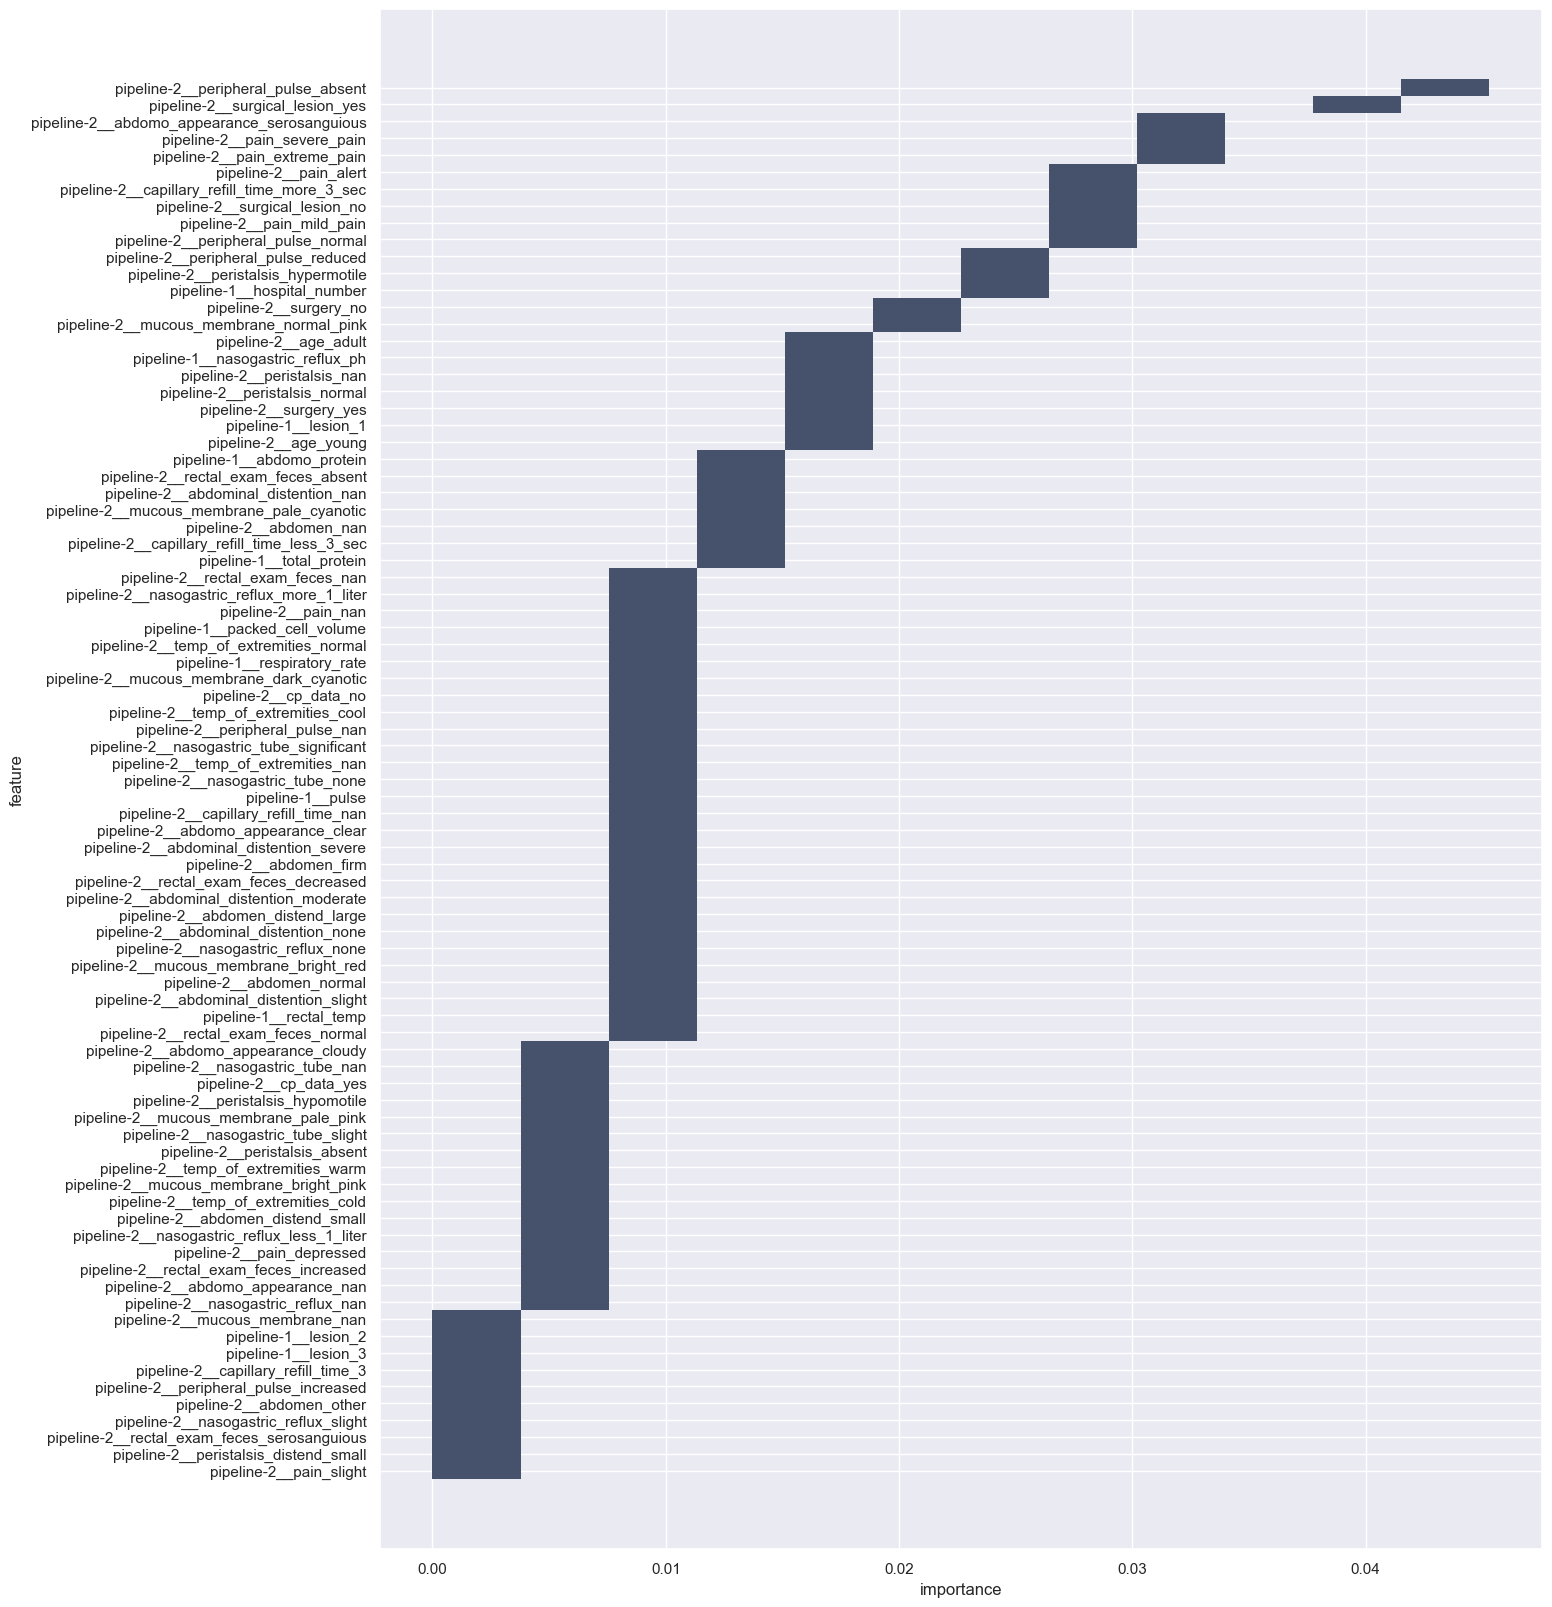

In [88]:
feature_importance = pd.DataFrame(data={'feature': X_train_tf.columns, 'importance': model.feature_importances_}).sort_values('importance', ignore_index=True, ascending=False)
display(feature_importance)

fig, ax = plt.subplots(figsize=(15, 20))
sns.histplot(data=feature_importance, x='importance', y='feature', ax=ax)
plt.show(10)

---
### Prediction & Ensemble

In [91]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 1235 to 2058
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                824 non-null    object 
 1   age                    824 non-null    object 
 2   hospital_number        824 non-null    int64  
 3   rectal_temp            824 non-null    float64
 4   pulse                  824 non-null    float64
 5   respiratory_rate       824 non-null    float64
 6   temp_of_extremities    789 non-null    object 
 7   peripheral_pulse       777 non-null    object 
 8   mucous_membrane        811 non-null    object 
 9   capillary_refill_time  818 non-null    object 
 10  pain                   795 non-null    object 
 11  peristalsis            805 non-null    object 
 12  abdominal_distention   802 non-null    object 
 13  nasogastric_tube       760 non-null    object 
 14  nasogastric_reflux     810 non-null    object 
 15  nasogas

In [94]:
test_tf = tf.fit_transform(test)
X_test_tf = pd.DataFrame(data=test_tf, columns=tf.get_feature_names_out(), index=test.index)
X_test_tf

,pipeline-1__hospital_number,pipeline-1__rectal_temp,pipeline-1__pulse,pipeline-1__respiratory_rate,pipeline-1__nasogastric_reflux_ph,pipeline-1__packed_cell_volume,pipeline-1__total_protein,pipeline-1__abdomo_protein,pipeline-1__lesion_1,pipeline-1__lesion_2,...,pipeline-2__abdomen_other,pipeline-2__abdomen_nan,pipeline-2__abdomo_appearance_clear,pipeline-2__abdomo_appearance_cloudy,pipeline-2__abdomo_appearance_serosanguious,pipeline-2__abdomo_appearance_nan,pipeline-2__surgical_lesion_no,pipeline-2__surgical_lesion_yes,pipeline-2__cp_data_no,pipeline-2__cp_data_yes
id,,,,,,,,,,,,,,,,,,,,,
1235,-0.313327,0.513346,-1.834087,-0.541836,1.312471,-0.637978,-0.280141,-0.615068,-2.416278,-0.069843,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1236,-0.384806,0.009195,1.110022,1.130837,-0.524677,-0.426588,-0.939839,-0.369657,-0.131631,-0.069843,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1237,-0.384806,-0.671671,-0.345844,-1.651358,-0.793886,-1.889035,-0.939839,-1.279337,-0.132766,-0.069843,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1238,-0.313327,-1.570826,0.460713,-0.541836,-1.339610,2.188344,1.758170,-1.996733,-0.484024,-0.069843,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1239,-0.384806,0.138479,-1.157679,-1.651358,-0.793886,-1.200979,-0.550339,-0.369657,-0.131631,-0.069843,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,-0.384806,2.315246,1.156726,0.613674,1.312471,0.797749,-0.087526,0.848882,0.199884,-0.069843,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2055,-0.313327,-1.414320,0.807911,-0.541836,-1.339610,0.167724,1.728601,-0.882052,-0.131253,-0.069843,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2056,-0.384806,1.208295,1.538631,-1.651358,1.054102,0.445259,-0.245802,0.848882,-0.132766,-0.069843,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [113]:
# trainデータに入っていてtestデータにない列を確認
not_in_test_columns = list(set(X_train_tf.columns) - set(X_test_tf.columns))
print(f'not in test: {not_in_test_columns}')

# testデータに入っていてtrainデータにない列を確認
not_in_train_columns = list(set(X_test_tf.columns) - set(X_train_tf.columns))
print(f'not in train:{not_in_train_columns}')



not in test: ['pipeline-2__pain_slight', 'pipeline-2__nasogastric_reflux_slight', 'pipeline-2__peristalsis_distend_small', 'pipeline-2__rectal_exam_feces_serosanguious']
not in train:['pipeline-2__pain_moderate']


pipeline-2__pain_moderate
0.0                          823
1.0                            1
Name: count, dtype: int64


<Axes: >

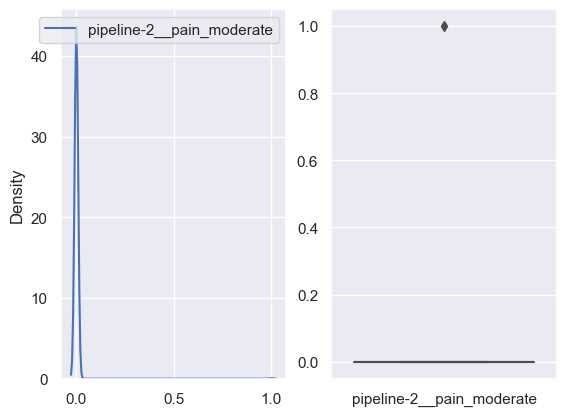

In [127]:
df = pd.DataFrame(X_test_tf[not_in_train_columns])
print(df.value_counts())

fig, axes = plt.subplots(1, 2)

ax1 = axes[0]
sns.kdeplot(df, ax=ax1)
ax2 = axes[1]
sns.boxplot(df,ax=ax2)

→ testから削除可能と判断。

---

count
pipeline-2__pain_slight pipeline-2__nasogastric_reflux_slight pipeline-2__peristalsis_distend_small pipeline-2__rectal_exam_feces_serosanguious       
0.0                     0.0                                   0.0                                   0.0                                           1530
                                                                                                    1.0                                              1
                                                              1.0                                   0.0                                              1
                        1.0                                   0.0                                   0.0                                              1
1.0                     0.0                                   0.0                                   0.0                                              1

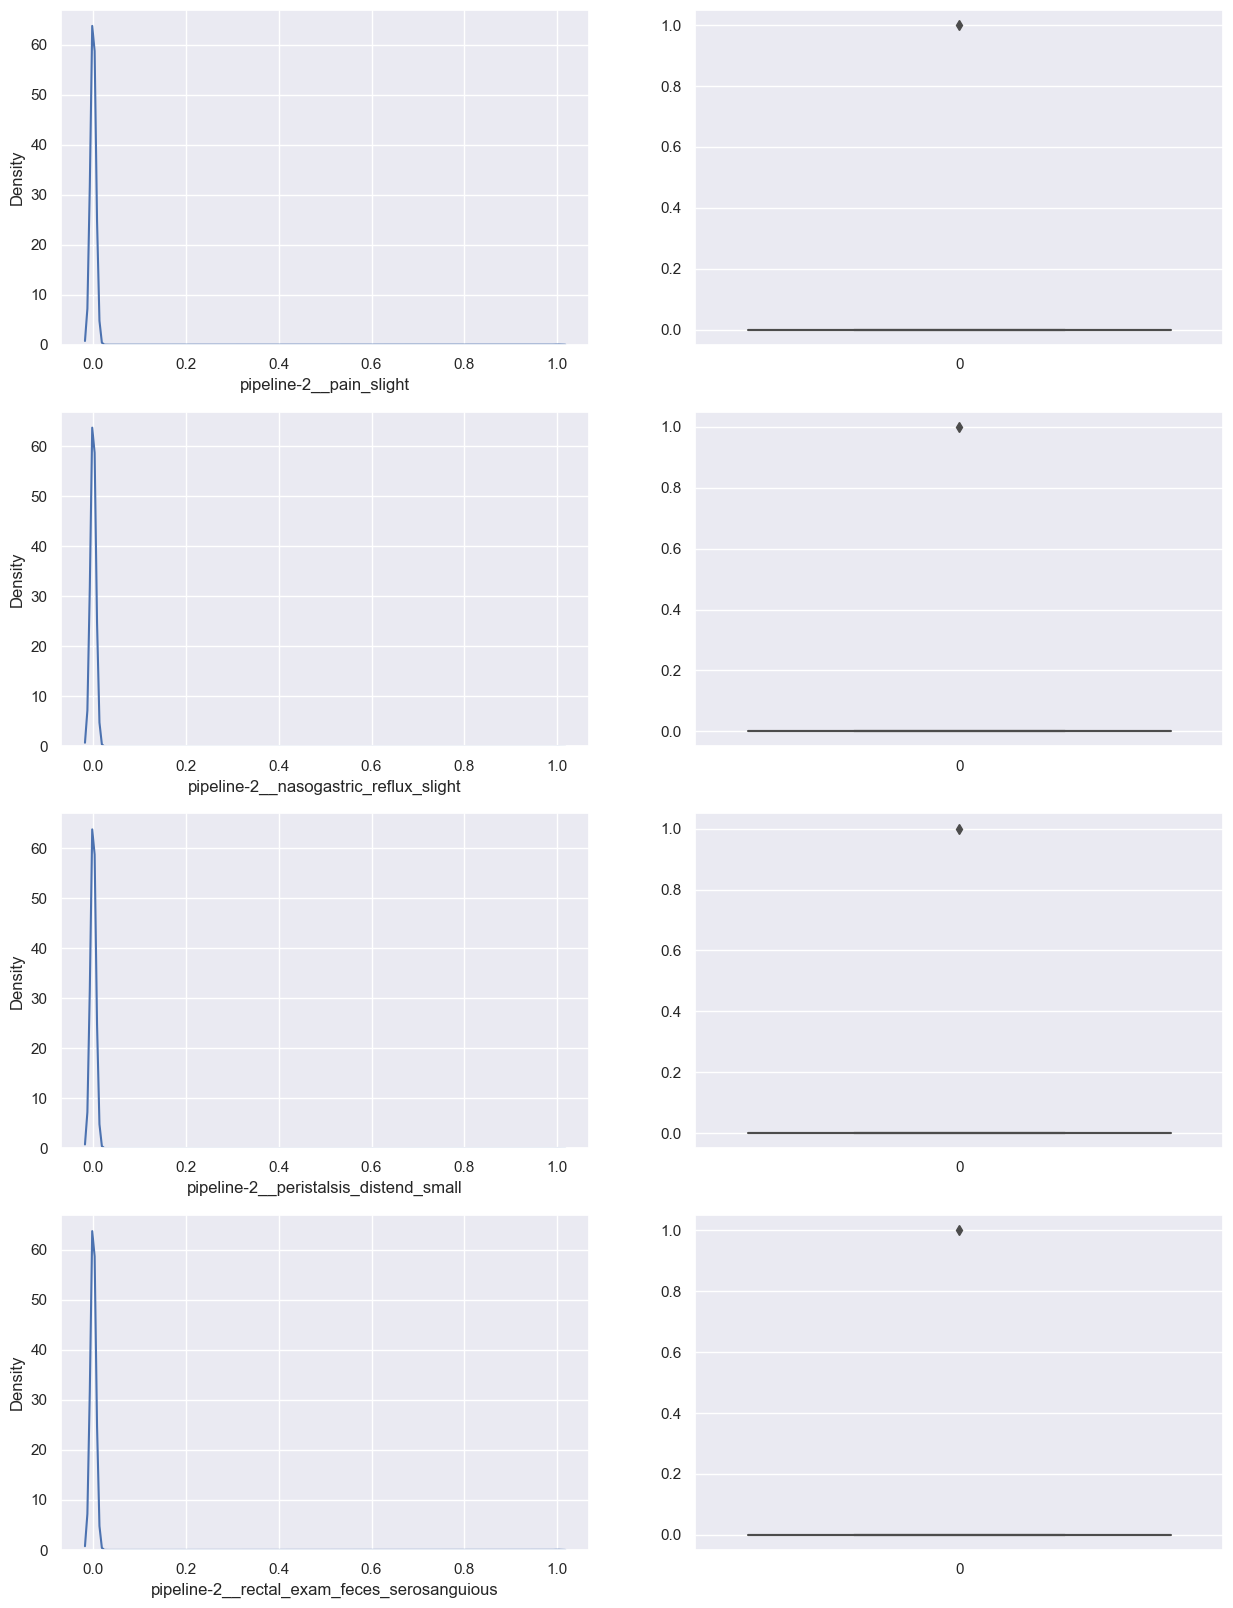

In [154]:
df = pd.DataFrame(X_train_tf[not_in_test_columns])
display(pd.DataFrame(df.value_counts()))

fig, axes = plt.subplots(len(not_in_test_columns), 2, figsize=(15, 20))

i = 0
for col in not_in_test_columns:
    ax1 = axes[i, 0]
    sns.kdeplot(df[col], ax=ax1)
    ax2 = axes[i,1]
    sns.boxplot(df[col],ax=ax2)
    i+=1

In [147]:
#testデータがmodelを使えるように調整。

X_test_tf[not_in_test_columns] = 0
X_test_deleted = X_test_tf.drop('pipeline-2__pain_moderate', axis=1)
X_test_deleted = X_test_deleted[X_train_tf.columns]
len(X_test_deleted.columns)

83

In [148]:
predictions = []

for model in models:
    predictions.append(model.predict(X_test_deleted))

predictions

[array([2., 2., 2., 1., 2., 0., 2., 2., 2., 2., 0., 0., 2., 2., 0., 2., 2.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 0., 2., 0., 0., 0.,
        2., 2., 0., 2., 0., 2., 2., 1., 0., 2., 2., 2., 0., 2., 2., 2., 1.,
        2., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 2., 0., 0., 2., 2., 0.,
        2., 2., 0., 2., 2., 2., 1., 0., 1., 0., 0., 0., 0., 2., 2., 1., 2.,
        2., 2., 2., 2., 2., 0., 2., 0., 1., 1., 1., 2., 2., 2., 0., 0., 2.,
        2., 2., 2., 2., 0., 0., 2., 2., 0., 1., 2., 0., 2., 0., 2., 0., 0.,
        2., 0., 2., 0., 0., 2., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 2.,
        2., 1., 2., 2., 0., 0., 2., 1., 0., 2., 2., 1., 0., 1., 0., 0., 2.,
        2., 0., 2., 0., 2., 2., 2., 0., 2., 2., 1., 0., 0., 0., 2., 0., 2.,
        2., 0., 2., 2., 0., 2., 0., 2., 2., 2., 0., 0., 2., 2., 0., 2., 2.,
        1., 2., 2., 2., 2., 2., 0., 2., 0., 0., 2., 0., 0., 0., 2., 2., 2.,
        0., 2., 2., 0., 1., 2., 2., 2., 0., 2., 2., 0., 2., 0., 1., 2., 0.,
        1., 

In [157]:
from scipy import stats
pred_result, _ = stats.mode(predictions)
print(pred_result.shape, type(pred_result))

(1, 824) <class 'numpy.ndarray'>


/var/folders/pm/wh4jwkpj6lvbjqpx5b9p68t00000gp/T/ipykernel_47234/1620765607.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  pred_result, _ = stats.mode(predictions)


In [160]:
submission = pd.read_csv('./sample_submission.csv', index_col='id')
submission

,outcome
id,
1235,lived
1236,lived
1237,lived
1238,lived
1239,lived
...,...
2054,lived
2055,lived
2056,lived


In [185]:
submission['outcome'] = target_encoder.inverse_transform(pred_result.reshape(-1, 1)).ravel()
submission

,outcome
id,
1235,lived
1236,lived
1237,lived
1238,euthanized
1239,lived
...,...
2054,died
2055,died
2056,died


In [186]:
submission.to_csv('./submission.csv')

## Score
- Private Score: 0.70606<br>
- Public Score: 0.7439